# F1 Race Predictions
### APC's Kaggle Project by Juan Carlos Soriano Valle (1493037)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from wordcloud import WordCloud
import descartes
import datetime

import geopandas as gpd
from shapely.geometry import Point, Polygon
from dateutil.relativedelta import *

In [2]:
path = "./data/"
driversPath = "drivers"
constructorsPath = "constructors"
racesPath = "races"
resultsPath = "results"
seasonsPath = "seasons"
circuitsPath = "circuits"
qualifyingPath = "qualifying"
driverStandingsPath = "driver_standings"
constructorStandingsPath = "constructor_standings"
constructorResultsPath = "constructor_results"
statusPath = "status"
lapTimesPath = "lap_times"

### Status

In [3]:
statusDF = pd.read_csv(path+statusPath+".csv")

print(statusDF.shape)
print("Total status:", statusDF.shape[0])
pd.set_option("display.max_columns", None)
display(statusDF.head(10))

(137, 2)
Total status: 137


statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision
4         5        Engine
5         6       Gearbox
6         7  Transmission
7         8        Clutch
8         9    Hydraulics
9        10    Electrical

### Drivers

In [4]:
driversDF = pd.read_csv(path+driversPath+".csv")

print(driversDF.shape)
print("Total drivers:", driversDF.shape[0])
pd.set_option("display.max_columns", None)
driversDF.head(10)


(848, 9)
Total drivers: 848


driverId   driverRef number code   forename     surname         dob  \
0         1    hamilton     44  HAM      Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI       Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS       Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO   Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV     Heikki  Kovalainen  1981-10-19   
5         6    nakajima     \N  NAK     Kazuki    Nakajima  1985-01-11   
6         7    bourdais     \N  BOU  Sébastien    Bourdais  1979-02-28   
7         8   raikkonen      7  RAI       Kimi   Räikkönen  1979-10-17   
8         9      kubica     88  KUB     Robert      Kubica  1984-12-07   
9        10       glock     \N  GLO       Timo       Glock  1982-03-18   

  nationality                                                url  
0     British        http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German         http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German          http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish       http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish     http://en.wikipedia.org/wiki/Heikki_Kovalainen  
5    Japanese       http://en.wikipedia.org/wiki/Kazuki_Nakajima  
6      French  http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...  
7     Finnish  http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...  
8      Polish         http://en.wikipedia.org/wiki/Robert_Kubica  
9      German            http://en.wikipedia.org/wiki/Timo_Glock

In [5]:
print("missing values:\n",driversDF.isna().sum())

missing values:
 driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            1
dtype: int64


In [6]:
print(driversDF.number.str.count("N").sum())
print(driversDF.number.count())

803
848


### Constructors

In [7]:
constructorsDF = pd.read_csv(path+constructorsPath+".csv")

print(constructorsDF.shape)
print("Total Constructors:", constructorsDF.shape[0])
pd.set_option("display.max_columns", None)
constructorsDF.head(10)

(211, 5)
Total Constructors: 211


constructorId constructorRef         name nationality  \
0              1        mclaren      McLaren     British   
1              2     bmw_sauber   BMW Sauber      German   
2              3       williams     Williams     British   
3              4        renault      Renault      French   
4              5     toro_rosso   Toro Rosso     Italian   
5              6        ferrari      Ferrari     Italian   
6              7         toyota       Toyota    Japanese   
7              8    super_aguri  Super Aguri    Japanese   
8              9       red_bull     Red Bull    Austrian   
9             10    force_india  Force India      Indian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  
5      http://en.wikipedia.org/wiki/Scuderia_Ferrari  
6         http://en.wikipedia.org/wiki/Toyota_Racing  
7        http://en.wikipedia.org/wiki/Super_Aguri_F1  
8       http://en.wikipedia.org/wiki/Red_Bull_Racing  
9  http://en.wikipedia.org/wiki/Racing_Point_Forc...

In [8]:
print("missing values:\n",constructorsDF.isna().sum())

missing values:
 constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64


### Races

In [9]:
racesDF = pd.read_csv(path+racesPath+".csv")

print(racesDF.shape)
print("Total Races:", racesDF.shape[0])
pd.set_option("display.max_columns", None)
racesDF.head(10)

(1035, 8)
Total Races: 1035


raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   
5       6  2009      6          6      Monaco Grand Prix  2009-05-24   
6       7  2009      7          5     Turkish Grand Prix  2009-06-07   
7       8  2009      8          9     British Grand Prix  2009-06-21   
8       9  2009      9         20      German Grand Prix  2009-07-12   
9      10  2009     10         11   Hungarian Grand Prix  2009-07-26   

       time                                                url  
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...  
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...  
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...  
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...  
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...  
5  12:00:00  http://en.wikipedia.org/wiki/2009_Monaco_Grand...  
6  12:00:00  http://en.wikipedia.org/wiki/2009_Turkish_Gran...  
7  12:00:00  http://en.wikipedia.org/wiki/2009_British_Gran...  
8  12:00:00  http://en.wikipedia.org/wiki/2009_German_Grand...  
9  12:00:00  http://en.wikipedia.org/wiki/2009_Hungarian_Gr...

In [10]:
print("missing values:\n",racesDF.isna().sum())

missing values:
 raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64


In [11]:
rounds = []
for season in np.array(racesDF.year.unique()):
    rounds.append([season, list(racesDF[racesDF.year == season]["round"])])
rounds.sort()

countRounds = racesDF.groupby('year').round.max().reset_index()['round'].tolist()
yearRounds = racesDF.groupby('year').round.max().reset_index()['year'].tolist()

c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


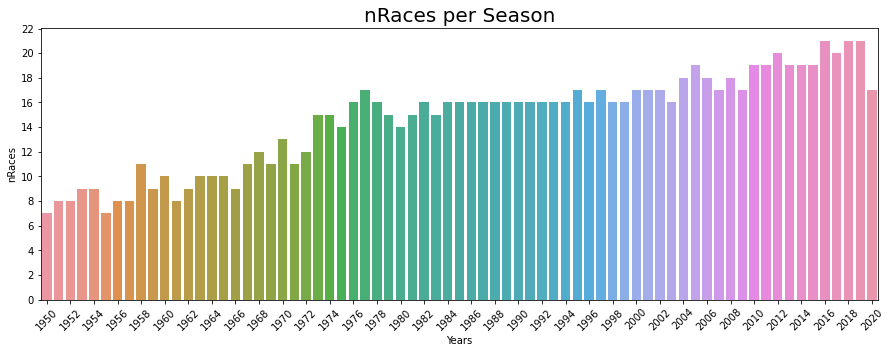

In [12]:
"""fig = plt.figure(figsize=(12,5))
plt.title("nRaces per Season")
ax = fig.add_axes([0,0,1,1])
ax.bar(yearRounds,countRounds)
plt.show()"""

fig_dims=(15,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(yearRounds,countRounds)
plt.xlabel("Years")
plt.ylabel("nRaces")
plt.title("nRaces per Season", fontsize=20)
ax.set_yticks(range(23))

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2!=0:
        xticks[i].set_visible(False)

yticks=ax.yaxis.get_major_ticks()
for i in range(len(yticks)):
    if i%2!=0:
        yticks[i].set_visible(False)

ax.set_xticklabels(yearRounds,rotation=45);


### Results

In [13]:
resultsDF = pd.read_csv(path+resultsPath+".csv")

print(resultsDF.shape)
print("Total Races:", resultsDF.shape[0])
pd.set_option("display.max_columns", None)
resultsDF.head(22)

years = []
rounds = []
circuits = []
times = []
for ids in resultsDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
    circuits.append(racesDF.loc[racesDF["raceId"]==ids, "circuitId"].iloc[0])
    
for lapTimes in resultsDF.fastestLapTime:
    x = lapTimes.split(".")
    try:
        dt_obj = time.strptime(lapTimes, "%M:%S.%f")
        millitime = datetime.timedelta(hours=dt_obj.tm_hour,minutes=dt_obj.tm_min,seconds=dt_obj.tm_sec,milliseconds=int(x[1])).total_seconds()*1000
        times.append(millitime)
    except:
        times.append(300000)
resultsDF["year"] = years
resultsDF["round"] = rounds
resultsDF["circuitId"] = circuits
resultsDF["fastestLapMill"] = times
display(resultsDF.head(22))
display(resultsDF.tail())

(24900, 18)
Total Races: 24900


resultId  raceId  driverId  constructorId number  grid position  \
0          1      18         1              1     22     1        1   
1          2      18         2              2      3     5        2   
2          3      18         3              3      7     7        3   
3          4      18         4              4      5    11        4   
4          5      18         5              1     23     3        5   
5          6      18         6              3      8    13        6   
6          7      18         7              5     14    17        7   
7          8      18         8              6      1    15        8   
8          9      18         9              2      4     2       \N   
9         10      18        10              7     12    18       \N   
10        11      18        11              8     18    19       \N   
11        12      18        12              4      6    20       \N   
12        13      18        13              6      2     4       \N   
13        14      18        14              9      9     8       \N   
14        15      18        15              7     11     6       \N   
15        16      18        16             10     20    22       \N   
16        17      18        17              9     10    14       \N   
17        18      18        18             11     16    12       \N   
18        19      18        19              8     19    21       \N   
19        20      18        20              5     15     9       \N   
20        21      18        21             10     21    16       \N   
21        22      18        22             11     17    10       \N   

   positionText  positionOrder  points  laps         time milliseconds  \
0             1              1    10.0    58  1:34:50.616      5690616   
1             2              2     8.0    58       +5.478      5696094   
2             3              3     6.0    58       +8.163      5698779   
3             4              4     5.0    58      +17.181      5707797   
4             5              5     4.0    58      +18.014      5708630   
5             6              6     3.0    57           \N           \N   
6             7              7     2.0    55           \N           \N   
7             8              8     1.0    53           \N           \N   
8             R              9     0.0    47           \N           \N   
9             R             10     0.0    43           \N           \N   
10            R             11     0.0    32           \N           \N   
11            R             12     0.0    30           \N           \N   
12            R             13     0.0    29           \N           \N   
13            R             14     0.0    25           \N           \N   
14            R             15     0.0    19           \N           \N   
15            R             16     0.0     8           \N           \N   
16            R             17     0.0     0           \N           \N   
17            R             18     0.0     0           \N           \N   
18            R             19     0.0     0           \N           \N   
19            R             20     0.0     0           \N           \N   
20            R             21     0.0     0           \N           \N   
21            D             22     0.0    58           \N           \N   

   fastestLap rank fastestLapTime fastestLapSpeed  statusId  year  round  \
0          39    2       1:27.452         218.300         1  2008      1   
1          41    3       1:27.739         217.586         1  2008      1   
2          41    5       1:28.090         216.719         1  2008      1   
3          58    7       1:28.603         215.464         1  2008      1   
4          43    1       1:27.418         218.385         1  2008      1   
5          50   14       1:29.639         212.974        11  2008      1   
6          22   12       1:29.534         213.224         5  2008      1   
7          20    4       1:27.903         217.180         5

resultId  raceId  driverId  constructorId number  grid position  \
24895     24901    1044       847              3     63     0       16   
24896     24902    1044       825            210     20    13       17   
24897     24903    1044       154            210      8    17       \N   
24898     24904    1044       849              3      6     0       \N   
24899     24905    1044       841             51     99    10       \N   

      positionText  positionOrder  points  laps time milliseconds fastestLap  \
24895           16             16     0.0    57   \N           \N         51   
24896           17             17     0.0    55   \N           \N         45   
24897            R             18     0.0    49   \N           \N         38   
24898            R             19     0.0    39   \N           \N         32   
24899            R             20     0.0    11   \N           \N         11   

      rank fastestLapTime fastestLapSpeed  statusId  year  round  circuitId  \
24895   14       1:40.814         190.616        11  2020     14          5   
24896   15       1:40.948         190.363        54  2020     14          5   
24897   18       1:43.281         186.063       130  2020     14          5   
24898   19       1:43.495         185.678       130  2020     14          5   
24899   20       1:51.122         172.934         6  2020     14          5   

       fastestLapMill  
24895        100814.0  
24896        100948.0  
24897        103281.0  
24898        103495.0  
24899        111122.0

In [14]:
print("missing values:\n",resultsDF.isna().sum())

missing values:
 resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
year               0
round              0
circuitId          0
fastestLapMill     0
dtype: int64


In [15]:
status = resultsDF['statusId'].value_counts()

Finished              6551
+1 Lap                3624
other                 3279
Engine                2000
+2 Laps               1558
Accident              1029
Did not qualify       1025
Collision              800
Gearbox                796
Spun off               790
+3 Laps                725
Suspension             428
+4 Laps                405
Did not prequalify     331
Transmission           320
Electrical             314
Brakes                 247
Withdrew               243
+5 Laps                221
Clutch                 214
Name: statusId, dtype: int64

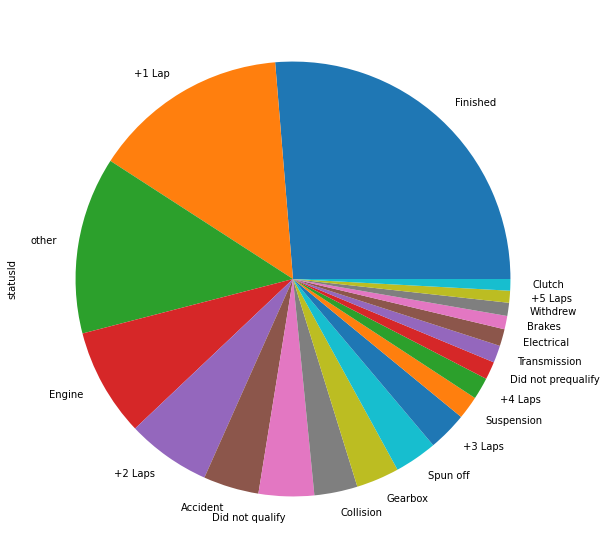

In [16]:
statusFrame = status.to_frame()


indexnames={}
for idx in statusFrame.index:
    name = statusDF.loc[statusDF["statusId"]==idx, "status"].iloc[0]
    indexnames[idx]=name
statusDef=statusFrame.rename(index=indexnames)

s=statusDef["statusId"]
otherS = s.groupby(np.where(s>=200,s.index,'other')).sum()#.plot.pie(figsize=(10, 10))
otherS=otherS.sort_values(ascending=False)
otherS.plot.pie(figsize=(10, 10))
display(otherS)

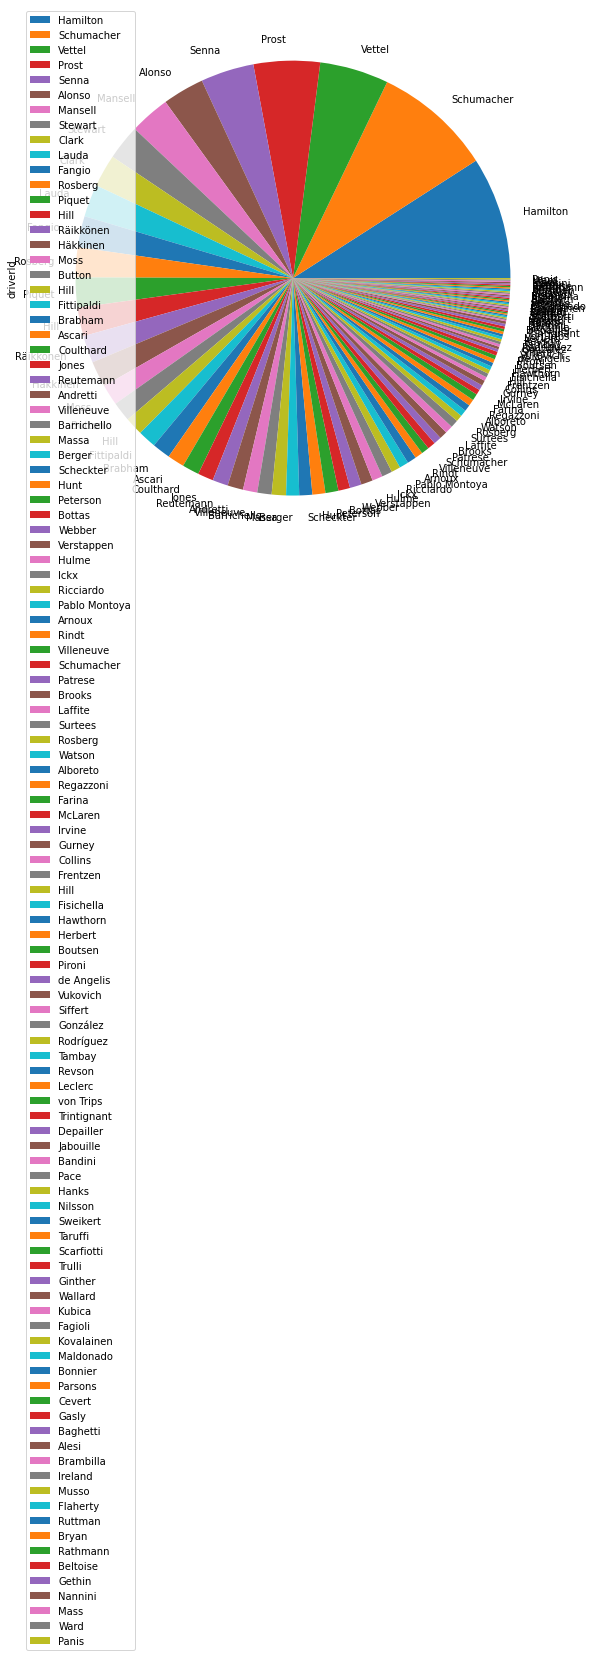

In [17]:
winResults = resultsDF[resultsDF['position'] == "1"]
winCount = winResults["driverId"].value_counts()
winCount = winCount.to_frame()
#display(winCount)

indexnames={}
for idx in winCount.index:
    name = driversDF.loc[driversDF["driverId"]==idx, "surname"].iloc[0]
    indexnames[idx]=name
winCountDef=winCount.rename(index=indexnames)

winCountDef.plot.pie(figsize=(10, 10), subplots=True);

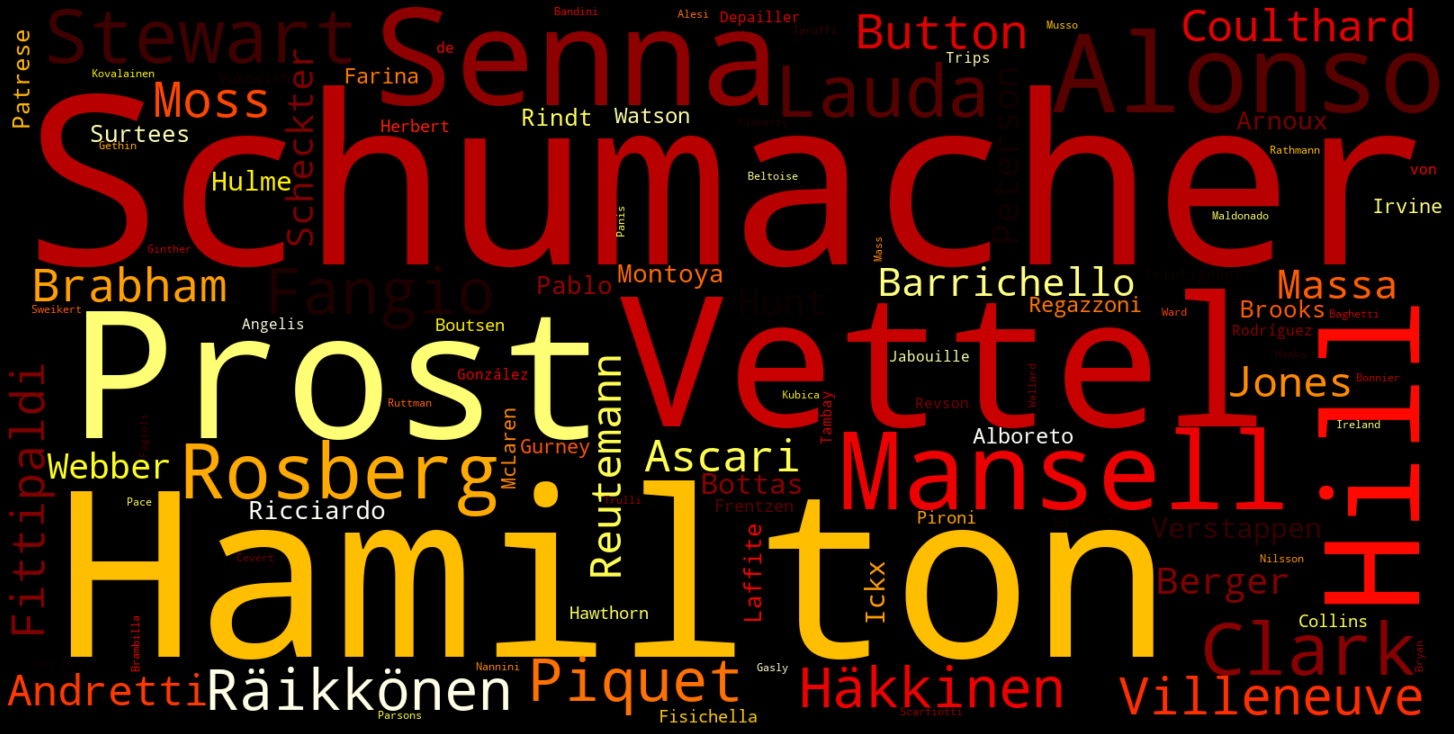

In [18]:
#winCountDef.index
wins = winResults['driverId'].tolist()
#str1 = ''.join(wins)

str2 = []

for idx in range(len(wins)):
    #print(str1[idx+1])
    #print(driversDF["driverId"]==int(str1[idx+1]))
    name = driversDF.loc[driversDF["driverId"]==int(wins[idx]), "surname"].iloc[0]
    str2.append(name)

str2=str(str2)
str2 = str2.replace(",", "")
str2 = str2.replace("'", "")
str2 = str2.replace(" ", "\n")

#print(str2)
wordcloud = WordCloud(width=1600, height=800, margin=0,collocations=False, colormap="hot").generate(str(str2))
"""plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()"""


plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('cloudword.png')
plt.show()



### Seasons

In [19]:
seasonsDF = pd.read_csv(path+seasonsPath+".csv")

print(seasonsDF.shape)
print("Total Seasons:", seasonsDF.shape[0])
pd.set_option("display.max_columns", None)
display(seasonsDF.head(5))
display(seasonsDF.tail(5))

(71, 2)
Total Seasons: 71


year                                                url
0  2009  https://en.wikipedia.org/wiki/2009_Formula_One...
1  2008  https://en.wikipedia.org/wiki/2008_Formula_One...
2  2007  https://en.wikipedia.org/wiki/2007_Formula_One...
3  2006  https://en.wikipedia.org/wiki/2006_Formula_One...
4  2005  https://en.wikipedia.org/wiki/2005_Formula_One...

year                                                url
66  2016  https://en.wikipedia.org/wiki/2016_Formula_One...
67  2017  https://en.wikipedia.org/wiki/2017_Formula_One...
68  2018  https://en.wikipedia.org/wiki/2018_Formula_One...
69  2019  https://en.wikipedia.org/wiki/2019_Formula_One...
70  2020  https://en.wikipedia.org/wiki/2020_Formula_One...

In [20]:
print("missing values:\n",seasonsDF.isna().sum())

missing values:
 year    0
url     0
dtype: int64


### Circuits

In [21]:
circuitsDF = pd.read_csv(path+circuitsPath+".csv")

print(circuitsDF.shape)
print("Total Circuits:", circuitsDF.shape[0])
pd.set_option("display.max_columns", None)
display(circuitsDF.head(6))
display(circuitsDF.tail(5))

(76, 9)
Total Circuits: 76


circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   
5          6       monaco               Circuit de Monaco   Monte-Carlo   

     country       lat        lng alt  \
0  Australia -37.84970  144.96800  10   
1   Malaysia   2.76083  101.73800  \N   
2    Bahrain  26.03250   50.51060  \N   
3      Spain  41.57000    2.26111  \N   
4     Turkey  40.95170   29.40500  \N   
5     Monaco  43.73470    7.42056  \N   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park  
5     http://en.wikipedia.org/wiki/Circuit_de_Monaco

circuitId     circuitRef                                  name  \
71         72  port_imperial          Port Imperial Street Circuit   
72         73            BAK                     Baku City Circuit   
73         74          hanoi                  Hanoi Street Circuit   
74         75       portimao    Autódromo Internacional do Algarve   
75         76        mugello  Autodromo Internazionale del Mugello   

      location     country      lat       lng alt  \
71  New Jersey         USA  40.7769  -74.0111  \N   
72        Baku  Azerbaijan  40.3725   49.8533  \N   
73       Hanoi     Vietnam  21.0166  105.7660  \N   
74    Portimão    Portugal  37.2270   -8.6267  \N   
75     Mugello       Italy  43.9975   11.3719  \N   

                                                  url  
71  http://en.wikipedia.org/wiki/Port_Imperial_Str...  
72     http://en.wikipedia.org/wiki/Baku_City_Circuit  
73  http://en.wikipedia.org/wiki/Hanoi_Street_Circuit  
74  http://en.wikipedia.org/wiki/Algarve_Internati...  
75       http://en.wikipedia.org/wiki/Mugello_Circuit

In [22]:
print("missing values:\n",circuitsDF.isna().sum())

missing values:
 circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64


### Qualifying

In [23]:
qualifyingDF = pd.read_csv(path+qualifyingPath+".csv")

print(qualifyingDF.shape)
print("Total Qualifying:", qualifyingDF.shape[0])
pd.set_option("display.max_columns", None)
display(qualifyingDF.head(22))

(8634, 9)
Total Qualifying: 8634


qualifyId  raceId  driverId  constructorId  number  position        q1  \
0           1      18         1              1      22         1  1:26.572   
1           2      18         9              2       4         2  1:26.103   
2           3      18         5              1      23         3  1:25.664   
3           4      18        13              6       2         4  1:25.994   
4           5      18         2              2       3         5  1:25.960   
5           6      18        15              7      11         6  1:26.427   
6           7      18         3              3       7         7  1:26.295   
7           8      18        14              9       9         8  1:26.381   
8           9      18        10              7      12         9  1:26.919   
9          10      18        20              5      15        10  1:26.702   
10         11      18        22             11      17        11  1:26.369   
11         12      18         4              4       5        12  1:26.907   
12         13      18        18             11      16        13  1:26.712   
13         14      18         6              3       8        14  1:26.891   
14         15      18        17              9      10        15  1:26.914   
15         16      18         8              6       1        16  1:26.140   
16         17      18        21             10      21        17  1:27.207   
17         18      18         7              5      14        18  1:27.446   
18         19      18        16             10      20        19  1:27.859   
19         20      18        11              8      18        20  1:28.208   
20         21      18        12              4       6        21  1:28.330   
21         22      18        19              8      19        22  1:29.059   

          q2        q3  
0   1:25.187  1:26.714  
1   1:25.315  1:26.869  
2   1:25.452  1:27.079  
3   1:25.691  1:27.178  
4   1:25.518  1:27.236  
5   1:26.101  1:28.527  
6   1:26.059  1:28.687  
7   1:26.063  1:29.041  
8   1:26.164  1:29.593  
9   1:25.842        \N  
10  1:26.173        \N  
11  1:26.188        \N  
12  1:26.259        \N  
13  1:26.413        \N  
14        \N        \N  
15        \N        \N  
16        \N        \N  
17        \N        \N  
18        \N        \N  
19        \N        \N  
20        \N        \N  
21        \N        \N

In [24]:
print("missing values:\n",qualifyingDF.isna().sum())

missing values:
 qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               129
q3               245
dtype: int64


### Driver Standings

In [25]:
driverStandingsDF = pd.read_csv(path+driverStandingsPath+".csv")

print(driverStandingsDF.shape)
print("Total Driver Standings:", driverStandingsDF.shape[0])
pd.set_option("display.max_columns", None)
display(driverStandingsDF.head(8))

(32857, 7)
Total Driver Standings: 32857


driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0
5                  6      18         6     3.0         6            6     0
6                  7      18         7     2.0         7            7     0
7                  8      18         8     1.0         8            8     0

In [26]:
print("missing values:\n",driverStandingsDF.isna().sum())

missing values:
 driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64


### Constructor Standings

In [27]:
constructorStandingsDF = pd.read_csv(path+constructorStandingsPath+".csv")

print(constructorStandingsDF.shape)
print("Total Constructor Standings:", constructorStandingsDF.shape[0])
pd.set_option("display.max_columns", None)
display(constructorStandingsDF.head(6))

(12456, 7)
Total Constructor Standings: 12456


constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   
5                       6      18              6     1.0         6   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0  
5            6     0

In [28]:
print("missing values:\n",constructorStandingsDF.isna().sum())

missing values:
 constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64


### Constructor Results

In [29]:
constructorResultsDF = pd.read_csv(path+constructorResultsPath+".csv")

print(constructorResultsDF.shape)
print("Total Constructor Results:", constructorResultsDF.shape[0])
pd.set_option("display.max_columns", None)
display(constructorResultsDF.head(6))

(11700, 5)
Total Constructor Results: 11700


constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N
5                     6      18              6     1.0     \N

In [30]:
print("missing values:\n",constructorResultsDF.isna().sum())

missing values:
 constructorResultsId    0
raceId                  0
constructorId           0
points                  0
status                  0
dtype: int64


In [31]:
print(constructorResultsDF.status.str.count("N").sum())

11683


In [32]:
pd.set_option("display.max_rows", None)
constructorResultsDF.loc[:,"status"]


0        \N
1        \N
2        \N
3        \N
4        \N
5        \N
6        \N
7        \N
8        \N
9        \N
10       \N
11       \N
12       \N
13       \N
14       \N
15       \N
16       \N
17       \N
18       \N
19       \N
20       \N
21       \N
22       \N
23       \N
24       \N
25       \N
26       \N
27       \N
28       \N
29       \N
30       \N
31       \N
32       \N
33       \N
34       \N
35       \N
36       \N
37       \N
38       \N
39       \N
40       \N
41       \N
42       \N
43       \N
44       \N
45       \N
46       \N
47       \N
48       \N
49       \N
50       \N
51       \N
52       \N
53       \N
54       \N
55       \N
56       \N
57       \N
58       \N
59       \N
60       \N
61       \N
62       \N
63       \N
64       \N
65       \N
66       \N
67       \N
68       \N
69       \N
70       \N
71       \N
72       \N
73       \N
74       \N
75       \N
76       \N
77       \N
78       \N
79       \N
80       \N
81       \N
82       \N
83  

In [33]:
constructorResultsDF['status'].value_counts()

\N    11683
D        17
Name: status, dtype: int64

### Lap Times

In [34]:
lapTimesDF = pd.read_csv(path+lapTimesPath+".csv")

print(lapTimesDF.shape)
print("Total Lap Times:", lapTimesDF.shape[0])
pd.set_option("display.max_columns", None)
display(lapTimesDF.head(6))

(487314, 6)
Total Lap Times: 487314


raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342
5     841        20    6         1  1:32.605         92605

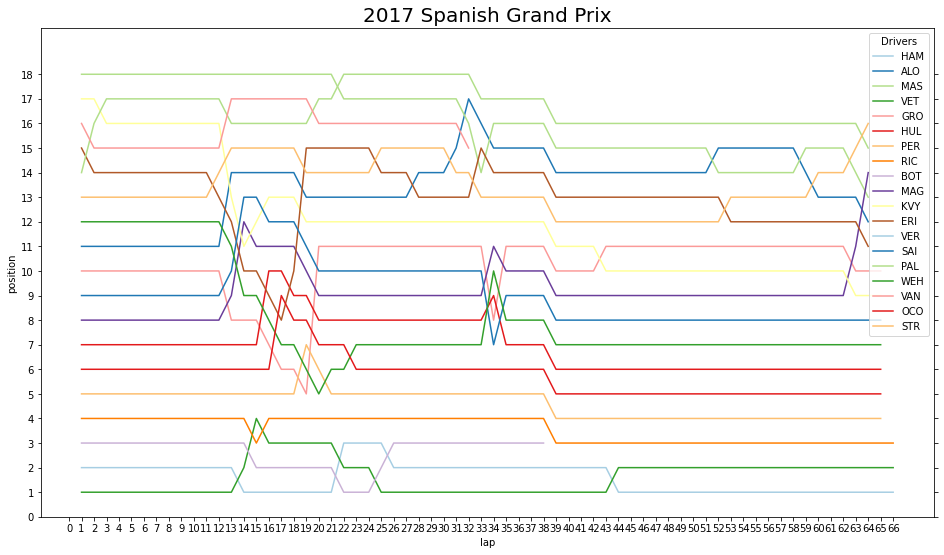

In [35]:
fig = plt.figure(figsize=(16,9))
_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==973], palette="Paired", legend="full")
_.set_yticks(range(19))
_.set_xticks(range(67))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==973]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==973, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==973, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",loc='best',labels=names);

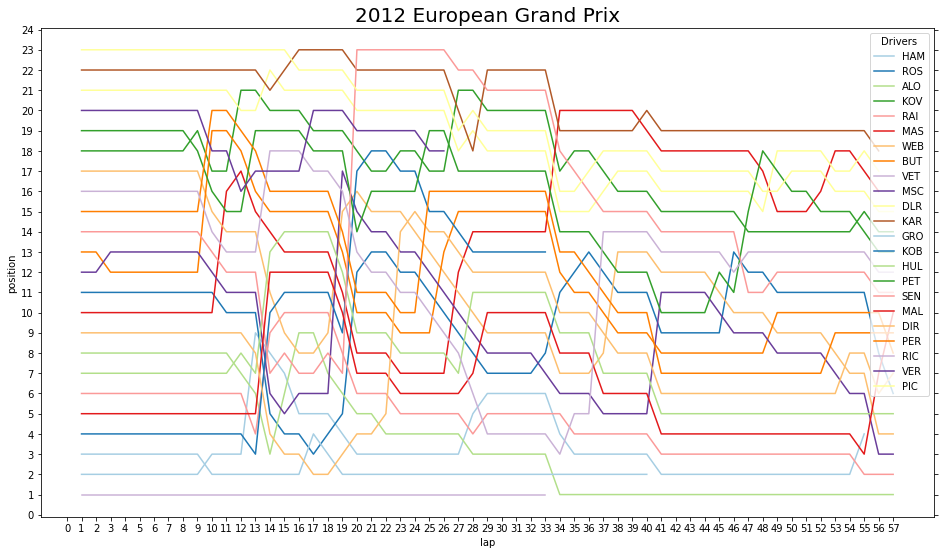

In [36]:
fig = plt.figure(figsize=(16,9))
"""valencia = lapTimesDF[lapTimesDF["raceId"]==867]
alonso = valencia[valencia["driverId"]==4]
display(alonso)
"""
_ = sns.lineplot(x="lap", y="position", hue="driverId", data=lapTimesDF[lapTimesDF["raceId"]==867], palette="Paired", legend="full")
_.set_yticks(range(25))
_.set_xticks(range(58))
_.yaxis.set_ticks_position("both")

driversNum=lapTimesDF[lapTimesDF["raceId"]==867]["driverId"].unique()
driversNum.sort()
names = []

for num in driversNum:
    names.append(driversDF.loc[driversDF["driverId"]==num, "code"].iloc[0])

#race{year;name}
race={}
race["year"]=racesDF.loc[racesDF["raceId"]==867, "year"].iloc[0]
race["name"]=racesDF.loc[racesDF["raceId"]==867, "name"].iloc[0]
plt.title(str(race["year"])+ " " + str(race["name"]), fontsize=20)
plt.legend(title="Drivers",loc='best',labels=names);

---

c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
c:\users\thela\appdata\local\programs\python\python38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


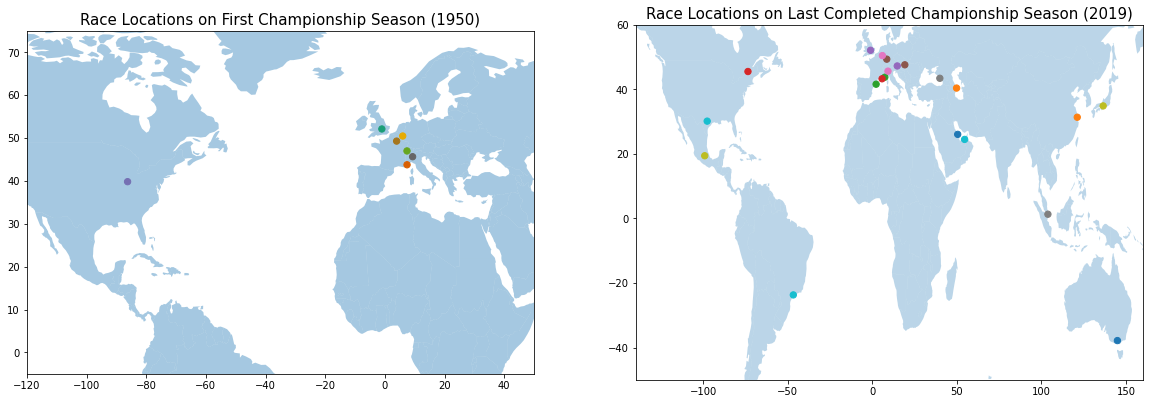

In [37]:
crs={"init":"epsg:4326"}
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
races=racesDF.loc[racesDF["year"]==1950]
races2019=racesDF.loc[racesDF["year"]==2019]
z=np.random.rand(100,100)

lat=[]
lon=[]

lat1=[]
lon1=[]


for race in races["circuitId"]:
    lat.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races.insert(8,"lat", lat, True)
races.insert(9,"lng", lon, True)
#display(races)
points1950 = [Point(xy) for xy in zip( races["lng"], races["lat"] )]
geo1950 = gpd.GeoDataFrame(races, geometry=points1950, crs=crs)
#display(geo1950)


for race in races2019["circuitId"]:
    lat1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lat"].iloc[0])
    lon1.append(circuitsDF.loc[circuitsDF["circuitId"]==race, "lng"].iloc[0])

races2019.insert(8,"lat", lat1, True)
races2019.insert(9,"lng", lon1, True)
points2019 = [Point(xy) for xy in zip( races2019["lng"], races2019["lat"] )]
geo2019 = gpd.GeoDataFrame(races2019, geometry=points2019, crs=crs)



fig,(ax1, ax2) = plt.subplots(ncols=2)

for ax in [ax1, ax2]:
    if ax == ax1:
        world.plot(ax=ax, alpha=0.4)
        geo1950.plot(ax=ax, markersize=40, marker="o",cmap='Dark2')
        ax.set_ylim([-5,75])
        ax.set_xlim([-120,50])
        ax.set_title("Race Locations on First Championship Season (1950)", fontsize=15)
    else:
        world.plot(ax=ax, alpha=0.3)
        geo2019.plot(ax=ax, markersize=40, marker="o", cmap="tab10")
        ax.set_ylim([-50,60])
        ax.set_xlim([-140,160])
        ax.set_title("Race Locations on Last Completed Championship Season (2019)", fontsize=15)

asp = np.diff(ax2.get_xlim())[0] / np.diff(ax2.get_ylim())[0]
ax2.set_aspect(asp*0.7)
fig.set_size_inches(20,8)


---

In [38]:
#importancia de la pole
perCircuits = {}
circuits = []
poleResults = resultsDF[resultsDF["grid"]==1]

for race in poleResults.raceId:
    circuit = racesDF.loc[racesDF["raceId"]==race, "circuitId"].iloc[0]
    circuits.append(circuit)

poleResults["circuitId"]=circuits

<ipython-input-38-af670e25d621>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poleResults["circuitId"]=circuits


<ipython-input-39-9b41d0ae9674>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poleResults["poleWin"]=delta


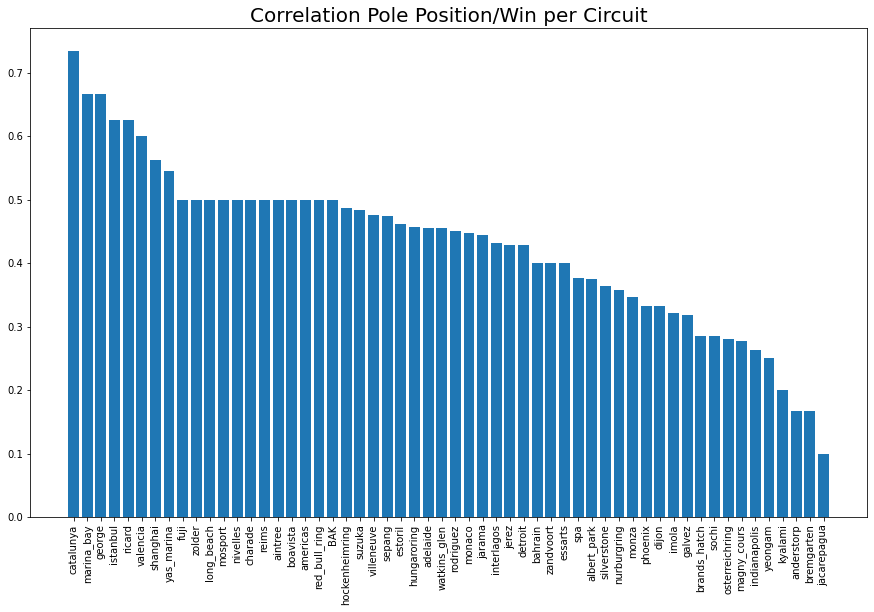

In [39]:
delta=[]
names={}

for index, row in poleResults.iterrows():
    delta.append(row.grid == row.positionOrder)

poleResults["poleWin"]=delta

#display(poleResults)


#print(poleResults.circuitId.unique())

for circuits in poleResults.circuitId.unique():
    counter=0
    perfect=0
    circuitResults = poleResults[poleResults["circuitId"]==circuits]
    for index, row in circuitResults.iterrows():
        if row.poleWin:
            perfect+=1
        counter+=1
    perCircuits[circuits]=perfect/counter


for key in perCircuits.keys():
    name = circuitsDF.loc[circuitsDF["circuitId"]==key,"circuitRef"].iloc[0]
    names[name]=perCircuits[key]


sortedNames = {}
sortedKeys = sorted(names, key=names.get, reverse=True)
for w in sortedKeys:
    sortedNames[w] = names[w]
    

sortedNames.pop("pedralbes")
sortedNames.pop("pescara")
sortedNames.pop("ain-diab")
sortedNames.pop("sebring")
sortedNames.pop("zeltweg")
sortedNames.pop("lemans")
sortedNames.pop("tremblant")
sortedNames.pop("montjuic")
sortedNames.pop("las_vegas")
sortedNames.pop("dallas")
sortedNames.pop("donington")
sortedNames.pop("okayama")
sortedNames.pop("riverside")
sortedNames.pop("avus")
sortedNames.pop("monsanto")
sortedNames.pop("buddh")
sortedNames.pop("mugello")
sortedNames.pop("portimao")
    

    

plt.figure(figsize=(15,9))
plt.bar(range(len(sortedNames)), list(sortedNames.values()), align="center")
plt.xticks(range(len(sortedNames)), list(sortedNames.keys()),rotation=90)
plt.title("Correlation Pole Position/Win per Circuit", fontsize=(20))


plt.show()





---

In [40]:
#guardado en ./data/weatherInfo.csv
"""from selenium import webdriver

weather = racesDF.iloc[:,[1,2,3]]
state = []

for link in racesDF.url:
    try:
        df = pd.read_html(link)[0]
        if "Weather" in list(df.iloc[:,0]):
            idx = list(df.iloc[:,0]).index("Weather")
            state.append(df.iloc[idx,1])
        else:
            df = pd.read_html(link)[1]
            if "Weather" in list(df.iloc[:,0]):
                idx = list(df.iloc[:,0]).index("Weather")
                state.append(df.iloc[idx,1])
            else:
                df = pd.read_html(link)[2]
                if "Weather" in list(df.iloc[:,0]):
                    idx = list(df.iloc[:,0]).index("Weather")
                    state.append(df.iloc[idx,1])
                else:
                    df = pd.read_html(link)[3]
                    if "Weather" in list(df.iloc[:,0]):
                        idx = list(df.iloc[:,0]).index("Weather")
                        state.append(df.iloc[idx,1])
                    else:
                        explorer = webdriver.Chrome()
                        explorer.get(link)
                        
                        lang = explorer.find_element_by_link_text("Italiano")
                        lang.click()
                        
                        itaWeather = explorer.find_element_by_xpath('//*[@id="mw-content-text"]/div/table[1]/tbody/tr[9]/td').text
                        state.append(itaWeather)
                    
                    
                    
    
    except:
        state.append("not found")
        
weather["weather"] = state

weatherDict = {'weather_warm': ['soleggiato', 'clear', 'warm', 'hot', 'sunny', 'fine', 'mild', 'sereno'],
               'weather_cold': ['cold', 'fresh', 'chilly', 'cool'],
               'weather_dry': ['dry', 'asciutto'],
               'weather_wet': ['showers', 'wet', 'rain', 'pioggia', 'damp', 'thunderstorms', 'rainy'],
               'weather_cloudy': ['overcast', 'nuvoloso', 'clouds', 'cloudy', 'grey', 'coperto']}

weatherDF = pd.DataFrame(columns = weatherDict.keys())
for col in weatherDF:
    weatherDF[col] = weather["weather"].map(lambda x: 1 if any(i in weatherDict[col] for i in x.lower().split()) else 0)
    
weatherInfo = pd.concat([weather, weatherDF], axis = 1)"""

weatherInfo = pd.read_csv("./data/weatherInfo.csv")
        

In [41]:
display(weatherInfo)
weatherInfo.to_csv("./data/weatherInfo.csv", index=False)

year  round  circuitId  \
0     2009      1          1   
1     2009      2          2   
2     2009      3         17   
3     2009      4          3   
4     2009      5          4   
5     2009      6          6   
6     2009      7          5   
7     2009      8          9   
8     2009      9         20   
9     2009     10         11   
10    2009     11         12   
11    2009     12         13   
12    2009     13         14   
13    2009     14         15   
14    2009     15         22   
15    2009     16         18   
16    2009     17         24   
17    2008      1          1   
18    2008      2          2   
19    2008      3          3   
20    2008      4          4   
21    2008      5          5   
22    2008      6          6   
23    2008      7          7   
24    2008      8          8   
25    2008      9          9   
26    2008     10         10   
27    2008     11         11   
28    2008     12         12   
29    2008     13         13   
30    2008     14         14   
31    2008     15         15   
32    2008     16         16   
33    2008     17         17   
34    2008     18         18   
35    2007      1          1   
36    2007      2          2   
37    2007      3          3   
38    2007      4          4   
39    2007      5          6   
40    2007      6          7   
41    2007      7         19   
42    2007      8          8   
43    2007      9          9   
44    2007     10         20   
45    2007     11         11   
46    2007     12          5   
47    2007     13         14   
48    2007     14         13   
49    2007     15         16   
50    2007     16         17   
51    2007     17         18   
52    2006      1          3   
53    2006      2          2   
54    2006      3          1   
55    2006      4         21   
56    2006      5         20   
57    2006      6          4   
58    2006      7          6   
59    2006      8          9   
60    2006      9          7   
61    2006     10         19   
62    2006     11          8   
63    2006     12         10   
64    2006     13         11   
65    2006     14          5   
66    2006     15         14   
67    2006     16         17   
68    2006     17         22   
69    2006     18         18   
70    2005      1          1   
71    2005      2          2   
72    2005      3          3   
73    2005      4         21   
74    2005      5          4   
75    2005      6          6   
76    2005      7         20   
77    2005      8          7   
78    2005      9         19   
79    2005     10          8   
80    2005     11          9   
81    2005     12         10   
82    2005     13         11   
83    2005     14          5   
84    2005     15         14   
85    2005     16         13   
86    2005     17         18   
87    2005     18         22   
88    2005     19         17   
89    2004      1          1   
90    2004      2          2   
91    2004      3          3   
92    2004      4         21   
93    2004      5          4   
94    2004      6          6   
95    2004      7         20   
96    2004      8          7   
97    2004      9         19   
98    2004     10          8   
99    2004     11          9   
100   2004     12         10   
101   2004     13         11   
102   2004     14         13   
103   2004     15         14   
104   2004     16         17   
105   2004     17         22   
106   2004     18         18   
107   2003      1          1   
108   2003      2          2   
109   2003      3         18   
110   2003      4         21   
111   2003      5          4   
112   2003      6         23   
113   2003      7          6   
114   2003      8          7   
115   2003      9         20   
116   2003     10          8   
117   2003     11          9   
118   2003     12         10   
119   2003     13         11   
120   2003     14         14   
121   2003     15         19   
122   2003     16         22   
123   2002      1          1   
124   

---

In [42]:
df1 = pd.merge(racesDF, weatherInfo, how="inner", on=["year", "round", "circuitId"]).drop(["weather", "time", "url"], axis=1)
#df1
df1.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

   weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  
0             1             0            0            0               0  
1             0             0            1            1               0  
2             0             0            0            1               0  
3             1             0            0            0               0  
4             1             0            0            0               0

In [43]:
resultsDriversDF = pd.merge(resultsDF,driversDF,how="left", on=["driverId"]).drop(["code", "forename", "surname", "url", "number_y", "number_x"], axis=1)
resultsDriversDF.head()

resultId  raceId  driverId  constructorId  grid position positionText  \
0         1      18         1              1     1        1            1   
1         2      18         2              2     5        2            2   
2         3      18         3              3     7        3            3   
3         4      18         4              4    11        4            4   
4         5      18         5              1     3        5            5   

   positionOrder  points  laps         time milliseconds fastestLap rank  \
0              1    10.0    58  1:34:50.616      5690616         39    2   
1              2     8.0    58       +5.478      5696094         41    3   
2              3     6.0    58       +8.163      5698779         41    5   
3              4     5.0    58      +17.181      5707797         58    7   
4              5     4.0    58      +18.014      5708630         43    1   

  fastestLapTime fastestLapSpeed  statusId  year  round  circuitId  \
0       1:27.452         218.300         1  2008      1          1   
1       1:27.739         217.586         1  2008      1          1   
2       1:28.090         216.719         1  2008      1          1   
3       1:28.603         215.464         1  2008      1          1   
4       1:27.418         218.385         1  2008      1          1   

   fastestLapMill   driverRef         dob nationality  
0         87452.0    hamilton  1985-01-07     British  
1         87739.0    heidfeld  1977-05-10      German  
2         88090.0     rosberg  1985-06-27      German  
3         88603.0      alonso  1981-07-29     Spanish  
4         87418.0  kovalainen  1981-10-19     Finnish

In [44]:
df2 = pd.merge(df1, resultsDriversDF, how="inner", on=["year", "round", "circuitId", "raceId"]).drop(["points", "statusId", "position", "positionText", "time", "rank", "fastestLapSpeed"], axis=1)
print(df2.shape)
df2.head()

(24900, 24)


raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   

   weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
0             1             0            0            0               0   
1             1             0            0            0               0   
2             1             0            0            0               0   
3             1             0            0            0               0   
4             1             0            0            0               0   

   resultId  driverId  constructorId  grid  positionOrder  laps milliseconds  \
0      7554        18             23     1              1    58      5655784   
1      7555        22             23     2              2    58      5656591   
2      7556        15              7    20              3    58      5657388   
3      7557        10              7    19              4    58      5660219   
4      7558         4              4    10              5    58      5660663   

  fastestLap fastestLapTime  fastestLapMill    driverRef         dob  \
0         17       1:28.020         88020.0       button  1980-01-19   
1         43       1:29.066         89066.0  barrichello  1972-05-23   
2         50       1:28.916         88916.0       trulli  1974-07-13   
3         53       1:28.416         88416.0        glock  1982-03-18   
4         53       1:28.712         88712.0       alonso  1981-07-29   

  nationality  
0     British  
1   Brazilian  
2     Italian  
3      German  
4     Spanish

In [45]:
driverStandingsDF.rename(columns={"position":"driverStandingPosition", "positionText":"driverStandingPositionText"}, inplace=True)
df3 = pd.merge(df2, driverStandingsDF, how="left", on=["raceId","driverId"]).drop(["driverStandingsId", "driverStandingPositionText","fastestLapTime","fastestLap"], axis=1)
df3.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   

   weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
0             1             0            0            0               0   
1             1             0            0            0               0   
2             1             0            0            0               0   
3             1             0            0            0               0   
4             1             0            0            0               0   

   resultId  driverId  constructorId  grid  positionOrder  laps milliseconds  \
0      7554        18             23     1              1    58      5655784   
1      7555        22             23     2              2    58      5656591   
2      7556        15              7    20              3    58      5657388   
3      7557        10              7    19              4    58      5660219   
4      7558         4              4    10              5    58      5660663   

   fastestLapMill    driverRef         dob nationality  points  \
0         88020.0       button  1980-01-19     British    10.0   
1         89066.0  barrichello  1972-05-23   Brazilian     8.0   
2         88916.0       trulli  1974-07-13     Italian     6.0   
3         88416.0        glock  1982-03-18      German     5.0   
4         88712.0       alonso  1981-07-29     Spanish     4.0   

   driverStandingPosition  wins  
0                     1.0   1.0  
1                     2.0   0.0  
2                     3.0   0.0  
3                     4.0   0.0  
4                     5.0   0.0

In [46]:
constructors = []
for constructor in df3.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==constructor, "constructorRef"].iloc[0])
df3["constructor"] = constructors
df3 = df3.drop(["constructorId"], axis=1)
df3.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       1  2009      1          1  Australian Grand Prix  2009-03-29   
2       1  2009      1          1  Australian Grand Prix  2009-03-29   
3       1  2009      1          1  Australian Grand Prix  2009-03-29   
4       1  2009      1          1  Australian Grand Prix  2009-03-29   

   weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
0             1             0            0            0               0   
1             1             0            0            0               0   
2             1             0            0            0               0   
3             1             0            0            0               0   
4             1             0            0            0               0   

   resultId  driverId  grid  positionOrder  laps milliseconds  fastestLapMill  \
0      7554        18     1              1    58      5655784         88020.0   
1      7555        22     2              2    58      5656591         89066.0   
2      7556        15    20              3    58      5657388         88916.0   
3      7557        10    19              4    58      5660219         88416.0   
4      7558         4    10              5    58      5660663         88712.0   

     driverRef         dob nationality  points  driverStandingPosition  wins  \
0       button  1980-01-19     British    10.0                     1.0   1.0   
1  barrichello  1972-05-23   Brazilian     8.0                     2.0   0.0   
2       trulli  1974-07-13     Italian     6.0                     3.0   0.0   
3        glock  1982-03-18      German     5.0                     4.0   0.0   
4       alonso  1981-07-29     Spanish     4.0                     5.0   0.0   

  constructor  
0       brawn  
1       brawn  
2      toyota  
3      toyota  
4     renault

In [47]:
constructorStandingsFinalDF = constructorStandingsDF

years = []
rounds = []
constructors = []
for ids in constructorStandingsFinalDF.raceId:
    years.append(racesDF.loc[racesDF["raceId"]==ids, "year"].iloc[0])
    rounds.append(racesDF.loc[racesDF["raceId"]==ids, "round"].iloc[0])
for ids in constructorStandingsFinalDF.constructorId:
    constructors.append(constructorsDF.loc[constructorsDF["constructorId"]==ids, "constructorRef"].iloc[0])
    
constructorStandingsFinalDF["year"] = years
constructorStandingsFinalDF["round"] = rounds
constructorStandingsFinalDF["constructor"] = constructors

constructorStandingsFinalDF = constructorStandingsFinalDF.drop(["constructorStandingsId", "raceId", "constructorId", "positionText"], axis = 1)
constructorStandingsFinalDF = constructorStandingsFinalDF.rename(columns={"points": "constructorPoints", "wins": "constructorWins", "position":"constructorPosition"})

constructorStandingsFinalDF.head()

constructorPoints  constructorPosition  constructorWins  year  round  \
0               14.0                    1                1  2008      1   
1                8.0                    3                0  2008      1   
2                9.0                    2                0  2008      1   
3                5.0                    4                0  2008      1   
4                2.0                    5                0  2008      1   

  constructor  
0     mclaren  
1  bmw_sauber  
2    williams  
3     renault  
4  toro_rosso

In [48]:
df4 = pd.merge(df3, constructorStandingsFinalDF, how="left", on=["year", "round", "constructor"])
print(df4.shape)

df4.grid = df4.grid.replace({0: 99})

df4.head(20)

(24900, 28)


raceId  year  round  circuitId                   name        date  \
0        1  2009      1          1  Australian Grand Prix  2009-03-29   
1        1  2009      1          1  Australian Grand Prix  2009-03-29   
2        1  2009      1          1  Australian Grand Prix  2009-03-29   
3        1  2009      1          1  Australian Grand Prix  2009-03-29   
4        1  2009      1          1  Australian Grand Prix  2009-03-29   
5        1  2009      1          1  Australian Grand Prix  2009-03-29   
6        1  2009      1          1  Australian Grand Prix  2009-03-29   
7        1  2009      1          1  Australian Grand Prix  2009-03-29   
8        1  2009      1          1  Australian Grand Prix  2009-03-29   
9        1  2009      1          1  Australian Grand Prix  2009-03-29   
10       1  2009      1          1  Australian Grand Prix  2009-03-29   
11       1  2009      1          1  Australian Grand Prix  2009-03-29   
12       1  2009      1          1  Australian Grand Prix  2009-03-29   
13       1  2009      1          1  Australian Grand Prix  2009-03-29   
14       1  2009      1          1  Australian Grand Prix  2009-03-29   
15       1  2009      1          1  Australian Grand Prix  2009-03-29   
16       1  2009      1          1  Australian Grand Prix  2009-03-29   
17       1  2009      1          1  Australian Grand Prix  2009-03-29   
18       1  2009      1          1  Australian Grand Prix  2009-03-29   
19       1  2009      1          1  Australian Grand Prix  2009-03-29   

    weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
0              1             0            0            0               0   
1              1             0            0            0               0   
2              1             0            0            0               0   
3              1             0            0            0               0   
4              1             0            0            0               0   
5              1             0            0            0               0   
6              1             0            0            0               0   
7              1             0            0            0               0   
8              1             0            0            0               0   
9              1             0            0            0               0   
10             1             0            0            0               0   
11             1             0            0            0               0   
12             1             0            0            0               0   
13             1             0            0            0               0   
14             1             0            0            0               0   
15             1             0            0            0               0   
16             1             0            0            0               0   
17             1             0            0            0               0   
18             1             0            0            0               0   
19             1             0            0            0               0   

    resultId  driverId  grid  positionOrder  laps milliseconds  \
0       7554        18     1              1    58      5655784   
1       7555        22     2              2    58      5656591   
2       7556        15    20              3    58      5657388   
3       7557        10    19              4    58      5660219   
4       7558         4    10              5    58      5660663   
5       7559         3     5              6    58      5661506   
6       7560        67    13              7    58      5661788   
7       7561         7    17              8    58      5662082   
8       7562        16    16              9    58      5662119   
9       7563         2     9             10    58      5662869   
10      7564        21    15             11    58      5663158   
11      7565        17     8             12    57           \N   
12      7566   

In [49]:
qualyTime = []
for index, row in qualifyingDF.iterrows():
    if row.q3 != str(r"\N"):
        qualyTime.append(row.q3)
    else:
        if row.q2 != str(r"\N"):
            qualyTime.append(row.q2)
        else:
            if row.q1 != str(r"\N"):
                qualyTime.append(row.q1)
            else:
                qualyTime.append(0)
qualifyingFinalDF = qualifyingDF
qualifyingFinalDF["qualyTime"] = qualyTime
qualifyingFinalDF=qualifyingFinalDF.drop(["q1", "q2", "q3", "number", "qualifyId"], axis=1)
qualifyingFinalDF = qualifyingFinalDF.rename(columns={"position":"grid"})

rounds = []
years = []
for race in qualifyingFinalDF.raceId:
    rounds.append(racesDF.loc[racesDF["raceId"]==race, "round"].iloc[0])
    years.append(racesDF.loc[racesDF["raceId"]==race, "year"].iloc[0])
    

qualifyingFinalDF = qualifyingFinalDF.drop(["raceId"], axis=1)
qualifyingFinalDF["year"] = years
qualifyingFinalDF["round"] = rounds
print(qualifyingDF.shape)
print(qualifyingFinalDF.shape)
qualifyingFinalDF.head()

(8634, 10)
(8634, 6)


driverId  constructorId  grid qualyTime  year  round
0         1              1     1  1:26.714  2008      1
1         9              2     2  1:26.869  2008      1
2         5              1     3  1:27.079  2008      1
3        13              6     4  1:27.178  2008      1
4         2              2     5  1:27.236  2008      1

In [50]:
df4.tail(200)

raceId  year  round  circuitId                         name  \
24700    1035  2020      5          9  70th Anniversary Grand Prix   
24701    1035  2020      5          9  70th Anniversary Grand Prix   
24702    1035  2020      5          9  70th Anniversary Grand Prix   
24703    1035  2020      5          9  70th Anniversary Grand Prix   
24704    1035  2020      5          9  70th Anniversary Grand Prix   
24705    1035  2020      5          9  70th Anniversary Grand Prix   
24706    1035  2020      5          9  70th Anniversary Grand Prix   
24707    1035  2020      5          9  70th Anniversary Grand Prix   
24708    1035  2020      5          9  70th Anniversary Grand Prix   
24709    1035  2020      5          9  70th Anniversary Grand Prix   
24710    1035  2020      5          9  70th Anniversary Grand Prix   
24711    1035  2020      5          9  70th Anniversary Grand Prix   
24712    1035  2020      5          9  70th Anniversary Grand Prix   
24713    1035  2020      5          9  70th Anniversary Grand Prix   
24714    1035  2020      5          9  70th Anniversary Grand Prix   
24715    1035  2020      5          9  70th Anniversary Grand Prix   
24716    1035  2020      5          9  70th Anniversary Grand Prix   
24717    1035  2020      5          9  70th Anniversary Grand Prix   
24718    1035  2020      5          9  70th Anniversary Grand Prix   
24719    1035  2020      5          9  70th Anniversary Grand Prix   
24720    1036  2020      6          4           Spanish Grand Prix   
24721    1036  2020      6          4           Spanish Grand Prix   
24722    1036  2020      6          4           Spanish Grand Prix   
24723    1036  2020      6          4           Spanish Grand Prix   
24724    1036  2020      6          4           Spanish Grand Prix   
24725    1036  2020      6          4           Spanish Grand Prix   
24726    1036  2020      6          4           Spanish Grand Prix   
24727    1036  2020      6          4           Spanish Grand Prix   
24728    1036  2020      6          4           Spanish Grand Prix   
24729    1036  2020      6          4           Spanish Grand Prix   
24730    1036  2020      6          4           Spanish Grand Prix   
24731    1036  2020      6          4           Spanish Grand Prix   
24732    1036  2020      6          4           Spanish Grand Prix   
24733    1036  2020      6          4           Spanish Grand Prix   
24734    1036  2020      6          4           Spanish Grand Prix   
24735    1036  2020      6          4           Spanish Grand Prix   
24736    1036  2020      6          4           Spanish Grand Prix   
24737    1036  2020      6          4           Spanish Grand Prix   
24738    1036  2020      6          4           Spanish Grand Prix   
24739    1036  2020      6          4           Spanish Grand Prix   
24740    1037  2020      7         13           Belgian Grand Prix   
24741    1037  2020      7         13           Belgian Grand Prix   
24742    1037  2020      7         13           Belgian Grand Prix   
24743    1037  2020      7         13           Belgian Grand Prix   
24744    1037  2020      7         13           Belgian Grand Prix   
24745    1037  2020      7         13           Belgian Grand Prix   
24746    1037  2020      7         13           Belgian Grand Prix   
24747    1037  2020      7         13           Belgian Grand Prix   
24748    1037  2020      7         13           Belgian Grand Prix   
24749    1037  2020      7         13           Belgian Grand Prix   
24750    1037  2020      7         13           Belgian Grand Prix   
24751    1037  2020      7         13           Belgian Grand Prix   
24752    1037  2020      7         13           Belgian Grand Prix   
24753    1037  2020      7         13           Belgian Grand Prix   
24754    1037  2020      7         13           Belgian Grand Prix   
24755    1037  2020      7         13           Belgian Grand Prix   
24756    1037  20

In [51]:
finalDF = pd.merge(df4, qualifyingFinalDF, how="left", on=["year", "round", "driverId"]).drop(["constructorId", "grid_y"], axis=1)
#IMPORTANTE, HAY 2 GRIDS AL HACER EL MERGE, Y SON LAS POSICIONES "RAW" DE LA CLASIFICACION DEL SABADO, MIENTRAS QUE EL X ES EL RESULTADO DE LAS CLASIFICACIONES+PENALIZACIONES
finalDF = finalDF.rename(columns={"grid_x":"grid"})
print(finalDF.shape)
finalDF.head(21)

(24900, 29)


raceId  year  round  circuitId                   name        date  \
0        1  2009      1          1  Australian Grand Prix  2009-03-29   
1        1  2009      1          1  Australian Grand Prix  2009-03-29   
2        1  2009      1          1  Australian Grand Prix  2009-03-29   
3        1  2009      1          1  Australian Grand Prix  2009-03-29   
4        1  2009      1          1  Australian Grand Prix  2009-03-29   
5        1  2009      1          1  Australian Grand Prix  2009-03-29   
6        1  2009      1          1  Australian Grand Prix  2009-03-29   
7        1  2009      1          1  Australian Grand Prix  2009-03-29   
8        1  2009      1          1  Australian Grand Prix  2009-03-29   
9        1  2009      1          1  Australian Grand Prix  2009-03-29   
10       1  2009      1          1  Australian Grand Prix  2009-03-29   
11       1  2009      1          1  Australian Grand Prix  2009-03-29   
12       1  2009      1          1  Australian Grand Prix  2009-03-29   
13       1  2009      1          1  Australian Grand Prix  2009-03-29   
14       1  2009      1          1  Australian Grand Prix  2009-03-29   
15       1  2009      1          1  Australian Grand Prix  2009-03-29   
16       1  2009      1          1  Australian Grand Prix  2009-03-29   
17       1  2009      1          1  Australian Grand Prix  2009-03-29   
18       1  2009      1          1  Australian Grand Prix  2009-03-29   
19       1  2009      1          1  Australian Grand Prix  2009-03-29   
20       2  2009      2          2   Malaysian Grand Prix  2009-04-05   

    weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
0              1             0            0            0               0   
1              1             0            0            0               0   
2              1             0            0            0               0   
3              1             0            0            0               0   
4              1             0            0            0               0   
5              1             0            0            0               0   
6              1             0            0            0               0   
7              1             0            0            0               0   
8              1             0            0            0               0   
9              1             0            0            0               0   
10             1             0            0            0               0   
11             1             0            0            0               0   
12             1             0            0            0               0   
13             1             0            0            0               0   
14             1             0            0            0               0   
15             1             0            0            0               0   
16             1             0            0            0               0   
17             1             0            0            0               0   
18             1             0            0            0               0   
19             1             0            0            0               0   
20             0             0            1            1               0   

    resultId  driverId  grid  positionOrder  laps milliseconds  \
0       7554        18     1              1    58      5655784   
1       7555        22     2              2    58      5656591   
2       7556        15    20              3    58      5657388   
3       7557        10    19              4    58      5660219   
4       7558         4    10              5    58      5660663   
5       7559         3     5              6    58      5661506   
6       7560        67    13              7    58      5661788   
7       7561         7    17              8    58      5662082   
8       7562        16    16              9    58      5662119   
9       7563         2     9             10    58      5662869  

In [52]:
minValue = finalDF['year'].min()
maxValue = finalDF['year'].max()
print(minValue)
print(maxValue)

1950
2020


In [53]:
print("missing values:\n",finalDF.isna().sum())

missing values:
 raceId                        0
year                          0
round                         0
circuitId                     0
name                          0
date                          0
weather_warm                  0
weather_cold                  0
weather_dry                   0
weather_wet                   0
weather_cloudy                0
resultId                      0
driverId                      0
grid                          0
positionOrder                 0
laps                          0
milliseconds                  0
fastestLapMill                0
driverRef                     0
dob                           0
nationality                   0
points                      481
driverStandingPosition      481
wins                        481
constructor                   0
constructorPoints          1875
constructorPosition        1875
constructorWins            1875
qualyTime                 16511
dtype: int64


In [54]:
#age on every race for drivers
finalDF["date"] = pd.to_datetime(finalDF.date)
finalDF["dob"] = pd.to_datetime(finalDF.dob)
finalDF["driverAge"] = finalDF.apply(lambda x: relativedelta(x["date"],x["dob"]).years, axis=1)
finalDF.drop(["date", "dob"], axis=1, inplace=True)

In [55]:
print("Antes de la conversión:", finalDF.shape)



for col in ["points", "driverStandingPosition", "wins", "constructorPoints", "constructorPosition", "constructorWins"]:
    finalDF[col].fillna(0, inplace = True)
    finalDF[col] = finalDF[col].map(lambda x: int(x))
    
finalDF["qualyTime"] = finalDF["qualyTime"].fillna(value=0)
finalDF.loc[(finalDF.qualyTime == 0), "qualyTime"] = "4:59.999"
finalDF.loc[(finalDF.milliseconds == r"\N"), "milliseconds"] = 99999999
    
finalDF.dropna(inplace = True)
print("Despues de la conversion:", finalDF.shape)

Antes de la conversión: (24900, 28)
Despues de la conversion: (24900, 28)


In [56]:
print("missing values:\n",finalDF.isna().sum().sum())

missing values:
 0


In [57]:
#qualyDiff
finalDF["qualyTime"] = finalDF.qualyTime.map(lambda x: 0 if str(x) == "00.000" else(float(str(x).split(":")[1]) + (60 * float(str(x).split(":")[0])) if x!= 0 else 0))
finalDF = finalDF[finalDF["qualyTime"] != 0]
finalDF.sort_values(["year", "round", "grid"], inplace = True)
finalDF["qualyDiff"] = finalDF.groupby(["year", "round"]).qualyTime.diff()
finalDF["qualyTime"] = finalDF.groupby(["year", "round"]).qualyDiff.cumsum().fillna(0)
finalDF.drop("qualyDiff", axis=1, inplace=True)

In [58]:
finalDF.tail(20)

raceId  year  round  circuitId                name  weather_warm  \
24888    1044  2020     14          5  Turkish Grand Prix             0   
24885    1044  2020     14          5  Turkish Grand Prix             0   
24881    1044  2020     14          5  Turkish Grand Prix             0   
24886    1044  2020     14          5  Turkish Grand Prix             0   
24889    1044  2020     14          5  Turkish Grand Prix             0   
24880    1044  2020     14          5  Turkish Grand Prix             0   
24890    1044  2020     14          5  Turkish Grand Prix             0   
24894    1044  2020     14          5  Turkish Grand Prix             0   
24893    1044  2020     14          5  Turkish Grand Prix             0   
24899    1044  2020     14          5  Turkish Grand Prix             0   
24882    1044  2020     14          5  Turkish Grand Prix             0   
24883    1044  2020     14          5  Turkish Grand Prix             0   
24896    1044  2020     14          5  Turkish Grand Prix             0   
24887    1044  2020     14          5  Turkish Grand Prix             0   
24884    1044  2020     14          5  Turkish Grand Prix             0   
24891    1044  2020     14          5  Turkish Grand Prix             0   
24897    1044  2020     14          5  Turkish Grand Prix             0   
24892    1044  2020     14          5  Turkish Grand Prix             0   
24895    1044  2020     14          5  Turkish Grand Prix             0   
24898    1044  2020     14          5  Turkish Grand Prix             0   

       weather_cold  weather_dry  weather_wet  weather_cloudy  resultId  \
24888             0            0            1               0     24894   
24885             0            0            1               0     24891   
24881             0            0            1               0     24887   
24886             0            0            1               0     24892   
24889             0            0            1               0     24895   
24880             0            0            1               0     24886   
24890             0            0            1               0     24896   
24894             0            0            1               0     24900   
24893             0            0            1               0     24899   
24899             0            0            1               0     24905   
24882             0            0            1               0     24888   
24883             0            0            1               0     24889   
24896             0            0            1               0     24902   
24887             0            0            1               0     24893   
24884             0            0            1               0     24890   
24891             0            0            1               0     24897   
24897             0            0            1               0     24903   
24892             0            0            1               0     24898   
24895             0            0            1               0     24901   
24898             0            0            1               0     24904   

       driverId  grid  positionOrder  laps milliseconds  fastestLapMill  \
24888       840     1              9    58      6211666         99921.0   
24885       830     2              6    58      6184186         98431.0   
24881       815     3              2    58      6170946        100392.0   
24886       848     4              7    58      6185797         99099.0   
24889       817     5             10    58      6234773        100677.0   
24880         1     6              1    58      6139313         99413.0   
24890       839     7             11    57     99999999        101006.0   
24894         8     8             15    57     99999999         99743.0   
24893       822     9             14    57     99999999         98193.0   
24899       841    10             20    11     99999999        111122.0   
24882        20    11         

In [59]:
freq = finalDF["grid"].value_counts() 
print(freq)

99    1586
7     1043
1     1043
11    1040
4     1039
5     1039
9     1039
10    1038
3     1037
8     1037
13    1034
12    1034
2     1033
6     1032
14    1028
15    1021
16    1007
17     996
18     959
19     946
20     916
21     697
22     656
23     453
24     429
25     301
26     248
27      46
28      30
29      25
30      19
31      18
32      17
33      13
34       1
Name: grid, dtype: int64


In [60]:
finalDF.head(50)

raceId  year  round  circuitId                name  weather_warm  \
20619     833  1950      1          9  British Grand Prix             0   
20620     833  1950      1          9  British Grand Prix             0   
20630     833  1950      1          9  British Grand Prix             0   
20621     833  1950      1          9  British Grand Prix             0   
20632     833  1950      1          9  British Grand Prix             0   
20622     833  1950      1          9  British Grand Prix             0   
20637     833  1950      1          9  British Grand Prix             0   
20635     833  1950      1          9  British Grand Prix             0   
20623     833  1950      1          9  British Grand Prix             0   
20638     833  1950      1          9  British Grand Prix             0   
20641     833  1950      1          9  British Grand Prix             0   
20636     833  1950      1          9  British Grand Prix             0   
20639     833  1950      1          9  British Grand Prix             0   
20624     833  1950      1          9  British Grand Prix             0   
20626     833  1950      1          9  British Grand Prix             0   
20625     833  1950      1          9  British Grand Prix             0   
20627     833  1950      1          9  British Grand Prix             0   
20634     833  1950      1          9  British Grand Prix             0   
20633     833  1950      1          9  British Grand Prix             0   
20631     833  1950      1          9  British Grand Prix             0   
20628     833  1950      1          9  British Grand Prix             0   
20640     833  1950      1          9  British Grand Prix             0   
20629     833  1950      1          9  British Grand Prix             0   
20642     834  1950      2          6   Monaco Grand Prix             0   
20652     834  1950      2          6   Monaco Grand Prix             0   
20651     834  1950      2          6   Monaco Grand Prix             0   
20650     834  1950      2          6   Monaco Grand Prix             0   
20653     834  1950      2          6   Monaco Grand Prix             0   
20649     834  1950      2          6   Monaco Grand Prix             0   
20643     834  1950      2          6   Monaco Grand Prix             0   
20644     834  1950      2          6   Monaco Grand Prix             0   
20645     834  1950      2          6   Monaco Grand Prix             0   
20654     834  1950      2          6   Monaco Grand Prix             0   
20655     834  1950      2          6   Monaco Grand Prix             0   
20656     834  1950      2          6   Monaco Grand Prix             0   
20657     834  1950      2          6   Monaco Grand Prix             0   
20658     834  1950      2          6   Monaco Grand Prix             0   
20646     834  1950      2          6   Monaco Grand Prix             0   
20647     834  1950      2          6   Monaco Grand Prix             0   
20659     834  1950      2          6   Monaco Grand Prix             0   
20662     834  1950      2          6   Monaco Grand Prix             0   
20648     834  1950      2          6   Monaco Grand Prix             0   
20660     834  1950      2          6   Monaco Grand Prix             0   
20661     834  1950      2          6   Monaco Grand Prix             0   
20669     835  1950      3         19    Indianapolis 500             0   
20690     835  1950      3         19    Indianapolis 500             0   
20665     835  1950      3         19    Indianapolis 500             0   
20670     835  1950      3         19    Indianapolis 500             0   
20663     835  1950      3         19    Indianapolis 500             0   
20676     835  1950      3         19    Indianapolis 500             0   

       weather_cold  weather_dry  weather_wet  weather_cloudy  resultId  \
20619             0            0            0               0     20025   
20620             0            

In [61]:
#quitamos todas las filas de turkish gp porque no tienen los datos de wins bien definidos
finalDF.drop(finalDF.tail(20).index,inplace=True) # drop last n rows
finalDF.tail(20)

raceId  year  round  circuitId                       name  \
24861    1043  2020     13         21  Emilia Romagna Grand Prix   
24860    1043  2020     13         21  Emilia Romagna Grand Prix   
24876    1043  2020     13         21  Emilia Romagna Grand Prix   
24879    1043  2020     13         21  Emilia Romagna Grand Prix   
24862    1043  2020     13         21  Emilia Romagna Grand Prix   
24874    1043  2020     13         21  Emilia Romagna Grand Prix   
24864    1043  2020     13         21  Emilia Romagna Grand Prix   
24863    1043  2020     13         21  Emilia Romagna Grand Prix   
24867    1043  2020     13         21  Emilia Romagna Grand Prix   
24866    1043  2020     13         21  Emilia Romagna Grand Prix   
24865    1043  2020     13         21  Emilia Romagna Grand Prix   
24878    1043  2020     13         21  Emilia Romagna Grand Prix   
24875    1043  2020     13         21  Emilia Romagna Grand Prix   
24871    1043  2020     13         21  Emilia Romagna Grand Prix   
24872    1043  2020     13         21  Emilia Romagna Grand Prix   
24873    1043  2020     13         21  Emilia Romagna Grand Prix   
24877    1043  2020     13         21  Emilia Romagna Grand Prix   
24868    1043  2020     13         21  Emilia Romagna Grand Prix   
24870    1043  2020     13         21  Emilia Romagna Grand Prix   
24869    1043  2020     13         21  Emilia Romagna Grand Prix   

       weather_warm  weather_cold  weather_dry  weather_wet  weather_cloudy  \
24861             0             0            0            0               1   
24860             0             0            0            0               1   
24876             0             0            0            0               1   
24879             0             0            0            0               1   
24862             0             0            0            0               1   
24874             0             0            0            0               1   
24864             0             0            0            0               1   
24863             0             0            0            0               1   
24867             0             0            0            0               1   
24866             0             0            0            0               1   
24865             0             0            0            0               1   
24878             0             0            0            0               1   
24875             0             0            0            0               1   
24871             0             0            0            0               1   
24872             0             0            0            0               1   
24873             0             0            0            0               1   
24877             0             0            0            0               1   
24868             0             0            0            0               1   
24870             0             0            0            0               1   
24869             0             0            0            0               1   

       resultId  driverId  grid  positionOrder  laps milliseconds  \
24861     24867       822     1              2    63      5318213   
24860     24866         1     2              1    63      5312430   
24876     24882       830     3             17    50     99999999   
24879     24885       842     4             20     8     99999999   
24862     24868       817     5              3    63      5326750   
24874     24880       848     6             15    63      5369714   
24864     24870       844     7              5    63      5331541   
24863     24869       826     8              4    63      5327571   
24867     24873       846     9              8    63      5333561   
24866     24872       832    10              7    63      5332660   
24865     24871       815    11              6    63      5332082   
24878     24884       839    12             19    27     99999999   
24875     24881      

In [62]:
del finalDF['circuitId']
del finalDF['raceId']
del finalDF['resultId']
finalDF.tail(20)

year  round                       name  weather_warm  weather_cold  \
24861  2020     13  Emilia Romagna Grand Prix             0             0   
24860  2020     13  Emilia Romagna Grand Prix             0             0   
24876  2020     13  Emilia Romagna Grand Prix             0             0   
24879  2020     13  Emilia Romagna Grand Prix             0             0   
24862  2020     13  Emilia Romagna Grand Prix             0             0   
24874  2020     13  Emilia Romagna Grand Prix             0             0   
24864  2020     13  Emilia Romagna Grand Prix             0             0   
24863  2020     13  Emilia Romagna Grand Prix             0             0   
24867  2020     13  Emilia Romagna Grand Prix             0             0   
24866  2020     13  Emilia Romagna Grand Prix             0             0   
24865  2020     13  Emilia Romagna Grand Prix             0             0   
24878  2020     13  Emilia Romagna Grand Prix             0             0   
24875  2020     13  Emilia Romagna Grand Prix             0             0   
24871  2020     13  Emilia Romagna Grand Prix             0             0   
24872  2020     13  Emilia Romagna Grand Prix             0             0   
24873  2020     13  Emilia Romagna Grand Prix             0             0   
24877  2020     13  Emilia Romagna Grand Prix             0             0   
24868  2020     13  Emilia Romagna Grand Prix             0             0   
24870  2020     13  Emilia Romagna Grand Prix             0             0   
24869  2020     13  Emilia Romagna Grand Prix             0             0   

       weather_dry  weather_wet  weather_cloudy  driverId  grid  \
24861            0            0               1       822     1   
24860            0            0               1         1     2   
24876            0            0               1       830     3   
24879            0            0               1       842     4   
24862            0            0               1       817     5   
24874            0            0               1       848     6   
24864            0            0               1       844     7   
24863            0            0               1       826     8   
24867            0            0               1       846     9   
24866            0            0               1       832    10   
24865            0            0               1       815    11   
24878            0            0               1       839    12   
24875            0            0               1       847    13   
24871            0            0               1        20    14   
24872            0            0               1       840    15   
24873            0            0               1       154    16   
24877            0            0               1       825    17   
24868            0            0               1         8    18   
24870            0            0               1       849    19   
24869            0            0               1       841    20   

       positionOrder  laps milliseconds  fastestLapMill        driverRef  \
24861              2    63      5318213         75902.0           bottas   
24860              1    63      5312430         75484.0         hamilton   
24876             17    50     99999999         77637.0   max_verstappen   
24879             20     8     99999999         80403.0            gasly   
24862              3    63      5326750         77552.0        ricciardo   
24874             15    63      5369714         76177.0            albon   
24864              5    63      5331541         78173.0          leclerc   
24863              4    63      5327571         77666.0            kvyat   
24867              8    63      5333561         78069.0           norris   
24866              7    63      5332660         78118.0            sainz   
24865              6    63      5332082         78084.0            perez   
24878             19    27     99999999         79606.0             o

In [63]:
#convertir a dummies -> strings a atributos y 0/1
# name -> circuit name
dummies = pd.get_dummies(finalDF, columns = ["name", "nationality", "constructor"])

indexNames = dummies[dummies["year"] < 1989].index
dummies.drop(indexNames, inplace=True)

for col in dummies.columns:
    if "name" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "nationality" in col and dummies[col].sum() < 60:
        dummies.drop(col, axis=1, inplace=True)
    elif "constructor" in col and dummies[col].sum() < 80:
        dummies.drop(col, axis=1, inplace=True)
    else:
        pass

In [64]:
indexNames = dummies[dummies["year"] < 1989].index
dummies.drop(indexNames, inplace=True)

In [65]:
dummies['milliseconds']=dummies.milliseconds.astype('int64')

In [66]:
dummies.to_csv("./data/finalDF.csv", index=False)

---

In [79]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [80]:
f1DF = pd.read_csv("./data/finalDF.csv")

In [81]:
#regression
predictingYear = 2019


regressionDF = f1DF.copy()
scaler = StandardScaler()

trainSet = regressionDF[regressionDF.year != int(predictingYear)]
xTrain = trainSet.drop(["driverRef", "positionOrder"], axis=1)
yTrain = trainSet.positionOrder

xTrain = pd.DataFrame(scaler.fit_transform(xTrain), columns = xTrain.columns)

In [82]:
comparison_dict = {"model":[], "params":[], "score":[]}

In [83]:
#scoring functions
def scoreRegression(model, predictYear):
    score = 0
    driversList = []
    
    for race in f1DF[f1DF.year == int(predictYear)]["round"].unique():
        
        #train/test
        
        testDF = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]
        #df.loc[df['B'] == 3, 'A'].iloc[0]
        driversList = f1DF[(f1DF.year == int(predictYear)) & (f1DF["round"] == race)]["driverRef"].tolist()
        xTest = testDF.drop(["driverRef", "positionOrder"], axis=1)
        yTest = testDF.positionOrder
        
        #scaler
        xTest = pd.DataFrame(scaler.transform(xTest), columns = xTest.columns)
        
        #predictions
        predictionDF = pd.DataFrame(model.predict(xTest), columns = ["results"])
        predictionDF["driver"] = driversList
        predictionDF["positionOrder"] = yTest.reset_index(drop=True)
        predictionDF["real"] = predictionDF.positionOrder.map(lambda x: 1 if x == 1 else 0)
        predictionDF.sort_values("results", ascending = True, inplace = True)
        predictionDF.reset_index(inplace = True, drop = True)
        predictionDF["predicted"] = predictionDF.index
        predictionDF["predicted"] = predictionDF.predicted.map(lambda x:1 if x== 0 else 0)
        
        score += precision_score(predictionDF.real, predictionDF.predicted)
        
        display(predictionDF)
        
    totalScore = score / f1DF[f1DF.year == int(predictYear)]["round"].unique().max()
    
    return totalScore
        
    
    

In [84]:
#linear regression

params={"fit_intercept" : ["True", "False"]}

for fit_intercept in params["fit_intercept"]:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    model.fit(xTrain, yTrain)
    
    #print(model.score(xTrain, yTrain))
    
    modelScore = scoreRegression(model, predictingYear)
    
    comparison_dict["model"].append("linear_regression")
    comparison_dict["params"].append(model_params)
    comparison_dict["score"].append(modelScore)





comparison_dict

results           driver  positionOrder  real  predicted
0    3.925723         hamilton              2     0          1
1    3.978766   max_verstappen              3     0          0
2    4.026442           bottas              1     1          0
3    4.738404           vettel              4     0          0
4    4.838204          leclerc              5     0          0
5    5.753052  kevin_magnussen              6     0          0
6   11.337534        raikkonen              8     0          0
7   11.655742            gasly             11     0          0
8   11.696844       hulkenberg              7     0          0
9   12.420480           norris             12     0          0
10  12.651611           stroll              9     0          0
11  12.681093            kvyat             10     0          0
12  12.703338            perez             13     0          0
13  13.161112       giovinazzi             15     0          0
14  13.386396            albon             14     0          0
15  14.088400          russell             16     0          0
16  14.496121           kubica             17     0          0
17  16.983114         grosjean             18     0          0
18  17.833495        ricciardo             19     0          0
19  22.214208            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    4.238535         hamilton              1     1          1
1    4.403099   max_verstappen              4     0          0
2    4.507793           bottas              2     0          0
3    4.844850          leclerc              3     0          0
4    5.231935           vettel              5     0          0
5    5.841385        raikkonen              7     0          0
6    6.367986            gasly              8     0          0
7    6.586686           norris              6     0          0
8    8.126155            albon              9     0          0
9    8.161712       giovinazzi             11     0          0
10   8.331054            perez             10     0          0
11  12.019599  kevin_magnussen             13     0          0
12  13.395282            kvyat             12     0          0
13  13.441136            sainz             19     0          0
14  13.544764       hulkenberg             17     0          0
15  13.687586        ricciardo             18     0          0
16  13.722687           stroll             14     0          0
17  14.383464          russell             15     0          0
18  14.794816           kubica             16     0          0
19  20.282641         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    4.568954         hamilton              1     1          1
1    5.033051           bottas              2     0          0
2    5.131066   max_verstappen              4     0          0
3    5.926703          leclerc              5     0          0
4    5.930984           vettel              3     0          0
5    6.389737            gasly              6     0          0
6   12.157783        raikkonen              9     0          0
7   12.663898  kevin_magnussen             13     0          0
8   12.818656        ricciardo              7     0          0
9   13.268507         grosjean             11     0          0
10  13.658651            perez              8     0          0
11  13.861509            sainz             14     0          0
12  14.010135           stroll             12     0          0
13  14.019211           norris             18     0          0
14  14.373353       giovinazzi             15     0          0
15  15.011737          russell             16     0          0
16  15.223587           kubica             17     0          0
17  16.233038            kvyat             19     0          0
18  19.915852       hulkenberg             20     0          0
19  20.446665            albon             10     0          0

results           driver  positionOrder  real  predicted
0    3.717411         hamilton              2     0          1
1    3.851090           bottas              1     1          0
2    4.192846   max_verstappen              4     0          0
3    4.950585           vettel              3     0          0
4    4.956184          leclerc              5     0          0
5    6.472737            sainz              7     0          0
6    6.525625           norris              8     0          0
7    6.552621            perez              6     0          0
8    7.268992           stroll              9     0          0
9   12.448199  kevin_magnussen             13     0          0
10  12.649450       hulkenberg             14     0          0
11  13.518128            albon             11     0          0
12  14.151651       giovinazzi             12     0          0
13  14.187307          russell             15     0          0
14  15.272089         grosjean             18     0          0
15  15.739725        ricciardo             20     0          0
16  16.207019            kvyat             19     0          0
17  17.802282        raikkonen             10     0          0
18  19.624779            gasly             17     0          0
19  20.338324           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.375949         hamilton              1     1          1
1    2.850138           bottas              2     0          0
2    3.044748   max_verstappen              3     0          0
3    4.000713           vettel              4     0          0
4    4.198853          leclerc              5     0          0
5    4.773268            gasly              6     0          0
6    5.722416  kevin_magnussen              7     0          0
7    5.946659        raikkonen             14     0          0
8    6.094175            sainz              8     0          0
9    6.445364         grosjean             10     0          0
10   6.480861            perez             15     0          0
11   6.693447        ricciardo             12     0          0
12   6.993794            kvyat              9     0          0
13   7.616833            albon             11     0          0
14   8.036160       giovinazzi             16     0          0
15  13.069986       hulkenberg             13     0          0
16  13.744173          russell             17     0          0
17  13.754485           kubica             18     0          0
18  15.106695           norris             20     0          0
19  16.201514           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.427601         hamilton              1     1          1
1    2.303694           bottas              3     0          0
2    2.454260   max_verstappen              4     0          0
3    3.241102           vettel              2     0          0
4    4.379066            gasly              5     0          0
5    4.999493            sainz              6     0          0
6    5.708423           norris             11     0          0
7    5.753049        ricciardo              9     0          0
8    5.784101            kvyat              7     0          0
9    6.376233         grosjean             10     0          0
10   6.744973            albon              8     0          0
11  10.504969  kevin_magnussen             12     0          0
12  11.190837        raikkonen             17     0          0
13  11.558697            perez             13     0          0
14  11.811106       hulkenberg             14     0          0
15  12.160122           stroll             16     0          0
16  13.242288          russell             15     0          0
17  13.396879       giovinazzi             19     0          0
18  13.476167           kubica             18     0          0
19  20.891573          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.545577         hamilton              1     1          1
1    2.937777           bottas              4     0          0
2    3.201691   max_verstappen              5     0          0
3    3.304921           vettel              2     0          0
4    4.046917          leclerc              3     0          0
5   10.036989            gasly              8     0          0
6   10.692217        ricciardo              6     0          0
7   11.007378            sainz             11     0          0
8   11.458483       hulkenberg              7     0          0
9   11.879880        raikkonen             15     0          0
10  12.002263            kvyat             10     0          0
11  12.159946            perez             12     0          0
12  12.570042         grosjean             14     0          0
13  12.720036           stroll              9     0          0
14  13.247569       giovinazzi             13     0          0
15  13.810882          russell             16     0          0
16  14.226326           kubica             18     0          0
17  14.692364            albon             19     0          0
18  18.238985  kevin_magnussen             17     0          0
19  22.296100           norris             20     0          0

results           driver  positionOrder  real  predicted
0    4.660736         hamilton              1     1          1
1    5.987724           bottas              2     0          0
2    6.189239   max_verstappen              4     0          0
3    7.222589           vettel              5     0          0
4    7.426635          leclerc              3     0          0
5    8.623546            sainz              6     0          0
6   13.935515            gasly             10     0          0
7   14.581572        raikkonen              7     0          0
8   14.616196        ricciardo             11     0          0
9   14.724514           norris              9     0          0
10  15.155541       hulkenberg              8     0          0
11  15.799594  kevin_magnussen             17     0          0
12  15.839067            perez             12     0          0
13  16.255222           stroll             13     0          0
14  16.305657            kvyat             14     0          0
15  16.422476            albon             15     0          0
16  16.439383       giovinazzi             16     0          0
17  17.494156          russell             19     0          0
18  17.506675           kubica             18     0          0
19  17.799950         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.296023         hamilton              5     0          1
1    1.996113   max_verstappen              1     1          0
2    2.369601           bottas              3     0          0
3    3.572647          leclerc              2     0          0
4    3.852046           vettel              4     0          0
5   10.360911            gasly              7     0          0
6   10.550748        raikkonen              9     0          0
7   10.829096           norris              6     0          0
8   11.461418        ricciardo             12     0          0
9   11.493441            sainz              8     0          0
10  11.843362       hulkenberg             13     0          0
11  12.176325  kevin_magnussen             19     0          0
12  12.362853            perez             11     0          0
13  12.489250         grosjean             16     0          0
14  12.562708            kvyat             17     0          0
15  12.586561       giovinazzi             10     0          0
16  12.633490           stroll             14     0          0
17  13.403942            albon             15     0          0
18  14.088402           kubica             20     0          0
19  19.672217          russell             18     0          0

results           driver  positionOrder  real  predicted
0    3.626528         hamilton              1     1          1
1    4.896367   max_verstappen              5     0          0
2    4.909016           bottas              2     0          0
3    6.312751          leclerc              3     0          0
4    7.381050            gasly              4     0          0
5    8.189951        raikkonen              8     0          0
6    8.291717            sainz              6     0          0
7    8.369002        ricciardo              7     0          0
8    8.512935           norris             11     0          0
9    8.852431       hulkenberg             10     0          0
10   9.948760            kvyat              9     0          0
11  10.096590            albon             12     0          0
12  10.268313           stroll             13     0          0
13  12.073741           vettel             16     0          0
14  15.334850            perez             17     0          0
15  16.540336          russell             14     0          0
16  16.772222           kubica             15     0          0
17  21.623328       giovinazzi             18     0          0
18  23.018584         grosjean             19     0          0
19  23.289281  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.145408         hamilton              9     0          1
1    1.915868   max_verstappen              1     1          0
2    4.462103           vettel              2     0          0
3    5.364937            sainz              5     0          0
4    5.757387        raikkonen             12     0          0
5    5.919277            kvyat              3     0          0
6    6.547935  kevin_magnussen              8     0          0
7    6.718716           stroll              4     0          0
8    6.941566         grosjean              7     0          0
9    7.375922            albon              6     0          0
10   7.722007       giovinazzi             13     0          0
11   8.139449          russell             11     0          0
12   8.197273           kubica             10     0          0
13   9.359276           bottas             15     0          0
14  10.838580            gasly             14     0          0
15  15.845316          leclerc             17     0          0
16  16.360238       hulkenberg             16     0          0
17  18.671176           norris             18     0          0
18  20.349846        ricciardo             19     0          0
19  21.480964            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.557529         hamilton              1     1          1
1    2.338988   max_verstappen              2     0          0
2    4.461854           vettel              3     0          0
3    4.797404          leclerc              4     0          0
4    8.808887           bottas              8     0          0
5   11.360582            gasly              6     0          0
6   11.431303            sainz              5     0          0
7   11.860607        raikkonen              7     0          0
8   12.406853           norris              9     0          0
9   12.740113            kvyat             15     0          0
10  13.028861       hulkenberg             12     0          0
11  13.274160        ricciardo             14     0          0
12  13.454440  kevin_magnussen             13     0          0
13  13.723169            albon             10     0          0
14  13.884074           stroll             17     0          0
15  14.109853            perez             11     0          0
16  14.775455       giovinazzi             18     0          0
17  14.800946          russell             16     0          0
18  15.257436           kubica             19     0          0
19  16.973497         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.940793         hamilton              2     0          1
1    4.988975           bottas              3     0          0
2    5.701304           vettel              4     0          0
3    5.751110          leclerc              1     1          0
4    7.423287            gasly              9     0          0
5    8.518444            kvyat              7     0          0
6    9.127059            perez              6     0          0
7    9.174981       hulkenberg              8     0          0
8    9.343768            albon              5     0          0
9    9.352545           stroll             10     0          0
10  13.338150        raikkonen             16     0          0
11  13.898919           norris             11     0          0
12  14.213174        ricciardo             14     0          0
13  14.524205         grosjean             13     0          0
14  14.811689  kevin_magnussen             12     0          0
15  15.369969   max_verstappen             20     0          0
16  15.691822          russell             15     0          0
17  16.131993       giovinazzi             18     0          0
18  18.594085            sainz             19     0          0
19  21.824603           kubica             17     0          0

results           driver  positionOrder  real  predicted
0    2.043450         hamilton              3     0          1
1    3.988247   max_verstappen              8     0          0
2    4.032242           bottas              2     0          0
3    4.458115          leclerc              1     1          0
4    7.166417        ricciardo              4     0          0
5    7.622846       hulkenberg              5     0          0
6    7.745609            albon              6     0          0
7    8.603006            perez              7     0          0
8   10.781583           vettel             13     0          0
9   12.563766            gasly             11     0          0
10  13.606408           stroll             12     0          0
11  13.697215           norris             10     0          0
12  14.053096         grosjean             16     0          0
13  14.572945       giovinazzi              9     0          0
14  14.929175          russell             14     0          0
15  15.181705           kubica             17     0          0
16  15.434936  kevin_magnussen             18     0          0
17  16.731683            sainz             20     0          0
18  17.099081            kvyat             19     0          0
19  19.068033        raikkonen             15     0          0

results           driver  positionOrder  real  predicted
0    1.809121         hamilton              4     0          1
1    3.198846   max_verstappen              3     0          0
2    4.013082           bottas              5     0          0
3    4.105021          leclerc              2     0          0
4    4.735580           vettel              1     1          0
5    6.485242            gasly              8     0          0
6    6.680801            sainz             12     0          0
7    7.594854            kvyat             15     0          0
8    7.612153       hulkenberg              9     0          0
9    7.743094        ricciardo             14     0          0
10   7.841672           norris              7     0          0
11   7.909938            albon              6     0          0
12   8.423872  kevin_magnussen             17     0          0
13   8.538251           stroll             13     0          0
14   8.762473         grosjean             11     0          0
15   8.980244       giovinazzi             10     0          0
16   9.706796           kubica             16     0          0
17  14.610703        raikkonen             18     0          0
18  16.958205            perez             19     0          0
19  19.644487          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.330089         hamilton              1     1          1
1    3.331494   max_verstappen              4     0          0
2    3.643421           bottas              2     0          0
3    3.760356          leclerc              3     0          0
4    6.319097            sainz              6     0          0
5    6.699862            gasly             14     0          0
6    7.318584       hulkenberg             10     0          0
7    7.353984           norris              8     0          0
8    7.427806        raikkonen             13     0          0
9    7.784821            perez              7     0          0
10   7.938364            kvyat             12     0          0
11   8.141270  kevin_magnussen              9     0          0
12   8.352537           stroll             11     0          0
13   8.975434       giovinazzi             15     0          0
14  13.965140            albon              5     0          0
15  14.816956           vettel             18     0          0
16  17.869048        ricciardo             19     0          0
17  19.209382           kubica             16     0          0
18  19.320841          russell             17     0          0
19  21.104139         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.481922         hamilton              3     0          1
1    3.351920           bottas              1     1          0
2    4.513426           vettel              2     0          0
3    6.387923            sainz              5     0          0
4    7.690859            albon              4     0          0
5    9.478458          leclerc              6     0          0
6   12.271029            gasly              7     0          0
7   12.906720        raikkonen             12     0          0
8   13.148399        ricciardo             19     0          0
9   13.156521            kvyat             10     0          0
10  13.194180           norris             11     0          0
11  13.238812       hulkenberg             20     0          0
12  13.515894            perez              8     0          0
13  13.745984           stroll              9     0          0
14  14.219097         grosjean             13     0          0
15  14.298502  kevin_magnussen             15     0          0
16  14.536098       giovinazzi             14     0          0
17  15.273880          russell             16     0          0
18  15.368979   max_verstappen             18     0          0
19  21.112551           kubica             17     0          0

results           driver  positionOrder  real  predicted
0    0.681446         hamilton              1     1          1
1    2.900500   max_verstappen              6     0          0
2    3.095895           bottas              3     0          0
3    3.533012          leclerc              4     0          0
4    4.000887           vettel              2     0          0
5    7.192175            albon              5     0          0
6    7.401364        ricciardo              8     0          0
7    7.644611            perez              7     0          0
8   11.551766            sainz             13     0          0
9   11.879428            gasly              9     0          0
10  12.999927       hulkenberg             10     0          0
11  13.048254            kvyat             11     0          0
12  14.177088           stroll             12     0          0
13  14.390479  kevin_magnussen             15     0          0
14  14.583520         grosjean             17     0          0
15  14.898103       giovinazzi             14     0          0
16  15.244378        raikkonen             19     0          0
17  15.445654          russell             16     0          0
18  15.523395           kubica             18     0          0
19  16.885024           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.406076         hamilton              2     0          1
1    3.152531           bottas              1     1          0
2    3.367188   max_verstappen              3     0          0
3    4.329127          leclerc              4     0          0
4    7.672903        ricciardo              6     0          0
5    7.841158            albon              5     0          0
6    8.149790           norris              7     0          0
7   12.278518            sainz              8     0          0
8   13.052662            gasly             16     0          0
9   13.800015       hulkenberg              9     0          0
10  14.056946        raikkonen             11     0          0
11  14.212031            kvyat             12     0          0
12  14.692417           stroll             13     0          0
13  14.939864         grosjean             15     0          0
14  15.151809  kevin_magnussen             18     0          0
15  15.727205       giovinazzi             14     0          0
16  16.120736          russell             17     0          0
17  18.937850           vettel             20     0          0
18  20.107797            perez             10     0          0
19  20.294711           kubica             19     0          0

results           driver  positionOrder  real  predicted
0   -0.297123         hamilton              7     0          1
1    1.199325   max_verstappen              1     1          0
2    5.159367            gasly              2     0          0
3    5.579312            sainz              3     0          0
4    5.697572        ricciardo              6     0          0
5    6.239834        raikkonen              4     0          0
6    6.342446           norris              8     0          0
7    6.529446            albon             14     0          0
8    6.607948       hulkenberg             15     0          0
9    6.693341            perez              9     0          0
10   7.043462            kvyat             10     0          0
11   7.477550  kevin_magnussen             11     0          0
12   7.520811         grosjean             13     0          0
13   7.859554       giovinazzi              5     0          0
14   8.498349          russell             12     0          0
15   9.787254           vettel             17     0          0
16   9.965794          leclerc             18     0          0
17  10.789522           bottas             20     0          0
18  13.947588           stroll             19     0          0
19  14.012794           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    0.869852         hamilton              1     1          1
1    2.762564   max_verstappen              2     0          0
2    4.390646          leclerc              3     0          0
3    4.725688           bottas              4     0          0
4    5.264984           vettel              5     0          0
5    8.235339            albon              6     0          0
6   12.352450            sainz             10     0          0
7   12.927385            gasly             18     0          0
8   13.099871        ricciardo             11     0          0
9   13.669713           norris              8     0          0
10  13.919591            perez              7     0          0
11  14.028292        raikkonen             13     0          0
12  14.059986       hulkenberg             12     0          0
13  14.401554            kvyat              9     0          0
14  14.974358  kevin_magnussen             14     0          0
15  15.236875         grosjean             15     0          0
16  15.816546       giovinazzi             16     0          0
17  16.174781          russell             17     0          0
18  16.412569           kubica             19     0          0
19  16.566774           stroll             20     0          0

results           driver  positionOrder  real  predicted
0    3.925723         hamilton              2     0          1
1    3.978766   max_verstappen              3     0          0
2    4.026442           bottas              1     1          0
3    4.738404           vettel              4     0          0
4    4.838204          leclerc              5     0          0
5    5.753052  kevin_magnussen              6     0          0
6   11.337534        raikkonen              8     0          0
7   11.655742            gasly             11     0          0
8   11.696844       hulkenberg              7     0          0
9   12.420480           norris             12     0          0
10  12.651611           stroll              9     0          0
11  12.681093            kvyat             10     0          0
12  12.703338            perez             13     0          0
13  13.161112       giovinazzi             15     0          0
14  13.386396            albon             14     0          0
15  14.088400          russell             16     0          0
16  14.496121           kubica             17     0          0
17  16.983114         grosjean             18     0          0
18  17.833495        ricciardo             19     0          0
19  22.214208            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    4.238535         hamilton              1     1          1
1    4.403099   max_verstappen              4     0          0
2    4.507793           bottas              2     0          0
3    4.844850          leclerc              3     0          0
4    5.231935           vettel              5     0          0
5    5.841385        raikkonen              7     0          0
6    6.367986            gasly              8     0          0
7    6.586686           norris              6     0          0
8    8.126155            albon              9     0          0
9    8.161712       giovinazzi             11     0          0
10   8.331054            perez             10     0          0
11  12.019599  kevin_magnussen             13     0          0
12  13.395282            kvyat             12     0          0
13  13.441136            sainz             19     0          0
14  13.544764       hulkenberg             17     0          0
15  13.687586        ricciardo             18     0          0
16  13.722687           stroll             14     0          0
17  14.383464          russell             15     0          0
18  14.794816           kubica             16     0          0
19  20.282641         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    4.568954         hamilton              1     1          1
1    5.033051           bottas              2     0          0
2    5.131066   max_verstappen              4     0          0
3    5.926703          leclerc              5     0          0
4    5.930984           vettel              3     0          0
5    6.389737            gasly              6     0          0
6   12.157783        raikkonen              9     0          0
7   12.663898  kevin_magnussen             13     0          0
8   12.818656        ricciardo              7     0          0
9   13.268507         grosjean             11     0          0
10  13.658651            perez              8     0          0
11  13.861509            sainz             14     0          0
12  14.010135           stroll             12     0          0
13  14.019211           norris             18     0          0
14  14.373353       giovinazzi             15     0          0
15  15.011737          russell             16     0          0
16  15.223587           kubica             17     0          0
17  16.233038            kvyat             19     0          0
18  19.915852       hulkenberg             20     0          0
19  20.446665            albon             10     0          0

results           driver  positionOrder  real  predicted
0    3.717411         hamilton              2     0          1
1    3.851090           bottas              1     1          0
2    4.192846   max_verstappen              4     0          0
3    4.950585           vettel              3     0          0
4    4.956184          leclerc              5     0          0
5    6.472737            sainz              7     0          0
6    6.525625           norris              8     0          0
7    6.552621            perez              6     0          0
8    7.268992           stroll              9     0          0
9   12.448199  kevin_magnussen             13     0          0
10  12.649450       hulkenberg             14     0          0
11  13.518128            albon             11     0          0
12  14.151651       giovinazzi             12     0          0
13  14.187307          russell             15     0          0
14  15.272089         grosjean             18     0          0
15  15.739725        ricciardo             20     0          0
16  16.207019            kvyat             19     0          0
17  17.802282        raikkonen             10     0          0
18  19.624779            gasly             17     0          0
19  20.338324           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.375949         hamilton              1     1          1
1    2.850138           bottas              2     0          0
2    3.044748   max_verstappen              3     0          0
3    4.000713           vettel              4     0          0
4    4.198853          leclerc              5     0          0
5    4.773268            gasly              6     0          0
6    5.722416  kevin_magnussen              7     0          0
7    5.946659        raikkonen             14     0          0
8    6.094175            sainz              8     0          0
9    6.445364         grosjean             10     0          0
10   6.480861            perez             15     0          0
11   6.693447        ricciardo             12     0          0
12   6.993794            kvyat              9     0          0
13   7.616833            albon             11     0          0
14   8.036160       giovinazzi             16     0          0
15  13.069986       hulkenberg             13     0          0
16  13.744173          russell             17     0          0
17  13.754485           kubica             18     0          0
18  15.106695           norris             20     0          0
19  16.201514           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.427601         hamilton              1     1          1
1    2.303694           bottas              3     0          0
2    2.454260   max_verstappen              4     0          0
3    3.241102           vettel              2     0          0
4    4.379066            gasly              5     0          0
5    4.999493            sainz              6     0          0
6    5.708423           norris             11     0          0
7    5.753049        ricciardo              9     0          0
8    5.784101            kvyat              7     0          0
9    6.376233         grosjean             10     0          0
10   6.744973            albon              8     0          0
11  10.504969  kevin_magnussen             12     0          0
12  11.190837        raikkonen             17     0          0
13  11.558697            perez             13     0          0
14  11.811106       hulkenberg             14     0          0
15  12.160122           stroll             16     0          0
16  13.242288          russell             15     0          0
17  13.396879       giovinazzi             19     0          0
18  13.476167           kubica             18     0          0
19  20.891573          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.545577         hamilton              1     1          1
1    2.937777           bottas              4     0          0
2    3.201691   max_verstappen              5     0          0
3    3.304921           vettel              2     0          0
4    4.046917          leclerc              3     0          0
5   10.036989            gasly              8     0          0
6   10.692217        ricciardo              6     0          0
7   11.007378            sainz             11     0          0
8   11.458483       hulkenberg              7     0          0
9   11.879880        raikkonen             15     0          0
10  12.002263            kvyat             10     0          0
11  12.159946            perez             12     0          0
12  12.570042         grosjean             14     0          0
13  12.720036           stroll              9     0          0
14  13.247569       giovinazzi             13     0          0
15  13.810882          russell             16     0          0
16  14.226326           kubica             18     0          0
17  14.692364            albon             19     0          0
18  18.238985  kevin_magnussen             17     0          0
19  22.296100           norris             20     0          0

results           driver  positionOrder  real  predicted
0    4.660736         hamilton              1     1          1
1    5.987724           bottas              2     0          0
2    6.189239   max_verstappen              4     0          0
3    7.222589           vettel              5     0          0
4    7.426635          leclerc              3     0          0
5    8.623546            sainz              6     0          0
6   13.935515            gasly             10     0          0
7   14.581572        raikkonen              7     0          0
8   14.616196        ricciardo             11     0          0
9   14.724514           norris              9     0          0
10  15.155541       hulkenberg              8     0          0
11  15.799594  kevin_magnussen             17     0          0
12  15.839067            perez             12     0          0
13  16.255222           stroll             13     0          0
14  16.305657            kvyat             14     0          0
15  16.422476            albon             15     0          0
16  16.439383       giovinazzi             16     0          0
17  17.494156          russell             19     0          0
18  17.506675           kubica             18     0          0
19  17.799950         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.296023         hamilton              5     0          1
1    1.996113   max_verstappen              1     1          0
2    2.369601           bottas              3     0          0
3    3.572647          leclerc              2     0          0
4    3.852046           vettel              4     0          0
5   10.360911            gasly              7     0          0
6   10.550748        raikkonen              9     0          0
7   10.829096           norris              6     0          0
8   11.461418        ricciardo             12     0          0
9   11.493441            sainz              8     0          0
10  11.843362       hulkenberg             13     0          0
11  12.176325  kevin_magnussen             19     0          0
12  12.362853            perez             11     0          0
13  12.489250         grosjean             16     0          0
14  12.562708            kvyat             17     0          0
15  12.586561       giovinazzi             10     0          0
16  12.633490           stroll             14     0          0
17  13.403942            albon             15     0          0
18  14.088402           kubica             20     0          0
19  19.672217          russell             18     0          0

results           driver  positionOrder  real  predicted
0    3.626528         hamilton              1     1          1
1    4.896367   max_verstappen              5     0          0
2    4.909016           bottas              2     0          0
3    6.312751          leclerc              3     0          0
4    7.381050            gasly              4     0          0
5    8.189951        raikkonen              8     0          0
6    8.291717            sainz              6     0          0
7    8.369002        ricciardo              7     0          0
8    8.512935           norris             11     0          0
9    8.852431       hulkenberg             10     0          0
10   9.948760            kvyat              9     0          0
11  10.096590            albon             12     0          0
12  10.268313           stroll             13     0          0
13  12.073741           vettel             16     0          0
14  15.334850            perez             17     0          0
15  16.540336          russell             14     0          0
16  16.772222           kubica             15     0          0
17  21.623328       giovinazzi             18     0          0
18  23.018584         grosjean             19     0          0
19  23.289281  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.145408         hamilton              9     0          1
1    1.915868   max_verstappen              1     1          0
2    4.462103           vettel              2     0          0
3    5.364937            sainz              5     0          0
4    5.757387        raikkonen             12     0          0
5    5.919277            kvyat              3     0          0
6    6.547935  kevin_magnussen              8     0          0
7    6.718716           stroll              4     0          0
8    6.941566         grosjean              7     0          0
9    7.375922            albon              6     0          0
10   7.722007       giovinazzi             13     0          0
11   8.139449          russell             11     0          0
12   8.197273           kubica             10     0          0
13   9.359276           bottas             15     0          0
14  10.838580            gasly             14     0          0
15  15.845316          leclerc             17     0          0
16  16.360238       hulkenberg             16     0          0
17  18.671176           norris             18     0          0
18  20.349846        ricciardo             19     0          0
19  21.480964            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.557529         hamilton              1     1          1
1    2.338988   max_verstappen              2     0          0
2    4.461854           vettel              3     0          0
3    4.797404          leclerc              4     0          0
4    8.808887           bottas              8     0          0
5   11.360582            gasly              6     0          0
6   11.431303            sainz              5     0          0
7   11.860607        raikkonen              7     0          0
8   12.406853           norris              9     0          0
9   12.740113            kvyat             15     0          0
10  13.028861       hulkenberg             12     0          0
11  13.274160        ricciardo             14     0          0
12  13.454440  kevin_magnussen             13     0          0
13  13.723169            albon             10     0          0
14  13.884074           stroll             17     0          0
15  14.109853            perez             11     0          0
16  14.775455       giovinazzi             18     0          0
17  14.800946          russell             16     0          0
18  15.257436           kubica             19     0          0
19  16.973497         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.940793         hamilton              2     0          1
1    4.988975           bottas              3     0          0
2    5.701304           vettel              4     0          0
3    5.751110          leclerc              1     1          0
4    7.423287            gasly              9     0          0
5    8.518444            kvyat              7     0          0
6    9.127059            perez              6     0          0
7    9.174981       hulkenberg              8     0          0
8    9.343768            albon              5     0          0
9    9.352545           stroll             10     0          0
10  13.338150        raikkonen             16     0          0
11  13.898919           norris             11     0          0
12  14.213174        ricciardo             14     0          0
13  14.524205         grosjean             13     0          0
14  14.811689  kevin_magnussen             12     0          0
15  15.369969   max_verstappen             20     0          0
16  15.691822          russell             15     0          0
17  16.131993       giovinazzi             18     0          0
18  18.594085            sainz             19     0          0
19  21.824603           kubica             17     0          0

results           driver  positionOrder  real  predicted
0    2.043450         hamilton              3     0          1
1    3.988247   max_verstappen              8     0          0
2    4.032242           bottas              2     0          0
3    4.458115          leclerc              1     1          0
4    7.166417        ricciardo              4     0          0
5    7.622846       hulkenberg              5     0          0
6    7.745609            albon              6     0          0
7    8.603006            perez              7     0          0
8   10.781583           vettel             13     0          0
9   12.563766            gasly             11     0          0
10  13.606408           stroll             12     0          0
11  13.697215           norris             10     0          0
12  14.053096         grosjean             16     0          0
13  14.572945       giovinazzi              9     0          0
14  14.929175          russell             14     0          0
15  15.181705           kubica             17     0          0
16  15.434936  kevin_magnussen             18     0          0
17  16.731683            sainz             20     0          0
18  17.099081            kvyat             19     0          0
19  19.068033        raikkonen             15     0          0

results           driver  positionOrder  real  predicted
0    1.809121         hamilton              4     0          1
1    3.198846   max_verstappen              3     0          0
2    4.013082           bottas              5     0          0
3    4.105021          leclerc              2     0          0
4    4.735580           vettel              1     1          0
5    6.485242            gasly              8     0          0
6    6.680801            sainz             12     0          0
7    7.594854            kvyat             15     0          0
8    7.612153       hulkenberg              9     0          0
9    7.743094        ricciardo             14     0          0
10   7.841672           norris              7     0          0
11   7.909938            albon              6     0          0
12   8.423872  kevin_magnussen             17     0          0
13   8.538251           stroll             13     0          0
14   8.762473         grosjean             11     0          0
15   8.980244       giovinazzi             10     0          0
16   9.706796           kubica             16     0          0
17  14.610703        raikkonen             18     0          0
18  16.958205            perez             19     0          0
19  19.644487          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.330089         hamilton              1     1          1
1    3.331494   max_verstappen              4     0          0
2    3.643421           bottas              2     0          0
3    3.760356          leclerc              3     0          0
4    6.319097            sainz              6     0          0
5    6.699862            gasly             14     0          0
6    7.318584       hulkenberg             10     0          0
7    7.353984           norris              8     0          0
8    7.427806        raikkonen             13     0          0
9    7.784821            perez              7     0          0
10   7.938364            kvyat             12     0          0
11   8.141270  kevin_magnussen              9     0          0
12   8.352537           stroll             11     0          0
13   8.975434       giovinazzi             15     0          0
14  13.965140            albon              5     0          0
15  14.816956           vettel             18     0          0
16  17.869048        ricciardo             19     0          0
17  19.209382           kubica             16     0          0
18  19.320841          russell             17     0          0
19  21.104139         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.481922         hamilton              3     0          1
1    3.351920           bottas              1     1          0
2    4.513426           vettel              2     0          0
3    6.387923            sainz              5     0          0
4    7.690859            albon              4     0          0
5    9.478458          leclerc              6     0          0
6   12.271029            gasly              7     0          0
7   12.906720        raikkonen             12     0          0
8   13.148399        ricciardo             19     0          0
9   13.156521            kvyat             10     0          0
10  13.194180           norris             11     0          0
11  13.238812       hulkenberg             20     0          0
12  13.515894            perez              8     0          0
13  13.745984           stroll              9     0          0
14  14.219097         grosjean             13     0          0
15  14.298502  kevin_magnussen             15     0          0
16  14.536098       giovinazzi             14     0          0
17  15.273880          russell             16     0          0
18  15.368979   max_verstappen             18     0          0
19  21.112551           kubica             17     0          0

results           driver  positionOrder  real  predicted
0    0.681446         hamilton              1     1          1
1    2.900500   max_verstappen              6     0          0
2    3.095895           bottas              3     0          0
3    3.533012          leclerc              4     0          0
4    4.000887           vettel              2     0          0
5    7.192175            albon              5     0          0
6    7.401364        ricciardo              8     0          0
7    7.644611            perez              7     0          0
8   11.551766            sainz             13     0          0
9   11.879428            gasly              9     0          0
10  12.999927       hulkenberg             10     0          0
11  13.048254            kvyat             11     0          0
12  14.177088           stroll             12     0          0
13  14.390479  kevin_magnussen             15     0          0
14  14.583520         grosjean             17     0          0
15  14.898103       giovinazzi             14     0          0
16  15.244378        raikkonen             19     0          0
17  15.445654          russell             16     0          0
18  15.523395           kubica             18     0          0
19  16.885024           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.406076         hamilton              2     0          1
1    3.152531           bottas              1     1          0
2    3.367188   max_verstappen              3     0          0
3    4.329127          leclerc              4     0          0
4    7.672903        ricciardo              6     0          0
5    7.841158            albon              5     0          0
6    8.149790           norris              7     0          0
7   12.278518            sainz              8     0          0
8   13.052662            gasly             16     0          0
9   13.800015       hulkenberg              9     0          0
10  14.056946        raikkonen             11     0          0
11  14.212031            kvyat             12     0          0
12  14.692417           stroll             13     0          0
13  14.939864         grosjean             15     0          0
14  15.151809  kevin_magnussen             18     0          0
15  15.727205       giovinazzi             14     0          0
16  16.120736          russell             17     0          0
17  18.937850           vettel             20     0          0
18  20.107797            perez             10     0          0
19  20.294711           kubica             19     0          0

results           driver  positionOrder  real  predicted
0   -0.297123         hamilton              7     0          1
1    1.199325   max_verstappen              1     1          0
2    5.159367            gasly              2     0          0
3    5.579312            sainz              3     0          0
4    5.697572        ricciardo              6     0          0
5    6.239834        raikkonen              4     0          0
6    6.342446           norris              8     0          0
7    6.529446            albon             14     0          0
8    6.607948       hulkenberg             15     0          0
9    6.693341            perez              9     0          0
10   7.043462            kvyat             10     0          0
11   7.477550  kevin_magnussen             11     0          0
12   7.520811         grosjean             13     0          0
13   7.859554       giovinazzi              5     0          0
14   8.498349          russell             12     0          0
15   9.787254           vettel             17     0          0
16   9.965794          leclerc             18     0          0
17  10.789522           bottas             20     0          0
18  13.947588           stroll             19     0          0
19  14.012794           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    0.869852         hamilton              1     1          1
1    2.762564   max_verstappen              2     0          0
2    4.390646          leclerc              3     0          0
3    4.725688           bottas              4     0          0
4    5.264984           vettel              5     0          0
5    8.235339            albon              6     0          0
6   12.352450            sainz             10     0          0
7   12.927385            gasly             18     0          0
8   13.099871        ricciardo             11     0          0
9   13.669713           norris              8     0          0
10  13.919591            perez              7     0          0
11  14.028292        raikkonen             13     0          0
12  14.059986       hulkenberg             12     0          0
13  14.401554            kvyat              9     0          0
14  14.974358  kevin_magnussen             14     0          0
15  15.236875         grosjean             15     0          0
16  15.816546       giovinazzi             16     0          0
17  16.174781          russell             17     0          0
18  16.412569           kubica             19     0          0
19  16.566774           stroll             20     0          0

{'model': ['linear_regression', 'linear_regression'],
 'params': ['True', 'False'],
 'score': [0.5238095238095238, 0.5238095238095238]}

In [ ]:
#random forest regressor
#n_estimators, max_features, max_depth
params={"max_features": ["auto", 0.5, 0.9],
        "n_estimators": [100, 500, 1000],
        "max_depth": [5, 10, 20]}

for feature in params["max_features"]:
    for estimator in params["n_estimators"]:
        for depth in params["max_depth"]:
            model_params = (feature, estimator, depth)
            model = RandomForestRegressor(criterion = "mse", max_features = feature, n_estimators=estimator, max_depth=depth, random_state=42)
            model.fit(xTrain, yTrain)
            
            modelScore = scoreRegression(model, predictingYear)
            
            comparison_dict["model"].append("random_forest_regressor")
            comparison_dict["params"].append(model_params)
            comparison_dict["score"].append(modelScore)
            
comparison_dict


results           driver  positionOrder  real  predicted
0    2.085088           bottas              1     1          1
1    2.304835         hamilton              2     0          0
2    3.370364           vettel              4     0          0
3    3.379926   max_verstappen              3     0          0
4    4.416149          leclerc              5     0          0
5    5.494834  kevin_magnussen              6     0          0
6   13.273376       hulkenberg              7     0          0
7   13.287523           stroll              9     0          0
8   13.287523        raikkonen              8     0          0
9   13.322930            kvyat             10     0          0
10  13.362337            gasly             11     0          0
11  13.376484       giovinazzi             15     0          0
12  13.376484            perez             13     0          0
13  13.376484            albon             14     0          0
14  13.399219           norris             12     0          0
15  15.393774          russell             16     0          0
16  15.864907           kubica             17     0          0
17  18.181673         grosjean             18     0          0
18  18.293641        ricciardo             19     0          0
19  20.181452            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              1     1          1
1    3.155843           bottas              2     0          0
2    3.333458          leclerc              3     0          0
3    3.370364           vettel              5     0          0
4    4.068878   max_verstappen              4     0          0
5    5.494834        raikkonen              7     0          0
6    5.573139           norris              6     0          0
7    8.233007            gasly              8     0          0
8    8.241272            albon              9     0          0
9   10.738809            perez             10     0          0
10  11.632718       giovinazzi             11     0          0
11  13.320781  kevin_magnussen             13     0          0
12  13.334928           stroll             14     0          0
13  13.343309            kvyat             12     0          0
14  13.596918       hulkenberg             17     0          0
15  14.102653        ricciardo             18     0          0
16  14.123504            sainz             19     0          0
17  15.393774          russell             15     0          0
18  15.864907           kubica             16     0          0
19  20.001930         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.073946           bottas              2     0          1
1    2.085088         hamilton              1     1          0
2    3.370364           vettel              3     0          0
3    3.916669          leclerc              5     0          0
4    4.068878   max_verstappen              4     0          0
5    5.257328            gasly              6     0          0
6   13.320781        ricciardo              7     0          0
7   13.320781           stroll             12     0          0
8   13.320781  kevin_magnussen             13     0          0
9   13.320781        raikkonen              9     0          0
10  13.320781            perez              8     0          0
11  13.334928            albon             10     0          0
12  13.404477       giovinazzi             15     0          0
13  13.546843         grosjean             11     0          0
14  13.875178            sainz             14     0          0
15  14.725701           norris             18     0          0
16  16.141080          russell             16     0          0
17  16.318332           kubica             17     0          0
18  17.392518            kvyat             19     0          0
19  20.001930       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.073946           bottas              1     1          1
1    2.085088         hamilton              2     0          0
2    2.539832           vettel              3     0          0
3    3.861157   max_verstappen              4     0          0
4    4.792604          leclerc              5     0          0
5    5.102076            perez              6     0          0
6    7.944505           norris              8     0          0
7    8.102039            sainz              7     0          0
8   10.238674           stroll              9     0          0
9   14.725701  kevin_magnussen             13     0          0
10  14.725701       hulkenberg             14     0          0
11  14.725701        raikkonen             10     0          0
12  14.739848            albon             11     0          0
13  14.768968       giovinazzi             12     0          0
14  16.141080          russell             15     0          0
15  16.662611           kubica             16     0          0
16  18.100097         grosjean             18     0          0
17  18.144123            kvyat             19     0          0
18  18.181673        ricciardo             20     0          0
19  19.662571            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.073946           bottas              2     0          1
1    2.110853         hamilton              1     1          0
2    3.370364           vettel              4     0          0
3    3.379926   max_verstappen              3     0          0
4    4.416149          leclerc              5     0          0
5    5.257328            gasly              6     0          0
6    5.573139  kevin_magnussen              7     0          0
7    7.856646            perez             15     0          0
8    8.079835            sainz              8     0          0
9    8.306689        ricciardo             12     0          0
10   8.631843        raikkonen             14     0          0
11   9.844938       hulkenberg             13     0          0
12  10.165620            kvyat              9     0          0
13  10.177596            albon             11     0          0
14  10.306267         grosjean             10     0          0
15  11.677016       giovinazzi             16     0          0
16  14.725701           stroll             19     0          0
17  14.725701           norris             20     0          0
18  16.161931           kubica             18     0          0
19  16.319243          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.073946         hamilton              1     1          1
1    2.085088           bottas              3     0          0
2    3.370364   max_verstappen              4     0          0
3    3.379926           vettel              2     0          0
4    5.494834            gasly              5     0          0
5    5.573139            sainz              6     0          0
6    8.079835           norris             11     0          0
7    8.082727            kvyat              7     0          0
8    9.233960        ricciardo              9     0          0
9   10.047525            albon              8     0          0
10  10.445400         grosjean             10     0          0
11  11.918642       hulkenberg             14     0          0
12  11.918642  kevin_magnussen             12     0          0
13  11.918642        raikkonen             17     0          0
14  11.918642            perez             13     0          0
15  11.918642           stroll             16     0          0
16  13.170668       giovinazzi             19     0          0
17  16.209368          russell             15     0          0
18  16.349341           kubica             18     0          0
19  20.001930          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              1     1          1
1    2.502925           vettel              2     0          0
2    3.370364          leclerc              3     0          0
3    4.273061           bottas              4     0          0
4    4.618288   max_verstappen              5     0          0
5   11.918642           stroll              9     0          0
6   11.918642        raikkonen             15     0          0
7   11.918642            perez             12     0          0
8   11.918642            sainz             11     0          0
9   11.918642            kvyat             10     0          0
10  11.918642       hulkenberg              7     0          0
11  11.918642            gasly              8     0          0
12  11.918642        ricciardo              6     0          0
13  11.975173  kevin_magnussen             17     0          0
14  12.267790         grosjean             14     0          0
15  13.038105       giovinazzi             13     0          0
16  13.216466            albon             19     0          0
17  16.297482          russell             16     0          0
18  16.340094           kubica             18     0          0
19  20.181452           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.073946         hamilton              1     1          1
1    2.110853           bottas              2     0          0
2    3.370364          leclerc              3     0          0
3    3.861157   max_verstappen              4     0          0
4    4.424030           vettel              5     0          0
5    5.348450            sainz              6     0          0
6   13.596918           norris              9     0          0
7   13.596918        ricciardo             11     0          0
8   13.596918            gasly             10     0          0
9   13.596918            kvyat             14     0          0
10  13.596918            albon             15     0          0
11  13.596918        raikkonen              7     0          0
12  13.596918       hulkenberg              8     0          0
13  13.596918            perez             12     0          0
14  13.596918  kevin_magnussen             17     0          0
15  13.596918           stroll             13     0          0
16  14.102653       giovinazzi             16     0          0
17  14.731040         grosjean             20     0          0
18  16.318332           kubica             18     0          0
19  16.438366          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.110853           bottas              3     0          1
1    2.308943   max_verstappen              1     1          0
2    3.155843         hamilton              5     0          0
3    3.333458          leclerc              2     0          0
4    4.618288           vettel              4     0          0
5   11.918642            albon             15     0          0
6   11.918642            kvyat             17     0          0
7   11.918642       hulkenberg             13     0          0
8   11.918642           stroll             14     0          0
9   11.918642            perez             11     0          0
10  11.918642        ricciardo             12     0          0
11  11.918642  kevin_magnussen             19     0          0
12  11.918642            sainz              8     0          0
13  11.918642            gasly              7     0          0
14  11.918642        raikkonen              9     0          0
15  11.918642           norris              6     0          0
16  12.267790         grosjean             16     0          0
17  12.960706       giovinazzi             10     0          0
18  16.161931           kubica             20     0          0
19  16.641760          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.073946           bottas              2     0          1
1    2.085088         hamilton              1     1          0
2    3.318520   max_verstappen              5     0          0
3    3.344599          leclerc              3     0          0
4    5.102076            gasly              4     0          0
5    5.573139            sainz              6     0          0
6    7.424908        raikkonen              8     0          0
7    7.944505        ricciardo              7     0          0
8    7.944505           norris             11     0          0
9    8.020092       hulkenberg             10     0          0
10  10.056780            albon             12     0          0
11  10.557632            kvyat              9     0          0
12  10.667461           stroll             13     0          0
13  14.524438           vettel             16     0          0
14  14.524438            perez             17     0          0
15  16.319243          russell             14     0          0
16  16.459217           kubica             15     0          0
17  19.989886       giovinazzi             18     0          0
18  20.181452         grosjean             19     0          0
19  20.194286  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.073946         hamilton              9     0          1
1    2.308943   max_verstappen              1     1          0
2    4.618288           vettel              2     0          0
3    5.573139            sainz              5     0          0
4    7.856646            kvyat              3     0          0
5    7.858996        raikkonen             12     0          0
6    8.729729           stroll              4     0          0
7    9.394574  kevin_magnussen              8     0          0
8   10.076280         grosjean              7     0          0
9   10.362542       giovinazzi             13     0          0
10  10.623163            albon              6     0          0
11  10.848638           kubica             10     0          0
12  11.677016          russell             11     0          0
13  13.216466            gasly             14     0          0
14  13.320781           bottas             15     0          0
15  17.392518       hulkenberg             16     0          0
16  18.293641          leclerc             17     0          0
17  18.377727           norris             18     0          0
18  20.113768        ricciardo             19     0          0
19  20.236063            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              1     1          1
1    2.272036   max_verstappen              2     0          0
2    3.916669          leclerc              4     0          0
3    4.225780           vettel              3     0          0
4   11.918642            perez             11     0          0
5   11.918642  kevin_magnussen             13     0          0
6   11.918642            albon             10     0          0
7   11.918642       hulkenberg             12     0          0
8   11.918642        raikkonen              7     0          0
9   11.918642            sainz              5     0          0
10  11.918642           norris              9     0          0
11  11.918642            gasly              6     0          0
12  11.918642           bottas              8     0          0
13  11.918642        ricciardo             14     0          0
14  11.975173            kvyat             15     0          0
15  11.975173           stroll             17     0          0
16  12.960706       giovinazzi             18     0          0
17  14.731040         grosjean             20     0          0
18  16.025750          russell             16     0          0
19  16.105663           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              2     0          1
1    3.102568          leclerc              1     1          0
2    3.155843           bottas              3     0          0
3    3.370364           vettel              4     0          0
4    5.510886            gasly              9     0          0
5    7.856646            kvyat              7     0          0
6    8.631843            albon              5     0          0
7    9.278555            perez              6     0          0
8   10.107268       hulkenberg              8     0          0
9   10.623163           stroll             10     0          0
10  14.725701        ricciardo             14     0          0
11  14.725701  kevin_magnussen             12     0          0
12  14.725701        raikkonen             16     0          0
13  14.725701           norris             11     0          0
14  14.731040         grosjean             13     0          0
15  16.048468          russell             15     0          0
16  16.145061       giovinazzi             18     0          0
17  16.498750           kubica             17     0          0
18  20.236063            sainz             19     0          0
19  20.236063   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.085088         hamilton              3     0          1
1    2.085088           bottas              2     0          0
2    3.102568          leclerc              1     1          0
3    4.440083   max_verstappen              8     0          0
4    7.139810        ricciardo              4     0          0
5    7.858996       hulkenberg              5     0          0
6    7.944505            albon              6     0          0
7    9.844938            perez              7     0          0
8   13.596918            gasly             11     0          0
9   13.596918           norris             10     0          0
10  13.596918        raikkonen             15     0          0
11  13.596918           stroll             12     0          0
12  13.596918           vettel             13     0          0
13  13.761044         grosjean             16     0          0
14  14.064725       giovinazzi              9     0          0
15  14.725701  kevin_magnussen             18     0          0
16  15.998070           kubica             17     0          0
17  16.048468          russell             14     0          0
18  18.181673            kvyat             19     0          0
19  18.293641            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              4     0          1
1    2.272036          leclerc              2     0          0
2    3.139475           vettel              1     1          0
3    3.799751   max_verstappen              3     0          0
4    4.040220           bottas              5     0          0
5    5.510886            gasly              8     0          0
6    5.573139            sainz             12     0          0
7    7.266049            albon              6     0          0
8    7.944505       hulkenberg              9     0          0
9    8.102039           norris              7     0          0
10   8.631843            kvyat             15     0          0
11   8.631843        ricciardo             14     0          0
12  10.221895       giovinazzi             10     0          0
13  10.283963  kevin_magnussen             17     0          0
14  10.623163           stroll             13     0          0
15  10.667461         grosjean             11     0          0
16  10.848638           kubica             16     0          0
17  14.725701        raikkonen             18     0          0
18  15.990523            perez             19     0          0
19  18.144123          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              1     1          1
1    2.272036          leclerc              3     0          0
2    3.155843           bottas              2     0          0
3    4.618288   max_verstappen              4     0          0
4    5.218883            sainz              6     0          0
5    5.510886            gasly             14     0          0
6    7.856646            albon              5     0          0
7    7.899910       hulkenberg             10     0          0
8    7.944505           norris              8     0          0
9    8.729729            kvyat             12     0          0
10   9.334831            perez              7     0          0
11  10.239664  kevin_magnussen              9     0          0
12  10.281638       giovinazzi             15     0          0
13  10.557632        raikkonen             13     0          0
14  10.667461           stroll             11     0          0
15  18.262839           kubica             16     0          0
16  18.293641          russell             17     0          0
17  18.346925           vettel             18     0          0
18  19.375786        ricciardo             19     0          0
19  20.236063         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853           bottas              1     1          1
1    3.102568           vettel              2     0          0
2    3.155843         hamilton              3     0          0
3    5.494834            sainz              5     0          0
4    7.225136            albon              4     0          0
5   14.524438          leclerc              6     0          0
6   14.524438            perez              8     0          0
7   14.524438           norris             11     0          0
8   14.524438            gasly              7     0          0
9   14.524438  kevin_magnussen             15     0          0
10  14.524438        ricciardo             19     0          0
11  14.524438           stroll              9     0          0
12  14.524438        raikkonen             12     0          0
13  14.524438            kvyat             10     0          0
14  14.524438       hulkenberg             20     0          0
15  14.616399         grosjean             13     0          0
16  14.775511       giovinazzi             14     0          0
17  16.204870          russell             16     0          0
18  16.498750           kubica             17     0          0
19  20.017213   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              1     1          1
1    2.272036          leclerc              4     0          0
2    3.139475           vettel              2     0          0
3    3.829498   max_verstappen              6     0          0
4    4.273061           bottas              3     0          0
5    7.139810            albon              5     0          0
6    8.020092            perez              7     0          0
7    8.168467        ricciardo              8     0          0
8   11.918642  kevin_magnussen             15     0          0
9   11.918642           stroll             12     0          0
10  11.918642       hulkenberg             10     0          0
11  11.918642            gasly              9     0          0
12  11.918642            kvyat             11     0          0
13  11.918642            sainz             13     0          0
14  12.289928         grosjean             17     0          0
15  12.925298       giovinazzi             14     0          0
16  13.273376        raikkonen             19     0          0
17  14.725701           norris             20     0          0
18  16.203913          russell             16     0          0
19  16.224786           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.073946           bottas              1     1          1
1    3.113710   max_verstappen              3     0          0
2    3.292755          leclerc              4     0          0
3    4.040220         hamilton              2     0          0
4    5.257328            albon              5     0          0
5    7.944505           norris              7     0          0
6    7.963817        ricciardo              6     0          0
7   13.320781        raikkonen             11     0          0
8   13.320781           stroll             13     0          0
9   13.320781            kvyat             12     0          0
10  13.320781            perez             10     0          0
11  13.320781            sainz              8     0          0
12  13.320781       hulkenberg              9     0          0
13  13.484908         grosjean             15     0          0
14  13.596918  kevin_magnussen             18     0          0
15  13.596918            gasly             16     0          0
16  13.813243       giovinazzi             14     0          0
17  16.204870          russell             17     0          0
18  18.150871           kubica             19     0          0
19  19.685783           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.110853         hamilton              7     0          1
1    2.272036   max_verstappen              1     1          0
2    5.257328            gasly              2     0          0
3    5.573139            sainz              3     0          0
4    7.139810            albon             14     0          0
5    8.020092        ricciardo              6     0          0
6    8.020092           norris              8     0          0
7    8.082727        raikkonen              4     0          0
8    8.631843            perez              9     0          0
9    9.461439       hulkenberg             15     0          0
10  10.101079         grosjean             13     0          0
11  10.101079  kevin_magnussen             11     0          0
12  10.217097       giovinazzi              5     0          0
13  10.557632            kvyat             10     0          0
14  11.677016          russell             12     0          0
15  11.975173           vettel             17     0          0
16  11.975173          leclerc             18     0          0
17  11.975173           stroll             19     0          0
18  14.524438           bottas             20     0          0
19  15.995787           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.073946         hamilton              1     1          1
1    2.308943   max_verstappen              2     0          0
2    3.139475          leclerc              3     0          0
3    3.855263           vettel              5     0          0
4    4.440083           bottas              4     0          0
5    7.180724            albon              6     0          0
6   13.596918           norris              8     0          0
7   13.596918        ricciardo             11     0          0
8   13.596918            sainz             10     0          0
9   13.596918       hulkenberg             12     0          0
10  13.596918            gasly             18     0          0
11  13.596918            kvyat              9     0          0
12  13.596918  kevin_magnussen             14     0          0
13  13.596918        raikkonen             13     0          0
14  13.596918            perez              7     0          0
15  13.761044       giovinazzi             16     0          0
16  14.064725         grosjean             15     0          0
17  14.725701           stroll             20     0          0
18  16.176233           kubica             19     0          0
19  16.204870          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.697911           bottas              1     1          1
1    2.303824         hamilton              2     0          0
2    3.242133   max_verstappen              3     0          0
3    4.043422           vettel              4     0          0
4    4.337168          leclerc              5     0          0
5    6.047147  kevin_magnussen              6     0          0
6   10.885472       hulkenberg              7     0          0
7   11.319523        raikkonen              8     0          0
8   11.640509            gasly             11     0          0
9   11.650140            kvyat             10     0          0
10  11.655319           stroll              9     0          0
11  11.868433           norris             12     0          0
12  12.220306            perez             13     0          0
13  13.053119            albon             14     0          0
14  13.278944       giovinazzi             15     0          0
15  14.952261          russell             16     0          0
16  15.607260           kubica             17     0          0
17  16.566437         grosjean             18     0          0
18  16.879247        ricciardo             19     0          0
19  18.724316            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.555060         hamilton              1     1          1
1    2.712879           bottas              2     0          0
2    3.365068          leclerc              3     0          0
3    3.765738   max_verstappen              4     0          0
4    4.155212           vettel              5     0          0
5    6.535419        raikkonen              7     0          0
6    6.609460           norris              6     0          0
7    8.839425            gasly              8     0          0
8    9.235475            albon              9     0          0
9   11.481542  kevin_magnussen             13     0          0
10  11.913612            perez             10     0          0
11  11.940195           stroll             14     0          0
12  12.019426       hulkenberg             17     0          0
13  12.142513       giovinazzi             11     0          0
14  12.335359            kvyat             12     0          0
15  13.839943        ricciardo             18     0          0
16  14.887327          russell             15     0          0
17  14.972027            sainz             19     0          0
18  15.398318           kubica             16     0          0
19  18.537578         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.885647           bottas              2     0          1
1    2.070287         hamilton              1     1          0
2    3.827169   max_verstappen              4     0          0
3    3.879868          leclerc              5     0          0
4    3.928579           vettel              3     0          0
5    5.166975            gasly              6     0          0
6   11.834458        raikkonen              9     0          0
7   11.916627        ricciardo              7     0          0
8   11.988985  kevin_magnussen             13     0          0
9   12.224154            perez              8     0          0
10  12.806647            albon             10     0          0
11  13.319892           stroll             12     0          0
12  13.493219       giovinazzi             15     0          0
13  13.516037         grosjean             11     0          0
14  14.142469            sainz             14     0          0
15  14.656320           norris             18     0          0
16  16.037018           kubica             17     0          0
17  16.063696          russell             16     0          0
18  17.158690            kvyat             19     0          0
19  18.546589       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.154774           bottas              1     1          1
1    2.168547         hamilton              2     0          0
2    2.689762           vettel              3     0          0
3    3.937154   max_verstappen              4     0          0
4    5.268855            perez              6     0          0
5    5.929121          leclerc              5     0          0
6    8.114722           norris              8     0          0
7    8.627689            sainz              7     0          0
8   10.047126           stroll              9     0          0
9   13.770438  kevin_magnussen             13     0          0
10  14.047280       hulkenberg             14     0          0
11  14.121078            albon             11     0          0
12  14.134169        raikkonen             10     0          0
13  14.582758       giovinazzi             12     0          0
14  15.907768          russell             15     0          0
15  16.673921           kubica             16     0          0
16  17.141060            kvyat             19     0          0
17  17.611589         grosjean             18     0          0
18  17.734804        ricciardo             20     0          0
19  19.320000            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.684286           bottas              2     0          1
1    1.889186         hamilton              1     1          0
2    3.344754   max_verstappen              3     0          0
3    3.759907           vettel              4     0          0
4    4.315341          leclerc              5     0          0
5    4.997501            gasly              6     0          0
6    6.197731  kevin_magnussen              7     0          0
7    8.500146            sainz              8     0          0
8    8.725104            perez             15     0          0
9    8.986576        ricciardo             12     0          0
10   9.097423        raikkonen             14     0          0
11   9.453639            kvyat              9     0          0
12  10.361172         grosjean             10     0          0
13  10.494748            albon             11     0          0
14  10.746148       hulkenberg             13     0          0
15  12.400921       giovinazzi             16     0          0
16  16.057774           kubica             18     0          0
17  16.402589          russell             17     0          0
18  16.496563           norris             20     0          0
19  16.690112           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.704829         hamilton              1     1          1
1    2.368597           bottas              3     0          0
2    3.571599           vettel              2     0          0
3    3.797396   max_verstappen              4     0          0
4    7.231882            gasly              5     0          0
5    7.283434        ricciardo              9     0          0
6    7.335159            sainz              6     0          0
7    7.449085            kvyat              7     0          0
8    8.266791           norris             11     0          0
9    8.706646  kevin_magnussen             12     0          0
10   9.020945            albon              8     0          0
11  10.738213        raikkonen             17     0          0
12  10.786999         grosjean             10     0          0
13  11.049801            perez             13     0          0
14  11.506230       hulkenberg             14     0          0
15  12.126947           stroll             16     0          0
16  13.548274       giovinazzi             19     0          0
17  14.638494           kubica             18     0          0
18  14.781334          russell             15     0          0
19  18.845421          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.769116         hamilton              1     1          1
1    2.550794           vettel              2     0          0
2    3.620371           bottas              4     0          0
3    3.762224          leclerc              3     0          0
4    5.080082   max_verstappen              5     0          0
5    8.636956        ricciardo              6     0          0
6    8.744142            gasly              8     0          0
7    8.861354       hulkenberg              7     0          0
8    9.742887            sainz             11     0          0
9   11.813488        raikkonen             15     0          0
10  11.895131            kvyat             10     0          0
11  12.071018            perez             12     0          0
12  12.765011           stroll              9     0          0
13  12.857243         grosjean             14     0          0
14  13.072453       giovinazzi             13     0          0
15  13.118493  kevin_magnussen             17     0          0
16  16.309973            albon             19     0          0
17  16.386184           kubica             18     0          0
18  16.419570          russell             16     0          0
19  18.874375           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.550272         hamilton              1     1          1
1    2.380967           bottas              2     0          0
2    3.962889   max_verstappen              4     0          0
3    3.985818          leclerc              3     0          0
4    4.363186           vettel              5     0          0
5    5.344513            sainz              6     0          0
6   11.873526            gasly             10     0          0
7   12.149150       hulkenberg              8     0          0
8   12.281773        ricciardo             11     0          0
9   12.285659        raikkonen              7     0          0
10  12.370538           norris              9     0          0
11  12.624591  kevin_magnussen             17     0          0
12  12.643073            albon             15     0          0
13  12.772289            perez             12     0          0
14  13.164091            kvyat             14     0          0
15  13.234858           stroll             13     0          0
16  13.536741       giovinazzi             16     0          0
17  16.079105         grosjean             20     0          0
18  16.249396           kubica             18     0          0
19  16.555985          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.626469   max_verstappen              1     1          1
1    2.712985           bottas              3     0          0
2    3.098582          leclerc              2     0          0
3    3.144055         hamilton              5     0          0
4    5.098876           vettel              4     0          0
5    9.038701           norris              6     0          0
6    9.183966        raikkonen              9     0          0
7    9.494125            gasly              7     0          0
8   10.533546  kevin_magnussen             19     0          0
9   10.624594        ricciardo             12     0          0
10  11.441361            perez             11     0          0
11  11.456028            sainz              8     0          0
12  11.618335       giovinazzi             10     0          0
13  11.641266         grosjean             16     0          0
14  11.908073       hulkenberg             13     0          0
15  12.475199            kvyat             17     0          0
16  12.643171           stroll             14     0          0
17  12.687152            albon             15     0          0
18  15.913404           kubica             20     0          0
19  16.350319          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.268995         hamilton              1     1          1
1    2.440892           bottas              2     0          0
2    3.470543   max_verstappen              5     0          0
3    3.813044          leclerc              3     0          0
4    4.958503            gasly              4     0          0
5    6.708699            sainz              6     0          0
6    7.202941        ricciardo              7     0          0
7    8.084210        raikkonen              8     0          0
8    8.170933       hulkenberg             10     0          0
9    8.457820           norris             11     0          0
10   8.766956            albon             12     0          0
11  11.151600           stroll             13     0          0
12  11.366490            kvyat              9     0          0
13  14.149964           vettel             16     0          0
14  14.526832            perez             17     0          0
15  16.363353          russell             14     0          0
16  16.479318           kubica             15     0          0
17  18.584622         grosjean             19     0          0
18  18.635658  kevin_magnussen             20     0          0
19  18.696733       giovinazzi             18     0          0

results           driver  positionOrder  real  predicted
0    1.735252         hamilton              9     0          1
1    2.694839   max_verstappen              1     1          0
2    5.248898           vettel              2     0          0
3    6.126175            sainz              5     0          0
4    6.586216        raikkonen             12     0          0
5    7.991757         grosjean              7     0          0
6    8.815301            kvyat              3     0          0
7    9.418870  kevin_magnussen              8     0          0
8   10.063135           stroll              4     0          0
9   10.934427            albon              6     0          0
10  11.222489       giovinazzi             13     0          0
11  12.622280           kubica             10     0          0
12  13.149913          russell             11     0          0
13  16.172844            gasly             14     0          0
14  16.658106           bottas             15     0          0
15  18.104686       hulkenberg             16     0          0
16  18.423882           norris             18     0          0
17  18.661453        ricciardo             19     0          0
18  18.746977          leclerc             17     0          0
19  19.425171            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.902033   max_verstappen              2     0          1
1    2.238514         hamilton              1     1          0
2    4.135398          leclerc              4     0          0
3    4.318463           vettel              3     0          0
4    8.965308            gasly              6     0          0
5    8.985201            sainz              5     0          0
6    9.173714           norris              9     0          0
7    9.209694           bottas              8     0          0
8    9.984376        raikkonen              7     0          0
9   10.838050       hulkenberg             12     0          0
10  11.498709            kvyat             15     0          0
11  11.766064            albon             10     0          0
12  12.250907        ricciardo             14     0          0
13  12.531259  kevin_magnussen             13     0          0
14  12.557790            perez             11     0          0
15  13.256056           stroll             17     0          0
16  14.271620       giovinazzi             18     0          0
17  16.086888           kubica             19     0          0
18  16.088982          russell             16     0          0
19  17.466244         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.835431         hamilton              2     0          1
1    3.341368           bottas              3     0          0
2    4.088001          leclerc              1     1          0
3    4.797680           vettel              4     0          0
4    7.307431            gasly              9     0          0
5    7.831830            perez              6     0          0
6    8.574977            kvyat              7     0          0
7    9.325126            albon              5     0          0
8    9.925909       hulkenberg              8     0          0
9   10.894620           stroll             10     0          0
10  13.555733        raikkonen             16     0          0
11  13.764122           norris             11     0          0
12  13.931804        ricciardo             14     0          0
13  14.026404  kevin_magnussen             12     0          0
14  14.086896         grosjean             13     0          0
15  15.733154       giovinazzi             18     0          0
16  15.743061          russell             15     0          0
17  16.731631           kubica             17     0          0
18  19.439040            sainz             19     0          0
19  19.476197   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.112556         hamilton              3     0          1
1    2.234053          leclerc              1     1          0
2    2.708468           bottas              2     0          0
3    5.146564   max_verstappen              8     0          0
4    5.672569        ricciardo              4     0          0
5    6.716573       hulkenberg              5     0          0
6    8.671800            albon              6     0          0
7   10.492201            perez              7     0          0
8   12.867274            gasly             11     0          0
9   12.877394           stroll             12     0          0
10  12.977389        raikkonen             15     0          0
11  13.037609           norris             10     0          0
12  13.215092       giovinazzi              9     0          0
13  13.277631           vettel             13     0          0
14  13.296468         grosjean             16     0          0
15  15.889840           kubica             17     0          0
16  15.895475          russell             14     0          0
17  16.882072  kevin_magnussen             18     0          0
18  18.043714            kvyat             19     0          0
19  18.280684            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.976012         hamilton              4     0          1
1    2.804949          leclerc              2     0          0
2    3.439686           vettel              1     1          0
3    3.539703           bottas              5     0          0
4    3.928712   max_verstappen              3     0          0
5    6.313353            sainz             12     0          0
6    6.683134       hulkenberg              9     0          0
7    6.687521            gasly              8     0          0
8    6.827956            albon              6     0          0
9    7.810375           norris              7     0          0
10   9.167865        ricciardo             14     0          0
11   9.252879            kvyat             15     0          0
12   9.598112       giovinazzi             10     0          0
13   9.789083  kevin_magnussen             17     0          0
14  10.394105           stroll             13     0          0
15  10.543485         grosjean             11     0          0
16  12.818534           kubica             16     0          0
17  14.698387        raikkonen             18     0          0
18  15.482061            perez             19     0          0
19  18.067416          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.081062         hamilton              1     1          1
1    2.797479          leclerc              3     0          0
2    3.351343           bottas              2     0          0
3    4.922784   max_verstappen              4     0          0
4    5.316492            sainz              6     0          0
5    6.918736       hulkenberg             10     0          0
6    7.086491            gasly             14     0          0
7    8.191730           norris              8     0          0
8    9.164673            perez              7     0          0
9    9.771596            albon              5     0          0
10  10.139404       giovinazzi             15     0          0
11  10.151911            kvyat             12     0          0
12  10.290591  kevin_magnussen              9     0          0
13  10.404728           stroll             11     0          0
14  10.767560        raikkonen             13     0          0
15  17.943095        ricciardo             19     0          0
16  18.039080           kubica             16     0          0
17  18.222455          russell             17     0          0
18  18.239189           vettel             18     0          0
19  19.314224         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.769305           bottas              1     1          1
1    3.239159         hamilton              3     0          0
2    3.306005           vettel              2     0          0
3    6.132379            sainz              5     0          0
4    6.948235            albon              4     0          0
5   13.069069           norris             11     0          0
6   13.167560            gasly              7     0          0
7   13.784295        ricciardo             19     0          0
8   13.844505            kvyat             10     0          0
9   13.882296         grosjean             13     0          0
10  13.882749       hulkenberg             20     0          0
11  13.933548        raikkonen             12     0          0
12  14.047889           stroll              9     0          0
13  14.285234          leclerc              6     0          0
14  14.389440            perez              8     0          0
15  14.835062       giovinazzi             14     0          0
16  14.979353  kevin_magnussen             15     0          0
17  16.512817          russell             16     0          0
18  17.107773           kubica             17     0          0
19  18.595621   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.616449         hamilton              1     1          1
1    2.898008          leclerc              4     0          0
2    3.271383   max_verstappen              6     0          0
3    3.428141           vettel              2     0          0
4    4.656000           bottas              3     0          0
5    6.348975            albon              5     0          0
6    8.172862            perez              7     0          0
7    8.213763        ricciardo              8     0          0
8    8.500413            sainz             13     0          0
9    9.907625            gasly              9     0          0
10  10.583463            kvyat             11     0          0
11  10.708811       hulkenberg             10     0          0
12  12.566678           stroll             12     0          0
13  12.810786  kevin_magnussen             15     0          0
14  13.027467         grosjean             17     0          0
15  13.280055       giovinazzi             14     0          0
16  16.183254        raikkonen             19     0          0
17  16.278717           kubica             18     0          0
18  16.316385          russell             16     0          0
19  17.509582           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.768074           bottas              1     1          1
1    2.326720   max_verstappen              3     0          0
2    3.406918          leclerc              4     0          0
3    4.228183         hamilton              2     0          0
4    5.249373            albon              5     0          0
5    7.888949        ricciardo              6     0          0
6    8.304164           norris              7     0          0
7   11.896795            sainz              8     0          0
8   12.092105       hulkenberg              9     0          0
9   12.542894            gasly             16     0          0
10  12.597805            kvyat             12     0          0
11  12.828275  kevin_magnussen             18     0          0
12  12.845834            perez             10     0          0
13  12.895608           stroll             13     0          0
14  13.034236        raikkonen             11     0          0
15  13.108356         grosjean             15     0          0
16  13.356409       giovinazzi             14     0          0
17  16.167833          russell             17     0          0
18  17.299351           vettel             20     0          0
19  17.456052           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.170134   max_verstappen              1     1          1
1    2.357737         hamilton              7     0          0
2    5.175291            gasly              2     0          0
3    6.222360            albon             14     0          0
4    6.798499            sainz              3     0          0
5    7.812750        raikkonen              4     0          0
6    8.134091        ricciardo              6     0          0
7    8.321133           norris              8     0          0
8    8.337940         grosjean             13     0          0
9    8.481898            perez              9     0          0
10   8.681603  kevin_magnussen             11     0          0
11   9.484217       hulkenberg             15     0          0
12   9.715525           vettel             17     0          0
13   9.853825       giovinazzi              5     0          0
14  11.404203            kvyat             10     0          0
15  13.307664          russell             12     0          0
16  13.361081          leclerc             18     0          0
17  14.250344           stroll             19     0          0
18  14.376366           kubica             16     0          0
19  18.161384           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.614045         hamilton              1     1          1
1    2.741420   max_verstappen              2     0          0
2    3.558665          leclerc              3     0          0
3    4.090949           vettel              5     0          0
4    4.930283           bottas              4     0          0
5    6.732130            albon              6     0          0
6   11.940775            sainz             10     0          0
7   12.064688        ricciardo             11     0          0
8   12.182374           norris              8     0          0
9   12.202868            gasly             18     0          0
10  12.343553            perez              7     0          0
11  12.355409       hulkenberg             12     0          0
12  12.603603            kvyat              9     0          0
13  12.896553        raikkonen             13     0          0
14  13.153504  kevin_magnussen             14     0          0
15  13.367295       giovinazzi             16     0          0
16  13.675832         grosjean             15     0          0
17  15.864861           stroll             20     0          0
18  16.067599          russell             17     0          0
19  16.159324           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    1.691893           bottas              1     1          1
1    2.128095         hamilton              2     0          0
2    3.021239   max_verstappen              3     0          0
3    4.111559           vettel              4     0          0
4    4.535759          leclerc              5     0          0
5    6.029971  kevin_magnussen              6     0          0
6    8.164546       hulkenberg              7     0          0
7    9.914783           stroll              9     0          0
8   10.142296            kvyat             10     0          0
9   10.219567        raikkonen              8     0          0
10  10.301257            gasly             11     0          0
11  11.821363           norris             12     0          0
12  12.139554            perez             13     0          0
13  12.955010            albon             14     0          0
14  14.026442       giovinazzi             15     0          0
15  15.329146           kubica             17     0          0
16  15.398191          russell             16     0          0
17  16.342830         grosjean             18     0          0
18  16.829042        ricciardo             19     0          0
19  18.628333            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.583794           bottas              2     0          1
1    2.838696         hamilton              1     1          0
2    3.590056   max_verstappen              4     0          0
3    3.655417          leclerc              3     0          0
4    4.345308           vettel              5     0          0
5    6.444374        raikkonen              7     0          0
6    6.897655           norris              6     0          0
7    8.800741            gasly              8     0          0
8    9.418342            albon              9     0          0
9   10.568449           stroll             14     0          0
10  10.741044  kevin_magnussen             13     0          0
11  11.416007            kvyat             12     0          0
12  11.535410            perez             10     0          0
13  12.212372       giovinazzi             11     0          0
14  12.422042       hulkenberg             17     0          0
15  13.468030        ricciardo             18     0          0
16  14.851893          russell             15     0          0
17  15.029906           kubica             16     0          0
18  15.110000            sainz             19     0          0
19  18.413750         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.097305         hamilton              1     1          1
1    2.665579           bottas              2     0          0
2    3.330671   max_verstappen              4     0          0
3    3.688911          leclerc              5     0          0
4    3.763858           vettel              3     0          0
5    4.602584            gasly              6     0          0
6   10.745984        raikkonen              9     0          0
7   11.503047            perez              8     0          0
8   11.512547  kevin_magnussen             13     0          0
9   12.052594        ricciardo              7     0          0
10  12.942634           stroll             12     0          0
11  13.109709            albon             10     0          0
12  13.372949         grosjean             11     0          0
13  13.861638       giovinazzi             15     0          0
14  14.100114            sainz             14     0          0
15  15.108066           norris             18     0          0
16  16.360380           kubica             17     0          0
17  16.762532          russell             16     0          0
18  16.770000            kvyat             19     0          0
19  18.283750       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.199309         hamilton              2     0          1
1    2.652013           bottas              1     1          0
2    2.764251           vettel              3     0          0
3    3.661879   max_verstappen              4     0          0
4    5.338464            perez              6     0          0
5    5.941656          leclerc              5     0          0
6    7.987089           norris              8     0          0
7    8.983550            sainz              7     0          0
8    9.598140           stroll              9     0          0
9   13.499526  kevin_magnussen             13     0          0
10  13.899320       hulkenberg             14     0          0
11  14.307500        raikkonen             10     0          0
12  14.465746            albon             11     0          0
13  14.762667       giovinazzi             12     0          0
14  15.988644          russell             15     0          0
15  16.581669            kvyat             19     0          0
16  17.051678         grosjean             18     0          0
17  17.080152           kubica             16     0          0
18  17.571063        ricciardo             20     0          0
19  19.130000            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.805013           bottas              2     0          1
1    2.177847         hamilton              1     1          0
2    3.054559   max_verstappen              3     0          0
3    3.651307           vettel              4     0          0
4    3.873479          leclerc              5     0          0
5    4.417943            gasly              6     0          0
6    6.030092  kevin_magnussen              7     0          0
7    8.285823            sainz              8     0          0
8    8.473704            perez             15     0          0
9    8.728295        raikkonen             14     0          0
10   9.040835        ricciardo             12     0          0
11   9.467524            kvyat              9     0          0
12  10.613043         grosjean             10     0          0
13  10.627034            albon             11     0          0
14  10.838314       hulkenberg             13     0          0
15  12.304396       giovinazzi             16     0          0
16  15.987716           kubica             18     0          0
17  16.340000           norris             20     0          0
18  16.600104          russell             17     0          0
19  16.611000           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.798735         hamilton              1     1          1
1    2.448682           bottas              3     0          0
2    3.673242   max_verstappen              4     0          0
3    3.897593           vettel              2     0          0
4    7.148873        ricciardo              9     0          0
5    7.248102  kevin_magnussen             12     0          0
6    7.708752            kvyat              7     0          0
7    8.255619           norris             11     0          0
8    8.454015            gasly              5     0          0
9    8.489181            sainz              6     0          0
10   8.812504            albon              8     0          0
11  10.083502            perez             13     0          0
12  10.227214        raikkonen             17     0          0
13  10.704504         grosjean             10     0          0
14  10.747016       hulkenberg             14     0          0
15  11.998390           stroll             16     0          0
16  13.429451       giovinazzi             19     0          0
17  14.488788           kubica             18     0          0
18  14.970000          russell             15     0          0
19  18.966667          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.477167           vettel              2     0          1
1    2.525839         hamilton              1     1          0
2    3.258387           bottas              4     0          0
3    3.913103          leclerc              3     0          0
4    4.729065   max_verstappen              5     0          0
5    7.725530            gasly              8     0          0
6    7.740167       hulkenberg              7     0          0
7    7.801771        ricciardo              6     0          0
8    9.825427            sainz             11     0          0
9   11.280351        raikkonen             15     0          0
10  11.719757            perez             12     0          0
11  12.305331           stroll              9     0          0
12  12.450716         grosjean             14     0          0
13  12.540279            kvyat             10     0          0
14  13.055059       giovinazzi             13     0          0
15  13.120834  kevin_magnussen             17     0          0
16  16.443979            albon             19     0          0
17  16.722047           kubica             18     0          0
18  16.960135          russell             16     0          0
19  18.930000           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.483244         hamilton              1     1          1
1    2.542861           bottas              2     0          0
2    3.745662   max_verstappen              4     0          0
3    3.858847          leclerc              3     0          0
4    4.396945           vettel              5     0          0
5    5.659398            sainz              6     0          0
6   11.125538            gasly             10     0          0
7   11.528594  kevin_magnussen             17     0          0
8   11.780915       hulkenberg              8     0          0
9   12.077430            albon             15     0          0
10  12.120845        ricciardo             11     0          0
11  12.287376            perez             12     0          0
12  12.299843        raikkonen              7     0          0
13  12.437794           stroll             13     0          0
14  12.757480           norris              9     0          0
15  12.822343            kvyat             14     0          0
16  13.211583       giovinazzi             16     0          0
17  16.540000         grosjean             20     0          0
18  16.577957           kubica             18     0          0
19  17.003948          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.675863           bottas              3     0          1
1    2.915592   max_verstappen              1     1          0
2    3.230588          leclerc              2     0          0
3    3.455000         hamilton              5     0          0
4    5.317178           vettel              4     0          0
5    7.730315        raikkonen              9     0          0
6    8.652086            gasly              7     0          0
7    9.587857           norris              6     0          0
8   10.089043        ricciardo             12     0          0
9   10.418498            sainz              8     0          0
10  10.731319            perez             11     0          0
11  10.806111         grosjean             16     0          0
12  10.822183  kevin_magnussen             19     0          0
13  10.890775       giovinazzi             10     0          0
14  11.240802       hulkenberg             13     0          0
15  11.851629            kvyat             17     0          0
16  11.951909           stroll             14     0          0
17  12.232406            albon             15     0          0
18  15.795651           kubica             20     0          0
19  16.417659          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.505152         hamilton              1     1          1
1    3.122730           bottas              2     0          0
2    3.458171   max_verstappen              5     0          0
3    4.099048          leclerc              3     0          0
4    4.698250            gasly              4     0          0
5    6.535880        ricciardo              7     0          0
6    6.847680            sainz              6     0          0
7    8.320403        raikkonen              8     0          0
8    8.550870       hulkenberg             10     0          0
9    8.595051            albon             12     0          0
10   9.337817           norris             11     0          0
11  11.150520           stroll             13     0          0
12  11.644832            kvyat              9     0          0
13  14.366667            perez             17     0          0
14  15.126500           vettel             16     0          0
15  16.873248           kubica             15     0          0
16  16.987067          russell             14     0          0
17  18.667083       giovinazzi             18     0          0
18  18.783750         grosjean             19     0          0
19  18.783750  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.681129         hamilton              9     0          1
1    2.814718   max_verstappen              1     1          0
2    5.223212           vettel              2     0          0
3    6.243585            sainz              5     0          0
4    7.075354        raikkonen             12     0          0
5    7.830833         grosjean              7     0          0
6    8.490090            kvyat              3     0          0
7    9.857798  kevin_magnussen              8     0          0
8   10.513976           stroll              4     0          0
9   11.076604            albon              6     0          0
10  11.252419       giovinazzi             13     0          0
11  12.375714           kubica             10     0          0
12  12.840000          russell             11     0          0
13  16.421154            gasly             14     0          0
14  16.980000           bottas             15     0          0
15  18.120000       hulkenberg             16     0          0
16  18.582500           norris             18     0          0
17  18.745655        ricciardo             19     0          0
18  18.935000          leclerc             17     0          0
19  19.425674            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.168000   max_verstappen              2     0          1
1    2.274861         hamilton              1     1          0
2    4.076631          leclerc              4     0          0
3    4.137786           vettel              3     0          0
4    7.771122            gasly              6     0          0
5    8.188109            sainz              5     0          0
6    8.412750           bottas              8     0          0
7    9.448694           norris              9     0          0
8   10.026905       hulkenberg             12     0          0
9   10.064028        raikkonen              7     0          0
10  11.599910            kvyat             15     0          0
11  12.033148  kevin_magnussen             13     0          0
12  12.087265            albon             10     0          0
13  12.155288            perez             11     0          0
14  12.491429        ricciardo             14     0          0
15  13.675850           stroll             17     0          0
16  14.264628       giovinazzi             18     0          0
17  15.729673           kubica             19     0          0
18  16.657316          russell             16     0          0
19  17.900000         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.244297         hamilton              2     0          1
1    3.583063           bottas              3     0          0
2    4.330000          leclerc              1     1          0
3    4.749026           vettel              4     0          0
4    7.544172            perez              6     0          0
5    7.979653            kvyat              7     0          0
6    8.071424            gasly              9     0          0
7    9.318056            albon              5     0          0
8   10.105836       hulkenberg              8     0          0
9   10.764817           stroll             10     0          0
10  13.090000        raikkonen             16     0          0
11  13.618333  kevin_magnussen             12     0          0
12  13.620000           norris             11     0          0
13  13.890000        ricciardo             14     0          0
14  13.898333         grosjean             13     0          0
15  15.430000       giovinazzi             18     0          0
16  15.742738          russell             15     0          0
17  17.215444           kubica             17     0          0
18  19.559615   max_verstappen             20     0          0
19  19.590831            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.190000          leclerc              1     1          1
1    2.304633         hamilton              3     0          0
2    3.211566           bottas              2     0          0
3    4.996886   max_verstappen              8     0          0
4    5.711498        ricciardo              4     0          0
5    6.999801       hulkenberg              5     0          0
6    8.819161            albon              6     0          0
7    9.839208            perez              7     0          0
8   12.042684           stroll             12     0          0
9   13.007557         grosjean             16     0          0
10  13.047131       giovinazzi              9     0          0
11  13.134064           norris             10     0          0
12  13.543032            gasly             11     0          0
13  13.582091        raikkonen             15     0          0
14  14.599257           vettel             13     0          0
15  15.745910          russell             14     0          0
16  16.060416           kubica             17     0          0
17  17.200000  kevin_magnussen             18     0          0
18  18.345626            kvyat             19     0          0
19  18.615776            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.957367         hamilton              4     0          1
1    3.037000          leclerc              2     0          0
2    3.457474           vettel              1     1          0
3    3.632003           bottas              5     0          0
4    3.696610   max_verstappen              3     0          0
5    5.731369            sainz             12     0          0
6    6.228857            gasly              8     0          0
7    6.362802       hulkenberg              9     0          0
8    6.947978           norris              7     0          0
9    6.997096            albon              6     0          0
10   8.832181       giovinazzi             10     0          0
11   8.956892        ricciardo             14     0          0
12   9.087187            kvyat             15     0          0
13   9.097193  kevin_magnussen             17     0          0
14   9.627794           stroll             13     0          0
15  10.485205         grosjean             11     0          0
16  12.220098           kubica             16     0          0
17  14.490000        raikkonen             18     0          0
18  15.350000            perez             19     0          0
19  17.911982          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.400073         hamilton              1     1          1
1    3.353667          leclerc              3     0          0
2    3.635675           bottas              2     0          0
3    4.655470   max_verstappen              4     0          0
4    5.320769            sainz              6     0          0
5    6.977097       hulkenberg             10     0          0
6    7.491670            gasly             14     0          0
7    8.249145           norris              8     0          0
8    9.247972            perez              7     0          0
9    9.395905       giovinazzi             15     0          0
10   9.706537           stroll             11     0          0
11  10.012000            albon              5     0          0
12  10.088758            kvyat             12     0          0
13  10.171732  kevin_magnussen              9     0          0
14  10.729744        raikkonen             13     0          0
15  17.708039        ricciardo             19     0          0
16  18.090000           kubica             16     0          0
17  18.349286           vettel             18     0          0
18  18.478547          russell             17     0          0
19  18.895221         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.228458           bottas              1     1          1
1    3.372500         hamilton              3     0          0
2    3.762153           vettel              2     0          0
3    6.001921            sainz              5     0          0
4    7.667996            albon              4     0          0
5   13.351438         grosjean             13     0          0
6   13.613842           norris             11     0          0
7   14.154226        ricciardo             19     0          0
8   14.168442           stroll              9     0          0
9   14.180499            gasly              7     0          0
10  14.228033       hulkenberg             20     0          0
11  14.331145        raikkonen             12     0          0
12  14.905669            kvyat             10     0          0
13  15.242035            perez              8     0          0
14  15.247860  kevin_magnussen             15     0          0
15  15.322522       giovinazzi             14     0          0
16  15.690069          leclerc              6     0          0
17  17.505747          russell             16     0          0
18  17.570061           kubica             17     0          0
19  18.520000   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.962209   max_verstappen              6     0          1
1    3.110868         hamilton              1     1          0
2    3.335061          leclerc              4     0          0
3    3.445267           vettel              2     0          0
4    4.622794           bottas              3     0          0
5    6.557026            sainz             13     0          0
6    6.598872            albon              5     0          0
7    7.916828        ricciardo              8     0          0
8    7.989291            perez              7     0          0
9   10.415565       hulkenberg             10     0          0
10  10.431530            gasly              9     0          0
11  10.837662            kvyat             11     0          0
12  11.593673           stroll             12     0          0
13  12.228107  kevin_magnussen             15     0          0
14  13.014325         grosjean             17     0          0
15  13.066462       giovinazzi             14     0          0
16  16.775667        raikkonen             19     0          0
17  16.853565          russell             16     0          0
18  16.891586           kubica             18     0          0
19  17.400000           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.377165           bottas              1     1          1
1    2.759752   max_verstappen              3     0          0
2    3.694517          leclerc              4     0          0
3    4.501905         hamilton              2     0          0
4    5.084435            albon              5     0          0
5    7.615616        ricciardo              6     0          0
6    8.631183           norris              7     0          0
7   11.352748       hulkenberg              9     0          0
8   12.181304  kevin_magnussen             18     0          0
9   12.191419            sainz              8     0          0
10  12.299509           stroll             13     0          0
11  12.335198       giovinazzi             14     0          0
12  12.410822         grosjean             15     0          0
13  12.560265        raikkonen             11     0          0
14  12.803626            kvyat             12     0          0
15  13.411885            gasly             16     0          0
16  13.678348            perez             10     0          0
17  16.264466          russell             17     0          0
18  17.340000           kubica             19     0          0
19  17.393750           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.500000   max_verstappen              1     1          1
1    2.863238         hamilton              7     0          0
2    5.226219            gasly              2     0          0
3    6.676561            albon             14     0          0
4    6.904722            sainz              3     0          0
5    7.935447        raikkonen              4     0          0
6    8.191907        ricciardo              6     0          0
7    8.258333         grosjean             13     0          0
8    8.301352            perez              9     0          0
9    8.557181           norris              8     0          0
10   9.146938  kevin_magnussen             11     0          0
11   9.291355       hulkenberg             15     0          0
12   9.293200           vettel             17     0          0
13   9.781592       giovinazzi              5     0          0
14  11.760808            kvyat             10     0          0
15  12.920000          russell             12     0          0
16  13.762500          leclerc             18     0          0
17  14.536000           kubica             16     0          0
18  14.560204           stroll             19     0          0
19  18.290000           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.899327         hamilton              1     1          1
1    3.455991   max_verstappen              2     0          0
2    3.459569          leclerc              3     0          0
3    3.771610           vettel              5     0          0
4    4.731667           bottas              4     0          0
5    7.370264            albon              6     0          0
6   11.084959       hulkenberg             12     0          0
7   11.158678            sainz             10     0          0
8   11.301565        ricciardo             11     0          0
9   11.738516            gasly             18     0          0
10  11.882630           norris              8     0          0
11  12.000096            perez              7     0          0
12  12.120078            kvyat              9     0          0
13  12.394422        raikkonen             13     0          0
14  12.491842  kevin_magnussen             14     0          0
15  12.781085       giovinazzi             16     0          0
16  13.263194         grosjean             15     0          0
17  16.139972          russell             17     0          0
18  16.278333           stroll             20     0          0
19  16.310410           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.124399           bottas              1     1          1
1    2.322251         hamilton              2     0          0
2    3.287842           vettel              4     0          0
3    3.362351   max_verstappen              3     0          0
4    4.350746          leclerc              5     0          0
5    5.536986  kevin_magnussen              6     0          0
6   13.176630       hulkenberg              7     0          0
7   13.197452           stroll              9     0          0
8   13.197452        raikkonen              8     0          0
9   13.204533            kvyat             10     0          0
10  13.229783            gasly             11     0          0
11  13.250605            perez             13     0          0
12  13.259650            albon             14     0          0
13  13.266551       giovinazzi             15     0          0
14  13.281363           norris             12     0          0
15  15.451906          russell             16     0          0
16  15.910058           kubica             17     0          0
17  18.257705         grosjean             18     0          0
18  18.382913        ricciardo             19     0          0
19  20.211230            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.151255         hamilton              1     1          1
1    3.235612           bottas              2     0          0
2    3.264172          leclerc              3     0          0
3    3.309850           vettel              5     0          0
4    4.052279   max_verstappen              4     0          0
5    5.546062        raikkonen              7     0          0
6    5.627704           norris              6     0          0
7    8.265558            gasly              8     0          0
8    8.301897            albon              9     0          0
9   10.770385            perez             10     0          0
10  11.572685       giovinazzi             11     0          0
11  13.223795  kevin_magnussen             13     0          0
12  13.239017           stroll             14     0          0
13  13.240693            kvyat             12     0          0
14  13.458620       hulkenberg             17     0          0
15  13.916033        ricciardo             18     0          0
16  14.017702            sainz             19     0          0
17  15.451906          russell             15     0          0
18  15.910058           kubica             16     0          0
19  20.062640         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.121874         hamilton              1     1          1
1    2.122025           bottas              2     0          0
2    3.284765           vettel              3     0          0
3    3.908892          leclerc              5     0          0
4    4.052279   max_verstappen              4     0          0
5    5.305570            gasly              6     0          0
6   13.228566        ricciardo              7     0          0
7   13.228566  kevin_magnussen             13     0          0
8   13.228566        raikkonen              9     0          0
9   13.228566            perez              8     0          0
10  13.237611           stroll             12     0          0
11  13.243788            albon             10     0          0
12  13.293600       giovinazzi             15     0          0
13  13.451460         grosjean             11     0          0
14  13.722823            sainz             14     0          0
15  14.974829           norris             18     0          0
16  16.089152          russell             16     0          0
17  16.326104           kubica             17     0          0
18  17.431808            kvyat             19     0          0
19  20.062640       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.119645           bottas              1     1          1
1    2.124253         hamilton              2     0          0
2    2.489773           vettel              3     0          0
3    3.847542   max_verstappen              4     0          0
4    4.661944          leclerc              5     0          0
5    5.214985            perez              6     0          0
6    7.922635           norris              8     0          0
7    8.101278            sainz              7     0          0
8   10.324018           stroll              9     0          0
9   14.974829  kevin_magnussen             13     0          0
10  14.974829       hulkenberg             14     0          0
11  14.974829        raikkonen             10     0          0
12  14.997576            albon             11     0          0
13  15.006918       giovinazzi             12     0          0
14  16.085795          russell             15     0          0
15  16.670193           kubica             16     0          0
16  18.153430         grosjean             18     0          0
17  18.217212            kvyat             19     0          0
18  18.238864        ricciardo             20     0          0
19  19.503578            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.122025           bottas              2     0          1
1    2.137236         hamilton              1     1          0
2    3.290879           vettel              4     0          0
3    3.362351   max_verstappen              3     0          0
4    4.350746          leclerc              5     0          0
5    5.305570            gasly              6     0          0
6    5.627704  kevin_magnussen              7     0          0
7    7.803039            perez             15     0          0
8    8.111693            sainz              8     0          0
9    8.356952        ricciardo             12     0          0
10   8.532365        raikkonen             14     0          0
11   9.857299       hulkenberg             13     0          0
12  10.239770            kvyat              9     0          0
13  10.245651            albon             11     0          0
14  10.384467         grosjean             10     0          0
15  11.632829       giovinazzi             16     0          0
16  14.997471           norris             20     0          0
17  15.006517           stroll             19     0          0
18  16.172623           kubica             18     0          0
19  16.240005          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.119645         hamilton              1     1          1
1    2.124253           bottas              3     0          0
2    3.287842   max_verstappen              4     0          0
3    3.362351           vettel              2     0          0
4    5.546062            gasly              5     0          0
5    5.627704            sainz              6     0          0
6    8.079338            kvyat              7     0          0
7    8.111693           norris             11     0          0
8    9.312823        ricciardo              9     0          0
9   10.087376            albon              8     0          0
10  10.589553         grosjean             10     0          0
11  12.026188  kevin_magnussen             12     0          0
12  12.026188        raikkonen             17     0          0
13  12.026188            perez             13     0          0
14  12.042134       hulkenberg             14     0          0
15  12.042134           stroll             16     0          0
16  12.928411       giovinazzi             19     0          0
17  16.027513          russell             15     0          0
18  16.308774           kubica             18     0          0
19  20.062640          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.137236         hamilton              1     1          1
1    2.460543           vettel              2     0          0
2    3.315930          leclerc              3     0          0
3    4.165567           bottas              4     0          0
4    4.526481   max_verstappen              5     0          0
5   12.026188        ricciardo              6     0          0
6   12.026188            gasly              8     0          0
7   12.026188       hulkenberg              7     0          0
8   12.026188        raikkonen             15     0          0
9   12.026188            perez             12     0          0
10  12.026188            sainz             11     0          0
11  12.035233            kvyat             10     0          0
12  12.042134           stroll              9     0          0
13  12.063147  kevin_magnussen             17     0          0
14  12.357239         grosjean             14     0          0
15  12.880646       giovinazzi             13     0          0
16  13.100848            albon             19     0          0
17  16.213003          russell             16     0          0
18  16.353106           kubica             18     0          0
19  20.216874           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.119645         hamilton              1     1          1
1    2.139615           bottas              2     0          0
2    3.315930          leclerc              3     0          0
3    3.850579   max_verstappen              4     0          0
4    4.254374           vettel              5     0          0
5    5.395796            sainz              6     0          0
6   13.458620           norris              9     0          0
7   13.458620        ricciardo             11     0          0
8   13.458620            gasly             10     0          0
9   13.458620        raikkonen              7     0          0
10  13.458620       hulkenberg              8     0          0
11  13.458620            perez             12     0          0
12  13.458620  kevin_magnussen             17     0          0
13  13.467665            kvyat             14     0          0
14  13.471554            albon             15     0          0
15  13.471554           stroll             13     0          0
16  13.916033       giovinazzi             16     0          0
17  15.024433         grosjean             20     0          0
18  16.326104           kubica             18     0          0
19  16.446060          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.151255           bottas              3     0          1
1    2.277907   max_verstappen              1     1          0
2    3.235612         hamilton              5     0          0
3    3.292260          leclerc              2     0          0
4    4.523444           vettel              4     0          0
5   12.026188       hulkenberg             13     0          0
6   12.026188            perez             11     0          0
7   12.026188        ricciardo             12     0          0
8   12.026188            sainz              8     0          0
9   12.026188  kevin_magnussen             19     0          0
10  12.026188        raikkonen              9     0          0
11  12.026188           norris              6     0          0
12  12.026188            gasly              7     0          0
13  12.035233            kvyat             17     0          0
14  12.042134           stroll             14     0          0
15  12.042134            albon             15     0          0
16  12.357239         grosjean             16     0          0
17  12.818338       giovinazzi             10     0          0
18  16.165409           kubica             20     0          0
19  16.542633          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.121874         hamilton              1     1          1
1    2.122025           bottas              2     0          0
2    3.297490          leclerc              3     0          0
3    3.326689   max_verstappen              5     0          0
4    5.211948            gasly              4     0          0
5    5.627704            sainz              6     0          0
6    7.500479        raikkonen              8     0          0
7    7.922666           norris             11     0          0
8    7.943418        ricciardo              7     0          0
9    7.983737       hulkenberg             10     0          0
10  10.110246            albon             12     0          0
11  10.579517            kvyat              9     0          0
12  10.680909           stroll             13     0          0
13  14.661936           vettel             16     0          0
14  14.661936            perez             17     0          0
15  16.276137          russell             14     0          0
16  16.526755           kubica             15     0          0
17  20.060231       giovinazzi             18     0          0
18  20.211230         grosjean             19     0          0
19  20.233210  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.119645         hamilton              9     0          1
1    2.277907   max_verstappen              1     1          0
2    4.531652           vettel              2     0          0
3    5.621357            sainz              5     0          0
4    7.803039            kvyat              3     0          0
5    7.879424        raikkonen             12     0          0
6    8.641783           stroll              4     0          0
7    9.460248  kevin_magnussen              8     0          0
8   10.165430         grosjean              7     0          0
9   10.450491       giovinazzi             13     0          0
10  10.620765            albon              6     0          0
11  10.890183           kubica             10     0          0
12  11.632829          russell             11     0          0
13  13.084902            gasly             14     0          0
14  13.231079           bottas             15     0          0
15  17.432078       hulkenberg             16     0          0
16  18.383943          leclerc             17     0          0
17  18.450790           norris             18     0          0
18  20.137729        ricciardo             19     0          0
19  20.254252            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.148875         hamilton              1     1          1
1    2.260317   max_verstappen              2     0          0
2    3.911970          leclerc              4     0          0
3    4.229137           vettel              3     0          0
4   12.026188  kevin_magnussen             13     0          0
5   12.026188            sainz              5     0          0
6   12.026188        raikkonen              7     0          0
7   12.026188            gasly              6     0          0
8   12.026188           bottas              8     0          0
9   12.026188           norris              9     0          0
10  12.026188        ricciardo             14     0          0
11  12.035233       hulkenberg             12     0          0
12  12.042134            albon             10     0          0
13  12.042134            perez             11     0          0
14  12.063147            kvyat             15     0          0
15  12.063147           stroll             17     0          0
16  12.850202       giovinazzi             18     0          0
17  15.024433         grosjean             20     0          0
18  16.048008           kubica             19     0          0
19  16.054883          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.148875         hamilton              2     0          1
1    3.092034          leclerc              1     1          0
2    3.235612           bottas              3     0          0
3    3.284840           vettel              4     0          0
4    5.545510            gasly              9     0          0
5    7.799428            kvyat              7     0          0
6    8.560177            albon              5     0          0
7    9.325488            perez              6     0          0
8   10.182466       hulkenberg              8     0          0
9   10.620765           stroll             10     0          0
10  14.990187        ricciardo             14     0          0
11  14.990187        raikkonen             16     0          0
12  14.990187           norris             11     0          0
13  15.003121  kevin_magnussen             12     0          0
14  15.024433         grosjean             13     0          0
15  15.969406       giovinazzi             18     0          0
16  16.081998          russell             15     0          0
17  16.479416           kubica             17     0          0
18  20.254252            sainz             19     0          0
19  20.254252   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.121874         hamilton              3     0          1
1    2.135893           bottas              2     0          0
2    3.063946          leclerc              1     1          0
3    4.266661   max_verstappen              8     0          0
4    7.168554        ricciardo              4     0          0
5    7.910952       hulkenberg              5     0          0
6    7.926412            albon              6     0          0
7    9.857299            perez              7     0          0
8   13.465904            gasly             11     0          0
9   13.465904        raikkonen             15     0          0
10  13.465904           vettel             13     0          0
11  13.471554           stroll             12     0          0
12  13.474949           norris             10     0          0
13  13.627363         grosjean             16     0          0
14  13.878795       giovinazzi              9     0          0
15  15.003121  kevin_magnussen             18     0          0
16  15.977116           kubica             17     0          0
17  16.074931          russell             14     0          0
18  18.257705            kvyat             19     0          0
19  18.389687            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.137236         hamilton              4     0          1
1    2.260317          leclerc              2     0          0
2    3.112626           vettel              1     1          0
3    3.811881   max_verstappen              3     0          0
4    4.043651           bottas              5     0          0
5    5.554444            gasly              8     0          0
6    5.621357            sainz             12     0          0
7    7.255034            albon              6     0          0
8    7.950941       hulkenberg              9     0          0
9    8.101278           norris              7     0          0
10   8.539259        ricciardo             14     0          0
11   8.556894            kvyat             15     0          0
12  10.214830       giovinazzi             10     0          0
13  10.399349  kevin_magnussen             17     0          0
14  10.620765           stroll             13     0          0
15  10.680909         grosjean             11     0          0
16  10.890183           kubica             16     0          0
17  14.990187        raikkonen             18     0          0
18  15.906414            perez             19     0          0
19  18.213719          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.137236         hamilton              1     1          1
1    2.260317          leclerc              3     0          0
2    3.235612           bottas              2     0          0
3    4.523444   max_verstappen              4     0          0
4    5.310348            sainz              6     0          0
5    5.554444            gasly             14     0          0
6    7.803039            albon              5     0          0
7    7.922635           norris              8     0          0
8    7.938245       hulkenberg             10     0          0
9    8.641783            kvyat             12     0          0
10   9.408444            perez              7     0          0
11  10.309919       giovinazzi             15     0          0
12  10.339205  kevin_magnussen              9     0          0
13  10.579517        raikkonen             13     0          0
14  10.662503           stroll             11     0          0
15  18.346451           kubica             16     0          0
16  18.389687          russell             17     0          0
17  18.408516           vettel             18     0          0
18  19.296766        ricciardo             19     0          0
19  20.254252         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.151255           bottas              1     1          1
1    3.092034           vettel              2     0          0
2    3.235612         hamilton              3     0          0
3    5.536986            sainz              5     0          0
4    7.235603            albon              4     0          0
5   14.661936          leclerc              6     0          0
6   14.661936            perez              8     0          0
7   14.661936           norris             11     0          0
8   14.661936            gasly              7     0          0
9   14.661936        ricciardo             19     0          0
10  14.661936            kvyat             10     0          0
11  14.661936       hulkenberg             20     0          0
12  14.670982        raikkonen             12     0          0
13  14.674870  kevin_magnussen             15     0          0
14  14.674870           stroll              9     0          0
15  14.746229         grosjean             13     0          0
16  14.830698       giovinazzi             14     0          0
17  16.240756          russell             16     0          0
18  16.479416           kubica             17     0          0
19  20.071677   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.148875         hamilton              1     1          1
1    2.260317          leclerc              4     0          0
2    3.078955           vettel              2     0          0
3    3.860451   max_verstappen              6     0          0
4    4.165567           bottas              3     0          0
5    7.168554            albon              5     0          0
6    8.028726            perez              7     0          0
7    8.239497        ricciardo              8     0          0
8   12.026188       hulkenberg             10     0          0
9   12.026188            gasly              9     0          0
10  12.026188            kvyat             11     0          0
11  12.026188            sainz             13     0          0
12  12.042134           stroll             12     0          0
13  12.042134  kevin_magnussen             15     0          0
14  12.366064         grosjean             17     0          0
15  12.811257       giovinazzi             14     0          0
16  13.185675        raikkonen             19     0          0
17  14.997471           norris             20     0          0
18  16.207881           kubica             18     0          0
19  16.230594          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.122025           bottas              1     1          1
1    3.069176   max_verstappen              3     0          0
2    3.316434          leclerc              4     0          0
3    4.043651         hamilton              2     0          0
4    5.302533            albon              5     0          0
5    7.940830        ricciardo              6     0          0
6    7.947195           norris              7     0          0
7   13.228566            kvyat             12     0          0
8   13.228566       hulkenberg              9     0          0
9   13.228566            perez             10     0          0
10  13.228566            sainz              8     0          0
11  13.237611        raikkonen             11     0          0
12  13.241500           stroll             13     0          0
13  13.403712         grosjean             15     0          0
14  13.458620            gasly             16     0          0
15  13.471554  kevin_magnussen             18     0          0
16  13.675075       giovinazzi             14     0          0
17  16.233690          russell             17     0          0
18  18.202402           kubica             19     0          0
19  19.860897           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.148875         hamilton              7     0          1
1    2.260317   max_verstappen              1     1          0
2    5.305570            gasly              2     0          0
3    5.627704            sainz              3     0          0
4    7.168554            albon             14     0          0
5    7.983737           norris              8     0          0
6    8.028726        ricciardo              6     0          0
7    8.086861        raikkonen              4     0          0
8    8.563788            perez              9     0          0
9    9.575739       hulkenberg             15     0          0
10  10.170390         grosjean             13     0          0
11  10.170390  kevin_magnussen             11     0          0
12  10.283858       giovinazzi              5     0          0
13  10.579517            kvyat             10     0          0
14  11.632829          russell             12     0          0
15  12.063147           vettel             17     0          0
16  12.063147          leclerc             18     0          0
17  12.079093           stroll             19     0          0
18  14.669220           bottas             20     0          0
19  15.831070           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.119645         hamilton              1     1          1
1    2.277907   max_verstappen              2     0          0
2    3.087616          leclerc              3     0          0
3    3.876309           vettel              5     0          0
4    4.266661           bottas              4     0          0
5    7.184825            albon              6     0          0
6   13.458620           norris              8     0          0
7   13.458620        ricciardo             11     0          0
8   13.458620            sainz             10     0          0
9   13.458620            gasly             18     0          0
10  13.458620            kvyat              9     0          0
11  13.458620        raikkonen             13     0          0
12  13.458620            perez              7     0          0
13  13.467665       hulkenberg             12     0          0
14  13.471554  kevin_magnussen             14     0          0
15  13.627363       giovinazzi             16     0          0
16  13.878795         grosjean             15     0          0
17  15.003121           stroll             20     0          0
18  16.118221           kubica             19     0          0
19  16.233690          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.827047           bottas              1     1          1
1    2.316165         hamilton              2     0          0
2    3.257176   max_verstappen              3     0          0
3    4.022343           vettel              4     0          0
4    4.365971          leclerc              5     0          0
5    6.105315  kevin_magnussen              6     0          0
6   10.781509       hulkenberg              7     0          0
7   11.126136        raikkonen              8     0          0
8   11.563520            kvyat             10     0          0
9   11.571039           stroll              9     0          0
10  11.626713            gasly             11     0          0
11  11.768271           norris             12     0          0
12  12.080065            perez             13     0          0
13  12.944911            albon             14     0          0
14  13.315468       giovinazzi             15     0          0
15  15.083629          russell             16     0          0
16  15.543481           kubica             17     0          0
17  16.645552         grosjean             18     0          0
18  17.017007        ricciardo             19     0          0
19  18.770243            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.592487         hamilton              1     1          1
1    2.681863           bottas              2     0          0
2    3.301604          leclerc              3     0          0
3    3.733253   max_verstappen              4     0          0
4    4.365143           vettel              5     0          0
5    6.694285        raikkonen              7     0          0
6    6.802372           norris              6     0          0
7    9.102068            gasly              8     0          0
8    9.585390            albon              9     0          0
9   11.658088  kevin_magnussen             13     0          0
10  11.662803            perez             10     0          0
11  11.859977           stroll             14     0          0
12  12.015283       hulkenberg             17     0          0
13  12.191859       giovinazzi             11     0          0
14  12.293637            kvyat             12     0          0
15  13.695425        ricciardo             18     0          0
16  14.910325            sainz             19     0          0
17  15.050401          russell             15     0          0
18  15.441180           kubica             16     0          0
19  18.493004         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.972404         hamilton              1     1          1
1    2.173793           bottas              2     0          0
2    3.736782   max_verstappen              4     0          0
3    3.918304           vettel              3     0          0
4    3.961462          leclerc              5     0          0
5    5.227418            gasly              6     0          0
6   11.949659        raikkonen              9     0          0
7   12.080509  kevin_magnussen             13     0          0
8   12.193978        ricciardo              7     0          0
9   12.242476            perez              8     0          0
10  12.861930            albon             10     0          0
11  13.220699         grosjean             11     0          0
12  13.259888           stroll             12     0          0
13  13.499496       giovinazzi             15     0          0
14  13.905672            sainz             14     0          0
15  14.434636           norris             18     0          0
16  16.101474          russell             16     0          0
17  16.213628           kubica             17     0          0
18  17.208525            kvyat             19     0          0
19  18.571767       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.276870         hamilton              2     0          1
1    2.277826           bottas              1     1          0
2    2.683626           vettel              3     0          0
3    3.971439   max_verstappen              4     0          0
4    5.515600            perez              6     0          0
5    5.809995          leclerc              5     0          0
6    8.172625           norris              8     0          0
7    8.474023            sainz              7     0          0
8   10.025797           stroll              9     0          0
9   13.755179  kevin_magnussen             13     0          0
10  13.969522       hulkenberg             14     0          0
11  13.998600        raikkonen             10     0          0
12  14.219151            albon             11     0          0
13  14.643576       giovinazzi             12     0          0
14  16.042822          russell             15     0          0
15  16.735740           kubica             16     0          0
16  17.067503            kvyat             19     0          0
17  17.414374         grosjean             18     0          0
18  17.585566        ricciardo             20     0          0
19  19.040500            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.770518           bottas              2     0          1
1    2.014743         hamilton              1     1          0
2    3.372448   max_verstappen              3     0          0
3    3.755353           vettel              4     0          0
4    4.336299          leclerc              5     0          0
5    5.024891            gasly              6     0          0
6    6.310371  kevin_magnussen              7     0          0
7    8.377175            sainz              8     0          0
8    8.495369            perez             15     0          0
9    8.915863        ricciardo             12     0          0
10   8.924857        raikkonen             14     0          0
11   9.298327            kvyat              9     0          0
12  10.263061            albon             11     0          0
13  10.700110       hulkenberg             13     0          0
14  10.779821         grosjean             10     0          0
15  12.588126       giovinazzi             16     0          0
16  16.106879           kubica             18     0          0
17  16.314434          russell             17     0          0
18  16.560464           norris             20     0          0
19  16.586509           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.753369         hamilton              1     1          1
1    2.479051           bottas              3     0          0
2    3.570678           vettel              2     0          0
3    3.669696   max_verstappen              4     0          0
4    7.273467        ricciardo              9     0          0
5    7.370273            gasly              5     0          0
6    7.488289            sainz              6     0          0
7    7.711313            kvyat              7     0          0
8    8.524549           norris             11     0          0
9    8.737938  kevin_magnussen             12     0          0
10   9.043878            albon              8     0          0
11  10.797956         grosjean             10     0          0
12  10.887416        raikkonen             17     0          0
13  10.974526            perez             13     0          0
14  11.595301       hulkenberg             14     0          0
15  12.273142           stroll             16     0          0
16  13.410142       giovinazzi             19     0          0
17  14.692329           kubica             18     0          0
18  14.989701          russell             15     0          0
19  18.854829          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.863879         hamilton              1     1          1
1    2.528492           vettel              2     0          0
2    3.544390           bottas              4     0          0
3    3.729907          leclerc              3     0          0
4    5.186616   max_verstappen              5     0          0
5    8.629802        ricciardo              6     0          0
6    8.637523            gasly              8     0          0
7    9.110046       hulkenberg              7     0          0
8    9.759689            sainz             11     0          0
9   11.788263            kvyat             10     0          0
10  11.851426        raikkonen             15     0          0
11  11.936487            perez             12     0          0
12  12.687202           stroll              9     0          0
13  12.863631       giovinazzi             13     0          0
14  12.868310  kevin_magnussen             17     0          0
15  12.869522         grosjean             14     0          0
16  15.918015            albon             19     0          0
17  16.419836           kubica             18     0          0
18  16.453875          russell             16     0          0
19  18.858563           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.558535         hamilton              1     1          1
1    2.483375           bottas              2     0          0
2    3.984609   max_verstappen              4     0          0
3    3.994475          leclerc              3     0          0
4    4.424160           vettel              5     0          0
5    5.367149            sainz              6     0          0
6   12.105354            gasly             10     0          0
7   12.264768       hulkenberg              8     0          0
8   12.306159        raikkonen              7     0          0
9   12.407936        ricciardo             11     0          0
10  12.597101           norris              9     0          0
11  12.731481            albon             15     0          0
12  12.733422  kevin_magnussen             17     0          0
13  12.825353            perez             12     0          0
14  13.242177            kvyat             14     0          0
15  13.308494           stroll             13     0          0
16  13.361942       giovinazzi             16     0          0
17  16.070651         grosjean             20     0          0
18  16.321405           kubica             18     0          0
19  16.529901          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.686852   max_verstappen              1     1          1
1    2.717720           bottas              3     0          0
2    3.087541          leclerc              2     0          0
3    3.097572         hamilton              5     0          0
4    5.208735           vettel              4     0          0
5    9.093871           norris              6     0          0
6    9.168972        raikkonen              9     0          0
7    9.340388            gasly              7     0          0
8   10.427722  kevin_magnussen             19     0          0
9   10.450408        ricciardo             12     0          0
10  11.217768            perez             11     0          0
11  11.348534       giovinazzi             10     0          0
12  11.386833            sainz              8     0          0
13  11.659948         grosjean             16     0          0
14  11.772784       hulkenberg             13     0          0
15  12.353944            kvyat             17     0          0
16  12.461543           stroll             14     0          0
17  12.684752            albon             15     0          0
18  15.881541           kubica             20     0          0
19  16.476086          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.016614         hamilton              1     1          1
1    2.223497           bottas              2     0          0
2    3.595627   max_verstappen              5     0          0
3    3.705825          leclerc              3     0          0
4    4.987653            gasly              4     0          0
5    6.762958            sainz              6     0          0
6    7.363401        ricciardo              7     0          0
7    8.031308       hulkenberg             10     0          0
8    8.216368        raikkonen              8     0          0
9    8.539024           norris             11     0          0
10   8.714838            albon             12     0          0
11  11.237382           stroll             13     0          0
12  11.343389            kvyat              9     0          0
13  14.165427            perez             17     0          0
14  14.236714           vettel             16     0          0
15  16.241381          russell             14     0          0
16  16.431980           kubica             15     0          0
17  18.672689       giovinazzi             18     0          0
18  18.692320         grosjean             19     0          0
19  18.702173  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.743553         hamilton              9     0          1
1    2.708350   max_verstappen              1     1          0
2    5.195429           vettel              2     0          0
3    6.314782            sainz              5     0          0
4    6.589890        raikkonen             12     0          0
5    8.011585         grosjean              7     0          0
6    8.511359            kvyat              3     0          0
7    9.337860  kevin_magnussen              8     0          0
8    9.702431           stroll              4     0          0
9   10.902485            albon              6     0          0
10  11.042424       giovinazzi             13     0          0
11  12.599371           kubica             10     0          0
12  13.178531          russell             11     0          0
13  15.800303            gasly             14     0          0
14  16.982855           bottas             15     0          0
15  17.913051       hulkenberg             16     0          0
16  18.509268           norris             18     0          0
17  18.666062        ricciardo             19     0          0
18  18.716659          leclerc             17     0          0
19  19.430607            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.965048   max_verstappen              2     0          1
1    2.291246         hamilton              1     1          0
2    4.097329          leclerc              4     0          0
3    4.271024           vettel              3     0          0
4    8.804357            gasly              6     0          0
5    8.999908           bottas              8     0          0
6    9.010064            sainz              5     0          0
7    9.078417           norris              9     0          0
8    9.971618        raikkonen              7     0          0
9   11.102694       hulkenberg             12     0          0
10  11.178587            kvyat             15     0          0
11  11.866345            albon             10     0          0
12  12.380033        ricciardo             14     0          0
13  12.476521  kevin_magnussen             13     0          0
14  12.681940            perez             11     0          0
15  13.240849           stroll             17     0          0
16  14.063838       giovinazzi             18     0          0
17  16.035694          russell             16     0          0
18  16.064091           kubica             19     0          0
19  17.389796         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.742471         hamilton              2     0          1
1    3.218615           bottas              3     0          0
2    4.128106          leclerc              1     1          0
3    4.685848           vettel              4     0          0
4    7.334260            gasly              9     0          0
5    7.911606            perez              6     0          0
6    8.784445            kvyat              7     0          0
7    9.875553            albon              5     0          0
8    9.894193       hulkenberg              8     0          0
9   10.872946           stroll             10     0          0
10  13.753482        raikkonen             16     0          0
11  13.871550           norris             11     0          0
12  13.963792  kevin_magnussen             12     0          0
13  14.010443        ricciardo             14     0          0
14  14.293870         grosjean             13     0          0
15  15.683434       giovinazzi             18     0          0
16  15.868655          russell             15     0          0
17  16.666469           kubica             17     0          0
18  19.392475   max_verstappen             20     0          0
19  19.459692            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.001041         hamilton              3     0          1
1    2.365520          leclerc              1     1          0
2    2.801271           bottas              2     0          0
3    5.124432   max_verstappen              8     0          0
4    5.757301        ricciardo              4     0          0
5    6.654287       hulkenberg              5     0          0
6    8.557774            albon              6     0          0
7   10.391157            perez              7     0          0
8   12.783735           stroll             12     0          0
9   12.871491            gasly             11     0          0
10  13.047302        raikkonen             15     0          0
11  13.061705       giovinazzi              9     0          0
12  13.074963         grosjean             16     0          0
13  13.115733           norris             10     0          0
14  13.592287           vettel             13     0          0
15  15.891445          russell             14     0          0
16  15.966724           kubica             17     0          0
17  17.049218  kevin_magnussen             18     0          0
18  18.147105            kvyat             19     0          0
19  18.288693            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.885746         hamilton              4     0          1
1    2.752453          leclerc              2     0          0
2    3.461768           bottas              5     0          0
3    3.581392           vettel              1     1          0
4    3.963947   max_verstappen              3     0          0
5    6.179858            sainz             12     0          0
6    6.611296       hulkenberg              9     0          0
7    6.731234            gasly              8     0          0
8    7.441733            albon              6     0          0
9    7.491295           norris              7     0          0
10   9.198951            kvyat             15     0          0
11   9.288214        ricciardo             14     0          0
12   9.379814       giovinazzi             10     0          0
13   9.885600  kevin_magnussen             17     0          0
14  10.403252           stroll             13     0          0
15  10.656672         grosjean             11     0          0
16  12.523588           kubica             16     0          0
17  14.913651        raikkonen             18     0          0
18  15.845726            perez             19     0          0
19  17.758427          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.066867         hamilton              1     1          1
1    2.407014          leclerc              3     0          0
2    3.452172           bottas              2     0          0
3    4.992153   max_verstappen              4     0          0
4    5.308190            sainz              6     0          0
5    6.890871       hulkenberg             10     0          0
6    7.021260            gasly             14     0          0
7    8.367693           norris              8     0          0
8    9.243695            perez              7     0          0
9    9.828551       giovinazzi             15     0          0
10   9.978431            albon              5     0          0
11  10.015297            kvyat             12     0          0
12  10.147713  kevin_magnussen              9     0          0
13  10.408318           stroll             11     0          0
14  10.622049        raikkonen             13     0          0
15  17.938848        ricciardo             19     0          0
16  17.980618           kubica             16     0          0
17  18.068285          russell             17     0          0
18  18.202239           vettel             18     0          0
19  19.230548         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.853027           bottas              1     1          1
1    3.253928         hamilton              3     0          0
2    3.408040           vettel              2     0          0
3    6.171184            sainz              5     0          0
4    7.446233            albon              4     0          0
5   13.610373            gasly              7     0          0
6   13.703862           norris             11     0          0
7   13.969181            kvyat             10     0          0
8   13.979579         grosjean             13     0          0
9   14.000464        ricciardo             19     0          0
10  14.063236        raikkonen             12     0          0
11  14.074226       hulkenberg             20     0          0
12  14.157066           stroll              9     0          0
13  14.311166            perez              8     0          0
14  14.573625          leclerc              6     0          0
15  14.662680       giovinazzi             14     0          0
16  14.979994  kevin_magnussen             15     0          0
17  16.437807          russell             16     0          0
18  17.003023           kubica             17     0          0
19  18.587440   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.504933          leclerc              4     0          1
1    2.639531         hamilton              1     1          0
2    3.204957   max_verstappen              6     0          0
3    3.463855           vettel              2     0          0
4    4.402369           bottas              3     0          0
5    6.900023            albon              5     0          0
6    8.121108            perez              7     0          0
7    8.328863        ricciardo              8     0          0
8    8.363102            sainz             13     0          0
9    9.871434            gasly              9     0          0
10  10.559795            kvyat             11     0          0
11  10.587262       hulkenberg             10     0          0
12  12.556210           stroll             12     0          0
13  12.892874  kevin_magnussen             15     0          0
14  13.014441       giovinazzi             14     0          0
15  13.283962         grosjean             17     0          0
16  15.800875        raikkonen             19     0          0
17  16.365769           kubica             18     0          0
18  16.392124          russell             16     0          0
19  17.473521           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.792683           bottas              1     1          1
1    2.381937   max_verstappen              3     0          0
2    3.531288          leclerc              4     0          0
3    3.956598         hamilton              2     0          0
4    5.673521            albon              5     0          0
5    7.842112        ricciardo              6     0          0
6    8.425468           norris              7     0          0
7   12.220009            sainz              8     0          0
8   12.274642       hulkenberg              9     0          0
9   12.597914            kvyat             12     0          0
10  12.647391            gasly             16     0          0
11  12.798763  kevin_magnussen             18     0          0
12  12.959935            perez             10     0          0
13  13.060385           stroll             13     0          0
14  13.183910        raikkonen             11     0          0
15  13.297425         grosjean             15     0          0
16  13.398371       giovinazzi             14     0          0
17  16.225812          russell             17     0          0
18  17.292954           kubica             19     0          0
19  17.747996           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.074310   max_verstappen              1     1          1
1    2.412769         hamilton              7     0          0
2    5.305611            gasly              2     0          0
3    6.810851            albon             14     0          0
4    7.075837            sainz              3     0          0
5    7.897949        raikkonen              4     0          0
6    8.156294        ricciardo              6     0          0
7    8.225127           norris              8     0          0
8    8.320813         grosjean             13     0          0
9    8.449493            perez              9     0          0
10   8.756726  kevin_magnussen             11     0          0
11   9.403864           vettel             17     0          0
12   9.509075       hulkenberg             15     0          0
13   9.689891       giovinazzi              5     0          0
14  11.073970            kvyat             10     0          0
15  13.365316          russell             12     0          0
16  13.393355          leclerc             18     0          0
17  14.239695           stroll             19     0          0
18  14.657549           kubica             16     0          0
19  18.263828           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.620509         hamilton              1     1          1
1    2.728886   max_verstappen              2     0          0
2    3.533414          leclerc              3     0          0
3    4.095071           vettel              5     0          0
4    4.775079           bottas              4     0          0
5    7.388380            albon              6     0          0
6   12.254315            sainz             10     0          0
7   12.355477        ricciardo             11     0          0
8   12.374877            gasly             18     0          0
9   12.410036           norris              8     0          0
10  12.458763            perez              7     0          0
11  12.470185       hulkenberg             12     0          0
12  12.685931            kvyat              9     0          0
13  13.017259        raikkonen             13     0          0
14  13.215172  kevin_magnussen             14     0          0
15  13.464298       giovinazzi             16     0          0
16  13.701871         grosjean             15     0          0
17  15.969710           stroll             20     0          0
18  16.055528           kubica             19     0          0
19  16.154017          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.765952           bottas              1     1          1
1    2.113257         hamilton              2     0          0
2    2.971780   max_verstappen              3     0          0
3    4.190388           vettel              4     0          0
4    4.494278          leclerc              5     0          0
5    6.070993  kevin_magnussen              6     0          0
6    8.337651       hulkenberg              7     0          0
7   10.230449           stroll              9     0          0
8   10.250526        raikkonen              8     0          0
9   10.445671            gasly             11     0          0
10  10.550831            kvyat             10     0          0
11  12.018010           norris             12     0          0
12  12.023648            perez             13     0          0
13  13.100114            albon             14     0          0
14  13.648785       giovinazzi             15     0          0
15  15.310038           kubica             17     0          0
16  15.408127          russell             16     0          0
17  16.236408         grosjean             18     0          0
18  16.719044        ricciardo             19     0          0
19  18.651533            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.411329           bottas              2     0          1
1    2.722380         hamilton              1     1          0
2    3.442245          leclerc              3     0          0
3    3.473073   max_verstappen              4     0          0
4    4.694826           vettel              5     0          0
5    6.540766        raikkonen              7     0          0
6    6.874918           norris              6     0          0
7    9.131585            gasly              8     0          0
8    9.754830            albon              9     0          0
9   10.640699           stroll             14     0          0
10  10.854603  kevin_magnussen             13     0          0
11  11.373345            perez             10     0          0
12  11.634132            kvyat             12     0          0
13  12.138215       hulkenberg             17     0          0
14  12.181489       giovinazzi             11     0          0
15  13.774653        ricciardo             18     0          0
16  15.114827           kubica             16     0          0
17  15.197191          russell             15     0          0
18  15.239939            sainz             19     0          0
19  18.371910         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.059651         hamilton              1     1          1
1    2.883180           bottas              2     0          0
2    3.261014   max_verstappen              4     0          0
3    3.812778          leclerc              5     0          0
4    3.998169           vettel              3     0          0
5    4.722851            gasly              6     0          0
6   11.111656        raikkonen              9     0          0
7   11.650822  kevin_magnussen             13     0          0
8   11.744805            perez              8     0          0
9   12.440814        ricciardo              7     0          0
10  13.035930         grosjean             11     0          0
11  13.113685            albon             10     0          0
12  13.371394           stroll             12     0          0
13  14.112398       giovinazzi             15     0          0
14  14.133619            sainz             14     0          0
15  14.750382           norris             18     0          0
16  16.596576           kubica             17     0          0
17  16.904007          russell             16     0          0
18  16.904139            kvyat             19     0          0
19  18.164807       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.401029         hamilton              2     0          1
1    2.651266           bottas              1     1          0
2    2.748241           vettel              3     0          0
3    3.841059   max_verstappen              4     0          0
4    5.355292            perez              6     0          0
5    5.960883          leclerc              5     0          0
6    8.277852           norris              8     0          0
7    8.660095            sainz              7     0          0
8    9.569656           stroll              9     0          0
9   13.277534  kevin_magnussen             13     0          0
10  13.778245       hulkenberg             14     0          0
11  13.794862        raikkonen             10     0          0
12  14.383835            albon             11     0          0
13  14.745604       giovinazzi             12     0          0
14  16.117495          russell             15     0          0
15  16.569290            kvyat             19     0          0
16  16.866645           kubica             16     0          0
17  16.895362         grosjean             18     0          0
18  17.239541        ricciardo             20     0          0
19  19.082000            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.788516           bottas              2     0          1
1    2.204909         hamilton              1     1          0
2    2.983486   max_verstappen              3     0          0
3    3.572246           vettel              4     0          0
4    4.065900          leclerc              5     0          0
5    4.347080            gasly              6     0          0
6    5.992744  kevin_magnussen              7     0          0
7    8.202142            perez             15     0          0
8    8.300098            sainz              8     0          0
9    8.513197        raikkonen             14     0          0
10   9.044017        ricciardo             12     0          0
11   9.116405            kvyat              9     0          0
12  10.176676            albon             11     0          0
13  10.682054       hulkenberg             13     0          0
14  10.801884         grosjean             10     0          0
15  12.278523       giovinazzi             16     0          0
16  16.067876           kubica             18     0          0
17  16.462000           norris             20     0          0
18  16.651658          russell             17     0          0
19  16.752200           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.732298         hamilton              1     1          1
1    2.689456           bottas              3     0          0
2    3.508944   max_verstappen              4     0          0
3    3.618369           vettel              2     0          0
4    6.972885        ricciardo              9     0          0
5    7.466016  kevin_magnussen             12     0          0
6    7.759212            kvyat              7     0          0
7    8.297562            sainz              6     0          0
8    8.325478            gasly              5     0          0
9    8.570244           norris             11     0          0
10   8.965371            albon              8     0          0
11  10.347422        raikkonen             17     0          0
12  10.407342            perez             13     0          0
13  10.529456         grosjean             10     0          0
14  11.229212       hulkenberg             14     0          0
15  12.057020           stroll             16     0          0
16  13.345003       giovinazzi             19     0          0
17  14.540429           kubica             18     0          0
18  15.164192          russell             15     0          0
19  18.918567          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.418653           vettel              2     0          1
1    2.457545         hamilton              1     1          0
2    3.244471           bottas              4     0          0
3    3.740464          leclerc              3     0          0
4    4.689422   max_verstappen              5     0          0
5    7.564896        ricciardo              6     0          0
6    7.645678            gasly              8     0          0
7    7.905607       hulkenberg              7     0          0
8    9.941239            sainz             11     0          0
9   11.696646        raikkonen             15     0          0
10  11.925689            perez             12     0          0
11  12.095449           stroll              9     0          0
12  12.099684            kvyat             10     0          0
13  12.548505         grosjean             14     0          0
14  12.797352       giovinazzi             13     0          0
15  13.070627  kevin_magnussen             17     0          0
16  16.239662            albon             19     0          0
17  16.713882           kubica             18     0          0
18  16.944757          russell             16     0          0
19  18.800662           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.466892         hamilton              1     1          1
1    2.698749           bottas              2     0          0
2    3.734650   max_verstappen              4     0          0
3    3.903651          leclerc              3     0          0
4    4.544675           vettel              5     0          0
5    5.503870            sainz              6     0          0
6   11.418746            gasly             10     0          0
7   11.803044       hulkenberg              8     0          0
8   11.935166  kevin_magnussen             17     0          0
9   12.133726        raikkonen              7     0          0
10  12.312316        ricciardo             11     0          0
11  12.343103            perez             12     0          0
12  12.381666            albon             15     0          0
13  12.496947           stroll             13     0          0
14  12.766027            kvyat             14     0          0
15  12.775632           norris              9     0          0
16  13.000230       giovinazzi             16     0          0
17  16.510778         grosjean             20     0          0
18  16.596522           kubica             18     0          0
19  16.969077          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.621577           bottas              3     0          1
1    3.015944   max_verstappen              1     1          0
2    3.046731          leclerc              2     0          0
3    3.423540         hamilton              5     0          0
4    5.020499           vettel              4     0          0
5    8.464848        raikkonen              9     0          0
6    8.848178            gasly              7     0          0
7    9.787185           norris              6     0          0
8   10.027573        ricciardo             12     0          0
9   10.670169            perez             11     0          0
10  10.727638            sainz              8     0          0
11  10.757515  kevin_magnussen             19     0          0
12  10.837503       giovinazzi             10     0          0
13  11.078034         grosjean             16     0          0
14  11.263713       hulkenberg             13     0          0
15  11.707814            kvyat             17     0          0
16  11.726451           stroll             14     0          0
17  12.340353            albon             15     0          0
18  15.681118           kubica             20     0          0
19  16.547362          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.110612         hamilton              1     1          1
1    2.728427           bottas              2     0          0
2    3.584729   max_verstappen              5     0          0
3    4.082754          leclerc              3     0          0
4    4.671099            gasly              4     0          0
5    6.996144            sainz              6     0          0
6    7.025104        ricciardo              7     0          0
7    8.125836        raikkonen              8     0          0
8    8.291577       hulkenberg             10     0          0
9    8.461964            albon             12     0          0
10   9.475896           norris             11     0          0
11  11.277475           stroll             13     0          0
12  11.541294            kvyat              9     0          0
13  13.985126            perez             17     0          0
14  14.442231           vettel             16     0          0
15  16.507338           kubica             15     0          0
16  16.726918          russell             14     0          0
17  18.676111       giovinazzi             18     0          0
18  18.889848         grosjean             19     0          0
19  18.934996  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.808570         hamilton              9     0          1
1    3.072920   max_verstappen              1     1          0
2    4.984153           vettel              2     0          0
3    6.381166            sainz              5     0          0
4    7.125946        raikkonen             12     0          0
5    7.682690         grosjean              7     0          0
6    8.519095            kvyat              3     0          0
7    9.321294  kevin_magnussen              8     0          0
8   10.368904           stroll              4     0          0
9   10.804724            albon              6     0          0
10  11.018598       giovinazzi             13     0          0
11  12.476275           kubica             10     0          0
12  12.997667          russell             11     0          0
13  16.013125            gasly             14     0          0
14  17.162578           bottas             15     0          0
15  17.925182       hulkenberg             16     0          0
16  18.446832           norris             18     0          0
17  18.725036        ricciardo             19     0          0
18  18.837954          leclerc             17     0          0
19  19.437806            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.167728   max_verstappen              2     0          1
1    2.341495         hamilton              1     1          0
2    3.924103          leclerc              4     0          0
3    3.967229           vettel              3     0          0
4    7.794245            gasly              6     0          0
5    8.172212            sainz              5     0          0
6    8.232598           bottas              8     0          0
7    9.438548           norris              9     0          0
8    9.825408        raikkonen              7     0          0
9   10.403352       hulkenberg             12     0          0
10  11.443484            kvyat             15     0          0
11  11.929527            albon             10     0          0
12  12.009385  kevin_magnussen             13     0          0
13  12.205828            perez             11     0          0
14  12.511008        ricciardo             14     0          0
15  13.399333           stroll             17     0          0
16  14.058751       giovinazzi             18     0          0
17  15.893142           kubica             19     0          0
18  16.582910          russell             16     0          0
19  17.700000         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.318366         hamilton              2     0          1
1    3.342925           bottas              3     0          0
2    4.582934          leclerc              1     1          0
3    4.644323           vettel              4     0          0
4    7.726230            perez              6     0          0
5    8.023618            gasly              9     0          0
6    8.654431            kvyat              7     0          0
7    9.891461            albon              5     0          0
8   10.132124       hulkenberg              8     0          0
9   10.635276           stroll             10     0          0
10  13.343391        raikkonen             16     0          0
11  13.625894  kevin_magnussen             12     0          0
12  13.747182           norris             11     0          0
13  13.947545        ricciardo             14     0          0
14  14.209516         grosjean             13     0          0
15  15.591452       giovinazzi             18     0          0
16  15.981696          russell             15     0          0
17  17.065496           kubica             17     0          0
18  19.359611   max_verstappen             20     0          0
19  19.623259            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.261750         hamilton              3     0          1
1    2.497599          leclerc              1     1          0
2    3.329467           bottas              2     0          0
3    5.037408   max_verstappen              8     0          0
4    5.911131        ricciardo              4     0          0
5    7.000980       hulkenberg              5     0          0
6    9.033425            albon              6     0          0
7   10.116679            perez              7     0          0
8   12.394671           stroll             12     0          0
9   12.819422       giovinazzi              9     0          0
10  13.137562           norris             10     0          0
11  13.143466         grosjean             16     0          0
12  13.245158            gasly             11     0          0
13  13.650939        raikkonen             15     0          0
14  14.848402           vettel             13     0          0
15  15.903816          russell             14     0          0
16  16.040943           kubica             17     0          0
17  17.372227  kevin_magnussen             18     0          0
18  18.410883            kvyat             19     0          0
19  18.538167            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.778305         hamilton              4     0          1
1    2.934222          leclerc              2     0          0
2    3.390740           bottas              5     0          0
3    3.484589           vettel              1     1          0
4    3.667202   max_verstappen              3     0          0
5    5.915637            sainz             12     0          0
6    6.327337       hulkenberg              9     0          0
7    6.457960            gasly              8     0          0
8    7.011053           norris              7     0          0
9    7.892726            albon              6     0          0
10   8.626916       giovinazzi             10     0          0
11   9.112807            kvyat             15     0          0
12   9.209128  kevin_magnussen             17     0          0
13   9.227638        ricciardo             14     0          0
14   9.682186           stroll             13     0          0
15  10.644766         grosjean             11     0          0
16  12.134523           kubica             16     0          0
17  14.735668        raikkonen             18     0          0
18  15.828255            perez             19     0          0
19  17.618617          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.272559         hamilton              1     1          1
1    3.093027          leclerc              3     0          0
2    3.571032           bottas              2     0          0
3    4.747126   max_verstappen              4     0          0
4    5.487166            sainz              6     0          0
5    6.951716       hulkenberg             10     0          0
6    7.272025            gasly             14     0          0
7    8.706838           norris              8     0          0
8    8.861030            perez              7     0          0
9    9.119366       giovinazzi             15     0          0
10   9.786948  kevin_magnussen              9     0          0
11   9.841468           stroll             11     0          0
12  10.258623            kvyat             12     0          0
13  10.344069        raikkonen             13     0          0
14  10.482180            albon              5     0          0
15  17.658448        ricciardo             19     0          0
16  18.058133           kubica             16     0          0
17  18.203514          russell             17     0          0
18  18.245857           vettel             18     0          0
19  18.915414         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.356402           bottas              1     1          1
1    3.422430         hamilton              3     0          0
2    3.809314           vettel              2     0          0
3    6.128138            sainz              5     0          0
4    8.084266            albon              4     0          0
5   13.904778         grosjean             13     0          0
6   14.212324        raikkonen             12     0          0
7   14.293387           norris             11     0          0
8   14.317351            gasly              7     0          0
9   14.357997           stroll              9     0          0
10  14.396762        ricciardo             19     0          0
11  14.596971            kvyat             10     0          0
12  14.603448       hulkenberg             20     0          0
13  14.780289       giovinazzi             14     0          0
14  14.874743            perez              8     0          0
15  15.298949  kevin_magnussen             15     0          0
16  15.370599          leclerc              6     0          0
17  17.502564          russell             16     0          0
18  17.712701           kubica             17     0          0
19  18.499825   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.828792   max_verstappen              6     0          1
1    3.178004         hamilton              1     1          0
2    3.186946          leclerc              4     0          0
3    3.387224           vettel              2     0          0
4    4.473541           bottas              3     0          0
5    6.426891            sainz             13     0          0
6    7.386034            albon              5     0          0
7    8.200329            perez              7     0          0
8    8.235566        ricciardo              8     0          0
9   10.083470            gasly              9     0          0
10  10.219055       hulkenberg             10     0          0
11  10.394003            kvyat             11     0          0
12  11.696737           stroll             12     0          0
13  12.130121  kevin_magnussen             15     0          0
14  12.543106       giovinazzi             14     0          0
15  13.148335         grosjean             17     0          0
16  15.936792        raikkonen             19     0          0
17  16.742155           kubica             18     0          0
18  16.849159          russell             16     0          0
19  17.440000           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.222300           bottas              1     1          1
1    2.580411   max_verstappen              3     0          0
2    3.679369          leclerc              4     0          0
3    4.038457         hamilton              2     0          0
4    5.710987            albon              5     0          0
5    7.852679        ricciardo              6     0          0
6    8.879129           norris              7     0          0
7   11.735266       hulkenberg              9     0          0
8   12.295148            sainz              8     0          0
9   12.437294  kevin_magnussen             18     0          0
10  12.558782       giovinazzi             14     0          0
11  12.627790         grosjean             15     0          0
12  12.638120           stroll             13     0          0
13  12.653034        raikkonen             11     0          0
14  12.859043            kvyat             12     0          0
15  13.213817            perez             10     0          0
16  13.340499            gasly             16     0          0
17  16.300181          russell             17     0          0
18  17.130000           kubica             19     0          0
19  17.711607           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.508952   max_verstappen              1     1          1
1    2.827626         hamilton              7     0          0
2    5.582433            gasly              2     0          0
3    7.299798            albon             14     0          0
4    7.356811            sainz              3     0          0
5    7.978735            perez              9     0          0
6    7.989529        ricciardo              6     0          0
7    8.105868        raikkonen              4     0          0
8    8.222742         grosjean             13     0          0
9    8.530895           norris              8     0          0
10   8.906934  kevin_magnussen             11     0          0
11   9.216573           vettel             17     0          0
12   9.262002       hulkenberg             15     0          0
13   9.498647       giovinazzi              5     0          0
14  11.186662            kvyat             10     0          0
15  13.076947          russell             12     0          0
16  13.850632          leclerc             18     0          0
17  14.326874           stroll             19     0          0
18  14.750970           kubica             16     0          0
19  18.311556           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.852524         hamilton              1     1          1
1    3.351261   max_verstappen              2     0          0
2    3.383126          leclerc              3     0          0
3    3.802604           vettel              5     0          0
4    4.448925           bottas              4     0          0
5    7.904173            albon              6     0          0
6   11.413557       hulkenberg             12     0          0
7   11.608320        ricciardo             11     0          0
8   11.780702            sainz             10     0          0
9   12.007124            perez              7     0          0
10  12.185382            gasly             18     0          0
11  12.331309           norris              8     0          0
12  12.576348            kvyat              9     0          0
13  12.596233        raikkonen             13     0          0
14  12.708210  kevin_magnussen             14     0          0
15  12.896803       giovinazzi             16     0          0
16  13.283888         grosjean             15     0          0
17  16.109149          russell             17     0          0
18  16.167968           kubica             19     0          0
19  16.178497           stroll             20     0          0

results           driver  positionOrder  real  predicted
0    2.121304           bottas              1     1          1
1    2.325098         hamilton              2     0          0
2    3.324016           vettel              4     0          0
3    3.327962   max_verstappen              3     0          0
4    4.361277          leclerc              5     0          0
5    5.529086  kevin_magnussen              6     0          0
6   13.218959       hulkenberg              7     0          0
7   13.236479           stroll              9     0          0
8   13.236479        raikkonen              8     0          0
9   13.242610            kvyat             10     0          0
10  13.273771            gasly             11     0          0
11  13.294040            perez             13     0          0
12  13.304954            albon             14     0          0
13  13.308404       giovinazzi             15     0          0
14  13.316118           norris             12     0          0
15  15.448455          russell             16     0          0
16  15.942678           kubica             17     0          0
17  18.259639         grosjean             18     0          0
18  18.371361        ricciardo             19     0          0
19  20.196518            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.148097         hamilton              1     1          1
1    3.219086           bottas              2     0          0
2    3.305563          leclerc              3     0          0
3    3.343221           vettel              5     0          0
4    4.044623   max_verstappen              4     0          0
5    5.541742        raikkonen              7     0          0
6    5.616634           norris              6     0          0
7    8.214990            gasly              8     0          0
8    8.260951            albon              9     0          0
9   10.807080            perez             10     0          0
10  11.531754       giovinazzi             11     0          0
11  13.251764  kevin_magnussen             13     0          0
12  13.272662            kvyat             12     0          0
13  13.273062           stroll             14     0          0
14  13.478024       hulkenberg             17     0          0
15  13.963123        ricciardo             18     0          0
16  14.060767            sainz             19     0          0
17  15.448455          russell             15     0          0
18  15.942678           kubica             16     0          0
19  20.034951         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.120042         hamilton              1     1          1
1    2.120117           bottas              2     0          0
2    3.322477           vettel              3     0          0
3    3.924883          leclerc              5     0          0
4    4.044623   max_verstappen              4     0          0
5    5.287936            gasly              6     0          0
6   13.259585        ricciardo              7     0          0
7   13.259585  kevin_magnussen             13     0          0
8   13.259585        raikkonen              9     0          0
9   13.259585            perez              8     0          0
10  13.270498           stroll             12     0          0
11  13.280882            albon             10     0          0
12  13.333983       giovinazzi             15     0          0
13  13.499418         grosjean             11     0          0
14  13.771279            sainz             14     0          0
15  14.910392           norris             18     0          0
16  16.095730          russell             16     0          0
17  16.356748           kubica             17     0          0
18  17.423304            kvyat             19     0          0
19  20.034951       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.118927           bottas              1     1          1
1    2.121232         hamilton              2     0          0
2    2.480966           vettel              3     0          0
3    3.863672   max_verstappen              4     0          0
4    4.682455          leclerc              5     0          0
5    5.205907            perez              6     0          0
6    7.902937           norris              8     0          0
7    8.082442            sainz              7     0          0
8   10.351769           stroll              9     0          0
9   14.910392  kevin_magnussen             13     0          0
10  14.910392       hulkenberg             14     0          0
11  14.910392        raikkonen             10     0          0
12  14.937233            albon             11     0          0
13  14.946002       giovinazzi             12     0          0
14  16.098070          russell             15     0          0
15  16.674507           kubica             16     0          0
16  18.155726         grosjean             18     0          0
17  18.213435            kvyat             19     0          0
18  18.227552        ricciardo             20     0          0
19  19.457398            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.120117           bottas              2     0          1
1    2.130174         hamilton              1     1          0
2    3.327091           vettel              4     0          0
3    3.327962   max_verstappen              3     0          0
4    4.361277          leclerc              5     0          0
5    5.287936            gasly              6     0          0
6    5.615223  kevin_magnussen              7     0          0
7    7.744923            perez             15     0          0
8    8.071560            sainz              8     0          0
9    8.295041        ricciardo             12     0          0
10   8.463275        raikkonen             14     0          0
11   9.889361       hulkenberg             13     0          0
12  10.297758            albon             11     0          0
13  10.316654            kvyat              9     0          0
14  10.482035         grosjean             10     0          0
15  11.601199       giovinazzi             16     0          0
16  14.964250           norris             20     0          0
17  14.975164           stroll             19     0          0
18  16.180118           kubica             18     0          0
19  16.267920          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.118927         hamilton              1     1          1
1    2.121232           bottas              3     0          0
2    3.324016   max_verstappen              4     0          0
3    3.327962           vettel              2     0          0
4    5.541742            gasly              5     0          0
5    5.616634            sainz              6     0          0
6    8.048701            kvyat              7     0          0
7    8.071560           norris             11     0          0
8    9.387486        ricciardo              9     0          0
9   10.147331            albon              8     0          0
10  10.645269         grosjean             10     0          0
11  12.004166  kevin_magnussen             12     0          0
12  12.004166            perez             13     0          0
13  12.008056        raikkonen             17     0          0
14  12.018530       hulkenberg             14     0          0
15  12.018530           stroll             16     0          0
16  12.966029       giovinazzi             19     0          0
17  16.034001          russell             15     0          0
18  16.321013           kubica             18     0          0
19  20.034951          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.130174         hamilton              1     1          1
1    2.452986           vettel              2     0          0
2    3.350428          leclerc              3     0          0
3    4.144220           bottas              4     0          0
4    4.544733   max_verstappen              5     0          0
5   12.004166        ricciardo              6     0          0
6   12.004166            gasly              8     0          0
7   12.004166       hulkenberg              7     0          0
8   12.004166            perez             12     0          0
9   12.004166            sainz             11     0          0
10  12.008056        raikkonen             15     0          0
11  12.015080            kvyat             10     0          0
12  12.018530           stroll              9     0          0
13  12.036120  kevin_magnussen             17     0          0
14  12.373747         grosjean             14     0          0
15  12.914093       giovinazzi             13     0          0
16  13.107301            albon             19     0          0
17  16.252333          russell             16     0          0
18  16.374535           kubica             18     0          0
19  20.204815           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.118927         hamilton              1     1          1
1    2.131364           bottas              2     0          0
2    3.350428          leclerc              3     0          0
3    3.866747   max_verstappen              4     0          0
4    4.214378           vettel              5     0          0
5    5.368569            sainz              6     0          0
6   13.475275           norris              9     0          0
7   13.475275        ricciardo             11     0          0
8   13.475275            gasly             10     0          0
9   13.475275        raikkonen              7     0          0
10  13.475275       hulkenberg              8     0          0
11  13.475275            perez             12     0          0
12  13.476769  kevin_magnussen             17     0          0
13  13.486188            kvyat             14     0          0
14  13.488133            albon             15     0          0
15  13.488133           stroll             13     0          0
16  13.960374       giovinazzi             16     0          0
17  15.004550         grosjean             20     0          0
18  16.356748           kubica             18     0          0
19  16.472768          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.148097           bottas              3     0          1
1    2.259252   max_verstappen              1     1          0
2    3.219086         hamilton              5     0          0
3    3.331975          leclerc              2     0          0
4    4.541658           vettel              4     0          0
5   12.004166           norris              6     0          0
6   12.004166        raikkonen              9     0          0
7   12.004166       hulkenberg             13     0          0
8   12.004166            gasly              7     0          0
9   12.004166            sainz              8     0          0
10  12.004166            perez             11     0          0
11  12.004166        ricciardo             12     0          0
12  12.008056  kevin_magnussen             19     0          0
13  12.015080            kvyat             17     0          0
14  12.018530           stroll             14     0          0
15  12.018530            albon             15     0          0
16  12.377637         grosjean             16     0          0
17  12.834503       giovinazzi             10     0          0
18  16.176512           kubica             20     0          0
19  16.556316          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.120042         hamilton              1     1          1
1    2.120117           bottas              2     0          0
2    3.292783   max_verstappen              5     0          0
3    3.338757          leclerc              3     0          0
4    5.202832            gasly              4     0          0
5    5.616634            sainz              6     0          0
6    7.442600        raikkonen              8     0          0
7    7.910131           norris             11     0          0
8    7.929997        ricciardo              7     0          0
9    7.971036       hulkenberg             10     0          0
10  10.191579            albon             12     0          0
11  10.609732            kvyat              9     0          0
12  10.732614           stroll             13     0          0
13  14.597613           vettel             16     0          0
14  14.597613            perez             17     0          0
15  16.293398          russell             14     0          0
16  16.555476           kubica             15     0          0
17  20.031118       giovinazzi             18     0          0
18  20.196518         grosjean             19     0          0
19  20.219424  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.118927         hamilton              9     0          1
1    2.259252   max_verstappen              1     1          0
2    4.547319           vettel              2     0          0
3    5.603932            sainz              5     0          0
4    7.744923            kvyat              3     0          0
5    7.869636        raikkonen             12     0          0
6    8.577164           stroll              4     0          0
7    9.501706  kevin_magnussen              8     0          0
8   10.252875         grosjean              7     0          0
9   10.536238       giovinazzi             13     0          0
10  10.663169            albon              6     0          0
11  10.949646           kubica             10     0          0
12  11.601199          russell             11     0          0
13  13.092937            gasly             14     0          0
14  13.255406           bottas             15     0          0
15  17.438311       hulkenberg             16     0          0
16  18.386479          leclerc             17     0          0
17  18.461417           norris             18     0          0
18  20.116598        ricciardo             19     0          0
19  20.244370            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.146907         hamilton              1     1          1
1    2.248005   max_verstappen              2     0          0
2    3.926421          leclerc              4     0          0
3    4.238243           vettel              3     0          0
4   12.004166            sainz              5     0          0
5   12.004166           norris              9     0          0
6   12.004166        raikkonen              7     0          0
7   12.004166           bottas              8     0          0
8   12.004166            gasly              6     0          0
9   12.004166        ricciardo             14     0          0
10  12.008056  kevin_magnussen             13     0          0
11  12.015080       hulkenberg             12     0          0
12  12.018530            albon             10     0          0
13  12.018530            perez             11     0          0
14  12.036120            kvyat             15     0          0
15  12.036120           stroll             17     0          0
16  12.859424       giovinazzi             18     0          0
17  15.004550         grosjean             20     0          0
18  16.079985           kubica             19     0          0
19  16.086254          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.146907         hamilton              2     0          1
1    3.126994          leclerc              1     1          0
2    3.219086           bottas              3     0          0
3    3.318348           vettel              4     0          0
4    5.541349            gasly              9     0          0
5    7.743118            kvyat              7     0          0
6    8.504673            albon              5     0          0
7    9.397673            perez              6     0          0
8   10.222078       hulkenberg              8     0          0
9   10.663169           stroll             10     0          0
10  14.960608        ricciardo             14     0          0
11  14.960608        raikkonen             16     0          0
12  14.960608           norris             11     0          0
13  14.974960  kevin_magnussen             12     0          0
14  15.004550         grosjean             13     0          0
15  15.936823       giovinazzi             18     0          0
16  16.105161          russell             15     0          0
17  16.494446           kubica             17     0          0
18  20.244370            sainz             19     0          0
19  20.244370   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.120042         hamilton              3     0          1
1    2.137965           bottas              2     0          0
2    3.100582          leclerc              1     1          0
3    4.226472   max_verstappen              8     0          0
4    7.145608        ricciardo              4     0          0
5    7.909739       hulkenberg              5     0          0
6    7.917894            albon              6     0          0
7    9.889361            perez              7     0          0
8   13.478917            gasly             11     0          0
9   13.478917        raikkonen             15     0          0
10  13.478917           vettel             13     0          0
11  13.488133           stroll             12     0          0
12  13.489831           norris             10     0          0
13  13.655516         grosjean             16     0          0
14  13.915918       giovinazzi              9     0          0
15  14.974960  kevin_magnussen             18     0          0
16  15.983981           kubica             17     0          0
17  16.096710          russell             14     0          0
18  18.259639            kvyat             19     0          0
19  18.392463            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.130174         hamilton              4     0          1
1    2.248005          leclerc              2     0          0
2    3.143909           vettel              1     1          0
3    3.828493   max_verstappen              3     0          0
4    4.038890           bottas              5     0          0
5    5.548924            gasly              8     0          0
6    5.603932            sainz             12     0          0
7    7.210444            albon              6     0          0
8    7.950931       hulkenberg              9     0          0
9    8.082442           norris              7     0          0
10   8.477203        ricciardo             14     0          0
11   8.492550            kvyat             15     0          0
12  10.286326       giovinazzi             10     0          0
13  10.458538  kevin_magnussen             17     0          0
14  10.663169           stroll             13     0          0
15  10.732614         grosjean             11     0          0
16  10.949646           kubica             16     0          0
17  14.960608        raikkonen             18     0          0
18  15.901882            perez             19     0          0
19  18.209419          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.130174         hamilton              1     1          1
1    2.248005          leclerc              3     0          0
2    3.219086           bottas              2     0          0
3    4.541658   max_verstappen              4     0          0
4    5.291250            sainz              6     0          0
5    5.548924            gasly             14     0          0
6    7.744923            albon              5     0          0
7    7.904778           norris              8     0          0
8    7.931122       hulkenberg             10     0          0
9    8.577164            kvyat             12     0          0
10   9.466138            perez              7     0          0
11  10.361072       giovinazzi             15     0          0
12  10.389093  kevin_magnussen              9     0          0
13  10.609732        raikkonen             13     0          0
14  10.712930           stroll             11     0          0
15  18.346367           kubica             16     0          0
16  18.392463          russell             17     0          0
17  18.421034           vettel             18     0          0
18  19.327806        ricciardo             19     0          0
19  20.244370         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.148097           bottas              1     1          1
1    3.126994           vettel              2     0          0
2    3.219086         hamilton              3     0          0
3    5.529086            sainz              5     0          0
4    7.198881            albon              4     0          0
5   14.597613          leclerc              6     0          0
6   14.597613            perez              8     0          0
7   14.597613           norris             11     0          0
8   14.597613            gasly              7     0          0
9   14.597613        ricciardo             19     0          0
10  14.597613            kvyat             10     0          0
11  14.597613       hulkenberg             20     0          0
12  14.608527        raikkonen             12     0          0
13  14.610471           stroll              9     0          0
14  14.611965  kevin_magnussen             15     0          0
15  14.670943         grosjean             13     0          0
16  14.760129       giovinazzi             14     0          0
17  16.281712          russell             16     0          0
18  16.489528           kubica             17     0          0
19  20.040221   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.146907         hamilton              1     1          1
1    2.248005          leclerc              4     0          0
2    3.109277           vettel              2     0          0
3    3.880861   max_verstappen              6     0          0
4    4.144220           bottas              3     0          0
5    7.145608            albon              5     0          0
6    7.999638            perez              7     0          0
7    8.198877        ricciardo              8     0          0
8   12.004166       hulkenberg             10     0          0
9   12.004166            gasly              9     0          0
10  12.004166            kvyat             11     0          0
11  12.004166            sainz             13     0          0
12  12.018530           stroll             12     0          0
13  12.022420  kevin_magnussen             15     0          0
14  12.398241         grosjean             17     0          0
15  12.828371       giovinazzi             14     0          0
16  13.227123        raikkonen             19     0          0
17  14.964250           norris             20     0          0
18  16.249393           kubica             18     0          0
19  16.275732          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.120117           bottas              1     1          1
1    3.107364   max_verstappen              3     0          0
2    3.285204          leclerc              4     0          0
3    4.038890         hamilton              2     0          0
4    5.284861            albon              5     0          0
5    7.930690        ricciardo              6     0          0
6    7.943168           norris              7     0          0
7   13.259585            kvyat             12     0          0
8   13.259585       hulkenberg              9     0          0
9   13.259585            perez             10     0          0
10  13.259585            sainz              8     0          0
11  13.270498        raikkonen             11     0          0
12  13.272443           stroll             13     0          0
13  13.446054         grosjean             15     0          0
14  13.475275            gasly             16     0          0
15  13.489627  kevin_magnussen             18     0          0
16  13.716421       giovinazzi             14     0          0
17  16.278178          russell             17     0          0
18  18.202558           kubica             19     0          0
19  19.846222           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.146907         hamilton              7     0          1
1    2.248005   max_verstappen              1     1          0
2    5.287936            gasly              2     0          0
3    5.616634            sainz              3     0          0
4    7.145608            albon             14     0          0
5    7.974756           norris              8     0          0
6    7.999638        ricciardo              6     0          0
7    8.067805        raikkonen              4     0          0
8    8.506478            perez              9     0          0
9    9.615285       hulkenberg             15     0          0
10  10.257369         grosjean             13     0          0
11  10.261023  kevin_magnussen             11     0          0
12  10.344959       giovinazzi              5     0          0
13  10.609732            kvyat             10     0          0
14  11.601199          russell             12     0          0
15  12.036120           vettel             17     0          0
16  12.036120          leclerc             18     0          0
17  12.050484           stroll             19     0          0
18  14.601255           bottas             20     0          0
19  15.843843           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.118927         hamilton              1     1          1
1    2.259252   max_verstappen              2     0          0
2    3.119035          leclerc              3     0          0
3    3.891242           vettel              5     0          0
4    4.226472           bottas              4     0          0
5    7.155300            albon              6     0          0
6   13.475275           norris              8     0          0
7   13.475275        ricciardo             11     0          0
8   13.475275            sainz             10     0          0
9   13.475275            gasly             18     0          0
10  13.475275            kvyat              9     0          0
11  13.475275        raikkonen             13     0          0
12  13.475275            perez              7     0          0
13  13.486188       hulkenberg             12     0          0
14  13.489627  kevin_magnussen             14     0          0
15  13.654022       giovinazzi             16     0          0
16  13.917412         grosjean             15     0          0
17  14.973466           stroll             20     0          0
18  16.140058           kubica             19     0          0
19  16.278178          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.781824           bottas              1     1          1
1    2.318394         hamilton              2     0          0
2    3.250539   max_verstappen              3     0          0
3    4.038966           vettel              4     0          0
4    4.330089          leclerc              5     0          0
5    6.131093  kevin_magnussen              6     0          0
6   10.862774       hulkenberg              7     0          0
7   11.190674        raikkonen              8     0          0
8   11.672647           stroll              9     0          0
9   11.678984            gasly             11     0          0
10  11.704182            kvyat             10     0          0
11  11.880271           norris             12     0          0
12  12.055398            perez             13     0          0
13  12.884089            albon             14     0          0
14  13.250236       giovinazzi             15     0          0
15  15.066073          russell             16     0          0
16  15.511131           kubica             17     0          0
17  16.618883         grosjean             18     0          0
18  16.978637        ricciardo             19     0          0
19  18.747938            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.566400         hamilton              1     1          1
1    2.662692           bottas              2     0          0
2    3.285982          leclerc              3     0          0
3    3.711111   max_verstappen              4     0          0
4    4.372192           vettel              5     0          0
5    6.731782        raikkonen              7     0          0
6    6.826810           norris              6     0          0
7    9.121358            gasly              8     0          0
8    9.629137            albon              9     0          0
9   11.723288            perez             10     0          0
10  11.760354  kevin_magnussen             13     0          0
11  11.995910           stroll             14     0          0
12  12.092209       hulkenberg             17     0          0
13  12.203724       giovinazzi             11     0          0
14  12.375643            kvyat             12     0          0
15  13.648696        ricciardo             18     0          0
16  14.998742            sainz             19     0          0
17  15.064622          russell             15     0          0
18  15.502809           kubica             16     0          0
19  18.523333         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.958398         hamilton              1     1          1
1    2.162140           bottas              2     0          0
2    3.712077   max_verstappen              4     0          0
3    3.921777           vettel              3     0          0
4    3.965245          leclerc              5     0          0
5    5.167835            gasly              6     0          0
6   11.953571        raikkonen              9     0          0
7   12.117066  kevin_magnussen             13     0          0
8   12.229869        ricciardo              7     0          0
9   12.248195            perez              8     0          0
10  12.922216            albon             10     0          0
11  13.146087         grosjean             11     0          0
12  13.270048           stroll             12     0          0
13  13.541357       giovinazzi             15     0          0
14  13.907045            sainz             14     0          0
15  14.478126           norris             18     0          0
16  16.040226          russell             16     0          0
17  16.254387           kubica             17     0          0
18  17.236978            kvyat             19     0          0
19  18.591612       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.265154         hamilton              2     0          1
1    2.299873           bottas              1     1          0
2    2.673519           vettel              3     0          0
3    4.002415   max_verstappen              4     0          0
4    5.470086            perez              6     0          0
5    5.875386          leclerc              5     0          0
6    8.273365           norris              8     0          0
7    8.432114            sainz              7     0          0
8   10.076231           stroll              9     0          0
9   13.736862  kevin_magnussen             13     0          0
10  13.991951       hulkenberg             14     0          0
11  13.994089        raikkonen             10     0          0
12  14.213463            albon             11     0          0
13  14.693515       giovinazzi             12     0          0
14  16.012772          russell             15     0          0
15  16.737740           kubica             16     0          0
16  17.062816            kvyat             19     0          0
17  17.416781         grosjean             18     0          0
18  17.606715        ricciardo             20     0          0
19  18.985250            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.792603           bottas              2     0          1
1    1.954598         hamilton              1     1          0
2    3.373766   max_verstappen              3     0          0
3    3.752703           vettel              4     0          0
4    4.283974          leclerc              5     0          0
5    4.962341            gasly              6     0          0
6    6.359088  kevin_magnussen              7     0          0
7    8.382581            sainz              8     0          0
8    8.494809            perez             15     0          0
9    8.846871        ricciardo             12     0          0
10   8.884836        raikkonen             14     0          0
11   9.371511            kvyat              9     0          0
12  10.238507            albon             11     0          0
13  10.698071       hulkenberg             13     0          0
14  10.811101         grosjean             10     0          0
15  12.573317       giovinazzi             16     0          0
16  16.170277           kubica             18     0          0
17  16.283969          russell             17     0          0
18  16.549715           norris             20     0          0
19  16.655221           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.716507         hamilton              1     1          1
1    2.450370           bottas              3     0          0
2    3.606754           vettel              2     0          0
3    3.654319   max_verstappen              4     0          0
4    7.287456        ricciardo              9     0          0
5    7.378272            gasly              5     0          0
6    7.524383            sainz              6     0          0
7    7.768021            kvyat              7     0          0
8    8.484494           norris             11     0          0
9    8.599402  kevin_magnussen             12     0          0
10   9.040435            albon              8     0          0
11  10.770507        raikkonen             17     0          0
12  10.808715            perez             13     0          0
13  10.824181         grosjean             10     0          0
14  11.542087       hulkenberg             14     0          0
15  12.201663           stroll             16     0          0
16  13.403750       giovinazzi             19     0          0
17  14.648829           kubica             18     0          0
18  14.978960          russell             15     0          0
19  18.833035          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.870505         hamilton              1     1          1
1    2.532141           vettel              2     0          0
2    3.558984           bottas              4     0          0
3    3.731641          leclerc              3     0          0
4    5.196485   max_verstappen              5     0          0
5    8.465158            gasly              8     0          0
6    8.502261        ricciardo              6     0          0
7    9.044487       hulkenberg              7     0          0
8    9.781352            sainz             11     0          0
9   11.686583            kvyat             10     0          0
10  11.924597            perez             12     0          0
11  11.927867        raikkonen             15     0          0
12  12.689782           stroll              9     0          0
13  12.866571       giovinazzi             13     0          0
14  12.872647         grosjean             14     0          0
15  12.890653  kevin_magnussen             17     0          0
16  15.909185            albon             19     0          0
17  16.436702          russell             16     0          0
18  16.437372           kubica             18     0          0
19  18.871862           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.559067         hamilton              1     1          1
1    2.456106           bottas              2     0          0
2    3.963457          leclerc              3     0          0
3    3.985457   max_verstappen              4     0          0
4    4.403089           vettel              5     0          0
5    5.350351            sainz              6     0          0
6   12.166574            gasly             10     0          0
7   12.251102       hulkenberg              8     0          0
8   12.288924        raikkonen              7     0          0
9   12.427721        ricciardo             11     0          0
10  12.652128            albon             15     0          0
11  12.679515           norris              9     0          0
12  12.723755  kevin_magnussen             17     0          0
13  12.798580            perez             12     0          0
14  13.231962            kvyat             14     0          0
15  13.283176           stroll             13     0          0
16  13.312496       giovinazzi             16     0          0
17  16.203395         grosjean             20     0          0
18  16.337595           kubica             18     0          0
19  16.521719          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.657031   max_verstappen              1     1          1
1    2.670995           bottas              3     0          0
2    3.101495         hamilton              5     0          0
3    3.102118          leclerc              2     0          0
4    5.310249           vettel              4     0          0
5    9.034859           norris              6     0          0
6    9.134657        raikkonen              9     0          0
7    9.225823            gasly              7     0          0
8   10.475594        ricciardo             12     0          0
9   10.476068  kevin_magnussen             19     0          0
10  11.213704            perez             11     0          0
11  11.240914       giovinazzi             10     0          0
12  11.383092            sainz              8     0          0
13  11.650241         grosjean             16     0          0
14  11.756587       hulkenberg             13     0          0
15  12.354476            kvyat             17     0          0
16  12.479145           stroll             14     0          0
17  12.679728            albon             15     0          0
18  15.852353           kubica             20     0          0
19  16.467611          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.966394         hamilton              1     1          1
1    2.235825           bottas              2     0          0
2    3.539556   max_verstappen              5     0          0
3    3.774145          leclerc              3     0          0
4    4.968419            gasly              4     0          0
5    6.776773            sainz              6     0          0
6    7.405314        ricciardo              7     0          0
7    8.031589       hulkenberg             10     0          0
8    8.208844        raikkonen              8     0          0
9    8.583801           norris             11     0          0
10   8.760364            albon             12     0          0
11  11.215998           stroll             13     0          0
12  11.335286            kvyat              9     0          0
13  14.024183            perez             17     0          0
14  14.214041           vettel             16     0          0
15  16.242042          russell             14     0          0
16  16.440140           kubica             15     0          0
17  18.686821       giovinazzi             18     0          0
18  18.704442         grosjean             19     0          0
19  18.732025  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.744602         hamilton              9     0          1
1    2.661985   max_verstappen              1     1          0
2    5.209906           vettel              2     0          0
3    6.293036            sainz              5     0          0
4    6.595929        raikkonen             12     0          0
5    7.951761         grosjean              7     0          0
6    8.524776            kvyat              3     0          0
7    9.309996  kevin_magnussen              8     0          0
8    9.723506           stroll              4     0          0
9   10.927118            albon              6     0          0
10  11.130019       giovinazzi             13     0          0
11  12.601722           kubica             10     0          0
12  13.170145          russell             11     0          0
13  15.890355            gasly             14     0          0
14  17.164571           bottas             15     0          0
15  17.822655       hulkenberg             16     0          0
16  18.444947           norris             18     0          0
17  18.671516        ricciardo             19     0          0
18  18.700514          leclerc             17     0          0
19  19.410874            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.963858   max_verstappen              2     0          1
1    2.256656         hamilton              1     1          0
2    4.069213          leclerc              4     0          0
3    4.249451           vettel              3     0          0
4    8.622837            gasly              6     0          0
5    8.820293           bottas              8     0          0
6    8.992049            sainz              5     0          0
7    9.069181           norris              9     0          0
8   10.032266        raikkonen              7     0          0
9   11.010494       hulkenberg             12     0          0
10  11.153505            kvyat             15     0          0
11  11.766827            albon             10     0          0
12  12.404499        ricciardo             14     0          0
13  12.470675  kevin_magnussen             13     0          0
14  12.729371            perez             11     0          0
15  13.308491           stroll             17     0          0
16  14.042751       giovinazzi             18     0          0
17  15.982975          russell             16     0          0
18  16.075754           kubica             19     0          0
19  17.382224         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.712832         hamilton              2     0          1
1    3.196236           bottas              3     0          0
2    3.993597          leclerc              1     1          0
3    4.651089           vettel              4     0          0
4    7.347564            gasly              9     0          0
5    7.910792            perez              6     0          0
6    8.699595            kvyat              7     0          0
7    9.733776            albon              5     0          0
8    9.860780       hulkenberg              8     0          0
9   10.896137           stroll             10     0          0
10  13.792267        raikkonen             16     0          0
11  13.876572           norris             11     0          0
12  13.893170  kevin_magnussen             12     0          0
13  14.005163        ricciardo             14     0          0
14  14.361984         grosjean             13     0          0
15  15.603061       giovinazzi             18     0          0
16  15.892298          russell             15     0          0
17  16.625057           kubica             17     0          0
18  19.389201   max_verstappen             20     0          0
19  19.458338            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    1.952166         hamilton              3     0          1
1    2.342045          leclerc              1     1          0
2    2.826739           bottas              2     0          0
3    5.025964   max_verstappen              8     0          0
4    5.737882        ricciardo              4     0          0
5    6.633108       hulkenberg              5     0          0
6    8.521905            albon              6     0          0
7   10.469367            perez              7     0          0
8   12.750112           stroll             12     0          0
9   12.888095            gasly             11     0          0
10  12.991266       giovinazzi              9     0          0
11  13.044036        raikkonen             15     0          0
12  13.095037         grosjean             16     0          0
13  13.173687           norris             10     0          0
14  13.633781           vettel             13     0          0
15  15.901371          russell             14     0          0
16  15.925652           kubica             17     0          0
17  17.041687  kevin_magnussen             18     0          0
18  18.196528            kvyat             19     0          0
19  18.313399            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.916049         hamilton              4     0          1
1    2.845250          leclerc              2     0          0
2    3.493104           bottas              5     0          0
3    3.613553           vettel              1     1          0
4    3.952733   max_verstappen              3     0          0
5    6.162882            sainz             12     0          0
6    6.627177       hulkenberg              9     0          0
7    6.657678            gasly              8     0          0
8    7.338440            albon              6     0          0
9    7.520814           norris              7     0          0
10   9.056336            kvyat             15     0          0
11   9.222580        ricciardo             14     0          0
12   9.292300       giovinazzi             10     0          0
13   9.808253  kevin_magnussen             17     0          0
14  10.391166           stroll             13     0          0
15  10.623409         grosjean             11     0          0
16  12.636142           kubica             16     0          0
17  14.967942        raikkonen             18     0          0
18  15.866689            perez             19     0          0
19  17.775575          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.989669         hamilton              1     1          1
1    2.369679          leclerc              3     0          0
2    3.360847           bottas              2     0          0
3    5.012559   max_verstappen              4     0          0
4    5.273423            sainz              6     0          0
5    6.902964       hulkenberg             10     0          0
6    6.989241            gasly             14     0          0
7    8.450480           norris              8     0          0
8    9.250456            perez              7     0          0
9    9.808752       giovinazzi             15     0          0
10   9.879132            albon              5     0          0
11   9.986567            kvyat             12     0          0
12  10.133197  kevin_magnussen              9     0          0
13  10.453536           stroll             11     0          0
14  10.637505        raikkonen             13     0          0
15  17.929889        ricciardo             19     0          0
16  18.016513           kubica             16     0          0
17  18.062521          russell             17     0          0
18  18.224437           vettel             18     0          0
19  19.217192         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.874059           bottas              1     1          1
1    3.191405         hamilton              3     0          0
2    3.408456           vettel              2     0          0
3    6.217666            sainz              5     0          0
4    7.408518            albon              4     0          0
5   13.591603            gasly              7     0          0
6   13.733480           norris             11     0          0
7   13.877864         grosjean             13     0          0
8   13.908328            kvyat             10     0          0
9   13.970739        raikkonen             12     0          0
10  13.973866        ricciardo             19     0          0
11  14.023646       hulkenberg             20     0          0
12  14.038812           stroll              9     0          0
13  14.193370            perez              8     0          0
14  14.459998       giovinazzi             14     0          0
15  14.523082          leclerc              6     0          0
16  14.830374  kevin_magnussen             15     0          0
17  16.437629          russell             16     0          0
18  16.998356           kubica             17     0          0
19  18.563380   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.431502          leclerc              4     0          1
1    2.515786         hamilton              1     1          0
2    3.173761   max_verstappen              6     0          0
3    3.569654           vettel              2     0          0
4    4.196007           bottas              3     0          0
5    6.777989            albon              5     0          0
6    8.107148            perez              7     0          0
7    8.260885            sainz             13     0          0
8    8.280693        ricciardo              8     0          0
9    9.810461            gasly              9     0          0
10  10.491268            kvyat             11     0          0
11  10.597286       hulkenberg             10     0          0
12  12.609709           stroll             12     0          0
13  12.967935  kevin_magnussen             15     0          0
14  13.034278       giovinazzi             14     0          0
15  13.374472         grosjean             17     0          0
16  15.926030        raikkonen             19     0          0
17  16.354554           kubica             18     0          0
18  16.400137          russell             16     0          0
19  17.541535           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.820459           bottas              1     1          1
1    2.355195   max_verstappen              3     0          0
2    3.501318          leclerc              4     0          0
3    3.782078         hamilton              2     0          0
4    5.621678            albon              5     0          0
5    7.848698        ricciardo              6     0          0
6    8.457416           norris              7     0          0
7   12.279202       hulkenberg              9     0          0
8   12.322863            sainz              8     0          0
9   12.583059            kvyat             12     0          0
10  12.675990            gasly             16     0          0
11  12.782577  kevin_magnussen             18     0          0
12  12.947622            perez             10     0          0
13  13.091200           stroll             13     0          0
14  13.201006        raikkonen             11     0          0
15  13.368311         grosjean             15     0          0
16  13.423800       giovinazzi             14     0          0
17  16.249429          russell             17     0          0
18  17.337528           kubica             19     0          0
19  17.789290           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.074637   max_verstappen              1     1          1
1    2.328790         hamilton              7     0          0
2    5.312196            gasly              2     0          0
3    6.658227            albon             14     0          0
4    7.118992            sainz              3     0          0
5    7.929047        raikkonen              4     0          0
6    8.117600        ricciardo              6     0          0
7    8.284586           norris              8     0          0
8    8.318367         grosjean             13     0          0
9    8.380869            perez              9     0          0
10   8.771942  kevin_magnussen             11     0          0
11   9.167933           vettel             17     0          0
12   9.481261       hulkenberg             15     0          0
13   9.668692       giovinazzi              5     0          0
14  11.046850            kvyat             10     0          0
15  13.311684          russell             12     0          0
16  13.318787          leclerc             18     0          0
17  14.135459           stroll             19     0          0
18  14.585637           kubica             16     0          0
19  18.265222           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.613700         hamilton              1     1          1
1    2.718391   max_verstappen              2     0          0
2    3.539800          leclerc              3     0          0
3    4.064964           vettel              5     0          0
4    4.636296           bottas              4     0          0
5    7.259261            albon              6     0          0
6   12.303193            sainz             10     0          0
7   12.356744            gasly             18     0          0
8   12.366865        ricciardo             11     0          0
9   12.414778            perez              7     0          0
10  12.478172           norris              8     0          0
11  12.479993       hulkenberg             12     0          0
12  12.625609            kvyat              9     0          0
13  13.011498        raikkonen             13     0          0
14  13.200459  kevin_magnussen             14     0          0
15  13.435834       giovinazzi             16     0          0
16  13.695197         grosjean             15     0          0
17  15.955373           stroll             20     0          0
18  16.074093           kubica             19     0          0
19  16.186677          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.708191           bottas              1     1          1
1    2.151665         hamilton              2     0          0
2    2.988254   max_verstappen              3     0          0
3    4.163588           vettel              4     0          0
4    4.430536          leclerc              5     0          0
5    6.030258  kevin_magnussen              6     0          0
6    8.297148       hulkenberg              7     0          0
7   10.212865           stroll              9     0          0
8   10.233564        raikkonen              8     0          0
9   10.477941            gasly             11     0          0
10  10.588226            kvyat             10     0          0
11  12.012606            perez             13     0          0
12  12.025496           norris             12     0          0
13  13.155948            albon             14     0          0
14  13.581884       giovinazzi             15     0          0
15  15.383564           kubica             17     0          0
16  15.456530          russell             16     0          0
17  16.252058         grosjean             18     0          0
18  16.719966        ricciardo             19     0          0
19  18.618091            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.338597           bottas              2     0          1
1    2.693581         hamilton              1     1          0
2    3.396083          leclerc              3     0          0
3    3.507834   max_verstappen              4     0          0
4    4.731943           vettel              5     0          0
5    6.520041        raikkonen              7     0          0
6    6.911271           norris              6     0          0
7    9.131427            gasly              8     0          0
8    9.811279            albon              9     0          0
9   10.642805           stroll             14     0          0
10  11.032725  kevin_magnussen             13     0          0
11  11.464737            perez             10     0          0
12  11.817000            kvyat             12     0          0
13  12.189254       giovinazzi             11     0          0
14  12.202681       hulkenberg             17     0          0
15  13.845907        ricciardo             18     0          0
16  15.244052          russell             15     0          0
17  15.274019           kubica             16     0          0
18  15.343494            sainz             19     0          0
19  18.355887         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.070634         hamilton              1     1          1
1    2.754582           bottas              2     0          0
2    3.290131   max_verstappen              4     0          0
3    3.729720          leclerc              5     0          0
4    4.031521           vettel              3     0          0
5    4.700615            gasly              6     0          0
6   11.120929        raikkonen              9     0          0
7   11.667324  kevin_magnussen             13     0          0
8   11.672515            perez              8     0          0
9   12.384043        ricciardo              7     0          0
10  13.058166         grosjean             11     0          0
11  13.268562            albon             10     0          0
12  13.331207           stroll             12     0          0
13  14.118220            sainz             14     0          0
14  14.291409       giovinazzi             15     0          0
15  14.752517           norris             18     0          0
16  16.701490           kubica             17     0          0
17  16.931446          russell             16     0          0
18  16.974800            kvyat             19     0          0
19  18.175087       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.415494         hamilton              2     0          1
1    2.609002           bottas              1     1          0
2    2.704251           vettel              3     0          0
3    3.816462   max_verstappen              4     0          0
4    5.281867            perez              6     0          0
5    5.994729          leclerc              5     0          0
6    8.471372           norris              8     0          0
7    8.593257            sainz              7     0          0
8    9.630997           stroll              9     0          0
9   13.258689  kevin_magnussen             13     0          0
10  13.763828       hulkenberg             14     0          0
11  13.774521        raikkonen             10     0          0
12  14.422124            albon             11     0          0
13  14.808008       giovinazzi             12     0          0
14  16.234975          russell             15     0          0
15  16.550104            kvyat             19     0          0
16  16.934863         grosjean             18     0          0
17  16.975558           kubica             16     0          0
18  17.221079        ricciardo             20     0          0
19  19.007000            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.764315           bottas              2     0          1
1    2.263307         hamilton              1     1          0
2    2.989919   max_verstappen              3     0          0
3    3.579691           vettel              4     0          0
4    4.008238          leclerc              5     0          0
5    4.347254            gasly              6     0          0
6    5.973587  kevin_magnussen              7     0          0
7    8.120091            perez             15     0          0
8    8.329658            sainz              8     0          0
9    8.424229        raikkonen             14     0          0
10   8.897036        ricciardo             12     0          0
11   9.198137            kvyat              9     0          0
12  10.205357            albon             11     0          0
13  10.641885       hulkenberg             13     0          0
14  10.898689         grosjean             10     0          0
15  12.322051       giovinazzi             16     0          0
16  16.190174           kubica             18     0          0
17  16.463000           norris             20     0          0
18  16.642123          russell             17     0          0
19  16.756100           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.789631         hamilton              1     1          1
1    2.683313           bottas              3     0          0
2    3.437347   max_verstappen              4     0          0
3    3.602732           vettel              2     0          0
4    6.979890        ricciardo              9     0          0
5    7.457945  kevin_magnussen             12     0          0
6    7.811141            kvyat              7     0          0
7    8.185570            sainz              6     0          0
8    8.312051            gasly              5     0          0
9    8.557021           norris             11     0          0
10   8.941545            albon              8     0          0
11  10.261888            perez             13     0          0
12  10.325669        raikkonen             17     0          0
13  10.660915         grosjean             10     0          0
14  11.216352       hulkenberg             14     0          0
15  12.055507           stroll             16     0          0
16  13.502854       giovinazzi             19     0          0
17  14.548799           kubica             18     0          0
18  15.203678          russell             15     0          0
19  18.873026          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.398611           vettel              2     0          1
1    2.419938         hamilton              1     1          0
2    3.304890           bottas              4     0          0
3    3.658852          leclerc              3     0          0
4    4.716930   max_verstappen              5     0          0
5    7.521180        ricciardo              6     0          0
6    7.577183            gasly              8     0          0
7    7.912827       hulkenberg              7     0          0
8    9.894174            sainz             11     0          0
9   11.711937        raikkonen             15     0          0
10  11.808169            perez             12     0          0
11  12.030422            kvyat             10     0          0
12  12.075711           stroll              9     0          0
13  12.542477         grosjean             14     0          0
14  12.796426       giovinazzi             13     0          0
15  13.159580  kevin_magnussen             17     0          0
16  16.278061            albon             19     0          0
17  16.746155           kubica             18     0          0
18  16.964002          russell             16     0          0
19  18.860281           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.496583         hamilton              1     1          1
1    2.636007           bottas              2     0          0
2    3.609177   max_verstappen              4     0          0
3    3.844661          leclerc              3     0          0
4    4.523731           vettel              5     0          0
5    5.396963            sainz              6     0          0
6   11.548878            gasly             10     0          0
7   11.798089       hulkenberg              8     0          0
8   12.026502  kevin_magnussen             17     0          0
9   12.182405        raikkonen              7     0          0
10  12.316739            albon             15     0          0
11  12.377226        ricciardo             11     0          0
12  12.510133            perez             12     0          0
13  12.535400           stroll             13     0          0
14  12.769223            kvyat             14     0          0
15  12.807687           norris              9     0          0
16  12.940704       giovinazzi             16     0          0
17  16.614612         grosjean             20     0          0
18  16.672748           kubica             18     0          0
19  16.961698          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.595378           bottas              3     0          1
1    2.936249   max_verstappen              1     1          0
2    3.060892          leclerc              2     0          0
3    3.443938         hamilton              5     0          0
4    5.120631           vettel              4     0          0
5    8.560378        raikkonen              9     0          0
6    8.688716            gasly              7     0          0
7    9.734164           norris              6     0          0
8   10.003232        ricciardo             12     0          0
9   10.676062       giovinazzi             10     0          0
10  10.677869            perez             11     0          0
11  10.746380  kevin_magnussen             19     0          0
12  10.795366            sainz              8     0          0
13  11.109243         grosjean             16     0          0
14  11.289918       hulkenberg             13     0          0
15  11.544774            kvyat             17     0          0
16  11.719290           stroll             14     0          0
17  12.137432            albon             15     0          0
18  15.634676           kubica             20     0          0
19  16.483735          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.007668         hamilton              1     1          1
1    2.730246           bottas              2     0          0
2    3.662792   max_verstappen              5     0          0
3    4.089880          leclerc              3     0          0
4    4.589572            gasly              4     0          0
5    7.008449            sainz              6     0          0
6    7.071544        ricciardo              7     0          0
7    8.182064        raikkonen              8     0          0
8    8.204014       hulkenberg             10     0          0
9    8.527882            albon             12     0          0
10   9.457920           norris             11     0          0
11  11.306224           stroll             13     0          0
12  11.548709            kvyat              9     0          0
13  13.919968            perez             17     0          0
14  14.476382           vettel             16     0          0
15  16.584318           kubica             15     0          0
16  16.759807          russell             14     0          0
17  18.697360       giovinazzi             18     0          0
18  18.912818         grosjean             19     0          0
19  18.992460  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.864740         hamilton              9     0          1
1    3.026508   max_verstappen              1     1          0
2    4.960898           vettel              2     0          0
3    6.440831            sainz              5     0          0
4    7.066911        raikkonen             12     0          0
5    7.748446         grosjean              7     0          0
6    8.511545            kvyat              3     0          0
7    9.356466  kevin_magnussen              8     0          0
8   10.360168           stroll              4     0          0
9   10.877709            albon              6     0          0
10  11.132229       giovinazzi             13     0          0
11  12.474837           kubica             10     0          0
12  12.959375          russell             11     0          0
13  15.954866            gasly             14     0          0
14  17.359373           bottas             15     0          0
15  17.805663       hulkenberg             16     0          0
16  18.412916           norris             18     0          0
17  18.681862        ricciardo             19     0          0
18  18.827685          leclerc             17     0          0
19  19.436779            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.202651   max_verstappen              2     0          1
1    2.320485         hamilton              1     1          0
2    3.909838          leclerc              4     0          0
3    4.025422           vettel              3     0          0
4    7.663375            gasly              6     0          0
5    8.191116           bottas              8     0          0
6    8.204536            sainz              5     0          0
7    9.510248           norris              9     0          0
8    9.917447        raikkonen              7     0          0
9   10.304771       hulkenberg             12     0          0
10  11.454068            kvyat             15     0          0
11  11.876811            albon             10     0          0
12  12.052724  kevin_magnussen             13     0          0
13  12.271366            perez             11     0          0
14  12.548256        ricciardo             14     0          0
15  13.579804           stroll             17     0          0
16  14.046789       giovinazzi             18     0          0
17  15.929438           kubica             19     0          0
18  16.578006          russell             16     0          0
19  17.694334         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.199509         hamilton              2     0          1
1    3.297015           bottas              3     0          0
2    4.377038          leclerc              1     1          0
3    4.604491           vettel              4     0          0
4    7.843998            perez              6     0          0
5    8.072980            gasly              9     0          0
6    8.609164            kvyat              7     0          0
7    9.779674            albon              5     0          0
8   10.128696       hulkenberg              8     0          0
9   10.676833           stroll             10     0          0
10  13.479068        raikkonen             16     0          0
11  13.704047  kevin_magnussen             12     0          0
12  13.834758           norris             11     0          0
13  13.999879        ricciardo             14     0          0
14  14.320532         grosjean             13     0          0
15  15.597249       giovinazzi             18     0          0
16  15.948430          russell             15     0          0
17  16.985033           kubica             17     0          0
18  19.411388   max_verstappen             20     0          0
19  19.622187            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.216208         hamilton              3     0          1
1    2.384030          leclerc              1     1          0
2    3.347280           bottas              2     0          0
3    5.007527   max_verstappen              8     0          0
4    5.826283        ricciardo              4     0          0
5    6.971600       hulkenberg              5     0          0
6    9.080221            albon              6     0          0
7   10.246131            perez              7     0          0
8   12.337025           stroll             12     0          0
9   12.721631       giovinazzi              9     0          0
10  13.175376         grosjean             16     0          0
11  13.297186           norris             10     0          0
12  13.393657            gasly             11     0          0
13  13.629852        raikkonen             15     0          0
14  14.838661           vettel             13     0          0
15  15.922163          russell             14     0          0
16  15.987515           kubica             17     0          0
17  17.185214  kevin_magnussen             18     0          0
18  18.424835            kvyat             19     0          0
19  18.573624            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.850661         hamilton              4     0          1
1    3.078334          leclerc              2     0          0
2    3.384775           bottas              5     0          0
3    3.409717           vettel              1     1          0
4    3.640594   max_verstappen              3     0          0
5    6.008454            sainz             12     0          0
6    6.352245       hulkenberg              9     0          0
7    6.443448            gasly              8     0          0
8    7.151685           norris              7     0          0
9    7.776593            albon              6     0          0
10   8.655994       giovinazzi             10     0          0
11   8.935658            kvyat             15     0          0
12   9.135999        ricciardo             14     0          0
13   9.149129  kevin_magnussen             17     0          0
14   9.659161           stroll             13     0          0
15  10.655238         grosjean             11     0          0
16  12.229997           kubica             16     0          0
17  14.939844        raikkonen             18     0          0
18  15.871427            perez             19     0          0
19  17.639420          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.186440         hamilton              1     1          1
1    2.960122          leclerc              3     0          0
2    3.406995           bottas              2     0          0
3    4.781845   max_verstappen              4     0          0
4    5.471370            sainz              6     0          0
5    6.861055       hulkenberg             10     0          0
6    7.335817            gasly             14     0          0
7    8.608897           norris              8     0          0
8    8.919723            perez              7     0          0
9    9.186777       giovinazzi             15     0          0
10   9.722504  kevin_magnussen              9     0          0
11   9.810208           stroll             11     0          0
12  10.178653            kvyat             12     0          0
13  10.297183        raikkonen             13     0          0
14  10.444239            albon              5     0          0
15  17.634235        ricciardo             19     0          0
16  18.073706           kubica             16     0          0
17  18.225655          russell             17     0          0
18  18.284929           vettel             18     0          0
19  18.941645         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.269704         hamilton              3     0          1
1    3.363064           bottas              1     1          0
2    3.800155           vettel              2     0          0
3    6.220413            sainz              5     0          0
4    8.016640            albon              4     0          0
5   13.742836         grosjean             13     0          0
6   14.148350           norris             11     0          0
7   14.178017        raikkonen             12     0          0
8   14.198534            gasly              7     0          0
9   14.254141        ricciardo             19     0          0
10  14.330205           stroll              9     0          0
11  14.476218       hulkenberg             20     0          0
12  14.495758            kvyat             10     0          0
13  14.543975       giovinazzi             14     0          0
14  14.736849            perez              8     0          0
15  15.146361  kevin_magnussen             15     0          0
16  15.206443          leclerc              6     0          0
17  17.433035          russell             16     0          0
18  17.831942           kubica             17     0          0
19  18.449673   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.841805   max_verstappen              6     0          1
1    3.082612          leclerc              4     0          0
2    3.117699         hamilton              1     1          0
3    3.511661           vettel              2     0          0
4    4.283985           bottas              3     0          0
5    6.382236            sainz             13     0          0
6    7.252518            albon              5     0          0
7    8.036169            perez              7     0          0
8    8.111902        ricciardo              8     0          0
9    9.904565            gasly              9     0          0
10  10.325610            kvyat             11     0          0
11  10.342201       hulkenberg             10     0          0
12  11.775094           stroll             12     0          0
13  12.197382  kevin_magnussen             15     0          0
14  12.580213       giovinazzi             14     0          0
15  13.365094         grosjean             17     0          0
16  16.035418        raikkonen             19     0          0
17  16.724788           kubica             18     0          0
18  16.886410          russell             16     0          0
19  17.509705           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.188426           bottas              1     1          1
1    2.461590   max_verstappen              3     0          0
2    3.710505          leclerc              4     0          0
3    3.802464         hamilton              2     0          0
4    5.568796            albon              5     0          0
5    7.830036        ricciardo              6     0          0
6    8.881252           norris              7     0          0
7   11.761363       hulkenberg              9     0          0
8   12.269728            sainz              8     0          0
9   12.343813  kevin_magnussen             18     0          0
10  12.443835       giovinazzi             14     0          0
11  12.598794        raikkonen             11     0          0
12  12.708339         grosjean             15     0          0
13  12.724608           stroll             13     0          0
14  12.952430            kvyat             12     0          0
15  13.202795            perez             10     0          0
16  13.386073            gasly             16     0          0
17  16.423301          russell             17     0          0
18  17.216528           kubica             19     0          0
19  17.770293           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.505213   max_verstappen              1     1          1
1    2.772892         hamilton              7     0          0
2    5.667904            gasly              2     0          0
3    7.125509            albon             14     0          0
4    7.394300            sainz              3     0          0
5    7.963397            perez              9     0          0
6    7.970382        ricciardo              6     0          0
7    8.123570        raikkonen              4     0          0
8    8.193762         grosjean             13     0          0
9    8.463912           norris              8     0          0
10   8.791295  kevin_magnussen             11     0          0
11   8.892903           vettel             17     0          0
12   9.330890       hulkenberg             15     0          0
13   9.448184       giovinazzi              5     0          0
14  11.253705            kvyat             10     0          0
15  12.947473          russell             12     0          0
16  13.788571          leclerc             18     0          0
17  14.321862           stroll             19     0          0
18  14.583741           kubica             16     0          0
19  18.307878           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.833956         hamilton              1     1          1
1    3.274799   max_verstappen              2     0          0
2    3.358273          leclerc              3     0          0
3    3.793632           vettel              5     0          0
4    4.304640           bottas              4     0          0
5    7.723311            albon              6     0          0
6   11.305820       hulkenberg             12     0          0
7   11.630540        ricciardo             11     0          0
8   11.808891            sainz             10     0          0
9   11.839659            perez              7     0          0
10  12.180168            gasly             18     0          0
11  12.386285           norris              8     0          0
12  12.636308            kvyat              9     0          0
13  12.668020        raikkonen             13     0          0
14  12.786440  kevin_magnussen             14     0          0
15  12.902327       giovinazzi             16     0          0
16  13.250727         grosjean             15     0          0
17  16.177699           stroll             20     0          0
18  16.204131          russell             17     0          0
19  16.277036           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.359510           bottas              1     1          1
1    2.653993         hamilton              2     0          0
2    3.620243   max_verstappen              3     0          0
3    3.778172           vettel              4     0          0
4    4.355908          leclerc              5     0          0
5    5.979595  kevin_magnussen              6     0          0
6   11.821409       hulkenberg              7     0          0
7   11.841094        raikkonen              8     0          0
8   12.125307           stroll              9     0          0
9   12.628319            kvyat             10     0          0
10  12.993640            perez             13     0          0
11  13.120878            gasly             11     0          0
12  13.202474            albon             14     0          0
13  13.283879           norris             12     0          0
14  13.356910       giovinazzi             15     0          0
15  14.884023          russell             16     0          0
16  15.376974           kubica             17     0          0
17  18.192355         grosjean             18     0          0
18  18.344553        ricciardo             19     0          0
19  19.896717            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.544671         hamilton              1     1          1
1    3.099754           bottas              2     0          0
2    3.579278          leclerc              3     0          0
3    3.655857           vettel              5     0          0
4    3.885158   max_verstappen              4     0          0
5    6.073924        raikkonen              7     0          0
6    6.338766           norris              6     0          0
7    7.957031            gasly              8     0          0
8    8.988616            albon              9     0          0
9   10.301644       giovinazzi             11     0          0
10  10.602099            perez             10     0          0
11  12.423320  kevin_magnussen             13     0          0
12  12.680467       hulkenberg             17     0          0
13  13.119357            kvyat             12     0          0
14  13.202899           stroll             14     0          0
15  14.120842        ricciardo             18     0          0
16  14.255251            sainz             19     0          0
17  14.884023          russell             15     0          0
18  15.355272           kubica             16     0          0
19  19.593075         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.279042         hamilton              1     1          1
1    2.351066           bottas              2     0          0
2    3.667863           vettel              3     0          0
3    3.850350   max_verstappen              4     0          0
4    4.028251          leclerc              5     0          0
5    5.304851            gasly              6     0          0
6   12.587331        raikkonen              9     0          0
7   12.647193  kevin_magnussen             13     0          0
8   12.860733        ricciardo              7     0          0
9   13.079540            perez              8     0          0
10  13.210466           norris             18     0          0
11  13.397769           stroll             12     0          0
12  13.791043       giovinazzi             15     0          0
13  14.051994         grosjean             11     0          0
14  14.315997            albon             10     0          0
15  14.328053            sainz             14     0          0
16  15.736981          russell             16     0          0
17  16.020186           kubica             17     0          0
18  16.879445            kvyat             19     0          0
19  19.377905       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.323499           bottas              1     1          1
1    2.380279         hamilton              2     0          0
2    3.188431           vettel              3     0          0
3    4.180096   max_verstappen              4     0          0
4    5.298473          leclerc              5     0          0
5    5.507033            perez              6     0          0
6    7.050179           norris              8     0          0
7    7.997460            sainz              7     0          0
8    9.364211           stroll              9     0          0
9   13.403511  kevin_magnussen             13     0          0
10  13.433696       hulkenberg             14     0          0
11  13.802511            albon             11     0          0
12  14.281077       giovinazzi             12     0          0
13  14.644370        raikkonen             10     0          0
14  15.791649          russell             15     0          0
15  16.709673           kubica             16     0          0
16  17.931058            kvyat             19     0          0
17  18.083272         grosjean             18     0          0
18  18.247832        ricciardo             20     0          0
19  18.920895            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.270597           bottas              2     0          1
1    2.500807         hamilton              1     1          0
2    3.638031   max_verstappen              3     0          0
3    3.812239           vettel              4     0          0
4    4.313143          leclerc              5     0          0
5    5.280696            gasly              6     0          0
6    6.531480  kevin_magnussen              7     0          0
7    7.506232            perez             15     0          0
8    8.053872            sainz              8     0          0
9    8.287791        raikkonen             14     0          0
10   8.933934        ricciardo             12     0          0
11   9.572290            kvyat              9     0          0
12   9.643215            albon             11     0          0
13   9.954703         grosjean             10     0          0
14  10.695725       hulkenberg             13     0          0
15  11.932938       giovinazzi             16     0          0
16  13.459462           norris             20     0          0
17  13.776527           stroll             19     0          0
18  15.651538          russell             17     0          0
19  15.746599           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.246430         hamilton              1     1          1
1    2.303210           bottas              3     0          0
2    3.510376           vettel              2     0          0
3    3.805751   max_verstappen              4     0          0
4    6.013448            gasly              5     0          0
5    6.209125            sainz              6     0          0
6    8.035951           norris             11     0          0
7    8.069594        ricciardo              9     0          0
8    8.142171            kvyat              7     0          0
9    9.140202            albon              8     0          0
10  10.336900         grosjean             10     0          0
11  11.450862  kevin_magnussen             12     0          0
12  11.598662            perez             13     0          0
13  12.159840        raikkonen             17     0          0
14  12.251754       hulkenberg             14     0          0
15  12.508583           stroll             16     0          0
16  14.143552       giovinazzi             19     0          0
17  15.590404          russell             15     0          0
18  15.841468           kubica             18     0          0
19  19.260340          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.297289         hamilton              1     1          1
1    2.961826           vettel              2     0          0
2    3.695890           bottas              4     0          0
3    3.798699          leclerc              3     0          0
4    5.148141   max_verstappen              5     0          0
5   11.341145        ricciardo              6     0          0
6   11.344641            gasly              8     0          0
7   11.424127            sainz             11     0          0
8   11.846538       hulkenberg              7     0          0
9   12.011771            perez             12     0          0
10  12.069930            kvyat             10     0          0
11  12.226420        raikkonen             15     0          0
12  12.546216           stroll              9     0          0
13  12.663407  kevin_magnussen             17     0          0
14  12.668768            albon             19     0          0
15  13.166181         grosjean             14     0          0
16  13.970448       giovinazzi             13     0          0
17  15.630116          russell             16     0          0
18  15.877564           kubica             18     0          0
19  19.562937           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.246430         hamilton              1     1          1
1    2.356188           bottas              2     0          0
2    3.809810          leclerc              3     0          0
3    4.156854   max_verstappen              4     0          0
4    4.582422           vettel              5     0          0
5    5.565185            sainz              6     0          0
6   12.562957        raikkonen              7     0          0
7   12.570623            gasly             10     0          0
8   12.646284        ricciardo             11     0          0
9   12.892366           norris              9     0          0
10  12.924707       hulkenberg              8     0          0
11  13.056730            perez             12     0          0
12  13.101969  kevin_magnussen             17     0          0
13  13.144197            albon             15     0          0
14  13.317427            kvyat             14     0          0
15  13.402917           stroll             13     0          0
16  14.245182       giovinazzi             16     0          0
17  14.265394         grosjean             20     0          0
18  15.945836          russell             19     0          0
19  16.062821           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.548150           bottas              3     0          1
1    2.731662   max_verstappen              1     1          0
2    2.995324         hamilton              5     0          0
3    3.616869          leclerc              2     0          0
4    4.988852           vettel              4     0          0
5   11.353321           norris              6     0          0
6   11.523317            gasly              7     0          0
7   11.531171        raikkonen              9     0          0
8   11.552582            sainz              8     0          0
9   11.877379        ricciardo             12     0          0
10  12.003970       hulkenberg             13     0          0
11  12.113081            perez             11     0          0
12  12.166878  kevin_magnussen             19     0          0
13  12.284998            kvyat             17     0          0
14  12.445263            albon             15     0          0
15  12.495478           stroll             14     0          0
16  13.317962         grosjean             16     0          0
17  13.335688       giovinazzi             10     0          0
18  15.648236           kubica             20     0          0
19  15.804811          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.270597           bottas              2     0          1
1    2.279042         hamilton              1     1          0
2    3.187676   max_verstappen              5     0          0
3    3.696637          leclerc              3     0          0
4    4.866381            gasly              4     0          0
5    6.406919            sainz              6     0          0
6    7.169805           norris             11     0          0
7    7.496389        ricciardo              7     0          0
8    7.529860        raikkonen              8     0          0
9    7.858364       hulkenberg             10     0          0
10   9.260974            albon             12     0          0
11  10.018024            kvyat              9     0          0
12  10.020822           stroll             13     0          0
13  13.381948            perez             17     0          0
14  13.654310           vettel             16     0          0
15  15.755875          russell             14     0          0
16  15.997716           kubica             15     0          0
17  19.336295       giovinazzi             18     0          0
18  19.623041  kevin_magnussen             20     0          0
19  19.646807         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    2.246430         hamilton              9     0          1
1    2.627322   max_verstappen              1     1          0
2    5.185228           vettel              2     0          0
3    6.076158            sainz              5     0          0
4    6.753148        raikkonen             12     0          0
5    7.494816            kvyat              3     0          0
6    8.626047         grosjean              7     0          0
7    9.063282           stroll              4     0          0
8    9.280211  kevin_magnussen              8     0          0
9    9.654532            albon              6     0          0
10  10.390847       giovinazzi             13     0          0
11  11.624159           kubica             10     0          0
12  12.111081            gasly             14     0          0
13  12.782548          russell             11     0          0
14  13.152107           bottas             15     0          0
15  17.288683       hulkenberg             16     0          0
16  18.382340          leclerc             17     0          0
17  18.463896           norris             18     0          0
18  19.486444        ricciardo             19     0          0
19  19.616904            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.366420         hamilton              1     1          1
1    2.460163   max_verstappen              2     0          0
2    4.041671          leclerc              4     0          0
3    4.116964           vettel              3     0          0
4   11.343915            sainz              5     0          0
5   11.446508        raikkonen              7     0          0
6   11.600262            kvyat             15     0          0
7   11.667028           bottas              8     0          0
8   11.770158            gasly              6     0          0
9   11.815327           norris              9     0          0
10  12.173739        ricciardo             14     0          0
11  12.186877       hulkenberg             12     0          0
12  12.218032            albon             10     0          0
13  12.221776           stroll             17     0          0
14  12.325375  kevin_magnussen             13     0          0
15  12.495478            perez             11     0          0
16  13.596644       giovinazzi             18     0          0
17  13.988515         grosjean             20     0          0
18  14.906331           kubica             19     0          0
19  15.253732          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.652154         hamilton              2     0          1
1    3.223099           bottas              3     0          0
2    3.225277          leclerc              1     1          0
3    3.635139           vettel              4     0          0
4    6.429029            gasly              9     0          0
5    7.479041            kvyat              7     0          0
6    8.123631            albon              5     0          0
7    8.612645            perez              6     0          0
8    9.433606       hulkenberg              8     0          0
9    9.953620           stroll             10     0          0
10  13.114702        raikkonen             16     0          0
11  13.282722        ricciardo             14     0          0
12  13.454329           norris             11     0          0
13  13.514362  kevin_magnussen             12     0          0
14  13.927058         grosjean             13     0          0
15  15.585038       giovinazzi             18     0          0
16  15.785428          russell             15     0          0
17  16.082593           kubica             17     0          0
18  19.662859            sainz             19     0          0
19  19.841671   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.279042         hamilton              3     0          1
1    2.372341           bottas              2     0          0
2    2.998728          leclerc              1     1          0
3    4.634477   max_verstappen              8     0          0
4    6.131857        ricciardo              4     0          0
5    6.968138            albon              6     0          0
6    7.182417       hulkenberg              5     0          0
7    9.640982            perez              7     0          0
8   12.914627            gasly             11     0          0
9   13.216232           vettel             13     0          0
10  13.301149           stroll             12     0          0
11  13.403203           norris             10     0          0
12  13.874307  kevin_magnussen             18     0          0
13  13.885756         grosjean             16     0          0
14  13.928664       giovinazzi              9     0          0
15  14.623794        raikkonen             15     0          0
16  15.190827           kubica             17     0          0
17  15.668948          russell             14     0          0
18  18.285430            kvyat             19     0          0
19  18.368598            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.297289         hamilton              4     0          1
1    2.337921          leclerc              2     0          0
2    3.307760           vettel              1     1          0
3    3.554782           bottas              5     0          0
4    3.834695   max_verstappen              3     0          0
5    5.905475            albon              6     0          0
6    6.076158            sainz             12     0          0
7    6.574635            gasly              8     0          0
8    7.766306       hulkenberg              9     0          0
9    7.934468           norris              7     0          0
10   8.001447        ricciardo             14     0          0
11   8.738082            kvyat             15     0          0
12   9.717360       giovinazzi             10     0          0
13   9.890327  kevin_magnussen             17     0          0
14   9.953620           stroll             13     0          0
15  10.371826         grosjean             11     0          0
16  11.624159           kubica             16     0          0
17  13.471705        raikkonen             18     0          0
18  15.382770            perez             19     0          0
19  18.192123          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.337921          leclerc              3     0          1
1    2.422600         hamilton              1     1          0
2    3.158104           bottas              2     0          0
3    4.879599   max_verstappen              4     0          0
4    5.395309            sainz              6     0          0
5    6.855970            gasly             14     0          0
6    6.993671           norris              8     0          0
7    7.239528       hulkenberg             10     0          0
8    8.315732            albon              5     0          0
9    9.061879            perez              7     0          0
10   9.082381            kvyat             12     0          0
11   9.796701  kevin_magnussen              9     0          0
12  10.010947        raikkonen             13     0          0
13  10.032507           stroll             11     0          0
14  10.056505       giovinazzi             15     0          0
15  18.136581           kubica             16     0          0
16  18.253906           vettel             18     0          0
17  18.467839          russell             17     0          0
18  18.826086        ricciardo             19     0          0
19  19.878663         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.425320           bottas              1     1          1
1    2.995324         hamilton              3     0          0
2    3.114019           vettel              2     0          0
3    5.827836            albon              4     0          0
4    5.963197            sainz              5     0          0
5   13.010765            gasly              7     0          0
6   13.246919           norris             11     0          0
7   13.273351            perez              8     0          0
8   13.428004        ricciardo             19     0          0
9   13.436366            kvyat             10     0          0
10  13.493681       hulkenberg             20     0          0
11  13.574762           stroll              9     0          0
12  13.575229          leclerc              6     0          0
13  13.600039        raikkonen             12     0          0
14  13.794155         grosjean             13     0          0
15  13.837278  kevin_magnussen             15     0          0
16  14.120076       giovinazzi             14     0          0
17  15.948230          russell             16     0          0
18  16.081310           kubica             17     0          0
19  19.426890   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.337921          leclerc              4     0          1
1    2.401152         hamilton              1     1          0
2    3.134884           vettel              2     0          0
3    3.559974           bottas              3     0          0
4    3.690880   max_verstappen              6     0          0
5    5.579401            albon              5     0          0
6    7.718894            perez              7     0          0
7    8.180163        ricciardo              8     0          0
8   11.322941            sainz             13     0          0
9   11.419649            gasly              9     0          0
10  11.943959       hulkenberg             10     0          0
11  11.998467            kvyat             11     0          0
12  12.349876           stroll             12     0          0
13  12.791831        raikkonen             19     0          0
14  12.824236  kevin_magnussen             15     0          0
15  13.303861       giovinazzi             14     0          0
16  13.336924         grosjean             17     0          0
17  13.506050           norris             20     0          0
18  14.885276           kubica             18     0          0
19  15.610444          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.270597           bottas              1     1          1
1    3.033884          leclerc              4     0          0
2    3.190751   max_verstappen              3     0          0
3    3.359226         hamilton              2     0          0
4    4.995059            albon              5     0          0
5    7.316677        ricciardo              6     0          0
6    7.683717           norris              7     0          0
7   12.581635            sainz              8     0          0
8   12.684365            gasly             16     0          0
9   12.927090       hulkenberg              9     0          0
10  12.995379            kvyat             12     0          0
11  13.181227        raikkonen             11     0          0
12  13.185991           stroll             13     0          0
13  13.297449  kevin_magnussen             18     0          0
14  13.650960         grosjean             15     0          0
15  13.851082       giovinazzi             14     0          0
16  14.586493            perez             10     0          0
17  15.738690          russell             17     0          0
18  17.923292           kubica             19     0          0
19  19.365092           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.366420         hamilton              7     0          1
1    2.460163   max_verstappen              1     1          0
2    5.579401            albon             14     0          0
3    5.812159            gasly              2     0          0
4    6.406919            sainz              3     0          0
5    7.524569        ricciardo              6     0          0
6    7.779147           norris              8     0          0
7    8.354105        raikkonen              4     0          0
8    8.749498            perez              9     0          0
9    9.068304       hulkenberg             15     0          0
10   9.303942  kevin_magnussen             11     0          0
11   9.337055         grosjean             13     0          0
12   9.834248       giovinazzi              5     0          0
13   9.942357            kvyat             10     0          0
14  11.831083          leclerc             18     0          0
15  11.846657           vettel             17     0          0
16  12.521831           stroll             19     0          0
17  12.833890          russell             12     0          0
18  13.543021           bottas             20     0          0
19  14.829960           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.246430         hamilton              1     1          1
1    2.644975   max_verstappen              2     0          0
2    3.250769          leclerc              3     0          0
3    3.842469           vettel              5     0          0
4    4.338350           bottas              4     0          0
5    5.721769            albon              6     0          0
6   12.627044            gasly             18     0          0
7   12.629944            sainz             10     0          0
8   12.668058        ricciardo             11     0          0
9   12.886020            perez              7     0          0
10  12.907378           norris              8     0          0
11  13.020034            kvyat              9     0          0
12  13.047139       hulkenberg             12     0          0
13  13.118019        raikkonen             13     0          0
14  13.357460  kevin_magnussen             14     0          0
15  13.543731           stroll             20     0          0
16  13.677314       giovinazzi             16     0          0
17  13.882030         grosjean             15     0          0
18  15.244446           kubica             19     0          0
19  15.811398          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.798081           bottas              1     1          1
1    2.417540         hamilton              2     0          0
2    3.361158   max_verstappen              3     0          0
3    3.833017           vettel              4     0          0
4    4.246941          leclerc              5     0          0
5    6.226013  kevin_magnussen              6     0          0
6   10.020755       hulkenberg              7     0          0
7   10.346420        raikkonen              8     0          0
8   10.955036           stroll              9     0          0
9   11.520603            kvyat             10     0          0
10  11.840737            gasly             11     0          0
11  12.217899           norris             12     0          0
12  12.231806            perez             13     0          0
13  12.965438            albon             14     0          0
14  13.301453       giovinazzi             15     0          0
15  14.989335          russell             16     0          0
16  15.722760           kubica             17     0          0
17  17.472260         grosjean             18     0          0
18  17.820681        ricciardo             19     0          0
19  19.110978            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.586834         hamilton              1     1          1
1    2.653574           bottas              2     0          0
2    3.275770          leclerc              3     0          0
3    3.467713   max_verstappen              4     0          0
4    3.983827           vettel              5     0          0
5    6.376965        raikkonen              7     0          0
6    6.787239           norris              6     0          0
7    8.854426            gasly              8     0          0
8    9.283384            albon              9     0          0
9   11.489975            perez             10     0          0
10  11.730151       giovinazzi             11     0          0
11  11.738579  kevin_magnussen             13     0          0
12  12.201960       hulkenberg             17     0          0
13  12.306108           stroll             14     0          0
14  12.461696            kvyat             12     0          0
15  13.981895        ricciardo             18     0          0
16  14.367900            sainz             19     0          0
17  15.032316          russell             15     0          0
18  15.698988           kubica             16     0          0
19  19.262315         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.086736         hamilton              1     1          1
1    2.201466           bottas              2     0          0
2    3.496971   max_verstappen              4     0          0
3    3.824112           vettel              3     0          0
4    4.014923          leclerc              5     0          0
5    5.431730            gasly              6     0          0
6   12.022265  kevin_magnussen             13     0          0
7   12.125704        raikkonen              9     0          0
8   12.229864        ricciardo              7     0          0
9   12.324778            perez              8     0          0
10  13.297202           stroll             12     0          0
11  13.741793         grosjean             11     0          0
12  13.791360       giovinazzi             15     0          0
13  13.880386            albon             10     0          0
14  14.061732           norris             18     0          0
15  14.118006            sainz             14     0          0
16  15.915360          russell             16     0          0
17  16.325624           kubica             17     0          0
18  17.398440            kvyat             19     0          0
19  19.235283       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.255272         hamilton              2     0          1
1    2.396333           bottas              1     1          0
2    2.772965           vettel              3     0          0
3    4.104411   max_verstappen              4     0          0
4    5.508223            perez              6     0          0
5    5.614950          leclerc              5     0          0
6    7.219797           norris              8     0          0
7    8.448211            sainz              7     0          0
8    9.886914           stroll              9     0          0
9   13.686015  kevin_magnussen             13     0          0
10  13.931480       hulkenberg             14     0          0
11  14.320082        raikkonen             10     0          0
12  14.422661            albon             11     0          0
13  14.916037       giovinazzi             12     0          0
14  15.941206          russell             15     0          0
15  16.740773           kubica             16     0          0
16  17.670744            kvyat             19     0          0
17  17.694444         grosjean             18     0          0
18  18.054204        ricciardo             20     0          0
19  18.146933            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.785089           bottas              2     0          1
1    2.334000         hamilton              1     1          0
2    3.439045   max_verstappen              3     0          0
3    3.698271           vettel              4     0          0
4    4.232681          leclerc              5     0          0
5    5.295338            gasly              6     0          0
6    6.677891  kevin_magnussen              7     0          0
7    8.039403            perez             15     0          0
8    8.196055            sainz              8     0          0
9    8.704468        raikkonen             14     0          0
10   8.986590        ricciardo             12     0          0
11   9.916834            kvyat              9     0          0
12  10.158590            albon             11     0          0
13  10.653901         grosjean             10     0          0
14  11.445734       hulkenberg             13     0          0
15  12.541080       giovinazzi             16     0          0
16  15.900948           norris             20     0          0
17  16.018860           stroll             19     0          0
18  16.135315          russell             17     0          0
19  16.137989           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    1.880329         hamilton              1     1          1
1    2.450159           bottas              3     0          0
2    3.515808           vettel              2     0          0
3    3.853592   max_verstappen              4     0          0
4    6.824604            sainz              6     0          0
5    7.055895            gasly              5     0          0
6    7.461312        ricciardo              9     0          0
7    7.694658            kvyat              7     0          0
8    8.275939           norris             11     0          0
9    9.045152            albon              8     0          0
10   9.408192  kevin_magnussen             12     0          0
11  10.648783            perez             13     0          0
12  10.685342         grosjean             10     0          0
13  11.260001        raikkonen             17     0          0
14  11.919652       hulkenberg             14     0          0
15  12.400099           stroll             16     0          0
16  13.571084       giovinazzi             19     0          0
17  14.946224           kubica             18     0          0
18  15.082547          russell             15     0          0
19  18.819455          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.046766         hamilton              1     1          1
1    2.682984           vettel              2     0          0
2    3.619866           bottas              4     0          0
3    3.870737          leclerc              3     0          0
4    5.057607   max_verstappen              5     0          0
5    9.175990            gasly              8     0          0
6    9.489406        ricciardo              6     0          0
7    9.802186            sainz             11     0          0
8   10.050009       hulkenberg              7     0          0
9   11.585274            perez             12     0          0
10  11.867397            kvyat             10     0          0
11  11.902785        raikkonen             15     0          0
12  12.684483           stroll              9     0          0
13  12.925594  kevin_magnussen             17     0          0
14  13.260936         grosjean             14     0          0
15  13.448069       giovinazzi             13     0          0
16  14.036399            albon             19     0          0
17  16.181080          russell             16     0          0
18  16.326997           kubica             18     0          0
19  18.843245           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.600969         hamilton              1     1          1
1    2.180815           bottas              2     0          0
2    4.104255          leclerc              3     0          0
3    4.107885   max_verstappen              4     0          0
4    4.336704           vettel              5     0          0
5    5.476962            sainz              6     0          0
6   12.238823        raikkonen              7     0          0
7   12.284296        ricciardo             11     0          0
8   12.304091            gasly             10     0          0
9   12.326849       hulkenberg              8     0          0
10  12.741412           norris              9     0          0
11  12.805097  kevin_magnussen             17     0          0
12  12.839279            albon             15     0          0
13  12.842577            perez             12     0          0
14  13.293524            kvyat             14     0          0
15  13.302997           stroll             13     0          0
16  13.731968       giovinazzi             16     0          0
17  15.897570         grosjean             20     0          0
18  16.294883          russell             19     0          0
19  16.369442           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.532159           bottas              3     0          1
1    2.637169   max_verstappen              1     1          0
2    3.136552         hamilton              5     0          0
3    3.302947          leclerc              2     0          0
4    5.216044           vettel              4     0          0
5    9.307226           norris              6     0          0
6    9.595079            gasly              7     0          0
7   10.041636        raikkonen              9     0          0
8   10.139790        ricciardo             12     0          0
9   10.963253  kevin_magnussen             19     0          0
10  11.094274            sainz              8     0          0
11  11.396785       hulkenberg             13     0          0
12  11.458942            perez             11     0          0
13  11.906210       giovinazzi             10     0          0
14  12.366355         grosjean             16     0          0
15  12.641634            kvyat             17     0          0
16  12.692196           stroll             14     0          0
17  12.923898            albon             15     0          0
18  15.873565           kubica             20     0          0
19  16.003687          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.951663         hamilton              1     1          1
1    2.155424           bottas              2     0          0
2    3.352202   max_verstappen              5     0          0
3    4.019089          leclerc              3     0          0
4    5.511850            gasly              4     0          0
5    7.030925            sainz              6     0          0
6    7.335279        ricciardo              7     0          0
7    7.757533        raikkonen              8     0          0
8    8.198822           norris             11     0          0
9    8.222724       hulkenberg             10     0          0
10   8.993462            albon             12     0          0
11  11.144045            kvyat              9     0          0
12  11.151368           stroll             13     0          0
13  14.268555            perez             17     0          0
14  15.247112           vettel             16     0          0
15  16.274524          russell             14     0          0
16  16.521832           kubica             15     0          0
17  18.866224       giovinazzi             18     0          0
18  19.046649  kevin_magnussen             20     0          0
19  19.386785         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.729150         hamilton              9     0          1
1    2.747688   max_verstappen              1     1          0
2    5.217434           vettel              2     0          0
3    6.324293            sainz              5     0          0
4    7.138300        raikkonen             12     0          0
5    8.392864            kvyat              3     0          0
6    8.682171         grosjean              7     0          0
7    9.437941  kevin_magnussen              8     0          0
8    9.633091           stroll              4     0          0
9   10.778911            albon              6     0          0
10  10.836736       giovinazzi             13     0          0
11  12.645443           kubica             10     0          0
12  13.076587            gasly             14     0          0
13  13.505620          russell             11     0          0
14  15.224910           bottas             15     0          0
15  17.736506       hulkenberg             16     0          0
16  18.432445           norris             18     0          0
17  18.662372          leclerc             17     0          0
18  19.044802        ricciardo             19     0          0
19  19.729338            perez             20     0          0

results           driver  positionOrder  real  predicted
0    1.923227   max_verstappen              2     0          1
1    2.378163         hamilton              1     1          0
2    4.168878          leclerc              4     0          0
3    4.344945           vettel              3     0          0
4    9.435918            gasly              6     0          0
5    9.464923            sainz              5     0          0
6    9.697400           norris              9     0          0
7   10.090647           bottas              8     0          0
8   10.336303        raikkonen              7     0          0
9   10.995805            kvyat             15     0          0
10  11.624913       hulkenberg             12     0          0
11  11.931357            albon             10     0          0
12  12.005004        ricciardo             14     0          0
13  12.484975  kevin_magnussen             13     0          0
14  12.891668            perez             11     0          0
15  12.910886           stroll             17     0          0
16  13.925922       giovinazzi             18     0          0
17  15.736591          russell             16     0          0
18  15.807942           kubica             19     0          0
19  16.588743         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.600246         hamilton              2     0          1
1    3.293184           bottas              3     0          0
2    4.081756          leclerc              1     1          0
3    4.571295           vettel              4     0          0
4    8.163816            gasly              9     0          0
5    8.276174            perez              6     0          0
6    8.671755            kvyat              7     0          0
7    9.649010            albon              5     0          0
8    9.755641       hulkenberg              8     0          0
9   10.603080           stroll             10     0          0
10  13.880620           norris             11     0          0
11  13.902042        ricciardo             14     0          0
12  13.998138        raikkonen             16     0          0
13  14.129980  kevin_magnussen             12     0          0
14  14.279718         grosjean             13     0          0
15  15.431394       giovinazzi             18     0          0
16  15.771879          russell             15     0          0
17  16.428669           kubica             17     0          0
18  19.423150            sainz             19     0          0
19  19.717836   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    1.804931         hamilton              3     0          1
1    2.477486          leclerc              1     1          0
2    2.769475           bottas              2     0          0
3    4.766621   max_verstappen              8     0          0
4    5.428095        ricciardo              4     0          0
5    7.012858       hulkenberg              5     0          0
6    8.363934            albon              6     0          0
7   10.612391            perez              7     0          0
8   12.916826           stroll             12     0          0
9   13.035020            gasly             11     0          0
10  13.158549       giovinazzi              9     0          0
11  13.365610           norris             10     0          0
12  13.478852         grosjean             16     0          0
13  14.163400        raikkonen             15     0          0
14  15.736868           vettel             13     0          0
15  15.832706          russell             14     0          0
16  15.925344           kubica             17     0          0
17  16.446896  kevin_magnussen             18     0          0
18  18.367153            kvyat             19     0          0
19  18.590155            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.969899         hamilton              4     0          1
1    2.684205          leclerc              2     0          0
2    3.514368           vettel              1     1          0
3    3.639501           bottas              5     0          0
4    3.850583   max_verstappen              3     0          0
5    6.330728            sainz             12     0          0
6    7.190736       hulkenberg              9     0          0
7    7.217974            gasly              8     0          0
8    7.572861            albon              6     0          0
9    7.797442           norris              7     0          0
10   8.621686        ricciardo             14     0          0
11   8.968034            kvyat             15     0          0
12   9.691865       giovinazzi             10     0          0
13   9.874664  kevin_magnussen             17     0          0
14  10.357658           stroll             13     0          0
15  10.569325         grosjean             11     0          0
16  12.719501           kubica             16     0          0
17  14.795794        raikkonen             18     0          0
18  16.037466            perez             19     0          0
19  18.197398          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.104638         hamilton              1     1          1
1    2.166621          leclerc              3     0          0
2    3.139954           bottas              2     0          0
3    4.824777   max_verstappen              4     0          0
4    5.506771            sainz              6     0          0
5    7.092810       hulkenberg             10     0          0
6    7.399933           norris              8     0          0
7    8.216404            gasly             14     0          0
8    9.132787            perez              7     0          0
9    9.850910  kevin_magnussen              9     0          0
10  10.000541            kvyat             12     0          0
11  10.045537       giovinazzi             15     0          0
12  10.208496        raikkonen             13     0          0
13  10.432504           stroll             11     0          0
14  10.711784            albon              5     0          0
15  18.368131        ricciardo             19     0          0
16  18.605599          russell             17     0          0
17  18.726784           vettel             18     0          0
18  18.951885           kubica             16     0          0
19  19.674334         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.703715           bottas              1     1          1
1    2.756006           vettel              2     0          0
2    3.149720         hamilton              3     0          0
3    6.251441            sainz              5     0          0
4    7.324659            albon              4     0          0
5   13.553392         grosjean             13     0          0
6   13.876867            gasly              7     0          0
7   13.895578        ricciardo             19     0          0
8   14.041579           norris             11     0          0
9   14.111078       hulkenberg             20     0          0
10  14.114295            kvyat             10     0          0
11  14.170399           stroll              9     0          0
12  14.259357            perez              8     0          0
13  14.409207        raikkonen             12     0          0
14  14.539394       giovinazzi             14     0          0
15  14.568358  kevin_magnussen             15     0          0
16  15.339454          leclerc              6     0          0
17  16.349751          russell             16     0          0
18  16.576508           kubica             17     0          0
19  18.843110   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.245134          leclerc              4     0          1
1    2.636418         hamilton              1     1          0
2    3.275426   max_verstappen              6     0          0
3    3.391268           vettel              2     0          0
4    3.761506           bottas              3     0          0
5    6.624612            albon              5     0          0
6    7.861660            perez              7     0          0
7    8.367265        ricciardo              8     0          0
8    9.200687            sainz             13     0          0
9    9.993208            gasly              9     0          0
10  10.315492       hulkenberg             10     0          0
11  11.034226            kvyat             11     0          0
12  12.777253           stroll             12     0          0
13  13.124614  kevin_magnussen             15     0          0
14  13.169338       giovinazzi             14     0          0
15  13.472255         grosjean             17     0          0
16  14.317188        raikkonen             19     0          0
17  15.839789           kubica             18     0          0
18  16.076270          russell             16     0          0
19  16.571296           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.713878           bottas              1     1          1
1    2.756009   max_verstappen              3     0          0
2    3.310903          leclerc              4     0          0
3    3.751468         hamilton              2     0          0
4    6.310160            albon              5     0          0
5    7.680822        ricciardo              6     0          0
6    7.968899           norris              7     0          0
7   12.145250       hulkenberg              9     0          0
8   12.465859            sainz              8     0          0
9   12.841394            gasly             16     0          0
10  12.856821            kvyat             12     0          0
11  12.937008  kevin_magnussen             18     0          0
12  13.005249           stroll             13     0          0
13  13.152150        raikkonen             11     0          0
14  13.258181       giovinazzi             14     0          0
15  13.345587         grosjean             15     0          0
16  14.147423            perez             10     0          0
17  16.209032          russell             17     0          0
18  18.399557           kubica             19     0          0
19  18.487658           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.199371   max_verstappen              1     1          1
1    2.474408         hamilton              7     0          0
2    5.868685            gasly              2     0          0
3    6.528874            albon             14     0          0
4    7.227032            sainz              3     0          0
5    7.983590        raikkonen              4     0          0
6    8.063424        ricciardo              6     0          0
7    8.321659           norris              8     0          0
8    8.569016         grosjean             13     0          0
9    8.665340            perez              9     0          0
10   8.820262  kevin_magnussen             11     0          0
11   9.334348       hulkenberg             15     0          0
12   9.721395       giovinazzi              5     0          0
13  10.648222            kvyat             10     0          0
14  11.253627           vettel             17     0          0
15  11.998346          leclerc             18     0          0
16  13.482159           stroll             19     0          0
17  13.518061          russell             12     0          0
18  14.409901           kubica             16     0          0
19  16.780524           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.646620         hamilton              1     1          1
1    2.906047   max_verstappen              2     0          0
2    3.537523          leclerc              3     0          0
3    4.082264           vettel              5     0          0
4    4.220310           bottas              4     0          0
5    7.433842            albon              6     0          0
6   12.146369        ricciardo             11     0          0
7   12.179542            sainz             10     0          0
8   12.275759           norris              8     0          0
9   12.494008            perez              7     0          0
10  12.534433            gasly             18     0          0
11  12.677095       hulkenberg             12     0          0
12  12.897071            kvyat              9     0          0
13  13.220876        raikkonen             13     0          0
14  13.269526  kevin_magnussen             14     0          0
15  13.615571       giovinazzi             16     0          0
16  13.755102         grosjean             15     0          0
17  15.575550           stroll             20     0          0
18  15.673097           kubica             19     0          0
19  16.180156          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.953889           bottas              1     1          1
1    2.314137         hamilton              2     0          0
2    3.020936   max_verstappen              3     0          0
3    3.907113           vettel              4     0          0
4    4.010167          leclerc              5     0          0
5    6.314006  kevin_magnussen              6     0          0
6    8.721228       hulkenberg              7     0          0
7    9.630321        raikkonen              8     0          0
8   10.252015           stroll              9     0          0
9   10.807582            kvyat             10     0          0
10  11.389973            gasly             11     0          0
11  12.103338            perez             13     0          0
12  12.348196           norris             12     0          0
13  13.354799       giovinazzi             15     0          0
14  13.452977            albon             14     0          0
15  15.778523          russell             16     0          0
16  15.830704           kubica             17     0          0
17  17.044352         grosjean             18     0          0
18  17.599677        ricciardo             19     0          0
19  18.888353            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.359040           bottas              2     0          1
1    2.484375         hamilton              1     1          0
2    3.393116          leclerc              3     0          0
3    3.556159   max_verstappen              4     0          0
4    4.378460           vettel              5     0          0
5    6.315812        raikkonen              7     0          0
6    6.999618           norris              6     0          0
7    9.065878            gasly              8     0          0
8    9.896487            albon              9     0          0
9   10.699294  kevin_magnussen             13     0          0
10  11.049820           stroll             14     0          0
11  11.418952       giovinazzi             11     0          0
12  11.430208            perez             10     0          0
13  11.792805            kvyat             12     0          0
14  12.880719       hulkenberg             17     0          0
15  13.314786        ricciardo             18     0          0
16  14.833297            sainz             19     0          0
17  15.099152          russell             15     0          0
18  15.560297           kubica             16     0          0
19  18.951540         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.251888         hamilton              1     1          1
1    2.588841           bottas              2     0          0
2    3.334131   max_verstappen              4     0          0
3    3.858373          leclerc              5     0          0
4    3.895907           vettel              3     0          0
5    4.929723            gasly              6     0          0
6   11.382601  kevin_magnussen             13     0          0
7   11.688355        raikkonen              9     0          0
8   12.276880        ricciardo              7     0          0
9   12.602964            perez              8     0          0
10  13.222682           stroll             12     0          0
11  13.380427         grosjean             11     0          0
12  13.951431            albon             10     0          0
13  14.173743       giovinazzi             15     0          0
14  14.466891            sainz             14     0          0
15  14.549158           norris             18     0          0
16  16.440611           kubica             17     0          0
17  16.736110          russell             16     0          0
18  16.902990            kvyat             19     0          0
19  18.971124       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.686130           vettel              3     0          1
1    2.698260         hamilton              2     0          0
2    2.718079           bottas              1     1          0
3    3.934319   max_verstappen              4     0          0
4    5.523942            perez              6     0          0
5    5.684177          leclerc              5     0          0
6    8.488537           norris              8     0          0
7    9.240546            sainz              7     0          0
8    9.486778           stroll              9     0          0
9   12.746915  kevin_magnussen             13     0          0
10  13.692412       hulkenberg             14     0          0
11  14.865093            albon             11     0          0
12  15.225278        raikkonen             10     0          0
13  15.261156       giovinazzi             12     0          0
14  15.840242          russell             15     0          0
15  16.802115           kubica             16     0          0
16  17.073293            kvyat             19     0          0
17  17.304215         grosjean             18     0          0
18  17.373968        ricciardo             20     0          0
19  18.038333            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.932649           bottas              2     0          1
1    2.374128         hamilton              1     1          0
2    2.874100   max_verstappen              3     0          0
3    3.659979          leclerc              5     0          0
4    3.687007           vettel              4     0          0
5    4.452030            gasly              6     0          0
6    6.094500  kevin_magnussen              7     0          0
7    8.071879            perez             15     0          0
8    8.773755        raikkonen             14     0          0
9    8.808884            sainz              8     0          0
10   9.554813        ricciardo             12     0          0
11   9.851178            kvyat              9     0          0
12  10.232143         grosjean             10     0          0
13  10.401797            albon             11     0          0
14  11.938334       hulkenberg             13     0          0
15  12.041300       giovinazzi             16     0          0
16  16.193845           norris             20     0          0
17  16.355322           kubica             18     0          0
18  16.489200           stroll             19     0          0
19  16.712896          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.045858         hamilton              1     1          1
1    2.822523           bottas              3     0          0
2    3.340025   max_verstappen              4     0          0
3    3.523386           vettel              2     0          0
4    7.077525        ricciardo              9     0          0
5    7.672386            kvyat              7     0          0
6    7.959321            gasly              5     0          0
7    8.007769            sainz              6     0          0
8    8.220149  kevin_magnussen             12     0          0
9    8.600310           norris             11     0          0
10   8.772089            albon              8     0          0
11  10.283762        raikkonen             17     0          0
12  10.403526            perez             13     0          0
13  10.926170         grosjean             10     0          0
14  11.267743       hulkenberg             14     0          0
15  12.209219           stroll             16     0          0
16  13.503476       giovinazzi             19     0          0
17  14.992275           kubica             18     0          0
18  15.766059          russell             15     0          0
19  18.526615          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.031700         hamilton              1     1          1
1    2.385217           vettel              2     0          0
2    3.556057           bottas              4     0          0
3    4.087991          leclerc              3     0          0
4    4.970653   max_verstappen              5     0          0
5    8.590053       hulkenberg              7     0          0
6    9.047584        ricciardo              6     0          0
7    9.264018            gasly              8     0          0
8    9.618961            sainz             11     0          0
9   11.822015            perez             12     0          0
10  11.891926            kvyat             10     0          0
11  11.996670        raikkonen             15     0          0
12  12.220257           stroll              9     0          0
13  12.691058         grosjean             14     0          0
14  13.034880  kevin_magnussen             17     0          0
15  13.149596       giovinazzi             13     0          0
16  15.413547            albon             19     0          0
17  16.475063           kubica             18     0          0
18  16.897480          russell             16     0          0
19  18.568822           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.545702         hamilton              1     1          1
1    2.896127           bottas              2     0          0
2    3.721187   max_verstappen              4     0          0
3    3.896974          leclerc              3     0          0
4    4.354812           vettel              5     0          0
5    5.729142            sainz              6     0          0
6   11.752112       hulkenberg              8     0          0
7   11.797133        raikkonen              7     0          0
8   12.096901            albon             15     0          0
9   12.133598            perez             12     0          0
10  12.368975  kevin_magnussen             17     0          0
11  12.445632            gasly             10     0          0
12  12.614909        ricciardo             11     0          0
13  12.725475           stroll             13     0          0
14  12.772246            kvyat             14     0          0
15  12.986951           norris              9     0          0
16  13.090246       giovinazzi             16     0          0
17  16.559106           kubica             18     0          0
18  16.851236         grosjean             20     0          0
19  16.901195          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.869966           bottas              3     0          1
1    3.151476   max_verstappen              1     1          0
2    3.166398          leclerc              2     0          0
3    3.582330         hamilton              5     0          0
4    5.237638           vettel              4     0          0
5    9.115283        raikkonen              9     0          0
6    9.140042           norris              6     0          0
7    9.437276            gasly              7     0          0
8   10.190398        ricciardo             12     0          0
9   10.457726  kevin_magnussen             19     0          0
10  10.865095       giovinazzi             10     0          0
11  11.092923            sainz              8     0          0
12  11.286547            perez             11     0          0
13  11.464497         grosjean             16     0          0
14  11.532012       hulkenberg             13     0          0
15  12.039834           stroll             14     0          0
16  12.274437            kvyat             17     0          0
17  12.461975            albon             15     0          0
18  15.873291           kubica             20     0          0
19  16.191138          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.610679         hamilton              1     1          1
1    2.832329           bottas              2     0          0
2    3.184487   max_verstappen              5     0          0
3    4.050329          leclerc              3     0          0
4    4.787282            gasly              4     0          0
5    7.242300            sainz              6     0          0
6    7.269913        ricciardo              7     0          0
7    7.679918        raikkonen              8     0          0
8    8.192325       hulkenberg             10     0          0
9    8.411855            albon             12     0          0
10   9.418269           norris             11     0          0
11  11.481767           stroll             13     0          0
12  12.151403            kvyat              9     0          0
13  14.404995            perez             17     0          0
14  14.554545           vettel             16     0          0
15  16.552433           kubica             15     0          0
16  17.102912          russell             14     0          0
17  18.574922       giovinazzi             18     0          0
18  18.787347  kevin_magnussen             20     0          0
19  18.862231         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    2.011110         hamilton              9     0          1
1    3.306029   max_verstappen              1     1          0
2    5.235726           vettel              2     0          0
3    6.662786            sainz              5     0          0
4    7.432434        raikkonen             12     0          0
5    8.092859         grosjean              7     0          0
6    8.380438            kvyat              3     0          0
7    9.601016  kevin_magnussen              8     0          0
8   10.462090           stroll              4     0          0
9   10.941219       giovinazzi             13     0          0
10  11.262306            albon              6     0          0
11  12.621364           kubica             10     0          0
12  13.020000          russell             11     0          0
13  13.097645            gasly             14     0          0
14  15.792619           bottas             15     0          0
15  17.509200       hulkenberg             16     0          0
16  18.169306           norris             18     0          0
17  18.509107          leclerc             17     0          0
18  19.096166        ricciardo             19     0          0
19  19.266095            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.070630   max_verstappen              2     0          1
1    2.076616         hamilton              1     1          0
2    3.971303          leclerc              4     0          0
3    3.980759           vettel              3     0          0
4    8.713537            sainz              5     0          0
5    9.241712            gasly              6     0          0
6    9.438130           norris              9     0          0
7    9.621168        raikkonen              7     0          0
8    9.687670           bottas              8     0          0
9   10.683448       hulkenberg             12     0          0
10  11.402950            kvyat             15     0          0
11  11.533840            albon             10     0          0
12  11.978608            perez             11     0          0
13  12.154711  kevin_magnussen             13     0          0
14  12.446452        ricciardo             14     0          0
15  13.450139           stroll             17     0          0
16  13.864817       giovinazzi             18     0          0
17  15.761188           kubica             19     0          0
18  16.131667         grosjean             20     0          0
19  16.680585          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.630833         hamilton              2     0          1
1    3.084833           bottas              3     0          0
2    4.242727          leclerc              1     1          0
3    4.337897           vettel              4     0          0
4    7.639320            perez              6     0          0
5    8.728307            kvyat              7     0          0
6    8.773399            gasly              9     0          0
7    9.183739            albon              5     0          0
8    9.640703       hulkenberg              8     0          0
9   10.714904           stroll             10     0          0
10  13.541650           norris             11     0          0
11  14.112143        raikkonen             16     0          0
12  14.188916        ricciardo             14     0          0
13  14.308333         grosjean             13     0          0
14  14.640670  kevin_magnussen             12     0          0
15  15.557833       giovinazzi             18     0          0
16  15.758705          russell             15     0          0
17  16.602398           kubica             17     0          0
18  19.293633            sainz             19     0          0
19  19.335762   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.102956         hamilton              3     0          1
1    2.813333          leclerc              1     1          0
2    3.022637           bottas              2     0          0
3    5.401708   max_verstappen              8     0          0
4    5.442095        ricciardo              4     0          0
5    7.084512       hulkenberg              5     0          0
6    9.118131            albon              6     0          0
7   10.621735            perez              7     0          0
8   12.643277           stroll             12     0          0
9   12.724312       giovinazzi              9     0          0
10  13.243298           norris             10     0          0
11  13.465304         grosjean             16     0          0
12  13.859114            gasly             11     0          0
13  15.042983        raikkonen             15     0          0
14  15.890556  kevin_magnussen             18     0          0
15  15.912315           kubica             17     0          0
16  15.921125          russell             14     0          0
17  15.995238           vettel             13     0          0
18  18.317609            kvyat             19     0          0
19  18.583239            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.868578         hamilton              4     0          1
1    2.853006          leclerc              2     0          0
2    3.261213   max_verstappen              3     0          0
3    3.453708           vettel              1     1          0
4    3.559608           bottas              5     0          0
5    6.116232            sainz             12     0          0
6    6.847186       hulkenberg              9     0          0
7    6.875046            gasly              8     0          0
8    7.356885           norris              7     0          0
9    7.537822            albon              6     0          0
10   8.741368        ricciardo             14     0          0
11   8.877519            kvyat             15     0          0
12   9.122350       giovinazzi             10     0          0
13   9.157838  kevin_magnussen             17     0          0
14   9.494473           stroll             13     0          0
15  10.325777         grosjean             11     0          0
16  12.721429           kubica             16     0          0
17  15.451726        raikkonen             18     0          0
18  15.749692            perez             19     0          0
19  17.974105          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.709813         hamilton              1     1          1
1    3.243384          leclerc              3     0          0
2    3.319050           bottas              2     0          0
3    4.575171   max_verstappen              4     0          0
4    5.643776            sainz              6     0          0
5    6.978139       hulkenberg             10     0          0
6    8.281748            gasly             14     0          0
7    8.546558           norris              8     0          0
8    8.799289            perez              7     0          0
9    9.500680       giovinazzi             15     0          0
10   9.801818  kevin_magnussen              9     0          0
11   9.858384           stroll             11     0          0
12  10.218356            kvyat             12     0          0
13  10.290102        raikkonen             13     0          0
14  10.866517            albon              5     0          0
15  17.904543        ricciardo             19     0          0
16  18.446190           vettel             18     0          0
17  18.493165          russell             17     0          0
18  18.533889           kubica             16     0          0
19  19.150373         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.131636           bottas              1     1          1
1    3.159405         hamilton              3     0          0
2    3.261770           vettel              2     0          0
3    6.388934            sainz              5     0          0
4    7.683634            albon              4     0          0
5   13.601479         grosjean             13     0          0
6   13.975602            gasly              7     0          0
7   14.098847           norris             11     0          0
8   14.452715           stroll              9     0          0
9   14.615626        raikkonen             12     0          0
10  14.739727       giovinazzi             14     0          0
11  14.756230       hulkenberg             20     0          0
12  14.788219        ricciardo             19     0          0
13  14.788292            kvyat             10     0          0
14  15.002910            perez              8     0          0
15  15.528435  kevin_magnussen             15     0          0
16  15.767174          leclerc              6     0          0
17  17.180606           kubica             17     0          0
18  17.227179          russell             16     0          0
19  18.429000   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.744296         hamilton              1     1          1
1    2.945447   max_verstappen              6     0          0
2    3.189033           vettel              2     0          0
3    3.465209          leclerc              4     0          0
4    3.924338           bottas              3     0          0
5    6.819418            albon              5     0          0
6    7.288016            sainz             13     0          0
7    8.025721            perez              7     0          0
8    8.554721        ricciardo              8     0          0
9    9.912815            kvyat             11     0          0
10  10.044705            gasly              9     0          0
11  10.509564       hulkenberg             10     0          0
12  11.618329           stroll             12     0          0
13  11.816110  kevin_magnussen             15     0          0
14  12.235895       giovinazzi             14     0          0
15  12.804424         grosjean             17     0          0
16  15.058848        raikkonen             19     0          0
17  16.543571           kubica             18     0          0
18  16.622187          russell             16     0          0
19  17.250545           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.050800           bottas              1     1          1
1    2.716757   max_verstappen              3     0          0
2    3.334930          leclerc              4     0          0
3    3.933405         hamilton              2     0          0
4    5.816582            albon              5     0          0
5    7.615449        ricciardo              6     0          0
6    8.404837           norris              7     0          0
7   11.594562       hulkenberg              9     0          0
8   11.964086  kevin_magnussen             18     0          0
9   11.976252         grosjean             15     0          0
10  12.016032           stroll             13     0          0
11  12.085063       giovinazzi             14     0          0
12  12.135219            sainz              8     0          0
13  12.529887        raikkonen             11     0          0
14  12.931222            gasly             16     0          0
15  13.049932            kvyat             12     0          0
16  14.551607            perez             10     0          0
17  16.514590          russell             17     0          0
18  18.053889           kubica             19     0          0
19  18.205993           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.427477   max_verstappen              1     1          1
1    2.586796         hamilton              7     0          0
2    6.167016            gasly              2     0          0
3    6.682352            albon             14     0          0
4    6.995853            sainz              3     0          0
5    7.768755        ricciardo              6     0          0
6    8.348844        raikkonen              4     0          0
7    8.476450            perez              9     0          0
8    8.632919         grosjean             13     0          0
9    8.858207           norris              8     0          0
10   8.982181  kevin_magnussen             11     0          0
11   9.355987       hulkenberg             15     0          0
12   9.525917       giovinazzi              5     0          0
13  10.575167            kvyat             10     0          0
14  11.936667           vettel             17     0          0
15  12.775556          leclerc             18     0          0
16  12.970000          russell             12     0          0
17  14.134678           stroll             19     0          0
18  14.691389           kubica             16     0          0
19  16.540000           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.789402         hamilton              1     1          1
1    3.397382          leclerc              3     0          0
2    3.497323   max_verstappen              2     0          0
3    4.130561           vettel              5     0          0
4    4.141484           bottas              4     0          0
5    8.045992            albon              6     0          0
6   11.176697       hulkenberg             12     0          0
7   11.430692        ricciardo             11     0          0
8   11.645879            perez              7     0          0
9   11.884788            sainz             10     0          0
10  11.950152            gasly             18     0          0
11  12.431510           norris              8     0          0
12  12.791855            kvyat              9     0          0
13  12.910504        raikkonen             13     0          0
14  13.046320       giovinazzi             16     0          0
15  13.054421  kevin_magnussen             14     0          0
16  13.090023         grosjean             15     0          0
17  15.823759           stroll             20     0          0
18  15.925791           kubica             19     0          0
19  16.072899          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.389892           bottas              1     1          1
1    2.710076         hamilton              2     0          0
2    3.681980   max_verstappen              3     0          0
3    3.782778           vettel              4     0          0
4    4.286647          leclerc              5     0          0
5    5.925566  kevin_magnussen              6     0          0
6   11.572204       hulkenberg              7     0          0
7   11.668696        raikkonen              8     0          0
8   12.044973           stroll              9     0          0
9   12.583823            kvyat             10     0          0
10  12.823893            perez             13     0          0
11  12.841712            gasly             11     0          0
12  13.102411           norris             12     0          0
13  13.144385            albon             14     0          0
14  13.257113       giovinazzi             15     0          0
15  14.976012          russell             16     0          0
16  15.527703           kubica             17     0          0
17  18.103554         grosjean             18     0          0
18  18.235605        ricciardo             19     0          0
19  19.894759            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.563684         hamilton              1     1          1
1    3.038635           bottas              2     0          0
2    3.495725          leclerc              3     0          0
3    3.635640           vettel              5     0          0
4    3.937902   max_verstappen              4     0          0
5    5.986013        raikkonen              7     0          0
6    6.309773           norris              6     0          0
7    7.928099            gasly              8     0          0
8    8.918877            albon              9     0          0
9   10.610278            perez             10     0          0
10  10.765266       giovinazzi             11     0          0
11  12.374835  kevin_magnussen             13     0          0
12  12.691409       hulkenberg             17     0          0
13  13.068628            kvyat             12     0          0
14  13.126660           stroll             14     0          0
15  14.132165        ricciardo             18     0          0
16  14.202291            sainz             19     0          0
17  14.976012          russell             15     0          0
18  15.498309           kubica             16     0          0
19  19.608850         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.340688         hamilton              1     1          1
1    2.368997           bottas              2     0          0
2    3.630697           vettel              3     0          0
3    3.833623   max_verstappen              4     0          0
4    3.905063          leclerc              5     0          0
5    5.211498            gasly              6     0          0
6   12.416541        raikkonen              9     0          0
7   12.494226  kevin_magnussen             13     0          0
8   12.672169        ricciardo              7     0          0
9   12.890557            perez              8     0          0
10  13.125544           norris             18     0          0
11  13.269113           stroll             12     0          0
12  13.762663       giovinazzi             15     0          0
13  13.959111         grosjean             11     0          0
14  14.356903            albon             10     0          0
15  14.357787            sainz             14     0          0
16  15.883641          russell             16     0          0
17  16.134801           kubica             17     0          0
18  16.701579            kvyat             19     0          0
19  19.536544       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.342843           bottas              1     1          1
1    2.403378         hamilton              2     0          0
2    3.145224           vettel              3     0          0
3    4.040324   max_verstappen              4     0          0
4    5.193212          leclerc              5     0          0
5    5.425996            perez              6     0          0
6    7.080887           norris              8     0          0
7    7.923746            sainz              7     0          0
8    9.334715           stroll              9     0          0
9   13.270025  kevin_magnussen             13     0          0
10  13.378064       hulkenberg             14     0          0
11  13.692493            albon             11     0          0
12  14.271980       giovinazzi             12     0          0
13  14.608814        raikkonen             10     0          0
14  15.901584          russell             15     0          0
15  16.927655           kubica             16     0          0
16  17.815678         grosjean             18     0          0
17  17.896250            kvyat             19     0          0
18  18.077961        ricciardo             20     0          0
19  18.920311            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.333409           bottas              2     0          1
1    2.622019         hamilton              1     1          0
2    3.685153   max_verstappen              3     0          0
3    3.821118           vettel              4     0          0
4    4.285085          leclerc              5     0          0
5    5.191858            gasly              6     0          0
6    6.548167  kevin_magnussen              7     0          0
7    7.463000            perez             15     0          0
8    7.962914            sainz              8     0          0
9    8.260018        raikkonen             14     0          0
10   8.821347        ricciardo             12     0          0
11   9.500621            kvyat              9     0          0
12   9.664537            albon             11     0          0
13  10.024801         grosjean             10     0          0
14  10.676792       hulkenberg             13     0          0
15  12.207401       giovinazzi             16     0          0
16  13.246137           norris             20     0          0
17  13.600465           stroll             19     0          0
18  15.798700          russell             17     0          0
19  15.902612           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.308902         hamilton              1     1          1
1    2.371357           bottas              3     0          0
2    3.565199           vettel              2     0          0
3    3.740635   max_verstappen              4     0          0
4    5.837106            gasly              5     0          0
5    6.161986            sainz              6     0          0
6    7.948604           norris             11     0          0
7    7.995613        ricciardo              9     0          0
8    8.005586            kvyat              7     0          0
9    9.121332            albon              8     0          0
10  10.476971         grosjean             10     0          0
11  11.308173  kevin_magnussen             12     0          0
12  11.551758            perez             13     0          0
13  12.132913        raikkonen             17     0          0
14  12.326953       hulkenberg             14     0          0
15  12.607023           stroll             16     0          0
16  14.113061       giovinazzi             19     0          0
17  15.708739          russell             15     0          0
18  15.898834           kubica             18     0          0
19  19.487512          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.373070         hamilton              1     1          1
1    2.997536           vettel              2     0          0
2    3.725297           bottas              4     0          0
3    3.822929          leclerc              3     0          0
4    5.129193   max_verstappen              5     0          0
5   11.195033            gasly              8     0          0
6   11.272864        ricciardo              6     0          0
7   11.354239            sainz             11     0          0
8   11.835823       hulkenberg              7     0          0
9   12.026758            perez             12     0          0
10  12.149128            kvyat             10     0          0
11  12.195226        raikkonen             15     0          0
12  12.478069  kevin_magnussen             17     0          0
13  12.531130            albon             19     0          0
14  12.685883           stroll              9     0          0
15  13.298436         grosjean             14     0          0
16  13.997481       giovinazzi             13     0          0
17  15.778690          russell             16     0          0
18  15.992387           kubica             18     0          0
19  19.782597           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.303930         hamilton              1     1          1
1    2.411873           bottas              2     0          0
2    3.826422          leclerc              3     0          0
3    4.100192   max_verstappen              4     0          0
4    4.659130           vettel              5     0          0
5    5.532513            sainz              6     0          0
6   12.456567            gasly             10     0          0
7   12.514360        ricciardo             11     0          0
8   12.588796        raikkonen              7     0          0
9   12.757685           norris              9     0          0
10  12.782423       hulkenberg              8     0          0
11  12.995632            perez             12     0          0
12  13.034046  kevin_magnussen             17     0          0
13  13.083581            albon             15     0          0
14  13.253329            kvyat             14     0          0
15  13.373299           stroll             13     0          0
16  14.151314         grosjean             20     0          0
17  14.215627       giovinazzi             16     0          0
18  16.051315          russell             19     0          0
19  16.141281           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.642624           bottas              3     0          1
1    2.735926   max_verstappen              1     1          0
2    2.943863         hamilton              5     0          0
3    3.541065          leclerc              2     0          0
4    4.952565           vettel              4     0          0
5   11.251497           norris              6     0          0
6   11.256535            gasly              7     0          0
7   11.436918        raikkonen              9     0          0
8   11.469573            sainz              8     0          0
9   11.831136        ricciardo             12     0          0
10  11.963914       hulkenberg             13     0          0
11  12.017487  kevin_magnussen             19     0          0
12  12.047072            perez             11     0          0
13  12.375495            kvyat             17     0          0
14  12.529146            albon             15     0          0
15  12.642770           stroll             14     0          0
16  13.278363         grosjean             16     0          0
17  13.343340       giovinazzi             10     0          0
18  15.817826           kubica             20     0          0
19  15.986160          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.347569         hamilton              1     1          1
1    2.348552           bottas              2     0          0
2    3.167206   max_verstappen              5     0          0
3    3.622976          leclerc              3     0          0
4    4.863696            gasly              4     0          0
5    6.363701            sainz              6     0          0
6    7.179862           norris             11     0          0
7    7.532229        raikkonen              8     0          0
8    7.543076        ricciardo              7     0          0
9    7.900089       hulkenberg             10     0          0
10   9.111357            albon             12     0          0
11   9.968582            kvyat              9     0          0
12  10.136964           stroll             13     0          0
13  13.103823           vettel             16     0          0
14  13.291556            perez             17     0          0
15  15.917252          russell             14     0          0
16  16.137856           kubica             15     0          0
17  19.459650       giovinazzi             18     0          0
18  19.791753         grosjean             19     0          0
19  19.848918  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.304674         hamilton              9     0          1
1    2.661315   max_verstappen              1     1          0
2    5.252257           vettel              2     0          0
3    6.044392            sainz              5     0          0
4    6.782778        raikkonen             12     0          0
5    7.474891            kvyat              3     0          0
6    8.717351         grosjean              7     0          0
7    9.028155           stroll              4     0          0
8    9.204474  kevin_magnussen              8     0          0
9    9.636452            albon              6     0          0
10  10.719600       giovinazzi             13     0          0
11  11.632492            gasly             14     0          0
12  11.810210           kubica             10     0          0
13  12.826226           bottas             15     0          0
14  12.995018          russell             11     0          0
15  17.110054       hulkenberg             16     0          0
16  18.323938          leclerc             17     0          0
17  18.361577           norris             18     0          0
18  19.678693        ricciardo             19     0          0
19  19.946165            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.456797         hamilton              1     1          1
1    2.519246   max_verstappen              2     0          0
2    3.947987          leclerc              4     0          0
3    4.075592           vettel              3     0          0
4   11.264208            sainz              5     0          0
5   11.345011           bottas              8     0          0
6   11.364121            gasly              6     0          0
7   11.416241        raikkonen              7     0          0
8   11.583083            kvyat             15     0          0
9   11.732889           norris              9     0          0
10  12.166176        ricciardo             14     0          0
11  12.236354           stroll             17     0          0
12  12.238819       hulkenberg             12     0          0
13  12.261796            albon             10     0          0
14  12.312425  kevin_magnussen             13     0          0
15  12.701489            perez             11     0          0
16  13.640635       giovinazzi             18     0          0
17  13.871921         grosjean             20     0          0
18  15.065079           kubica             19     0          0
19  15.398721          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.775489         hamilton              2     0          1
1    3.115174          leclerc              1     1          0
2    3.243959           bottas              3     0          0
3    3.654260           vettel              4     0          0
4    6.428859            gasly              9     0          0
5    7.518907            kvyat              7     0          0
6    8.099585            albon              5     0          0
7    8.567332            perez              6     0          0
8    9.357635       hulkenberg              8     0          0
9    9.959076           stroll             10     0          0
10  13.091648        raikkonen             16     0          0
11  13.225299        ricciardo             14     0          0
12  13.243843           norris             11     0          0
13  13.549958  kevin_magnussen             12     0          0
14  13.835532         grosjean             13     0          0
15  15.409475       giovinazzi             18     0          0
16  15.784928          russell             15     0          0
17  16.251876           kubica             17     0          0
18  19.900130            sainz             19     0          0
19  20.117424   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.340969         hamilton              3     0          1
1    2.455978           bottas              2     0          0
2    2.972901          leclerc              1     1          0
3    4.808898   max_verstappen              8     0          0
4    6.096692        ricciardo              4     0          0
5    6.985019            albon              6     0          0
6    7.183047       hulkenberg              5     0          0
7    9.599692            perez              7     0          0
8   12.734811            gasly             11     0          0
9   12.945588           vettel             13     0          0
10  13.116224           stroll             12     0          0
11  13.132838           norris             10     0          0
12  13.666371         grosjean             16     0          0
13  13.716915  kevin_magnussen             18     0          0
14  13.810328       giovinazzi              9     0          0
15  14.469257        raikkonen             15     0          0
16  15.237496           kubica             17     0          0
17  15.717307          russell             14     0          0
18  18.183558            kvyat             19     0          0
19  18.278449            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.373896         hamilton              4     0          1
1    2.439256          leclerc              2     0          0
2    3.258661           vettel              1     1          0
3    3.615058           bottas              5     0          0
4    3.763978   max_verstappen              3     0          0
5    5.943833            albon              6     0          0
6    6.091323            sainz             12     0          0
7    6.633110            gasly              8     0          0
8    7.770746       hulkenberg              9     0          0
9    7.879535           norris              7     0          0
10   8.048190        ricciardo             14     0          0
11   8.723657            kvyat             15     0          0
12   9.856665       giovinazzi             10     0          0
13   9.959249           stroll             13     0          0
14   9.959378  kevin_magnussen             17     0          0
15  10.514857         grosjean             11     0          0
16  11.814441           kubica             16     0          0
17  13.379233        raikkonen             18     0          0
18  15.265102            perez             19     0          0
19  18.023130          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.438791          leclerc              3     0          1
1    2.467822         hamilton              1     1          0
2    3.220500           bottas              2     0          0
3    4.877827   max_verstappen              4     0          0
4    5.428016            sainz              6     0          0
5    6.817764            gasly             14     0          0
6    7.074866           norris              8     0          0
7    7.268446       hulkenberg             10     0          0
8    8.452698            albon              5     0          0
9    9.049918            perez              7     0          0
10   9.056825            kvyat             12     0          0
11   9.763485  kevin_magnussen              9     0          0
12   9.896451        raikkonen             13     0          0
13  10.101970           stroll             11     0          0
14  10.178185       giovinazzi             15     0          0
15  18.112924           kubica             16     0          0
16  18.178667           vettel             18     0          0
17  18.405941          russell             17     0          0
18  18.817566        ricciardo             19     0          0
19  20.203043         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.507143           bottas              1     1          1
1    2.944270         hamilton              3     0          0
2    3.062480           vettel              2     0          0
3    5.889378            albon              4     0          0
4    5.919588            sainz              5     0          0
5   12.880426            gasly              7     0          0
6   12.995367           norris             11     0          0
7   13.120750            perez              8     0          0
8   13.249882        ricciardo             19     0          0
9   13.282802       hulkenberg             20     0          0
10  13.291283          leclerc              6     0          0
11  13.300246            kvyat             10     0          0
12  13.405176        raikkonen             12     0          0
13  13.440042           stroll              9     0          0
14  13.677556         grosjean             13     0          0
15  13.763187  kevin_magnussen             15     0          0
16  14.019813       giovinazzi             14     0          0
17  15.913982          russell             16     0          0
18  16.234461           kubica             17     0          0
19  19.630876   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.438791          leclerc              4     0          1
1    2.469176         hamilton              1     1          0
2    3.095957           vettel              2     0          0
3    3.499279           bottas              3     0          0
4    3.593157   max_verstappen              6     0          0
5    5.616902            albon              5     0          0
6    7.843317            perez              7     0          0
7    8.194657        ricciardo              8     0          0
8   11.226571            sainz             13     0          0
9   11.318551            gasly              9     0          0
10  11.873309       hulkenberg             10     0          0
11  11.927861            kvyat             11     0          0
12  12.461268           stroll             12     0          0
13  12.702082        raikkonen             19     0          0
14  12.871935  kevin_magnussen             15     0          0
15  13.326381           norris             20     0          0
16  13.330211         grosjean             17     0          0
17  13.374367       giovinazzi             14     0          0
18  15.092154           kubica             18     0          0
19  15.642660          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.331489           bottas              1     1          1
1    3.032393          leclerc              4     0          0
2    3.131371   max_verstappen              3     0          0
3    3.336699         hamilton              2     0          0
4    4.995373            albon              5     0          0
5    7.385101        ricciardo              6     0          0
6    7.616132           norris              7     0          0
7   12.430982            sainz              8     0          0
8   12.595269            gasly             16     0          0
9   12.775474       hulkenberg              9     0          0
10  12.917524            kvyat             12     0          0
11  13.170780        raikkonen             11     0          0
12  13.184718           stroll             13     0          0
13  13.288366  kevin_magnussen             18     0          0
14  13.613278         grosjean             15     0          0
15  13.813775       giovinazzi             14     0          0
16  14.304906            perez             10     0          0
17  15.775257          russell             17     0          0
18  17.865093           kubica             19     0          0
19  19.468102           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.456797         hamilton              7     0          1
1    2.517325   max_verstappen              1     1          0
2    5.628615            albon             14     0          0
3    5.757191            gasly              2     0          0
4    6.347195            sainz              3     0          0
5    7.628113        ricciardo              6     0          0
6    7.784562           norris              8     0          0
7    8.164225        raikkonen              4     0          0
8    8.738421            perez              9     0          0
9    8.980307       hulkenberg             15     0          0
10   9.293341  kevin_magnussen             11     0          0
11   9.361581         grosjean             13     0          0
12   9.872811            kvyat             10     0          0
13   9.982314       giovinazzi              5     0          0
14  11.432275           vettel             17     0          0
15  11.584128          leclerc             18     0          0
16  12.561556           stroll             19     0          0
17  13.030159          russell             12     0          0
18  13.429990           bottas             20     0          0
19  14.999972           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.302101         hamilton              1     1          1
1    2.674957   max_verstappen              2     0          0
2    3.264356          leclerc              3     0          0
3    3.768331           vettel              5     0          0
4    4.438394           bottas              4     0          0
5    5.758804            albon              6     0          0
6   12.480904            sainz             10     0          0
7   12.552746        ricciardo             11     0          0
8   12.599081            gasly             18     0          0
9   12.755162           norris              8     0          0
10  12.782645            perez              7     0          0
11  12.930219            kvyat              9     0          0
12  12.940512       hulkenberg             12     0          0
13  13.030791        raikkonen             13     0          0
14  13.397385  kevin_magnussen             14     0          0
15  13.533946           stroll             20     0          0
16  13.644194       giovinazzi             16     0          0
17  13.867518         grosjean             15     0          0
18  15.319445           kubica             19     0          0
19  15.804005          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.930599           bottas              1     1          1
1    2.426581         hamilton              2     0          0
2    3.340944   max_verstappen              3     0          0
3    3.809077           vettel              4     0          0
4    4.308404          leclerc              5     0          0
5    6.212026  kevin_magnussen              6     0          0
6   10.044995       hulkenberg              7     0          0
7   10.409892        raikkonen              8     0          0
8   11.016801           stroll              9     0          0
9   11.693241            kvyat             10     0          0
10  11.910365            gasly             11     0          0
11  12.354611            perez             13     0          0
12  12.358985           norris             12     0          0
13  13.000489            albon             14     0          0
14  13.357232       giovinazzi             15     0          0
15  15.036143          russell             16     0          0
16  15.623385           kubica             17     0          0
17  17.644568         grosjean             18     0          0
18  17.908811        ricciardo             19     0          0
19  19.065746            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.620095         hamilton              1     1          1
1    2.721776           bottas              2     0          0
2    3.326151          leclerc              3     0          0
3    3.578209   max_verstappen              4     0          0
4    4.076131           vettel              5     0          0
5    6.453940        raikkonen              7     0          0
6    6.896493           norris              6     0          0
7    8.880183            gasly              8     0          0
8    9.634875            albon              9     0          0
9   11.432309            perez             10     0          0
10  11.704110       giovinazzi             11     0          0
11  11.793014  kevin_magnussen             13     0          0
12  12.226682           stroll             14     0          0
13  12.426325            kvyat             12     0          0
14  12.482262       hulkenberg             17     0          0
15  14.031971        ricciardo             18     0          0
16  14.599726            sainz             19     0          0
17  15.017039          russell             15     0          0
18  15.605451           kubica             16     0          0
19  19.219955         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.032974         hamilton              1     1          1
1    2.170469           bottas              2     0          0
2    3.577870   max_verstappen              4     0          0
3    3.817722           vettel              3     0          0
4    4.006258          leclerc              5     0          0
5    5.561009            gasly              6     0          0
6   11.949319        raikkonen              9     0          0
7   11.985738  kevin_magnussen             13     0          0
8   12.239218            perez              8     0          0
9   12.292639        ricciardo              7     0          0
10  13.184752           stroll             12     0          0
11  13.605207       giovinazzi             15     0          0
12  13.614605         grosjean             11     0          0
13  13.857986            albon             10     0          0
14  14.035281           norris             18     0          0
15  14.196018            sainz             14     0          0
16  16.004082          russell             16     0          0
17  16.305654           kubica             17     0          0
18  17.232678            kvyat             19     0          0
19  19.148398       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.224764           bottas              1     1          1
1    2.312489         hamilton              2     0          0
2    2.914446           vettel              3     0          0
3    3.997280   max_verstappen              4     0          0
4    5.498489            perez              6     0          0
5    5.815167          leclerc              5     0          0
6    7.542137           norris              8     0          0
7    8.438699            sainz              7     0          0
8    9.868449           stroll              9     0          0
9   13.788111  kevin_magnussen             13     0          0
10  14.058223       hulkenberg             14     0          0
11  14.331734            albon             11     0          0
12  14.865884        raikkonen             10     0          0
13  15.052785       giovinazzi             12     0          0
14  16.054465          russell             15     0          0
15  16.918835           kubica             16     0          0
16  17.734025         grosjean             18     0          0
17  17.810034            kvyat             19     0          0
18  18.086903        ricciardo             20     0          0
19  18.279367            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.868295           bottas              2     0          1
1    2.243116         hamilton              1     1          0
2    3.434988   max_verstappen              3     0          0
3    3.725347           vettel              4     0          0
4    4.326783          leclerc              5     0          0
5    5.353398            gasly              6     0          0
6    6.568917  kevin_magnussen              7     0          0
7    8.100728            perez             15     0          0
8    8.330380            sainz              8     0          0
9    8.567745        raikkonen             14     0          0
10   9.078085        ricciardo             12     0          0
11   9.721182            kvyat              9     0          0
12  10.210278            albon             11     0          0
13  10.345120         grosjean             10     0          0
14  11.375184       hulkenberg             13     0          0
15  12.382033       giovinazzi             16     0          0
16  15.797030           norris             20     0          0
17  16.180408           kubica             18     0          0
18  16.209566           stroll             19     0          0
19  16.242751          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.808929         hamilton              1     1          1
1    2.475439           bottas              3     0          0
2    3.550198           vettel              2     0          0
3    3.698545   max_verstappen              4     0          0
4    7.201121            gasly              5     0          0
5    7.359591            sainz              6     0          0
6    7.469762        ricciardo              9     0          0
7    7.748216            kvyat              7     0          0
8    8.466784           norris             11     0          0
9    9.060845            albon              8     0          0
10   9.334970  kevin_magnussen             12     0          0
11  10.581492         grosjean             10     0          0
12  10.787565            perez             13     0          0
13  11.209472        raikkonen             17     0          0
14  11.848317       hulkenberg             14     0          0
15  12.393267           stroll             16     0          0
16  13.687479       giovinazzi             19     0          0
17  14.995968           kubica             18     0          0
18  15.097290          russell             15     0          0
19  18.887106          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.036157         hamilton              1     1          1
1    2.662165           vettel              2     0          0
2    3.577906           bottas              4     0          0
3    3.928919          leclerc              3     0          0
4    5.111319   max_verstappen              5     0          0
5    9.134685            gasly              8     0          0
6    9.244088        ricciardo              6     0          0
7    9.794799            sainz             11     0          0
8    9.933983       hulkenberg              7     0          0
9   11.594501            perez             12     0          0
10  11.801707            kvyat             10     0          0
11  11.909173        raikkonen             15     0          0
12  12.680402           stroll              9     0          0
13  12.687894  kevin_magnussen             17     0          0
14  13.197314         grosjean             14     0          0
15  13.338709       giovinazzi             13     0          0
16  13.875215            albon             19     0          0
17  16.211231          russell             16     0          0
18  16.371659           kubica             18     0          0
19  18.880313           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.576464         hamilton              1     1          1
1    2.557683           bottas              2     0          0
2    4.033672   max_verstappen              4     0          0
3    4.092371          leclerc              3     0          0
4    4.458266           vettel              5     0          0
5    5.591459            sainz              6     0          0
6   12.424715            gasly             10     0          0
7   12.499978        raikkonen              7     0          0
8   12.572284       hulkenberg              8     0          0
9   12.607260        ricciardo             11     0          0
10  12.776648  kevin_magnussen             17     0          0
11  12.810279            albon             15     0          0
12  12.863620           norris              9     0          0
13  12.873102            perez             12     0          0
14  13.276282            kvyat             14     0          0
15  13.289873           stroll             13     0          0
16  13.775623       giovinazzi             16     0          0
17  15.934349         grosjean             20     0          0
18  16.340551           kubica             18     0          0
19  16.355858          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.602047           bottas              3     0          1
1    2.763789   max_verstappen              1     1          0
2    3.150136         hamilton              5     0          0
3    3.319321          leclerc              2     0          0
4    5.161248           vettel              4     0          0
5    9.205375           norris              6     0          0
6    9.735054            gasly              7     0          0
7    9.805457        raikkonen              9     0          0
8   10.495505        ricciardo             12     0          0
9   10.736966  kevin_magnussen             19     0          0
10  11.129463            sainz              8     0          0
11  11.352564            perez             11     0          0
12  11.501859       hulkenberg             13     0          0
13  11.812939       giovinazzi             10     0          0
14  12.239429         grosjean             16     0          0
15  12.530804            kvyat             17     0          0
16  12.649883           stroll             14     0          0
17  12.772071            albon             15     0          0
18  15.835028           kubica             20     0          0
19  16.083434          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.884795         hamilton              1     1          1
1    2.279929           bottas              2     0          0
2    3.556912   max_verstappen              5     0          0
3    3.914979          leclerc              3     0          0
4    5.344812            gasly              4     0          0
5    7.144225            sainz              6     0          0
6    7.370234        ricciardo              7     0          0
7    7.980136        raikkonen              8     0          0
8    8.067355           norris             11     0          0
9    8.159540       hulkenberg             10     0          0
10   8.978155            albon             12     0          0
11  11.115431           stroll             13     0          0
12  11.208725            kvyat              9     0          0
13  14.276917            perez             17     0          0
14  15.132513           vettel             16     0          0
15  16.275159          russell             14     0          0
16  16.512421           kubica             15     0          0
17  18.848461       giovinazzi             18     0          0
18  19.131971  kevin_magnussen             20     0          0
19  19.316435         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.739182         hamilton              9     0          1
1    2.812666   max_verstappen              1     1          0
2    5.254133           vettel              2     0          0
3    6.281461            sainz              5     0          0
4    6.835601        raikkonen             12     0          0
5    8.207938            kvyat              3     0          0
6    8.378623         grosjean              7     0          0
7    9.339194  kevin_magnussen              8     0          0
8    9.665470           stroll              4     0          0
9   10.726701            albon              6     0          0
10  10.859110       giovinazzi             13     0          0
11  12.583817           kubica             10     0          0
12  12.890916            gasly             14     0          0
13  13.478935          russell             11     0          0
14  15.809435           bottas             15     0          0
15  17.508981       hulkenberg             16     0          0
16  18.453560           norris             18     0          0
17  18.496482          leclerc             17     0          0
18  19.090686        ricciardo             19     0          0
19  19.613999            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.034494   max_verstappen              2     0          1
1    2.366413         hamilton              1     1          0
2    4.139139          leclerc              4     0          0
3    4.167776           vettel              3     0          0
4    9.453973            sainz              5     0          0
5    9.540220            gasly              6     0          0
6    9.610549           norris              9     0          0
7    9.945618           bottas              8     0          0
8   10.342731        raikkonen              7     0          0
9   11.110994            kvyat             15     0          0
10  11.629283       hulkenberg             12     0          0
11  11.931140            albon             10     0          0
12  12.189305        ricciardo             14     0          0
13  12.394781  kevin_magnussen             13     0          0
14  12.811689            perez             11     0          0
15  12.819242           stroll             17     0          0
16  13.835364       giovinazzi             18     0          0
17  15.673601           kubica             19     0          0
18  15.779898          russell             16     0          0
19  16.319626         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.622314         hamilton              2     0          1
1    3.299093           bottas              3     0          0
2    3.784584          leclerc              1     1          0
3    4.408520           vettel              4     0          0
4    8.038749            gasly              9     0          0
5    8.263174            perez              6     0          0
6    8.626276            kvyat              7     0          0
7    9.208323            albon              5     0          0
8    9.823869       hulkenberg              8     0          0
9   10.754178           stroll             10     0          0
10  13.794590        raikkonen             16     0          0
11  13.821847           norris             11     0          0
12  14.048425  kevin_magnussen             12     0          0
13  14.055250        ricciardo             14     0          0
14  14.186009         grosjean             13     0          0
15  15.427230       giovinazzi             18     0          0
16  15.938764          russell             15     0          0
17  16.632275           kubica             17     0          0
18  19.432134            sainz             19     0          0
19  19.552322   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    1.891179         hamilton              3     0          1
1    2.529082          leclerc              1     1          0
2    2.825156           bottas              2     0          0
3    4.920934   max_verstappen              8     0          0
4    5.616417        ricciardo              4     0          0
5    6.976060       hulkenberg              5     0          0
6    8.181280            albon              6     0          0
7   10.506223            perez              7     0          0
8   12.946031           stroll             12     0          0
9   13.057600            gasly             11     0          0
10  13.269958       giovinazzi              9     0          0
11  13.300063           norris             10     0          0
12  13.430593         grosjean             16     0          0
13  14.533552        raikkonen             15     0          0
14  15.376841           vettel             13     0          0
15  15.689446           kubica             17     0          0
16  15.830283          russell             14     0          0
17  16.156487  kevin_magnussen             18     0          0
18  18.374213            kvyat             19     0          0
19  18.482974            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.979115         hamilton              4     0          1
1    2.775676          leclerc              2     0          0
2    3.480181           vettel              1     1          0
3    3.570287           bottas              5     0          0
4    3.862121   max_verstappen              3     0          0
5    6.236983            sainz             12     0          0
6    7.080578       hulkenberg              9     0          0
7    7.349059            gasly              8     0          0
8    7.758842            albon              6     0          0
9    7.795578           norris              7     0          0
10   8.710878        ricciardo             14     0          0
11   9.043371            kvyat             15     0          0
12   9.528469       giovinazzi             10     0          0
13   9.898354  kevin_magnussen             17     0          0
14  10.438889           stroll             13     0          0
15  10.662460         grosjean             11     0          0
16  12.479576           kubica             16     0          0
17  14.995062        raikkonen             18     0          0
18  15.922093            perez             19     0          0
19  18.086779          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.086237         hamilton              1     1          1
1    2.427517          leclerc              3     0          0
2    3.283764           bottas              2     0          0
3    4.901703   max_verstappen              4     0          0
4    5.579660            sainz              6     0          0
5    7.171718       hulkenberg             10     0          0
6    7.827691           norris              8     0          0
7    8.209289            gasly             14     0          0
8    9.172634            perez              7     0          0
9    9.892603            kvyat             12     0          0
10   9.997272       giovinazzi             15     0          0
11  10.032895  kevin_magnussen              9     0          0
12  10.327094            albon              5     0          0
13  10.437453        raikkonen             13     0          0
14  10.454647           stroll             11     0          0
15  18.599765        ricciardo             19     0          0
16  18.632424          russell             17     0          0
17  18.743254           kubica             16     0          0
18  18.743745           vettel             18     0          0
19  19.774287         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.687693           vettel              2     0          1
1    2.930168           bottas              1     1          0
2    3.101225         hamilton              3     0          0
3    6.250374            sainz              5     0          0
4    7.441670            albon              4     0          0
5   13.518928            gasly              7     0          0
6   13.602831         grosjean             13     0          0
7   13.752953           norris             11     0          0
8   13.950140        ricciardo             19     0          0
9   14.045346       hulkenberg             20     0          0
10  14.070127           stroll              9     0          0
11  14.079321            perez              8     0          0
12  14.091199            kvyat             10     0          0
13  14.203614        raikkonen             12     0          0
14  14.356844       giovinazzi             14     0          0
15  14.456784  kevin_magnussen             15     0          0
16  15.554132          leclerc              6     0          0
17  16.305323          russell             16     0          0
18  16.688000           kubica             17     0          0
19  18.869198   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.457631          leclerc              4     0          1
1    2.612017         hamilton              1     1          0
2    3.136180           vettel              2     0          0
3    3.365245   max_verstappen              6     0          0
4    3.964786           bottas              3     0          0
5    6.773615            albon              5     0          0
6    8.051732            perez              7     0          0
7    8.245606        ricciardo              8     0          0
8    9.065979            sainz             13     0          0
9   10.045254            gasly              9     0          0
10  10.741049       hulkenberg             10     0          0
11  10.977412            kvyat             11     0          0
12  12.781778           stroll             12     0          0
13  13.005814  kevin_magnussen             15     0          0
14  13.151994       giovinazzi             14     0          0
15  13.322320         grosjean             17     0          0
16  14.243367        raikkonen             19     0          0
17  15.618607           kubica             18     0          0
18  16.147240          russell             16     0          0
19  16.606071           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.881360           bottas              1     1          1
1    2.792601   max_verstappen              3     0          0
2    3.429975          leclerc              4     0          0
3    3.640184         hamilton              2     0          0
4    6.276995            albon              5     0          0
5    7.609941        ricciardo              6     0          0
6    8.012902           norris              7     0          0
7   12.318942       hulkenberg              9     0          0
8   12.592263            sainz              8     0          0
9   12.800225            kvyat             12     0          0
10  12.836349  kevin_magnussen             18     0          0
11  12.837950            gasly             16     0          0
12  13.080934           stroll             13     0          0
13  13.142092        raikkonen             11     0          0
14  13.210062         grosjean             15     0          0
15  13.293040       giovinazzi             14     0          0
16  14.270981            perez             10     0          0
17  16.070244          russell             17     0          0
18  18.233961           vettel             20     0          0
19  18.295563           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.207923   max_verstappen              1     1          1
1    2.496419         hamilton              7     0          0
2    5.717740            gasly              2     0          0
3    6.744435            albon             14     0          0
4    7.060599            sainz              3     0          0
5    7.867793        raikkonen              4     0          0
6    7.936900        ricciardo              6     0          0
7    8.183227           norris              8     0          0
8    8.685347            perez              9     0          0
9    8.817844         grosjean             13     0          0
10   8.884082  kevin_magnussen             11     0          0
11   9.046122       hulkenberg             15     0          0
12   9.729964       giovinazzi              5     0          0
13  10.493774            kvyat             10     0          0
14  11.388972           vettel             17     0          0
15  12.245744          leclerc             18     0          0
16  13.423127          russell             12     0          0
17  13.595534           stroll             19     0          0
18  14.354250           kubica             16     0          0
19  16.866274           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.623404         hamilton              1     1          1
1    2.914978   max_verstappen              2     0          0
2    3.621452          leclerc              3     0          0
3    4.121013           vettel              5     0          0
4    4.256938           bottas              4     0          0
5    7.448105            albon              6     0          0
6   12.377272        ricciardo             11     0          0
7   12.512019            perez              7     0          0
8   12.526286            gasly             18     0          0
9   12.550869            sainz             10     0          0
10  12.568013           norris              8     0          0
11  12.624669       hulkenberg             12     0          0
12  12.907461            kvyat              9     0          0
13  13.215688        raikkonen             13     0          0
14  13.314941  kevin_magnussen             14     0          0
15  13.564014       giovinazzi             16     0          0
16  13.696307         grosjean             15     0          0
17  15.583168           kubica             19     0          0
18  15.605342           stroll             20     0          0
19  16.058330          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.778186           bottas              1     1          1
1    2.232220         hamilton              2     0          0
2    3.117709   max_verstappen              3     0          0
3    4.011382           vettel              4     0          0
4    4.370293          leclerc              5     0          0
5    6.339522  kevin_magnussen              6     0          0
6    8.540718       hulkenberg              7     0          0
7    9.601045        raikkonen              8     0          0
8   10.411944           stroll              9     0          0
9   10.981803            kvyat             10     0          0
10  11.288216            gasly             11     0          0
11  11.924945            perez             13     0          0
12  12.280153           norris             12     0          0
13  13.249626            albon             14     0          0
14  13.578740       giovinazzi             15     0          0
15  15.558194          russell             16     0          0
16  15.653748           kubica             17     0          0
17  16.845311         grosjean             18     0          0
18  17.433345        ricciardo             19     0          0
19  18.867098            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.417025           bottas              2     0          1
1    2.729272         hamilton              1     1          0
2    3.429889          leclerc              3     0          0
3    3.479560   max_verstappen              4     0          0
4    4.307310           vettel              5     0          0
5    6.454285        raikkonen              7     0          0
6    7.048474           norris              6     0          0
7    9.039694            gasly              8     0          0
8    9.842298            albon              9     0          0
9   11.192730  kevin_magnussen             13     0          0
10  11.193546           stroll             14     0          0
11  11.407827            perez             10     0          0
12  11.625039       giovinazzi             11     0          0
13  12.072589            kvyat             12     0          0
14  12.761956       hulkenberg             17     0          0
15  13.739117        ricciardo             18     0          0
16  15.092680          russell             15     0          0
17  15.116071            sainz             19     0          0
18  15.370489           kubica             16     0          0
19  18.892038         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.130899         hamilton              1     1          1
1    2.632711           bottas              2     0          0
2    3.339390   max_verstappen              4     0          0
3    3.899273           vettel              3     0          0
4    4.042096          leclerc              5     0          0
5    5.182899            gasly              6     0          0
6   11.650267  kevin_magnussen             13     0          0
7   11.702576        raikkonen              9     0          0
8   11.973063            perez              8     0          0
9   12.134870        ricciardo              7     0          0
10  13.061411           stroll             12     0          0
11  13.380161         grosjean             11     0          0
12  13.942210       giovinazzi             15     0          0
13  13.989040            albon             10     0          0
14  14.273656           norris             18     0          0
15  14.355551            sainz             14     0          0
16  16.477275           kubica             17     0          0
17  16.797477          russell             16     0          0
18  17.154113            kvyat             19     0          0
19  18.735797       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.488147         hamilton              2     0          1
1    2.606101           bottas              1     1          0
2    2.889325           vettel              3     0          0
3    3.794054   max_verstappen              4     0          0
4    5.455124            perez              6     0          0
5    5.969580          leclerc              5     0          0
6    7.831343           norris              8     0          0
7    8.855203            sainz              7     0          0
8    9.446655           stroll              9     0          0
9   13.221818  kevin_magnussen             13     0          0
10  13.654611       hulkenberg             14     0          0
11  14.502763            albon             11     0          0
12  14.994555        raikkonen             10     0          0
13  15.137005       giovinazzi             12     0          0
14  16.007783          russell             15     0          0
15  17.046322           kubica             16     0          0
16  17.229320            kvyat             19     0          0
17  17.258087         grosjean             18     0          0
18  17.593659        ricciardo             20     0          0
19  18.119441            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.926807           bottas              2     0          1
1    2.547630         hamilton              1     1          0
2    3.108119   max_verstappen              3     0          0
3    3.450644           vettel              4     0          0
4    3.920535          leclerc              5     0          0
5    4.845754            gasly              6     0          0
6    6.093981  kevin_magnussen              7     0          0
7    7.973611            perez             15     0          0
8    8.399569        raikkonen             14     0          0
9    8.596068            sainz              8     0          0
10   9.303971            kvyat              9     0          0
11   9.363963        ricciardo             12     0          0
12  10.172277            albon             11     0          0
13  10.249360         grosjean             10     0          0
14  11.678885       hulkenberg             13     0          0
15  12.250541       giovinazzi             16     0          0
16  16.009161           norris             20     0          0
17  16.023629           kubica             18     0          0
18  16.391139           stroll             19     0          0
19  16.626459          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.996056         hamilton              1     1          1
1    2.928700           bottas              3     0          0
2    3.470624           vettel              2     0          0
3    3.519607   max_verstappen              4     0          0
4    7.094315        ricciardo              9     0          0
5    7.555977            kvyat              7     0          0
6    7.981365            gasly              5     0          0
7    8.091994  kevin_magnussen             12     0          0
8    8.238012            sainz              6     0          0
9    8.770874           norris             11     0          0
10   8.863369            albon              8     0          0
11  10.581844            perez             13     0          0
12  10.602583         grosjean             10     0          0
13  10.715792        raikkonen             17     0          0
14  11.725944       hulkenberg             14     0          0
15  12.189378           stroll             16     0          0
16  13.568954       giovinazzi             19     0          0
17  14.775070           kubica             18     0          0
18  15.339327          russell             15     0          0
19  18.675064          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.255951         hamilton              1     1          1
1    2.422389           vettel              2     0          0
2    3.394104           bottas              4     0          0
3    4.065105          leclerc              3     0          0
4    4.756289   max_verstappen              5     0          0
5    8.310310            gasly              8     0          0
6    8.422518        ricciardo              6     0          0
7    8.436322       hulkenberg              7     0          0
8    9.662111            sainz             11     0          0
9   11.691899            perez             12     0          0
10  11.773052        raikkonen             15     0          0
11  11.852611            kvyat             10     0          0
12  12.058023           stroll              9     0          0
13  12.747026         grosjean             14     0          0
14  12.968103  kevin_magnussen             17     0          0
15  12.969627       giovinazzi             13     0          0
16  14.902616            albon             19     0          0
17  16.717795           kubica             18     0          0
18  16.904808          russell             16     0          0
19  18.864873           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.563052         hamilton              1     1          1
1    3.078893           bottas              2     0          0
2    3.848350   max_verstappen              4     0          0
3    3.996922          leclerc              3     0          0
4    4.483796           vettel              5     0          0
5    5.628859            sainz              6     0          0
6   12.034112  kevin_magnussen             17     0          0
7   12.135682       hulkenberg              8     0          0
8   12.156130            gasly             10     0          0
9   12.242977            albon             15     0          0
10  12.328585        raikkonen              7     0          0
11  12.558294            perez             12     0          0
12  12.659021            kvyat             14     0          0
13  12.681329        ricciardo             11     0          0
14  12.746367           stroll             13     0          0
15  13.073524           norris              9     0          0
16  13.305437       giovinazzi             16     0          0
17  16.545031           kubica             18     0          0
18  16.676031          russell             19     0          0
19  16.708322         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.809757           bottas              3     0          1
1    3.051587   max_verstappen              1     1          0
2    3.200853         hamilton              5     0          0
3    3.262068          leclerc              2     0          0
4    4.957333           vettel              4     0          0
5    9.084632        raikkonen              9     0          0
6    9.149956           norris              6     0          0
7    9.231417            gasly              7     0          0
8   10.020436        ricciardo             12     0          0
9   10.469510  kevin_magnussen             19     0          0
10  10.683415            sainz              8     0          0
11  10.818176            perez             11     0          0
12  11.065447       giovinazzi             10     0          0
13  11.178270       hulkenberg             13     0          0
14  11.691944         grosjean             16     0          0
15  11.934117            kvyat             17     0          0
16  11.942606           stroll             14     0          0
17  12.200721            albon             15     0          0
18  15.623688           kubica             20     0          0
19  16.113045          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.863629         hamilton              1     1          1
1    2.711807           bottas              2     0          0
2    3.362907   max_verstappen              5     0          0
3    4.016946          leclerc              3     0          0
4    4.895831            gasly              4     0          0
5    6.918213        ricciardo              7     0          0
6    7.328299            sainz              6     0          0
7    8.015548        raikkonen              8     0          0
8    8.072597       hulkenberg             10     0          0
9    8.531755            albon             12     0          0
10   8.883680           norris             11     0          0
11  11.297306           stroll             13     0          0
12  11.674654            kvyat              9     0          0
13  14.309032            perez             17     0          0
14  15.063768           vettel             16     0          0
15  16.636912           kubica             15     0          0
16  16.797978          russell             14     0          0
17  18.534522       giovinazzi             18     0          0
18  18.813175         grosjean             19     0          0
19  18.845453  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    1.952014         hamilton              9     0          1
1    3.180907   max_verstappen              1     1          0
2    5.360253           vettel              2     0          0
3    6.460362            sainz              5     0          0
4    7.212147        raikkonen             12     0          0
5    7.816197         grosjean              7     0          0
6    8.379443            kvyat              3     0          0
7    9.332886  kevin_magnussen              8     0          0
8   10.258605           stroll              4     0          0
9   10.914063       giovinazzi             13     0          0
10  11.019437            albon              6     0          0
11  12.543893           kubica             10     0          0
12  13.103515          russell             11     0          0
13  13.338829            gasly             14     0          0
14  16.210095           bottas             15     0          0
15  17.600872       hulkenberg             16     0          0
16  18.246494           norris             18     0          0
17  18.430369          leclerc             17     0          0
18  18.880508        ricciardo             19     0          0
19  19.425122            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.073256   max_verstappen              2     0          1
1    2.274869         hamilton              1     1          0
2    3.993546           vettel              3     0          0
3    4.071005          leclerc              4     0          0
4    8.605150            sainz              5     0          0
5    9.085813            gasly              6     0          0
6    9.436601           norris              9     0          0
7    9.792708        raikkonen              7     0          0
8    9.963667           bottas              8     0          0
9   10.701078       hulkenberg             12     0          0
10  11.550585            kvyat             15     0          0
11  11.837414            albon             10     0          0
12  12.046931  kevin_magnussen             13     0          0
13  12.094372            perez             11     0          0
14  12.338712        ricciardo             14     0          0
15  13.221338           stroll             17     0          0
16  13.923717       giovinazzi             18     0          0
17  15.826998           kubica             19     0          0
18  16.432876          russell             16     0          0
19  16.655884         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.979336         hamilton              2     0          1
1    3.164938           bottas              3     0          0
2    4.289298          leclerc              1     1          0
3    4.392142           vettel              4     0          0
4    7.982652            perez              6     0          0
5    8.688167            gasly              9     0          0
6    8.768751            kvyat              7     0          0
7    9.205100            albon              5     0          0
8    9.924442       hulkenberg              8     0          0
9   10.666168           stroll             10     0          0
10  13.599879        raikkonen             16     0          0
11  14.119384  kevin_magnussen             12     0          0
12  14.153922           norris             11     0          0
13  14.189250         grosjean             13     0          0
14  14.242458        ricciardo             14     0          0
15  15.399777       giovinazzi             18     0          0
16  15.606740          russell             15     0          0
17  16.841813           kubica             17     0          0
18  19.379603            sainz             19     0          0
19  19.400034   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.047312         hamilton              3     0          1
1    2.587313          leclerc              1     1          0
2    3.191822           bottas              2     0          0
3    4.996599   max_verstappen              8     0          0
4    5.492786        ricciardo              4     0          0
5    7.299361       hulkenberg              5     0          0
6    8.660415            albon              6     0          0
7   10.477719            perez              7     0          0
8   12.558267           stroll             12     0          0
9   12.809076       giovinazzi              9     0          0
10  13.330704           norris             10     0          0
11  13.522833         grosjean             16     0          0
12  13.708350            gasly             11     0          0
13  15.370482        raikkonen             15     0          0
14  15.638629           vettel             13     0          0
15  15.827465          russell             14     0          0
16  15.993254           kubica             17     0          0
17  16.018825  kevin_magnussen             18     0          0
18  18.337058            kvyat             19     0          0
19  18.473522            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.872430         hamilton              4     0          1
1    2.892749          leclerc              2     0          0
2    3.375057           vettel              1     1          0
3    3.506130   max_verstappen              3     0          0
4    3.574788           bottas              5     0          0
5    6.445950            sainz             12     0          0
6    6.647928       hulkenberg              9     0          0
7    7.196204            gasly              8     0          0
8    7.401947           norris              7     0          0
9    7.891537            albon              6     0          0
10   8.828643        ricciardo             14     0          0
11   9.043204            kvyat             15     0          0
12   9.070577       giovinazzi             10     0          0
13   9.357438  kevin_magnussen             17     0          0
14   9.729242           stroll             13     0          0
15  10.655097         grosjean             11     0          0
16  12.543453           kubica             16     0          0
17  15.072309        raikkonen             18     0          0
18  15.982596            perez             19     0          0
19  17.801668          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.973507         hamilton              1     1          1
1    2.842915          leclerc              3     0          0
2    3.231400           bottas              2     0          0
3    4.627795   max_verstappen              4     0          0
4    5.769576            sainz              6     0          0
5    7.010820       hulkenberg             10     0          0
6    8.031189           norris              8     0          0
7    8.462944            gasly             14     0          0
8    8.798985            perez              7     0          0
9    9.580595       giovinazzi             15     0          0
10   9.707771  kevin_magnussen              9     0          0
11   9.738296           stroll             11     0          0
12  10.220775        raikkonen             13     0          0
13  10.502214            kvyat             12     0          0
14  10.548852            albon              5     0          0
15  17.922292        ricciardo             19     0          0
16  18.431105           kubica             16     0          0
17  18.489162           vettel             18     0          0
18  18.594023          russell             17     0          0
19  19.239802         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.045801         hamilton              3     0          1
1    3.351806           vettel              2     0          0
2    3.386870           bottas              1     1          0
3    6.287758            sainz              5     0          0
4    7.714155            albon              4     0          0
5   13.406246         grosjean             13     0          0
6   14.062449            gasly              7     0          0
7   14.241537           norris             11     0          0
8   14.270839        raikkonen             12     0          0
9   14.316752       giovinazzi             14     0          0
10  14.412414        ricciardo             19     0          0
11  14.431788           stroll              9     0          0
12  14.454528            perez              8     0          0
13  14.554897       hulkenberg             20     0          0
14  14.594867            kvyat             10     0          0
15  14.813150  kevin_magnussen             15     0          0
16  15.923234          leclerc              6     0          0
17  17.190601          russell             16     0          0
18  17.523659           kubica             17     0          0
19  18.646807   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.916751         hamilton              1     1          1
1    3.116600           vettel              2     0          0
2    3.118325          leclerc              4     0          0
3    3.213812   max_verstappen              6     0          0
4    3.771482           bottas              3     0          0
5    6.927224            albon              5     0          0
6    7.212203            sainz             13     0          0
7    8.123235            perez              7     0          0
8    8.338192        ricciardo              8     0          0
9   10.256867            gasly              9     0          0
10  10.364457       hulkenberg             10     0          0
11  10.806601            kvyat             11     0          0
12  11.643486           stroll             12     0          0
13  12.099787  kevin_magnussen             15     0          0
14  12.407767       giovinazzi             14     0          0
15  13.202133         grosjean             17     0          0
16  14.820602        raikkonen             19     0          0
17  16.323636           kubica             18     0          0
18  16.694207          russell             16     0          0
19  16.872040           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.146087           bottas              1     1          1
1    2.784548   max_verstappen              3     0          0
2    3.442768          leclerc              4     0          0
3    3.511517         hamilton              2     0          0
4    6.160491            albon              5     0          0
5    7.793984        ricciardo              6     0          0
6    8.186534           norris              7     0          0
7   11.888290       hulkenberg              9     0          0
8   12.124325  kevin_magnussen             18     0          0
9   12.136551       giovinazzi             14     0          0
10  12.249160            sainz              8     0          0
11  12.381023         grosjean             15     0          0
12  12.473478        raikkonen             11     0          0
13  12.591194           stroll             13     0          0
14  12.862379            kvyat             12     0          0
15  13.090932            gasly             16     0          0
16  14.784821            perez             10     0          0
17  16.266455          russell             17     0          0
18  17.876605           kubica             19     0          0
19  17.902090           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.592516   max_verstappen              1     1          1
1    2.718854         hamilton              7     0          0
2    5.978731            gasly              2     0          0
3    7.051364            albon             14     0          0
4    7.163238            sainz              3     0          0
5    7.837418        ricciardo              6     0          0
6    8.071265        raikkonen              4     0          0
7    8.254191           norris              8     0          0
8    8.332602            perez              9     0          0
9    8.413824         grosjean             13     0          0
10   8.987350  kevin_magnussen             11     0          0
11   9.189350       hulkenberg             15     0          0
12   9.572055       giovinazzi              5     0          0
13  10.905696            kvyat             10     0          0
14  11.786483           vettel             17     0          0
15  12.657124          leclerc             18     0          0
16  13.033015          russell             12     0          0
17  14.327778           stroll             19     0          0
18  14.631720           kubica             16     0          0
19  17.011940           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.835551         hamilton              1     1          1
1    3.436337   max_verstappen              2     0          0
2    3.497294          leclerc              3     0          0
3    3.947387           vettel              5     0          0
4    4.219306           bottas              4     0          0
5    7.783812            albon              6     0          0
6   11.276737       hulkenberg             12     0          0
7   11.595361        ricciardo             11     0          0
8   11.882513            perez              7     0          0
9   12.099256            sainz             10     0          0
10  12.326001           norris              8     0          0
11  12.354133            gasly             18     0          0
12  12.650880        raikkonen             13     0          0
13  12.816800            kvyat              9     0          0
14  12.864109  kevin_magnussen             14     0          0
15  13.130617       giovinazzi             16     0          0
16  13.213107         grosjean             15     0          0
17  15.909310           stroll             20     0          0
18  16.027101           kubica             19     0          0
19  16.103137          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.385619           bottas              1     1          1
1    2.693693         hamilton              2     0          0
2    3.705488   max_verstappen              3     0          0
3    3.738175           vettel              4     0          0
4    4.261184          leclerc              5     0          0
5    5.918098  kevin_magnussen              6     0          0
6   11.597868       hulkenberg              7     0          0
7   11.661254        raikkonen              8     0          0
8   12.062272           stroll              9     0          0
9   12.563966            kvyat             10     0          0
10  12.850095            perez             13     0          0
11  12.865589            gasly             11     0          0
12  13.075217           norris             12     0          0
13  13.150823            albon             14     0          0
14  13.270621       giovinazzi             15     0          0
15  15.027874          russell             16     0          0
16  15.577595           kubica             17     0          0
17  18.128294         grosjean             18     0          0
18  18.257542        ricciardo             19     0          0
19  19.951695            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.563144         hamilton              1     1          1
1    3.085197           bottas              2     0          0
2    3.465393          leclerc              3     0          0
3    3.619131           vettel              5     0          0
4    3.932072   max_verstappen              4     0          0
5    5.975726        raikkonen              7     0          0
6    6.309661           norris              6     0          0
7    7.932524            gasly              8     0          0
8    8.838484            albon              9     0          0
9   10.674255            perez             10     0          0
10  10.718639       giovinazzi             11     0          0
11  12.515260  kevin_magnussen             13     0          0
12  12.808193       hulkenberg             17     0          0
13  13.113435            kvyat             12     0          0
14  13.144557           stroll             14     0          0
15  14.159197        ricciardo             18     0          0
16  14.248959            sainz             19     0          0
17  15.022653          russell             15     0          0
18  15.555588           kubica             16     0          0
19  19.636547         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.333318         hamilton              1     1          1
1    2.360362           bottas              2     0          0
2    3.606495           vettel              3     0          0
3    3.842236   max_verstappen              4     0          0
4    3.922222          leclerc              5     0          0
5    5.200092            gasly              6     0          0
6   12.554249        raikkonen              9     0          0
7   12.618781  kevin_magnussen             13     0          0
8   12.768546        ricciardo              7     0          0
9   12.943815            perez              8     0          0
10  13.139231           norris             18     0          0
11  13.294822           stroll             12     0          0
12  13.767840       giovinazzi             15     0          0
13  13.981345         grosjean             11     0          0
14  14.326974            albon             10     0          0
15  14.328523            sainz             14     0          0
16  15.903953          russell             16     0          0
17  16.124867           kubica             17     0          0
18  16.567278            kvyat             19     0          0
19  19.508070       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.347224           bottas              1     1          1
1    2.406728         hamilton              2     0          0
2    3.159331           vettel              3     0          0
3    4.033764   max_verstappen              4     0          0
4    5.171113          leclerc              5     0          0
5    5.395658            perez              6     0          0
6    7.070518           norris              8     0          0
7    7.982278            sainz              7     0          0
8    9.395727           stroll              9     0          0
9   13.239693  kevin_magnussen             13     0          0
10  13.366027       hulkenberg             14     0          0
11  13.616149            albon             11     0          0
12  14.247632       giovinazzi             12     0          0
13  14.571308        raikkonen             10     0          0
14  15.909516          russell             15     0          0
15  16.942003           kubica             16     0          0
16  17.818134         grosjean             18     0          0
17  17.868326            kvyat             19     0          0
18  18.021473        ricciardo             20     0          0
19  18.901788            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.330438           bottas              2     0          1
1    2.601635         hamilton              1     1          0
2    3.710076   max_verstappen              3     0          0
3    3.768076           vettel              4     0          0
4    4.279502          leclerc              5     0          0
5    5.189851            gasly              6     0          0
6    6.536749  kevin_magnussen              7     0          0
7    7.486127            perez             15     0          0
8    7.975051            sainz              8     0          0
9    8.219509        raikkonen             14     0          0
10   8.802142        ricciardo             12     0          0
11   9.577211            kvyat              9     0          0
12   9.725765            albon             11     0          0
13  10.061738         grosjean             10     0          0
14  10.774169       hulkenberg             13     0          0
15  12.181477       giovinazzi             16     0          0
16  13.290835           norris             20     0          0
17  13.615686           stroll             19     0          0
18  15.829619          russell             17     0          0
19  15.892165           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.298323         hamilton              1     1          1
1    2.370100           bottas              3     0          0
2    3.598483           vettel              2     0          0
3    3.716848   max_verstappen              4     0          0
4    5.837645            gasly              5     0          0
5    6.160537            sainz              6     0          0
6    7.951214           norris             11     0          0
7    8.067753            kvyat              7     0          0
8    8.079492        ricciardo              9     0          0
9    9.174800            albon              8     0          0
10  10.441468         grosjean             10     0          0
11  11.353348  kevin_magnussen             12     0          0
12  11.595047            perez             13     0          0
13  12.201781        raikkonen             17     0          0
14  12.331945       hulkenberg             14     0          0
15  12.596075           stroll             16     0          0
16  14.054916       giovinazzi             19     0          0
17  15.736728          russell             15     0          0
18  15.913078           kubica             18     0          0
19  19.457915          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.369897         hamilton              1     1          1
1    3.000048           vettel              2     0          0
2    3.739992           bottas              4     0          0
3    3.793613          leclerc              3     0          0
4    5.104222   max_verstappen              5     0          0
5   11.262513            gasly              8     0          0
6   11.350597        ricciardo              6     0          0
7   11.385735            sainz             11     0          0
8   11.868875       hulkenberg              7     0          0
9   12.111204            perez             12     0          0
10  12.201209            kvyat             10     0          0
11  12.282469        raikkonen             15     0          0
12  12.400093  kevin_magnussen             17     0          0
13  12.559303            albon             19     0          0
14  12.708569           stroll              9     0          0
15  13.237604         grosjean             14     0          0
16  13.913697       giovinazzi             13     0          0
17  15.796462          russell             16     0          0
18  15.989034           kubica             18     0          0
19  19.793237           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.293103         hamilton              1     1          1
1    2.424079           bottas              2     0          0
2    3.791435          leclerc              3     0          0
3    4.082552   max_verstappen              4     0          0
4    4.631611           vettel              5     0          0
5    5.507548            sainz              6     0          0
6   12.620825            gasly             10     0          0
7   12.671501        ricciardo             11     0          0
8   12.686408        raikkonen              7     0          0
9   12.851890           norris              9     0          0
10  12.852114       hulkenberg              8     0          0
11  13.069615            perez             12     0          0
12  13.116741  kevin_magnussen             17     0          0
13  13.125308            albon             15     0          0
14  13.309690            kvyat             14     0          0
15  13.398351           stroll             13     0          0
16  14.088363         grosjean             20     0          0
17  14.216183       giovinazzi             16     0          0
18  16.066108          russell             19     0          0
19  16.130691           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.632098           bottas              3     0          1
1    2.737794   max_verstappen              1     1          0
2    2.994969         hamilton              5     0          0
3    3.517707          leclerc              2     0          0
4    4.934001           vettel              4     0          0
5   11.278950           norris              6     0          0
6   11.317730            gasly              7     0          0
7   11.482250        raikkonen              9     0          0
8   11.517593            sainz              8     0          0
9   11.844981        ricciardo             12     0          0
10  12.005463       hulkenberg             13     0          0
11  12.088307  kevin_magnussen             19     0          0
12  12.092834            perez             11     0          0
13  12.444970            kvyat             17     0          0
14  12.572707            albon             15     0          0
15  12.657227           stroll             14     0          0
16  13.181568         grosjean             16     0          0
17  13.235687       giovinazzi             10     0          0
18  15.825597           kubica             20     0          0
19  15.985947          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.338269         hamilton              1     1          1
1    2.343141           bottas              2     0          0
2    3.221937   max_verstappen              5     0          0
3    3.600348          leclerc              3     0          0
4    4.843859            gasly              4     0          0
5    6.346436            sainz              6     0          0
6    7.157273           norris             11     0          0
7    7.481096        raikkonen              8     0          0
8    7.533253        ricciardo              7     0          0
9    7.890111       hulkenberg             10     0          0
10   9.163205            albon             12     0          0
11  10.053047            kvyat              9     0          0
12  10.211696           stroll             13     0          0
13  13.192380           vettel             16     0          0
14  13.332862            perez             17     0          0
15  15.948201          russell             14     0          0
16  16.150815           kubica             15     0          0
17  19.467286       giovinazzi             18     0          0
18  19.869011         grosjean             19     0          0
19  19.871481  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.296209         hamilton              9     0          1
1    2.676539   max_verstappen              1     1          0
2    5.223248           vettel              2     0          0
3    6.048128            sainz              5     0          0
4    6.744065        raikkonen             12     0          0
5    7.503092            kvyat              3     0          0
6    8.716755         grosjean              7     0          0
7    9.080428           stroll              4     0          0
8    9.234847  kevin_magnussen              8     0          0
9    9.734816            albon              6     0          0
10  10.687436       giovinazzi             13     0          0
11  11.753676            gasly             14     0          0
12  11.872310           kubica             10     0          0
13  12.913828           bottas             15     0          0
14  13.004866          russell             11     0          0
15  16.946047       hulkenberg             16     0          0
16  18.293507          leclerc             17     0          0
17  18.330591           norris             18     0          0
18  19.682296        ricciardo             19     0          0
19  19.936687            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.444104         hamilton              1     1          1
1    2.535301   max_verstappen              2     0          0
2    3.951581          leclerc              4     0          0
3    4.071603           vettel              3     0          0
4   11.296967            sainz              5     0          0
5   11.382123           bottas              8     0          0
6   11.467936            gasly              6     0          0
7   11.488867        raikkonen              7     0          0
8   11.621992            kvyat             15     0          0
9   11.749029           norris              9     0          0
10  12.250788            albon             10     0          0
11  12.261837        ricciardo             14     0          0
12  12.263892       hulkenberg             12     0          0
13  12.357270           stroll             17     0          0
14  12.396538  kevin_magnussen             13     0          0
15  12.739890            perez             11     0          0
16  13.578787       giovinazzi             18     0          0
17  13.870788         grosjean             20     0          0
18  15.104212           kubica             19     0          0
19  15.399989          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.748178         hamilton              2     0          1
1    3.087575          leclerc              1     1          0
2    3.286118           bottas              3     0          0
3    3.595841           vettel              4     0          0
4    6.451047            gasly              9     0          0
5    7.548343            kvyat              7     0          0
6    8.089242            albon              5     0          0
7    8.680496            perez              6     0          0
8    9.425347       hulkenberg              8     0          0
9   10.054510           stroll             10     0          0
10  13.143583        raikkonen             16     0          0
11  13.234193        ricciardo             14     0          0
12  13.259780           norris             11     0          0
13  13.539463  kevin_magnussen             12     0          0
14  13.850332         grosjean             13     0          0
15  15.311154       giovinazzi             18     0          0
16  15.791265          russell             15     0          0
17  16.314670           kubica             17     0          0
18  19.895895            sainz             19     0          0
19  20.071123   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.332643         hamilton              3     0          1
1    2.447951           bottas              2     0          0
2    2.939527          leclerc              1     1          0
3    4.779607   max_verstappen              8     0          0
4    6.085548        ricciardo              4     0          0
5    6.970126            albon              6     0          0
6    7.177952       hulkenberg              5     0          0
7    9.715441            perez              7     0          0
8   12.869757            gasly             11     0          0
9   13.072546           vettel             13     0          0
10  13.148434           stroll             12     0          0
11  13.200633           norris             10     0          0
12  13.680874  kevin_magnussen             18     0          0
13  13.690754         grosjean             16     0          0
14  13.808980       giovinazzi              9     0          0
15  14.517240        raikkonen             15     0          0
16  15.281900           kubica             17     0          0
17  15.729932          russell             14     0          0
18  18.155610            kvyat             19     0          0
19  18.248790            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.369328         hamilton              4     0          1
1    2.442846          leclerc              2     0          0
2    3.222078           vettel              1     1          0
3    3.628991           bottas              5     0          0
4    3.755703   max_verstappen              3     0          0
5    5.949683            albon              6     0          0
6    6.089061            sainz             12     0          0
7    6.597555            gasly              8     0          0
8    7.786063       hulkenberg              9     0          0
9    7.946476           norris              7     0          0
10   8.019985        ricciardo             14     0          0
11   8.729207            kvyat             15     0          0
12   9.844118       giovinazzi             10     0          0
13   9.974484  kevin_magnussen             17     0          0
14  10.056051           stroll             13     0          0
15  10.545392         grosjean             11     0          0
16  11.881433           kubica             16     0          0
17  13.371155        raikkonen             18     0          0
18  15.106043            perez             19     0          0
19  18.037185          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.439783          leclerc              3     0          1
1    2.458051         hamilton              1     1          0
2    3.255088           bottas              2     0          0
3    4.857263   max_verstappen              4     0          0
4    5.404917            sainz              6     0          0
5    6.837890            gasly             14     0          0
6    7.075374           norris              8     0          0
7    7.289770       hulkenberg             10     0          0
8    8.486306            albon              5     0          0
9    9.104474            perez              7     0          0
10   9.118395            kvyat             12     0          0
11   9.803410  kevin_magnussen              9     0          0
12   9.952348        raikkonen             13     0          0
13  10.124396       giovinazzi             15     0          0
14  10.146799           stroll             11     0          0
15  18.114972           kubica             16     0          0
16  18.169737           vettel             18     0          0
17  18.411131          russell             17     0          0
18  18.847981        ricciardo             19     0          0
19  20.120408         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.505198           bottas              1     1          1
1    2.996067         hamilton              3     0          0
2    3.023757           vettel              2     0          0
3    5.886766            albon              4     0          0
4    5.910048            sainz              5     0          0
5   12.928085            gasly              7     0          0
6   13.065299           norris             11     0          0
7   13.183013            perez              8     0          0
8   13.301588        ricciardo             19     0          0
9   13.312214            kvyat             10     0          0
10  13.327596          leclerc              6     0          0
11  13.331901       hulkenberg             20     0          0
12  13.419516        raikkonen             12     0          0
13  13.422913           stroll              9     0          0
14  13.721639         grosjean             13     0          0
15  13.745703  kevin_magnussen             15     0          0
16  14.007811       giovinazzi             14     0          0
17  15.903982          russell             16     0          0
18  16.289605           kubica             17     0          0
19  19.646316   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.439783          leclerc              4     0          1
1    2.463779         hamilton              1     1          0
2    3.069575           vettel              2     0          0
3    3.541665           bottas              3     0          0
4    3.629360   max_verstappen              6     0          0
5    5.636104            albon              5     0          0
6    7.794394            perez              7     0          0
7    8.168122        ricciardo              8     0          0
8   11.254666            sainz             13     0          0
9   11.402650            gasly              9     0          0
10  11.892313       hulkenberg             10     0          0
11  11.964692            kvyat             11     0          0
12  12.512782           stroll             12     0          0
13  12.767806        raikkonen             19     0          0
14  12.917001  kevin_magnussen             15     0          0
15  13.335473       giovinazzi             14     0          0
16  13.351569         grosjean             17     0          0
17  13.351575           norris             20     0          0
18  15.126789           kubica             18     0          0
19  15.654924          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.327241           bottas              1     1          1
1    3.076834          leclerc              4     0          0
2    3.120535   max_verstappen              3     0          0
3    3.377796         hamilton              2     0          0
4    4.989073            albon              5     0          0
5    7.361435        ricciardo              6     0          0
6    7.635780           norris              7     0          0
7   12.591089            sainz              8     0          0
8   12.696082            gasly             16     0          0
9   12.839777       hulkenberg              9     0          0
10  12.957424            kvyat             12     0          0
11  13.211615           stroll             13     0          0
12  13.220789        raikkonen             11     0          0
13  13.305305  kevin_magnussen             18     0          0
14  13.665074         grosjean             15     0          0
15  13.824054       giovinazzi             14     0          0
16  14.303576            perez             10     0          0
17  15.806653          russell             17     0          0
18  17.872615           kubica             19     0          0
19  19.506438           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.444104         hamilton              7     0          1
1    2.531094   max_verstappen              1     1          0
2    5.641961            albon             14     0          0
3    5.711516            gasly              2     0          0
4    6.340869            sainz              3     0          0
5    7.598262        ricciardo              6     0          0
6    7.775683           norris              8     0          0
7    8.205840        raikkonen              4     0          0
8    8.746601            perez              9     0          0
9    9.039564       hulkenberg             15     0          0
10   9.352568  kevin_magnussen             11     0          0
11   9.408704         grosjean             13     0          0
12   9.947098       giovinazzi              5     0          0
13   9.965964            kvyat             10     0          0
14  11.453431           vettel             17     0          0
15  11.616840          leclerc             18     0          0
16  12.623943           stroll             19     0          0
17  13.034286          russell             12     0          0
18  13.470739           bottas             20     0          0
19  15.032683           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.292188         hamilton              1     1          1
1    2.678090   max_verstappen              2     0          0
2    3.213206          leclerc              3     0          0
3    3.756858           vettel              5     0          0
4    4.419784           bottas              4     0          0
5    5.764583            albon              6     0          0
6   12.651548            sainz             10     0          0
7   12.703621        ricciardo             11     0          0
8   12.704082            gasly             18     0          0
9   12.838421           norris              8     0          0
10  12.844921            perez              7     0          0
11  12.981856            kvyat              9     0          0
12  12.997702       hulkenberg             12     0          0
13  13.118430        raikkonen             13     0          0
14  13.411914  kevin_magnussen             14     0          0
15  13.481314           stroll             20     0          0
16  13.696379       giovinazzi             16     0          0
17  13.890373         grosjean             15     0          0
18  15.359402           kubica             19     0          0
19  15.828418          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.925109           bottas              1     1          1
1    2.457502         hamilton              2     0          0
2    3.331454   max_verstappen              3     0          0
3    3.794852           vettel              4     0          0
4    4.279396          leclerc              5     0          0
5    6.203882  kevin_magnussen              6     0          0
6    9.961806       hulkenberg              7     0          0
7   10.428061        raikkonen              8     0          0
8   11.139659           stroll              9     0          0
9   11.700651            kvyat             10     0          0
10  11.934948            gasly             11     0          0
11  12.342081            perez             13     0          0
12  12.394106           norris             12     0          0
13  13.127125            albon             14     0          0
14  13.402208       giovinazzi             15     0          0
15  15.071981          russell             16     0          0
16  15.685476           kubica             17     0          0
17  17.624781         grosjean             18     0          0
18  17.891790        ricciardo             19     0          0
19  19.054544            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.627704         hamilton              1     1          1
1    2.714349           bottas              2     0          0
2    3.298897          leclerc              3     0          0
3    3.575330   max_verstappen              4     0          0
4    4.018044           vettel              5     0          0
5    6.417381        raikkonen              7     0          0
6    6.839152           norris              6     0          0
7    8.777905            gasly              8     0          0
8    9.629272            albon              9     0          0
9   11.478177            perez             10     0          0
10  11.735531       giovinazzi             11     0          0
11  11.792907  kevin_magnussen             13     0          0
12  12.229973           stroll             14     0          0
13  12.462018            kvyat             12     0          0
14  12.491725       hulkenberg             17     0          0
15  13.969851        ricciardo             18     0          0
16  14.656381            sainz             19     0          0
17  15.029697          russell             15     0          0
18  15.662353           kubica             16     0          0
19  19.202886         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    1.999398         hamilton              1     1          1
1    2.125846           bottas              2     0          0
2    3.544940   max_verstappen              4     0          0
3    3.780531           vettel              3     0          0
4    3.987673          leclerc              5     0          0
5    5.441743            gasly              6     0          0
6   12.064286  kevin_magnussen             13     0          0
7   12.073150        raikkonen              9     0          0
8   12.251817            perez              8     0          0
9   12.271368        ricciardo              7     0          0
10  13.237849           stroll             12     0          0
11  13.614483         grosjean             11     0          0
12  13.709608       giovinazzi             15     0          0
13  13.954223            albon             10     0          0
14  14.082421           norris             18     0          0
15  14.212135            sainz             14     0          0
16  16.033543          russell             16     0          0
17  16.405976           kubica             17     0          0
18  17.157842            kvyat             19     0          0
19  19.141278       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.242638           bottas              1     1          1
1    2.292955         hamilton              2     0          0
2    2.976295           vettel              3     0          0
3    3.986179   max_verstappen              4     0          0
4    5.461901            perez              6     0          0
5    5.780793          leclerc              5     0          0
6    7.587715           norris              8     0          0
7    8.416822            sainz              7     0          0
8    9.900613           stroll              9     0          0
9   13.804981  kevin_magnussen             13     0          0
10  14.062299       hulkenberg             14     0          0
11  14.385218            albon             11     0          0
12  15.021026       giovinazzi             12     0          0
13  15.068107        raikkonen             10     0          0
14  16.117071          russell             15     0          0
15  17.078780           kubica             16     0          0
16  17.710906            kvyat             19     0          0
17  17.733993         grosjean             18     0          0
18  17.981442        ricciardo             20     0          0
19  18.262157            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.854971           bottas              2     0          1
1    2.204292         hamilton              1     1          0
2    3.464895   max_verstappen              3     0          0
3    3.741877           vettel              4     0          0
4    4.295948          leclerc              5     0          0
5    5.282377            gasly              6     0          0
6    6.543956  kevin_magnussen              7     0          0
7    8.086963            perez             15     0          0
8    8.362551            sainz              8     0          0
9    8.519695        raikkonen             14     0          0
10   9.040981        ricciardo             12     0          0
11   9.686698            kvyat              9     0          0
12  10.243089            albon             11     0          0
13  10.357209         grosjean             10     0          0
14  11.387245       hulkenberg             13     0          0
15  12.420965       giovinazzi             16     0          0
16  15.743671           norris             20     0          0
17  16.128293           stroll             19     0          0
18  16.240808           kubica             18     0          0
19  16.257643          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.782735         hamilton              1     1          1
1    2.436832           bottas              3     0          0
2    3.544997           vettel              2     0          0
3    3.706975   max_verstappen              4     0          0
4    7.154385            gasly              5     0          0
5    7.370819            sainz              6     0          0
6    7.460994        ricciardo              9     0          0
7    7.724328            kvyat              7     0          0
8    8.477561           norris             11     0          0
9    9.057341            albon              8     0          0
10   9.239795  kevin_magnussen             12     0          0
11  10.623874         grosjean             10     0          0
12  10.802953            perez             13     0          0
13  11.178252        raikkonen             17     0          0
14  11.742213       hulkenberg             14     0          0
15  12.334317           stroll             16     0          0
16  13.695890       giovinazzi             19     0          0
17  14.991550           kubica             18     0          0
18  15.049964          russell             15     0          0
19  18.892400          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.993909         hamilton              1     1          1
1    2.680087           vettel              2     0          0
2    3.649036           bottas              4     0          0
3    3.901007          leclerc              3     0          0
4    5.040404   max_verstappen              5     0          0
5    9.136271        ricciardo              6     0          0
6    9.146996            gasly              8     0          0
7    9.776703            sainz             11     0          0
8    9.879135       hulkenberg              7     0          0
9   11.641935            perez             12     0          0
10  11.809793            kvyat             10     0          0
11  11.916204        raikkonen             15     0          0
12  12.651425  kevin_magnussen             17     0          0
13  12.717681           stroll              9     0          0
14  13.155989         grosjean             14     0          0
15  13.308980       giovinazzi             13     0          0
16  14.021911            albon             19     0          0
17  16.216608          russell             16     0          0
18  16.415251           kubica             18     0          0
19  18.919505           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.589461         hamilton              1     1          1
1    2.547808           bottas              2     0          0
2    4.012037   max_verstappen              4     0          0
3    4.072101          leclerc              3     0          0
4    4.519305           vettel              5     0          0
5    5.597348            sainz              6     0          0
6   12.465401            gasly             10     0          0
7   12.497994        raikkonen              7     0          0
8   12.530562       hulkenberg              8     0          0
9   12.626164        ricciardo             11     0          0
10  12.781182  kevin_magnussen             17     0          0
11  12.795800            albon             15     0          0
12  12.895653            perez             12     0          0
13  12.942490           norris              9     0          0
14  13.274220            kvyat             14     0          0
15  13.303427           stroll             13     0          0
16  13.782300       giovinazzi             16     0          0
17  16.064671         grosjean             20     0          0
18  16.415235          russell             19     0          0
19  16.426309           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.622395           bottas              3     0          1
1    2.811794   max_verstappen              1     1          0
2    3.118982         hamilton              5     0          0
3    3.301322          leclerc              2     0          0
4    5.121727           vettel              4     0          0
5    9.236525           norris              6     0          0
6    9.713313            gasly              7     0          0
7    9.778380        raikkonen              9     0          0
8   10.454298        ricciardo             12     0          0
9   10.732521  kevin_magnussen             19     0          0
10  11.150820            sainz              8     0          0
11  11.372765            perez             11     0          0
12  11.506383       hulkenberg             13     0          0
13  11.796000       giovinazzi             10     0          0
14  12.192454         grosjean             16     0          0
15  12.514217            kvyat             17     0          0
16  12.619110           stroll             14     0          0
17  12.688353            albon             15     0          0
18  15.831389           kubica             20     0          0
19  16.065225          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.855354         hamilton              1     1          1
1    2.261260           bottas              2     0          0
2    3.525709   max_verstappen              5     0          0
3    3.941445          leclerc              3     0          0
4    5.372072            gasly              4     0          0
5    7.117691            sainz              6     0          0
6    7.355047        ricciardo              7     0          0
7    7.976014        raikkonen              8     0          0
8    8.051655           norris             11     0          0
9    8.066999       hulkenberg             10     0          0
10   8.949025            albon             12     0          0
11  11.137467           stroll             13     0          0
12  11.215788            kvyat              9     0          0
13  14.090780            perez             17     0          0
14  15.053822           vettel             16     0          0
15  16.286114          russell             14     0          0
16  16.578403           kubica             15     0          0
17  18.860957       giovinazzi             18     0          0
18  19.125254  kevin_magnussen             20     0          0
19  19.306915         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.744310         hamilton              9     0          1
1    2.818662   max_verstappen              1     1          0
2    5.401689           vettel              2     0          0
3    6.338647            sainz              5     0          0
4    6.961830        raikkonen             12     0          0
5    8.263459            kvyat              3     0          0
6    8.319593         grosjean              7     0          0
7    9.282915  kevin_magnussen              8     0          0
8    9.654045           stroll              4     0          0
9   10.721164            albon              6     0          0
10  10.848931       giovinazzi             13     0          0
11  12.642016           kubica             10     0          0
12  12.902076            gasly             14     0          0
13  13.453948          russell             11     0          0
14  15.818221           bottas             15     0          0
15  17.579320       hulkenberg             16     0          0
16  18.473844           norris             18     0          0
17  18.522905          leclerc             17     0          0
18  19.157786        ricciardo             19     0          0
19  19.655636            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.007024   max_verstappen              2     0          1
1    2.320280         hamilton              1     1          0
2    4.085709          leclerc              4     0          0
3    4.159984           vettel              3     0          0
4    9.459988            sainz              5     0          0
5    9.604086            gasly              6     0          0
6    9.619644           norris              9     0          0
7    9.970627           bottas              8     0          0
8   10.300752        raikkonen              7     0          0
9   11.124148            kvyat             15     0          0
10  11.555751       hulkenberg             12     0          0
11  11.865234            albon             10     0          0
12  12.223550        ricciardo             14     0          0
13  12.408954  kevin_magnussen             13     0          0
14  12.805547            perez             11     0          0
15  12.821548           stroll             17     0          0
16  13.809240       giovinazzi             18     0          0
17  15.720412           kubica             19     0          0
18  15.838917          russell             16     0          0
19  16.459126         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.561519         hamilton              2     0          1
1    3.250261           bottas              3     0          0
2    3.768257          leclerc              1     1          0
3    4.396348           vettel              4     0          0
4    8.088849            gasly              9     0          0
5    8.273138            perez              6     0          0
6    8.683707            kvyat              7     0          0
7    9.177031            albon              5     0          0
8    9.796899       hulkenberg              8     0          0
9   10.737114           stroll             10     0          0
10  13.788301        raikkonen             16     0          0
11  13.945103           norris             11     0          0
12  14.059018  kevin_magnussen             12     0          0
13  14.077644        ricciardo             14     0          0
14  14.259879         grosjean             13     0          0
15  15.407756       giovinazzi             18     0          0
16  15.968943          russell             15     0          0
17  16.707503           kubica             17     0          0
18  19.464325            sainz             19     0          0
19  19.585400   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    1.887100         hamilton              3     0          1
1    2.494239          leclerc              1     1          0
2    2.785435           bottas              2     0          0
3    4.891172   max_verstappen              8     0          0
4    5.623515        ricciardo              4     0          0
5    6.943240       hulkenberg              5     0          0
6    8.294229            albon              6     0          0
7   10.432554            perez              7     0          0
8   12.892972           stroll             12     0          0
9   13.087752            gasly             11     0          0
10  13.215541       giovinazzi              9     0          0
11  13.338591           norris             10     0          0
12  13.457156         grosjean             16     0          0
13  14.593726        raikkonen             15     0          0
14  15.465651           vettel             13     0          0
15  15.736107           kubica             17     0          0
16  15.900412          russell             14     0          0
17  16.106156  kevin_magnussen             18     0          0
18  18.331552            kvyat             19     0          0
19  18.441940            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.978230         hamilton              4     0          1
1    2.699923          leclerc              2     0          0
2    3.501447           vettel              1     1          0
3    3.590945           bottas              5     0          0
4    3.865266   max_verstappen              3     0          0
5    6.330180            sainz             12     0          0
6    7.021689       hulkenberg              9     0          0
7    7.295273            gasly              8     0          0
8    7.530783            albon              6     0          0
9    7.821514           norris              7     0          0
10   8.803562        ricciardo             14     0          0
11   9.115224            kvyat             15     0          0
12   9.506473       giovinazzi             10     0          0
13   9.933538  kevin_magnussen             17     0          0
14  10.431257           stroll             13     0          0
15  10.682866         grosjean             11     0          0
16  12.632937           kubica             16     0          0
17  14.980301        raikkonen             18     0          0
18  15.941961            perez             19     0          0
19  18.074821          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.036260         hamilton              1     1          1
1    2.352817          leclerc              3     0          0
2    3.237993           bottas              2     0          0
3    4.877447   max_verstappen              4     0          0
4    5.609672            sainz              6     0          0
5    7.165422       hulkenberg             10     0          0
6    7.837481           norris              8     0          0
7    8.205594            gasly             14     0          0
8    9.171090            perez              7     0          0
9    9.865453            kvyat             12     0          0
10  10.059404       giovinazzi             15     0          0
11  10.062525  kevin_magnussen              9     0          0
12  10.297929            albon              5     0          0
13  10.391973        raikkonen             13     0          0
14  10.487645           stroll             11     0          0
15  18.593008        ricciardo             19     0          0
16  18.608499          russell             17     0          0
17  18.702300           kubica             16     0          0
18  18.720826           vettel             18     0          0
19  19.752450         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.703356           vettel              2     0          1
1    2.877953           bottas              1     1          0
2    3.088790         hamilton              3     0          0
3    6.301444            sainz              5     0          0
4    7.390887            albon              4     0          0
5   13.541060            gasly              7     0          0
6   13.699018         grosjean             13     0          0
7   13.805047           norris             11     0          0
8   13.959596        ricciardo             19     0          0
9   13.979562           stroll              9     0          0
10  14.007564       hulkenberg             20     0          0
11  14.018076            perez              8     0          0
12  14.052588            kvyat             10     0          0
13  14.105464        raikkonen             12     0          0
14  14.217033       giovinazzi             14     0          0
15  14.486746  kevin_magnussen             15     0          0
16  15.533823          leclerc              6     0          0
17  16.372090          russell             16     0          0
18  16.837386           kubica             17     0          0
19  18.904622   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.388415          leclerc              4     0          1
1    2.554974         hamilton              1     1          0
2    3.205594           vettel              2     0          0
3    3.490868   max_verstappen              6     0          0
4    3.884737           bottas              3     0          0
5    6.663048            albon              5     0          0
6    8.063357            perez              7     0          0
7    8.261573        ricciardo              8     0          0
8    8.979058            sainz             13     0          0
9   10.064503            gasly              9     0          0
10  10.722326       hulkenberg             10     0          0
11  10.948831            kvyat             11     0          0
12  12.726758           stroll             12     0          0
13  12.993642  kevin_magnussen             15     0          0
14  13.088086       giovinazzi             14     0          0
15  13.384804         grosjean             17     0          0
16  14.325209        raikkonen             19     0          0
17  15.666415           kubica             18     0          0
18  16.203265          russell             16     0          0
19  16.530004           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.852357           bottas              1     1          1
1    2.747415   max_verstappen              3     0          0
2    3.362784          leclerc              4     0          0
3    3.640654         hamilton              2     0          0
4    6.139204            albon              5     0          0
5    7.577989        ricciardo              6     0          0
6    8.070193           norris              7     0          0
7   12.316891       hulkenberg              9     0          0
8   12.710307            sainz              8     0          0
9   12.836450            kvyat             12     0          0
10  12.870940            gasly             16     0          0
11  12.885956  kevin_magnussen             18     0          0
12  13.105004           stroll             13     0          0
13  13.161188        raikkonen             11     0          0
14  13.260606       giovinazzi             14     0          0
15  13.269348         grosjean             15     0          0
16  14.365713            perez             10     0          0
17  16.133997          russell             17     0          0
18  18.243556           kubica             19     0          0
19  18.248166           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.173566   max_verstappen              1     1          1
1    2.429299         hamilton              7     0          0
2    5.703276            gasly              2     0          0
3    6.608534            albon             14     0          0
4    7.050725            sainz              3     0          0
5    7.824039        raikkonen              4     0          0
6    7.904445        ricciardo              6     0          0
7    8.220305           norris              8     0          0
8    8.576655            perez              9     0          0
9    8.806812         grosjean             13     0          0
10   8.938653  kevin_magnussen             11     0          0
11   9.127493       hulkenberg             15     0          0
12   9.760703       giovinazzi              5     0          0
13  10.572332            kvyat             10     0          0
14  11.372152           vettel             17     0          0
15  12.195025          leclerc             18     0          0
16  13.327501          russell             12     0          0
17  13.665236           stroll             19     0          0
18  14.421634           kubica             16     0          0
19  16.895668           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.619025         hamilton              1     1          1
1    2.877279   max_verstappen              2     0          0
2    3.578547          leclerc              3     0          0
3    4.124945           vettel              5     0          0
4    4.222658           bottas              4     0          0
5    7.295084            albon              6     0          0
6   12.477630        ricciardo             11     0          0
7   12.544173            perez              7     0          0
8   12.581220           norris              8     0          0
9   12.585598            sainz             10     0          0
10  12.595493            gasly             18     0          0
11  12.625035       hulkenberg             12     0          0
12  12.917273            kvyat              9     0          0
13  13.210112        raikkonen             13     0          0
14  13.333869  kevin_magnussen             14     0          0
15  13.503617       giovinazzi             16     0          0
16  13.692574         grosjean             15     0          0
17  15.566677           stroll             20     0          0
18  15.685111           kubica             19     0          0
19  16.120700          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.810883           bottas              1     1          1
1    2.197040         hamilton              2     0          0
2    3.080553   max_verstappen              3     0          0
3    3.969825           vettel              4     0          0
4    4.381346          leclerc              5     0          0
5    6.275009  kevin_magnussen              6     0          0
6    8.399446       hulkenberg              7     0          0
7    9.615485        raikkonen              8     0          0
8   10.328669           stroll              9     0          0
9   10.938612            kvyat             10     0          0
10  11.285899            gasly             11     0          0
11  11.965535            perez             13     0          0
12  12.308674           norris             12     0          0
13  13.366690            albon             14     0          0
14  13.588908       giovinazzi             15     0          0
15  15.520991          russell             16     0          0
16  15.570528           kubica             17     0          0
17  16.958844         grosjean             18     0          0
18  17.472609        ricciardo             19     0          0
19  18.883582            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.359570           bottas              2     0          1
1    2.656648         hamilton              1     1          0
2    3.443667          leclerc              3     0          0
3    3.544006   max_verstappen              4     0          0
4    4.394913           vettel              5     0          0
5    6.422763        raikkonen              7     0          0
6    6.999027           norris              6     0          0
7    8.966510            gasly              8     0          0
8    9.825520            albon              9     0          0
9   11.182642           stroll             14     0          0
10  11.240013  kevin_magnussen             13     0          0
11  11.539518            perez             10     0          0
12  11.774040       giovinazzi             11     0          0
13  11.934507            kvyat             12     0          0
14  12.583476       hulkenberg             17     0          0
15  13.869286        ricciardo             18     0          0
16  15.107586          russell             15     0          0
17  15.140709            sainz             19     0          0
18  15.369720           kubica             16     0          0
19  18.889481         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.033545         hamilton              1     1          1
1    2.607292           bottas              2     0          0
2    3.375583   max_verstappen              4     0          0
3    3.867334           vettel              3     0          0
4    3.995818          leclerc              5     0          0
5    5.151553            gasly              6     0          0
6   11.656011        raikkonen              9     0          0
7   11.721646  kevin_magnussen             13     0          0
8   11.927775            perez              8     0          0
9   12.200420        ricciardo              7     0          0
10  13.087648           stroll             12     0          0
11  13.442985         grosjean             11     0          0
12  14.010799       giovinazzi             15     0          0
13  14.061569            albon             10     0          0
14  14.342198            sainz             14     0          0
15  14.475206           norris             18     0          0
16  16.591259           kubica             17     0          0
17  16.798574          russell             16     0          0
18  17.157030            kvyat             19     0          0
19  18.718576       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.515764         hamilton              2     0          1
1    2.646724           bottas              1     1          0
2    2.844675           vettel              3     0          0
3    3.869207   max_verstappen              4     0          0
4    5.493086            perez              6     0          0
5    6.038982          leclerc              5     0          0
6    7.750178           norris              8     0          0
7    8.684748            sainz              7     0          0
8    9.461056           stroll              9     0          0
9   13.392512  kevin_magnussen             13     0          0
10  13.780443       hulkenberg             14     0          0
11  14.586580            albon             11     0          0
12  14.911679        raikkonen             10     0          0
13  15.170376       giovinazzi             12     0          0
14  16.146744          russell             15     0          0
15  17.083312           kubica             16     0          0
16  17.124237            kvyat             19     0          0
17  17.150456         grosjean             18     0          0
18  17.605149        ricciardo             20     0          0
19  18.010500            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.905362           bottas              2     0          1
1    2.477661         hamilton              1     1          0
2    3.090116   max_verstappen              3     0          0
3    3.465801           vettel              4     0          0
4    4.060053          leclerc              5     0          0
5    4.805195            gasly              6     0          0
6    6.129674  kevin_magnussen              7     0          0
7    7.947642            perez             15     0          0
8    8.363301        raikkonen             14     0          0
9    8.574744            sainz              8     0          0
10   9.241093        ricciardo             12     0          0
11   9.328351            kvyat              9     0          0
12  10.196065            albon             11     0          0
13  10.389066         grosjean             10     0          0
14  11.626537       hulkenberg             13     0          0
15  12.323216       giovinazzi             16     0          0
16  15.923393           norris             20     0          0
17  16.143267           kubica             18     0          0
18  16.172541           stroll             19     0          0
19  16.689905          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.956950         hamilton              1     1          1
1    2.890996           bottas              3     0          0
2    3.422899           vettel              2     0          0
3    3.551803   max_verstappen              4     0          0
4    7.104532        ricciardo              9     0          0
5    7.595435            kvyat              7     0          0
6    7.915807            gasly              5     0          0
7    8.146987  kevin_magnussen             12     0          0
8    8.259264            sainz              6     0          0
9    8.699011           norris             11     0          0
10   8.990623            albon              8     0          0
11  10.497295            perez             13     0          0
12  10.788931         grosjean             10     0          0
13  10.833446        raikkonen             17     0          0
14  11.648973       hulkenberg             14     0          0
15  12.341120           stroll             16     0          0
16  13.668097       giovinazzi             19     0          0
17  14.681718           kubica             18     0          0
18  15.286830          russell             15     0          0
19  18.717979          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.275492         hamilton              1     1          1
1    2.437114           vettel              2     0          0
2    3.437900           bottas              4     0          0
3    4.026296          leclerc              3     0          0
4    4.693206   max_verstappen              5     0          0
5    8.447912       hulkenberg              7     0          0
6    8.449984            gasly              8     0          0
7    8.467190        ricciardo              6     0          0
8    9.662061            sainz             11     0          0
9   11.663807            perez             12     0          0
10  11.751359        raikkonen             15     0          0
11  11.979697            kvyat             10     0          0
12  12.118589           stroll              9     0          0
13  12.766567         grosjean             14     0          0
14  12.908765  kevin_magnussen             17     0          0
15  12.975471       giovinazzi             13     0          0
16  14.978423            albon             19     0          0
17  16.734797           kubica             18     0          0
18  16.924607          russell             16     0          0
19  18.850522           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.574900         hamilton              1     1          1
1    2.919742           bottas              2     0          0
2    3.794750   max_verstappen              4     0          0
3    3.957951          leclerc              3     0          0
4    4.571018           vettel              5     0          0
5    5.658791            sainz              6     0          0
6   12.008879  kevin_magnussen             17     0          0
7   12.154059       hulkenberg              8     0          0
8   12.215110            gasly             10     0          0
9   12.271423        raikkonen              7     0          0
10  12.359065            albon             15     0          0
11  12.701998           stroll             13     0          0
12  12.744245            kvyat             14     0          0
13  12.748708            perez             12     0          0
14  12.783573        ricciardo             11     0          0
15  13.056033           norris              9     0          0
16  13.233332       giovinazzi             16     0          0
17  16.572214           kubica             18     0          0
18  16.613124          russell             19     0          0
19  16.624282         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.778414           bottas              3     0          1
1    3.048470   max_verstappen              1     1          0
2    3.213159         hamilton              5     0          0
3    3.238626          leclerc              2     0          0
4    5.032010           vettel              4     0          0
5    9.072536        raikkonen              9     0          0
6    9.213779            gasly              7     0          0
7    9.340729           norris              6     0          0
8   10.026528        ricciardo             12     0          0
9   10.557896  kevin_magnussen             19     0          0
10  10.645982            sainz              8     0          0
11  10.728618            perez             11     0          0
12  10.940829       giovinazzi             10     0          0
13  11.051973       hulkenberg             13     0          0
14  11.578572         grosjean             16     0          0
15  11.849139            kvyat             17     0          0
16  12.035493           stroll             14     0          0
17  12.159170            albon             15     0          0
18  15.750299           kubica             20     0          0
19  16.136400          russell             18     0          0

results           driver  positionOrder  real  predicted
0    1.820003         hamilton              1     1          1
1    2.684508           bottas              2     0          0
2    3.343901   max_verstappen              5     0          0
3    4.178216          leclerc              3     0          0
4    4.940863            gasly              4     0          0
5    6.849540        ricciardo              7     0          0
6    7.384793            sainz              6     0          0
7    7.982728        raikkonen              8     0          0
8    7.996213       hulkenberg             10     0          0
9    8.680283            albon             12     0          0
10   8.771645           norris             11     0          0
11  11.287207           stroll             13     0          0
12  11.622741            kvyat              9     0          0
13  14.168097            perez             17     0          0
14  15.093900           vettel             16     0          0
15  16.608200           kubica             15     0          0
16  16.702013          russell             14     0          0
17  18.593706       giovinazzi             18     0          0
18  18.810862  kevin_magnussen             20     0          0
19  18.879983         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.856524         hamilton              9     0          1
1    3.071420   max_verstappen              1     1          0
2    5.250583           vettel              2     0          0
3    6.453249            sainz              5     0          0
4    7.304916        raikkonen             12     0          0
5    7.964482         grosjean              7     0          0
6    8.424522            kvyat              3     0          0
7    9.391057  kevin_magnussen              8     0          0
8   10.243957           stroll              4     0          0
9   10.994369       giovinazzi             13     0          0
10  11.008834            albon              6     0          0
11  12.569099           kubica             10     0          0
12  13.154846          russell             11     0          0
13  13.271682            gasly             14     0          0
14  16.239600           bottas             15     0          0
15  17.658901       hulkenberg             16     0          0
16  18.261859           norris             18     0          0
17  18.493968          leclerc             17     0          0
18  18.889506        ricciardo             19     0          0
19  19.404373            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.075503   max_verstappen              2     0          1
1    2.294063         hamilton              1     1          0
2    3.988837           vettel              3     0          0
3    4.032623          leclerc              4     0          0
4    8.489468            sainz              5     0          0
5    8.900707            gasly              6     0          0
6    9.445086           norris              9     0          0
7    9.817527        raikkonen              7     0          0
8    9.974215           bottas              8     0          0
9   10.769644       hulkenberg             12     0          0
10  11.557649            kvyat             15     0          0
11  11.858434            albon             10     0          0
12  12.036524  kevin_magnussen             13     0          0
13  12.250712            perez             11     0          0
14  12.281824        ricciardo             14     0          0
15  13.097857           stroll             17     0          0
16  13.938226       giovinazzi             18     0          0
17  15.976089           kubica             19     0          0
18  16.412033          russell             16     0          0
19  16.628317         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.949884         hamilton              2     0          1
1    3.206009           bottas              3     0          0
2    4.275222          leclerc              1     1          0
3    4.411236           vettel              4     0          0
4    7.964372            perez              6     0          0
5    8.729036            kvyat              7     0          0
6    8.835230            gasly              9     0          0
7    9.242865            albon              5     0          0
8    9.939685       hulkenberg              8     0          0
9   10.632602           stroll             10     0          0
10  13.759446        raikkonen             16     0          0
11  14.017478  kevin_magnussen             12     0          0
12  14.067071           norris             11     0          0
13  14.190780         grosjean             13     0          0
14  14.247829        ricciardo             14     0          0
15  15.412042       giovinazzi             18     0          0
16  15.714283          russell             15     0          0
17  16.947729           kubica             17     0          0
18  19.356561   max_verstappen             20     0          0
19  19.387709            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.065743         hamilton              3     0          1
1    2.636392          leclerc              1     1          0
2    3.166379           bottas              2     0          0
3    4.978109   max_verstappen              8     0          0
4    5.606731        ricciardo              4     0          0
5    7.200071       hulkenberg              5     0          0
6    8.874013            albon              6     0          0
7   10.371600            perez              7     0          0
8   12.568054           stroll             12     0          0
9   12.754090       giovinazzi              9     0          0
10  13.284597           norris             10     0          0
11  13.439613         grosjean             16     0          0
12  13.655009            gasly             11     0          0
13  15.218155        raikkonen             15     0          0
14  15.619156           vettel             13     0          0
15  15.765947          russell             14     0          0
16  16.030687           kubica             17     0          0
17  16.118841  kevin_magnussen             18     0          0
18  18.367820            kvyat             19     0          0
19  18.461266            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.851097         hamilton              4     0          1
1    2.818515          leclerc              2     0          0
2    3.357284           vettel              1     1          0
3    3.545968   max_verstappen              3     0          0
4    3.588495           bottas              5     0          0
5    6.321878            sainz             12     0          0
6    6.636331       hulkenberg              9     0          0
7    7.222951            gasly              8     0          0
8    7.508793           norris              7     0          0
9    7.834922            albon              6     0          0
10   8.743610        ricciardo             14     0          0
11   8.989322            kvyat             15     0          0
12   9.021492       giovinazzi             10     0          0
13   9.337387  kevin_magnussen             17     0          0
14   9.763128           stroll             13     0          0
15  10.664893         grosjean             11     0          0
16  12.460809           kubica             16     0          0
17  15.155598        raikkonen             18     0          0
18  16.073850            perez             19     0          0
19  17.861337          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.985656         hamilton              1     1          1
1    2.907302          leclerc              3     0          0
2    3.234443           bottas              2     0          0
3    4.709783   max_verstappen              4     0          0
4    5.697908            sainz              6     0          0
5    7.029135       hulkenberg             10     0          0
6    8.063289           norris              8     0          0
7    8.627910            gasly             14     0          0
8    8.798219            perez              7     0          0
9    9.574101       giovinazzi             15     0          0
10   9.755179  kevin_magnussen              9     0          0
11   9.870219           stroll             11     0          0
12  10.250902            kvyat             12     0          0
13  10.261767        raikkonen             13     0          0
14  10.690241            albon              5     0          0
15  17.942279        ricciardo             19     0          0
16  18.473098           kubica             16     0          0
17  18.597823           vettel             18     0          0
18  18.633792          russell             17     0          0
19  19.221588         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.010092         hamilton              3     0          1
1    3.341103           bottas              1     1          0
2    3.375521           vettel              2     0          0
3    6.383574            sainz              5     0          0
4    7.772868            albon              4     0          0
5   13.412331         grosjean             13     0          0
6   13.923658            gasly              7     0          0
7   14.085521        raikkonen             12     0          0
8   14.204584           stroll              9     0          0
9   14.205333       giovinazzi             14     0          0
10  14.226249        ricciardo             19     0          0
11  14.283059           norris             11     0          0
12  14.336865       hulkenberg             20     0          0
13  14.397162            perez              8     0          0
14  14.469820            kvyat             10     0          0
15  14.828332  kevin_magnussen             15     0          0
16  15.806149          leclerc              6     0          0
17  17.124683          russell             16     0          0
18  17.488632           kubica             17     0          0
19  18.603809   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.935262         hamilton              1     1          1
1    3.165176   max_verstappen              6     0          0
2    3.171789          leclerc              4     0          0
3    3.219193           vettel              2     0          0
4    3.888141           bottas              3     0          0
5    6.870642            albon              5     0          0
6    7.114192            sainz             13     0          0
7    8.096600            perez              7     0          0
8    8.300081        ricciardo              8     0          0
9    9.948481            gasly              9     0          0
10  10.318889       hulkenberg             10     0          0
11  10.635193            kvyat             11     0          0
12  11.781577           stroll             12     0          0
13  12.123699  kevin_magnussen             15     0          0
14  12.595015       giovinazzi             14     0          0
15  13.233986         grosjean             17     0          0
16  14.771403        raikkonen             19     0          0
17  16.194593           kubica             18     0          0
18  16.744838          russell             16     0          0
19  16.909999           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.131314           bottas              1     1          1
1    2.712434   max_verstappen              3     0          0
2    3.457302          leclerc              4     0          0
3    3.547273         hamilton              2     0          0
4    6.149744            albon              5     0          0
5    7.643276        ricciardo              6     0          0
6    8.123687           norris              7     0          0
7   11.884979       hulkenberg              9     0          0
8   12.248011       giovinazzi             14     0          0
9   12.268963  kevin_magnussen             18     0          0
10  12.445297            sainz              8     0          0
11  12.502290         grosjean             15     0          0
12  12.502340        raikkonen             11     0          0
13  12.677704           stroll             13     0          0
14  12.886939            kvyat             12     0          0
15  13.110674            gasly             16     0          0
16  14.736202            perez             10     0          0
17  16.294473          russell             17     0          0
18  17.848161           kubica             19     0          0
19  17.930923           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.546339   max_verstappen              1     1          1
1    2.747094         hamilton              7     0          0
2    5.973144            gasly              2     0          0
3    6.990200            albon             14     0          0
4    7.100643            sainz              3     0          0
5    7.760435        ricciardo              6     0          0
6    8.062208        raikkonen              4     0          0
7    8.253797            perez              9     0          0
8    8.260689           norris              8     0          0
9    8.479271         grosjean             13     0          0
10   8.936761  kevin_magnussen             11     0          0
11   9.143948       hulkenberg             15     0          0
12   9.659329       giovinazzi              5     0          0
13  10.827130            kvyat             10     0          0
14  11.772587           vettel             17     0          0
15  12.534945          leclerc             18     0          0
16  13.072825          russell             12     0          0
17  14.271251           stroll             19     0          0
18  14.599584           kubica             16     0          0
19  17.072970           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.777373         hamilton              1     1          1
1    3.392476   max_verstappen              2     0          0
2    3.541831          leclerc              3     0          0
3    3.904963           vettel              5     0          0
4    4.328935           bottas              4     0          0
5    7.572025            albon              6     0          0
6   11.470590       hulkenberg             12     0          0
7   11.811784        ricciardo             11     0          0
8   11.919819            perez              7     0          0
9   12.101547            sainz             10     0          0
10  12.350917            gasly             18     0          0
11  12.353342           norris              8     0          0
12  12.623397        raikkonen             13     0          0
13  12.734917            kvyat              9     0          0
14  12.930179  kevin_magnussen             14     0          0
15  12.968297       giovinazzi             16     0          0
16  13.219153         grosjean             15     0          0
17  15.920349           stroll             20     0          0
18  16.001066           kubica             19     0          0
19  16.143224          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.120695           bottas              1     1          1
1    2.345362         hamilton              2     0          0
2    3.343234   max_verstappen              3     0          0
3    3.431354           vettel              4     0          0
4    4.451841          leclerc              5     0          0
5    5.653828  kevin_magnussen              6     0          0
6   12.787049       hulkenberg              7     0          0
7   12.816645        raikkonen              8     0          0
8   12.919930           stroll              9     0          0
9   13.171681            kvyat             10     0          0
10  13.199286            perez             13     0          0
11  13.244994            gasly             11     0          0
12  13.265603           norris             12     0          0
13  13.398315       giovinazzi             15     0          0
14  13.408452            albon             14     0          0
15  15.324930          russell             16     0          0
16  16.022299           kubica             17     0          0
17  18.192134         grosjean             18     0          0
18  18.280037        ricciardo             19     0          0
19  20.000376            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.191809         hamilton              1     1          1
1    3.138427           bottas              2     0          0
2    3.270419          leclerc              3     0          0
3    3.425010           vettel              5     0          0
4    4.052417   max_verstappen              4     0          0
5    5.682863        raikkonen              7     0          0
6    5.772461           norris              6     0          0
7    8.367209            gasly              8     0          0
8    8.453699            albon              9     0          0
9   10.709839            perez             10     0          0
10  11.507195       giovinazzi             11     0          0
11  13.265955  kevin_magnussen             13     0          0
12  13.364710           stroll             14     0          0
13  13.364710            kvyat             12     0          0
14  13.440730       hulkenberg             17     0          0
15  14.233199        ricciardo             18     0          0
16  14.317396            sainz             19     0          0
17  15.324930          russell             15     0          0
18  16.022299           kubica             16     0          0
19  19.797368         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.096925           bottas              2     0          1
1    2.120695         hamilton              1     1          0
2    3.410237           vettel              3     0          0
3    3.936040          leclerc              5     0          0
4    4.035793   max_verstappen              4     0          0
5    5.303908            gasly              6     0          0
6   13.244638        raikkonen              9     0          0
7   13.263813  kevin_magnussen             13     0          0
8   13.335114        ricciardo              7     0          0
9   13.335114            perez              8     0          0
10  13.442281           stroll             12     0          0
11  13.518230            albon             10     0          0
12  13.531178       giovinazzi             15     0          0
13  13.754782         grosjean             11     0          0
14  14.050410            sainz             14     0          0
15  14.382567           norris             18     0          0
16  16.168340          russell             16     0          0
17  16.345643           kubica             17     0          0
18  17.117969            kvyat             19     0          0
19  19.797368       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.081981           bottas              1     1          1
1    2.135638         hamilton              2     0          0
2    2.584764           vettel              3     0          0
3    3.886115   max_verstappen              4     0          0
4    4.951350          leclerc              5     0          0
5    5.166272            perez              6     0          0
6    7.585470           norris              8     0          0
7    8.175686            sainz              7     0          0
8   10.085327           stroll              9     0          0
9   14.424829  kevin_magnussen             13     0          0
10  14.424829       hulkenberg             14     0          0
11  14.478976        raikkonen             10     0          0
12  14.536899            albon             11     0          0
13  14.642033       giovinazzi             12     0          0
14  16.168340          russell             15     0          0
15  16.768250           kubica             16     0          0
16  18.010890         grosjean             18     0          0
17  18.106395            kvyat             19     0          0
18  18.181696        ricciardo             20     0          0
19  19.578967            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.096925           bottas              2     0          1
1    2.171172         hamilton              1     1          0
2    3.343234   max_verstappen              3     0          0
3    3.431354           vettel              4     0          0
4    4.451841          leclerc              5     0          0
5    5.303908            gasly              6     0          0
6    5.765596  kevin_magnussen              7     0          0
7    7.784706            perez             15     0          0
8    8.224784            sainz              8     0          0
9    8.450372        raikkonen             14     0          0
10   8.460856        ricciardo             12     0          0
11   9.729432       hulkenberg             13     0          0
12  10.091890            kvyat              9     0          0
13  10.127751            albon             11     0          0
14  10.374441         grosjean             10     0          0
15  11.940879       giovinazzi             16     0          0
16  14.424829           norris             20     0          0
17  14.531996           stroll             19     0          0
18  16.223253           kubica             18     0          0
19  16.232154          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.081981         hamilton              1     1          1
1    2.135638           bottas              3     0          0
2    3.343234           vettel              2     0          0
3    3.410237   max_verstappen              4     0          0
4    5.682863            gasly              5     0          0
5    5.753406            sainz              6     0          0
6    8.026246            kvyat              7     0          0
7    8.224784           norris             11     0          0
8    8.720491        ricciardo              9     0          0
9    9.914721            albon              8     0          0
10  10.556878         grosjean             10     0          0
11  11.720159  kevin_magnussen             12     0          0
12  11.800127            perez             13     0          0
13  11.985147        raikkonen             17     0          0
14  12.144772       hulkenberg             14     0          0
15  12.316400           stroll             16     0          0
16  13.472054       giovinazzi             19     0          0
17  16.058115          russell             15     0          0
18  16.354087           kubica             18     0          0
19  19.797368          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.133483         hamilton              1     1          1
1    2.501883           vettel              2     0          0
2    3.487994          leclerc              3     0          0
3    4.212029           bottas              4     0          0
4    4.759182   max_verstappen              5     0          0
5   11.747062        ricciardo              6     0          0
6   11.747062            sainz             11     0          0
7   11.760466            gasly              8     0          0
8   11.945744       hulkenberg              7     0          0
9   11.945744            perez             12     0          0
10  11.985147        raikkonen             15     0          0
11  12.056635  kevin_magnussen             17     0          0
12  12.127995            kvyat             10     0          0
13  12.316400           stroll              9     0          0
14  12.717287         grosjean             14     0          0
15  13.055731            albon             19     0          0
16  13.354190       giovinazzi             13     0          0
17  16.213079          russell             16     0          0
18  16.311670           kubica             18     0          0
19  20.014943           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.081981         hamilton              1     1          1
1    2.148427           bottas              2     0          0
2    3.487994          leclerc              3     0          0
3    3.886115   max_verstappen              4     0          0
4    4.489512           vettel              5     0          0
5    5.394513            sainz              6     0          0
6   13.452082        raikkonen              7     0          0
7   13.471258        ricciardo             11     0          0
8   13.494700            gasly             10     0          0
9   13.542558           norris              9     0          0
10  13.542558       hulkenberg              8     0          0
11  13.542558            perez             12     0          0
12  13.542558  kevin_magnussen             17     0          0
13  13.649726            kvyat             14     0          0
14  13.666502            albon             15     0          0
15  13.684104           stroll             13     0          0
16  14.233199       giovinazzi             16     0          0
17  14.587514         grosjean             20     0          0
18  16.345643           kubica             18     0          0
19  16.473214          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.207785           bottas              3     0          1
1    2.312133   max_verstappen              1     1          0
2    3.138427         hamilton              5     0          0
3    3.316413          leclerc              2     0          0
4    4.759182           vettel              4     0          0
5   11.760466           norris              6     0          0
6   11.760466            gasly              7     0          0
7   11.800127        raikkonen              9     0          0
8   11.835770            sainz              8     0          0
9   11.945744       hulkenberg             13     0          0
10  11.945744            perez             11     0          0
11  11.945744        ricciardo             12     0          0
12  11.985147  kevin_magnussen             19     0          0
13  12.127995            kvyat             17     0          0
14  12.220076            albon             15     0          0
15  12.241096           stroll             14     0          0
16  12.756690         grosjean             16     0          0
17  13.211115       giovinazzi             10     0          0
18  16.223253           kubica             20     0          0
19  16.692797          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.096925           bottas              2     0          1
1    2.115003         hamilton              1     1          0
2    3.226704   max_verstappen              5     0          0
3    3.371653          leclerc              3     0          0
4    5.140903            gasly              4     0          0
5    5.769734            sainz              6     0          0
6    7.465656        raikkonen              8     0          0
7    7.667488           norris             11     0          0
8    7.861943        ricciardo              7     0          0
9    8.130876       hulkenberg             10     0          0
10   9.889523            albon             12     0          0
11  10.332933            kvyat              9     0          0
12  10.433939           stroll             13     0          0
13  14.264737            perez             17     0          0
14  14.340869           vettel             16     0          0
15  16.256757          russell             14     0          0
16  16.581175           kubica             15     0          0
17  19.755235       giovinazzi             18     0          0
18  20.000376         grosjean             19     0          0
19  20.048899  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.081981         hamilton              9     0          1
1    2.312133   max_verstappen              1     1          0
2    4.759182           vettel              2     0          0
3    5.706577            sainz              5     0          0
4    7.306202        raikkonen             12     0          0
5    7.784706            kvyat              3     0          0
6    8.817634           stroll              4     0          0
7    9.315114  kevin_magnussen              8     0          0
8    9.732536         grosjean              7     0          0
9   10.364010            albon              6     0          0
10  10.554754       giovinazzi             13     0          0
11  11.114767           kubica             10     0          0
12  12.085355          russell             11     0          0
13  12.716827            gasly             14     0          0
14  13.459063           bottas             15     0          0
15  17.280106       hulkenberg             16     0          0
16  18.280037          leclerc             17     0          0
17  18.341377           norris             18     0          0
18  19.948695        ricciardo             19     0          0
19  20.073163            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.176865         hamilton              1     1          1
1    2.253446   max_verstappen              2     0          0
2    3.936040          leclerc              4     0          0
3    4.258444           vettel              3     0          0
4   11.747062        raikkonen              7     0          0
5   11.760466            gasly              6     0          0
6   11.760466            sainz              5     0          0
7   11.760466           bottas              8     0          0
8   11.841215            kvyat             15     0          0
9   11.945744           norris              9     0          0
10  11.985147  kevin_magnussen             13     0          0
11  12.021048        ricciardo             14     0          0
12  12.048732           stroll             17     0          0
13  12.127995       hulkenberg             12     0          0
14  12.144772            albon             10     0          0
15  12.241096            perez             11     0          0
16  13.286419       giovinazzi             18     0          0
17  14.587514         grosjean             20     0          0
18  15.923774           kubica             19     0          0
19  15.968389          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.209466         hamilton              2     0          1
1    3.077318          leclerc              1     1          0
2    3.171027           bottas              3     0          0
3    3.424867           vettel              4     0          0
4    5.771084            gasly              9     0          0
5    7.784706            kvyat              7     0          0
6    8.678685            albon              5     0          0
7    9.002901            perez              6     0          0
8    9.967207       hulkenberg              8     0          0
9   10.364010           stroll             10     0          0
10  14.423061        raikkonen             16     0          0
11  14.424829        ricciardo             14     0          0
12  14.424829           norris             11     0          0
13  14.548104  kevin_magnussen             12     0          0
14  14.587514         grosjean             13     0          0
15  15.871063       giovinazzi             18     0          0
16  16.096741          russell             15     0          0
17  16.381821           kubica             17     0          0
18  20.073163            sainz             19     0          0
19  20.171108   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.120695         hamilton              3     0          1
1    2.179020           bottas              2     0          0
2    3.011000          leclerc              1     1          0
3    4.532389   max_verstappen              8     0          0
4    6.676185        ricciardo              4     0          0
5    7.610915       hulkenberg              5     0          0
6    7.712783            albon              6     0          0
7    9.729432            perez              7     0          0
8   13.494700            gasly             11     0          0
9   13.562684           vettel             13     0          0
10  13.619724        raikkonen             15     0          0
11  13.649726           norris             10     0          0
12  13.666502           stroll             12     0          0
13  13.907707         grosjean             16     0          0
14  14.178680       giovinazzi              9     0          0
15  14.548104  kevin_magnussen             18     0          0
16  15.909113           kubica             17     0          0
17  16.096741          russell             14     0          0
18  18.192134            kvyat             19     0          0
19  18.280037            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.133483         hamilton              4     0          1
1    2.253446          leclerc              2     0          0
2    3.216000           vettel              1     1          0
3    3.791205   max_verstappen              3     0          0
4    4.023606           bottas              5     0          0
5    5.724371            sainz             12     0          0
6    5.771084            gasly              8     0          0
7    6.807470            albon              6     0          0
8    7.939950       hulkenberg              9     0          0
9    8.175686           norris              7     0          0
10   8.450372        ricciardo             14     0          0
11   8.716731            kvyat             15     0          0
12  10.094347  kevin_magnussen             17     0          0
13  10.217933       giovinazzi             10     0          0
14  10.364010           stroll             13     0          0
15  10.599050         grosjean             11     0          0
16  11.114767           kubica             16     0          0
17  14.424829        raikkonen             18     0          0
18  15.779644            perez             19     0          0
19  18.134839          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.133483         hamilton              1     1          1
1    2.253446          leclerc              3     0          0
2    3.171027           bottas              2     0          0
3    4.759182   max_verstappen              4     0          0
4    5.290772            sainz              6     0          0
5    5.771084            gasly             14     0          0
6    7.603263           norris              8     0          0
7    7.679330       hulkenberg             10     0          0
8    7.746659            albon              5     0          0
9    8.817634            kvyat             12     0          0
10   9.284699            perez              7     0          0
11  10.051863  kevin_magnussen              9     0          0
12  10.270418       giovinazzi             15     0          0
13  10.332933        raikkonen             13     0          0
14  10.433939           stroll             11     0          0
15  18.198578           kubica             16     0          0
16  18.259918           vettel             18     0          0
17  18.280037          russell             17     0          0
18  19.151268        ricciardo             19     0          0
19  20.171108         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.191809           bottas              1     1          1
1    3.056994           vettel              2     0          0
2    3.138427         hamilton              3     0          0
3    5.636034            sainz              5     0          0
4    6.739055            albon              4     0          0
5   14.239733            gasly              7     0          0
6   14.258909            perez              8     0          0
7   14.264737           norris             11     0          0
8   14.264737        ricciardo             19     0          0
9   14.264737            kvyat             10     0          0
10  14.264737       hulkenberg             20     0          0
11  14.340869          leclerc              6     0          0
12  14.371905        raikkonen             12     0          0
13  14.388012  kevin_magnussen             15     0          0
14  14.388682           stroll              9     0          0
15  14.514046         grosjean             13     0          0
16  14.640450       giovinazzi             14     0          0
17  16.166084          russell             16     0          0
18  16.381821           kubica             17     0          0
19  19.852451   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.176865         hamilton              1     1          1
1    2.253446          leclerc              4     0          0
2    3.110722           vettel              2     0          0
3    3.849448   max_verstappen              6     0          0
4    4.155740           bottas              3     0          0
5    6.625328            albon              5     0          0
6    7.999645            perez              7     0          0
7    8.340715        ricciardo              8     0          0
8   11.760466            gasly              9     0          0
9   11.760466            sainz             13     0          0
10  11.945744       hulkenberg             10     0          0
11  11.945744            kvyat             11     0          0
12  12.144772           stroll             12     0          0
13  12.355804  kevin_magnussen             15     0          0
14  12.831994         grosjean             17     0          0
15  13.181893        raikkonen             19     0          0
16  13.211115       giovinazzi             14     0          0
17  14.424829           norris             20     0          0
18  16.132111          russell             16     0          0
19  16.140231           kubica             18     0          0

results           driver  positionOrder  real  predicted
0    2.096925           bottas              1     1          1
1    3.085428   max_verstappen              3     0          0
2    3.213916          leclerc              4     0          0
3    3.991005         hamilton              2     0          0
4    5.275674            albon              5     0          0
5    7.805851        ricciardo              6     0          0
6    7.918052           norris              7     0          0
7   13.283213            sainz              8     0          0
8   13.335114       hulkenberg              9     0          0
9   13.335114            kvyat             12     0          0
10  13.442281        raikkonen             11     0          0
11  13.459058           stroll             13     0          0
12  13.469339            gasly             16     0          0
13  13.488634            perez             10     0          0
14  13.684104  kevin_magnussen             18     0          0
15  13.700263         grosjean             15     0          0
16  13.995891       giovinazzi             14     0          0
17  16.166084          russell             17     0          0
18  18.100237           kubica             19     0          0
19  19.622143           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.176865         hamilton              7     0          1
1    2.253446   max_verstappen              1     1          0
2    5.313491            gasly              2     0          0
3    5.787528            sainz              3     0          0
4    6.625328            albon             14     0          0
5    7.999645        ricciardo              6     0          0
6    8.104252        raikkonen              4     0          0
7    8.111821           norris              8     0          0
8    8.716731            perez              9     0          0
9    9.392999       hulkenberg             15     0          0
10   9.932007  kevin_magnussen             11     0          0
11   9.995150         grosjean             13     0          0
12  10.205878       giovinazzi              5     0          0
13  10.332933            kvyat             10     0          0
14  11.788150           vettel             17     0          0
15  11.788150          leclerc             18     0          0
16  12.085355          russell             12     0          0
17  12.247760           stroll             19     0          0
18  14.436901           bottas             20     0          0
19  15.749735           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.081981         hamilton              1     1          1
1    2.312133   max_verstappen              2     0          0
2    3.170007          leclerc              3     0          0
3    3.872893           vettel              5     0          0
4    4.476100           bottas              4     0          0
5    6.680251            albon              6     0          0
6   13.469339            gasly             18     0          0
7   13.494700            sainz             10     0          0
8   13.509833        ricciardo             11     0          0
9   13.542558           norris              8     0          0
10  13.542558            kvyat              9     0          0
11  13.542558        raikkonen             13     0          0
12  13.542558            perez              7     0          0
13  13.649726       hulkenberg             12     0          0
14  13.684104  kevin_magnussen             14     0          0
15  13.907707       giovinazzi             16     0          0
16  14.178680         grosjean             15     0          0
17  14.548773           stroll             20     0          0
18  15.997531           kubica             19     0          0
19  16.166084          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.693100           bottas              1     1          1
1    2.375532         hamilton              2     0          0
2    3.286973   max_verstappen              3     0          0
3    3.941158           vettel              4     0          0
4    4.261502          leclerc              5     0          0
5    6.188273  kevin_magnussen              6     0          0
6   10.463426       hulkenberg              7     0          0
7   10.779843        raikkonen              8     0          0
8   11.504104           stroll              9     0          0
9   11.629867            gasly             11     0          0
10  11.636450            kvyat             10     0          0
11  11.911572           norris             12     0          0
12  12.049655            perez             13     0          0
13  12.988460            albon             14     0          0
14  13.304240       giovinazzi             15     0          0
15  14.796059          russell             16     0          0
16  15.531679           kubica             17     0          0
17  17.037346         grosjean             18     0          0
18  17.484109        ricciardo             19     0          0
19  18.676793            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.533620         hamilton              1     1          1
1    2.654634           bottas              2     0          0
2    3.353843          leclerc              3     0          0
3    3.717694   max_verstappen              4     0          0
4    3.945946           vettel              5     0          0
5    6.565847           norris              6     0          0
6    6.581475        raikkonen              7     0          0
7    8.574019            gasly              8     0          0
8    9.267547            albon              9     0          0
9   11.455948  kevin_magnussen             13     0          0
10  11.698753           stroll             14     0          0
11  11.826884       hulkenberg             17     0          0
12  11.837532            perez             10     0          0
13  12.077842       giovinazzi             11     0          0
14  12.160997            kvyat             12     0          0
15  13.845063        ricciardo             18     0          0
16  14.808285          russell             15     0          0
17  15.052139            sainz             19     0          0
18  15.418586           kubica             16     0          0
19  18.584685         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.071213         hamilton              1     1          1
1    2.365279           bottas              2     0          0
2    3.717667   max_verstappen              4     0          0
3    3.864793           vettel              3     0          0
4    3.905388          leclerc              5     0          0
5    4.997523            gasly              6     0          0
6   11.745308        raikkonen              9     0          0
7   11.805236  kevin_magnussen             13     0          0
8   11.869152        ricciardo              7     0          0
9   12.105728            perez              8     0          0
10  12.588114            albon             10     0          0
11  13.264798           stroll             12     0          0
12  13.494506       giovinazzi             15     0          0
13  13.512777         grosjean             11     0          0
14  14.027241            sainz             14     0          0
15  14.667198           norris             18     0          0
16  16.001107          russell             16     0          0
17  16.109873           kubica             17     0          0
18  17.090213            kvyat             19     0          0
19  18.583233       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.182913         hamilton              2     0          1
1    2.265885           bottas              1     1          0
2    2.752600           vettel              3     0          0
3    3.917076   max_verstappen              4     0          0
4    5.338369            perez              6     0          0
5    5.981610          leclerc              5     0          0
6    7.789221           norris              8     0          0
7    8.561151            sainz              7     0          0
8   10.048586           stroll              9     0          0
9   13.843404        raikkonen             10     0          0
10  13.897484  kevin_magnussen             13     0          0
11  14.104629       hulkenberg             14     0          0
12  14.598636            albon             11     0          0
13  14.760764       giovinazzi             12     0          0
14  15.902433          russell             15     0          0
15  16.671845           kubica             16     0          0
16  17.022195            kvyat             19     0          0
17  17.477956         grosjean             18     0          0
18  17.648304        ricciardo             20     0          0
19  18.961168            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.743911           bottas              2     0          1
1    1.891315         hamilton              1     1          0
2    3.363642   max_verstappen              3     0          0
3    3.744120           vettel              4     0          0
4    4.209086          leclerc              5     0          0
5    5.043249            gasly              6     0          0
6    6.292190  kevin_magnussen              7     0          0
7    8.259617            sainz              8     0          0
8    8.578129            perez             15     0          0
9    8.946439        ricciardo             12     0          0
10   8.990783        raikkonen             14     0          0
11   9.552617            kvyat              9     0          0
12  10.327973            albon             11     0          0
13  10.382254         grosjean             10     0          0
14  10.762688       hulkenberg             13     0          0
15  12.246198       giovinazzi             16     0          0
16  16.179864           kubica             18     0          0
17  16.315124          russell             17     0          0
18  16.463676           norris             20     0          0
19  16.531999           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.747033         hamilton              1     1          1
1    2.272344           bottas              3     0          0
2    3.607315           vettel              2     0          0
3    3.728373   max_verstappen              4     0          0
4    7.195980            gasly              5     0          0
5    7.216876            sainz              6     0          0
6    7.277320        ricciardo              9     0          0
7    7.596165            kvyat              7     0          0
8    8.291205           norris             11     0          0
9    8.787990  kevin_magnussen             12     0          0
10   9.225698            albon              8     0          0
11  10.821615         grosjean             10     0          0
12  10.885879        raikkonen             17     0          0
13  10.931522            perez             13     0          0
14  11.508023       hulkenberg             14     0          0
15  12.161744           stroll             16     0          0
16  13.573313       giovinazzi             19     0          0
17  14.721274           kubica             18     0          0
18  14.902076          russell             15     0          0
19  18.854021          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.850945         hamilton              1     1          1
1    2.537568           vettel              2     0          0
2    3.586698           bottas              4     0          0
3    3.740152          leclerc              3     0          0
4    5.134601   max_verstappen              5     0          0
5    8.600339        ricciardo              6     0          0
6    8.602714            gasly              8     0          0
7    9.141873       hulkenberg              7     0          0
8    9.587601            sainz             11     0          0
9   11.756407            kvyat             10     0          0
10  11.789175            perez             12     0          0
11  11.795582        raikkonen             15     0          0
12  12.463582  kevin_magnussen             17     0          0
13  12.632223           stroll              9     0          0
14  12.708804         grosjean             14     0          0
15  12.974636       giovinazzi             13     0          0
16  15.346762            albon             19     0          0
17  16.298847           kubica             18     0          0
18  16.335554          russell             16     0          0
19  18.884222           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.563084         hamilton              1     1          1
1    2.507538           bottas              2     0          0
2    3.946612   max_verstappen              4     0          0
3    3.996643          leclerc              3     0          0
4    4.376620           vettel              5     0          0
5    5.386669            sainz              6     0          0
6   12.203592       hulkenberg              8     0          0
7   12.274832            gasly             10     0          0
8   12.303999        raikkonen              7     0          0
9   12.441180        ricciardo             11     0          0
10  12.463862  kevin_magnussen             17     0          0
11  12.513633            perez             12     0          0
12  12.679321            albon             15     0          0
13  12.702802           norris              9     0          0
14  13.096070            kvyat             14     0          0
15  13.239524           stroll             13     0          0
16  13.529378       giovinazzi             16     0          0
17  16.240037           kubica             18     0          0
18  16.453876         grosjean             20     0          0
19  16.459139          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.638018   max_verstappen              1     1          1
1    2.666088           bottas              3     0          0
2    3.126144         hamilton              5     0          0
3    3.283721          leclerc              2     0          0
4    5.166942           vettel              4     0          0
5    8.959428           norris              6     0          0
6    9.169675        raikkonen              9     0          0
7    9.308278            gasly              7     0          0
8   10.441837        ricciardo             12     0          0
9   10.714225  kevin_magnussen             19     0          0
10  11.355501            perez             11     0          0
11  11.455304            sainz              8     0          0
12  11.516334       giovinazzi             10     0          0
13  11.734250       hulkenberg             13     0          0
14  11.961551         grosjean             16     0          0
15  12.341924            kvyat             17     0          0
16  12.553969           stroll             14     0          0
17  12.757613            albon             15     0          0
18  15.721273           kubica             20     0          0
19  16.144966          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.031515         hamilton              1     1          1
1    2.461594           bottas              2     0          0
2    3.607827   max_verstappen              5     0          0
3    4.021209          leclerc              3     0          0
4    5.006824            gasly              4     0          0
5    6.588126            sainz              6     0          0
6    7.184997        ricciardo              7     0          0
7    8.009232       hulkenberg             10     0          0
8    8.031294        raikkonen              8     0          0
9    8.182261           norris             11     0          0
10   8.761826            albon             12     0          0
11  11.128535           stroll             13     0          0
12  11.247772            kvyat              9     0          0
13  13.808862            perez             17     0          0
14  14.909906           vettel             16     0          0
15  16.296161          russell             14     0          0
16  16.466437           kubica             15     0          0
17  18.711060  kevin_magnussen             20     0          0
18  18.722553         grosjean             19     0          0
19  18.733703       giovinazzi             18     0          0

results           driver  positionOrder  real  predicted
0    1.816789         hamilton              9     0          1
1    2.643034   max_verstappen              1     1          0
2    5.129196           vettel              2     0          0
3    6.206276            sainz              5     0          0
4    6.453457        raikkonen             12     0          0
5    8.194989         grosjean              7     0          0
6    8.674873            kvyat              3     0          0
7    9.319900  kevin_magnussen              8     0          0
8    9.940938           stroll              4     0          0
9   10.700801            albon              6     0          0
10  11.240930       giovinazzi             13     0          0
11  12.491787           kubica             10     0          0
12  13.132610          russell             11     0          0
13  15.205318            gasly             14     0          0
14  16.895633           bottas             15     0          0
15  17.993504       hulkenberg             16     0          0
16  18.349684           norris             18     0          0
17  18.532579          leclerc             17     0          0
18  18.646596        ricciardo             19     0          0
19  19.420254            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.011548   max_verstappen              2     0          1
1    2.250129         hamilton              1     1          0
2    4.126893          leclerc              4     0          0
3    4.127315           vettel              3     0          0
4    8.785468            gasly              6     0          0
5    8.904746            sainz              5     0          0
6    9.081163           norris              9     0          0
7    9.135576           bottas              8     0          0
8   10.015946        raikkonen              7     0          0
9   11.045166       hulkenberg             12     0          0
10  11.307138            kvyat             15     0          0
11  11.722422            albon             10     0          0
12  12.356612        ricciardo             14     0          0
13  12.390150  kevin_magnussen             13     0          0
14  12.605283            perez             11     0          0
15  13.216987           stroll             17     0          0
16  14.096805       giovinazzi             18     0          0
17  15.966355           kubica             19     0          0
18  15.996436          russell             16     0          0
19  17.309098         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.678661         hamilton              2     0          1
1    3.168156           bottas              3     0          0
2    3.750400          leclerc              1     1          0
3    4.803807           vettel              4     0          0
4    7.617087            gasly              9     0          0
5    7.950442            perez              6     0          0
6    8.457975            kvyat              7     0          0
7    9.192005            albon              5     0          0
8    9.871953       hulkenberg              8     0          0
9   10.859660           stroll             10     0          0
10  13.841110  kevin_magnussen             12     0          0
11  13.886566        raikkonen             16     0          0
12  14.044409        ricciardo             14     0          0
13  14.089574           norris             11     0          0
14  14.440793         grosjean             13     0          0
15  15.629055       giovinazzi             18     0          0
16  15.723756          russell             15     0          0
17  16.497898           kubica             17     0          0
18  19.361260            sainz             19     0          0
19  19.420622   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    1.946217         hamilton              3     0          1
1    2.361035          leclerc              1     1          0
2    2.781195           bottas              2     0          0
3    5.152752   max_verstappen              8     0          0
4    5.566756        ricciardo              4     0          0
5    6.695797       hulkenberg              5     0          0
6    8.319901            albon              6     0          0
7   10.595265            perez              7     0          0
8   12.906897        raikkonen             15     0          0
9   13.047960            gasly             11     0          0
10  13.109889           stroll             12     0          0
11  13.362679           norris             10     0          0
12  13.362989       giovinazzi              9     0          0
13  13.496263         grosjean             16     0          0
14  14.375658           vettel             13     0          0
15  15.901308          russell             14     0          0
16  15.950807           kubica             17     0          0
17  17.012819  kevin_magnussen             18     0          0
18  18.043626            kvyat             19     0          0
19  18.295290            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.088823         hamilton              4     0          1
1    2.854466          leclerc              2     0          0
2    3.424920           vettel              1     1          0
3    3.753196           bottas              5     0          0
4    3.877952   max_verstappen              3     0          0
5    6.246755            sainz             12     0          0
6    6.633553       hulkenberg              9     0          0
7    6.910370            albon              6     0          0
8    6.999591            gasly              8     0          0
9    7.398997           norris              7     0          0
10   8.981044        ricciardo             14     0          0
11   9.118169            kvyat             15     0          0
12   9.464622       giovinazzi             10     0          0
13   9.790810  kevin_magnussen             17     0          0
14  10.375336           stroll             13     0          0
15  10.471395         grosjean             11     0          0
16  12.648445           kubica             16     0          0
17  14.895496        raikkonen             18     0          0
18  15.497908            perez             19     0          0
19  17.712603          russell             20     0          0

results           driver  positionOrder  real  predicted
0    1.957091         hamilton              1     1          1
1    2.908571          leclerc              3     0          0
2    3.299191           bottas              2     0          0
3    5.113768   max_verstappen              4     0          0
4    5.307146            sainz              6     0          0
5    6.956970       hulkenberg             10     0          0
6    7.359457            gasly             14     0          0
7    7.915652           norris              8     0          0
8    9.103234            perez              7     0          0
9    9.555493            albon              5     0          0
10   9.975163            kvyat             12     0          0
11  10.015844       giovinazzi             15     0          0
12  10.191510  kevin_magnussen              9     0          0
13  10.399684           stroll             11     0          0
14  10.755818        raikkonen             13     0          0
15  17.846841        ricciardo             19     0          0
16  17.993480          russell             17     0          0
17  18.000264           kubica             16     0          0
18  18.298378           vettel             18     0          0
19  19.294578         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.885448           bottas              1     1          1
1    3.025773         hamilton              3     0          0
2    3.124916           vettel              2     0          0
3    6.296686            sainz              5     0          0
4    7.137004            albon              4     0          0
5   13.616450            gasly              7     0          0
6   13.638319        ricciardo             19     0          0
7   13.659497           norris             11     0          0
8   13.834835       hulkenberg             20     0          0
9   13.857315            kvyat             10     0          0
10  14.004496         grosjean             13     0          0
11  14.076399        raikkonen             12     0          0
12  14.086906           stroll              9     0          0
13  14.110463            perez              8     0          0
14  14.481609       giovinazzi             14     0          0
15  14.853169          leclerc              6     0          0
16  15.042002  kevin_magnussen             15     0          0
17  16.390107          russell             16     0          0
18  16.959331           kubica             17     0          0
19  18.539844   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.504866         hamilton              1     1          1
1    3.065690          leclerc              4     0          0
2    3.286002   max_verstappen              6     0          0
3    3.388188           vettel              2     0          0
4    4.060339           bottas              3     0          0
5    6.125168            albon              5     0          0
6    8.163385            perez              7     0          0
7    8.267013        ricciardo              8     0          0
8    8.523849            sainz             13     0          0
9    9.439793            gasly              9     0          0
10  10.222661            kvyat             11     0          0
11  10.630761       hulkenberg             10     0          0
12  12.464871           stroll             12     0          0
13  12.880352  kevin_magnussen             15     0          0
14  13.140299         grosjean             17     0          0
15  13.303246       giovinazzi             14     0          0
16  15.592977        raikkonen             19     0          0
17  16.182075           kubica             18     0          0
18  16.256260          russell             16     0          0
19  17.213216           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.949793           bottas              1     1          1
1    2.413983   max_verstappen              3     0          0
2    3.434851          leclerc              4     0          0
3    3.894201         hamilton              2     0          0
4    5.240308            albon              5     0          0
5    7.736634        ricciardo              6     0          0
6    8.132049           norris              7     0          0
7   11.959544       hulkenberg              9     0          0
8   12.185553            sainz              8     0          0
9   12.573550            kvyat             12     0          0
10  12.720228            gasly             16     0          0
11  12.747068            perez             10     0          0
12  12.818404  kevin_magnussen             18     0          0
13  13.027150           stroll             13     0          0
14  13.229708        raikkonen             11     0          0
15  13.382389         grosjean             15     0          0
16  13.532691       giovinazzi             14     0          0
17  16.086281          russell             17     0          0
18  17.374105           vettel             20     0          0
19  17.394781           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.224100   max_verstappen              1     1          1
1    2.334183         hamilton              7     0          0
2    5.162239            gasly              2     0          0
3    6.330701            albon             14     0          0
4    6.774283            sainz              3     0          0
5    7.932958        raikkonen              4     0          0
6    8.085868        ricciardo              6     0          0
7    8.168462           norris              8     0          0
8    8.344824         grosjean             13     0          0
9    8.535403            perez              9     0          0
10   8.751300  kevin_magnussen             11     0          0
11   9.270079       hulkenberg             15     0          0
12   9.562168       giovinazzi              5     0          0
13   9.950314           vettel             17     0          0
14  11.017816            kvyat             10     0          0
15  12.785646          leclerc             18     0          0
16  13.237664          russell             12     0          0
17  14.211765           stroll             19     0          0
18  14.477628           kubica             16     0          0
19  18.051457           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.641539         hamilton              1     1          1
1    2.715262   max_verstappen              2     0          0
2    3.574315          leclerc              3     0          0
3    4.058250           vettel              5     0          0
4    4.484371           bottas              4     0          0
5    6.877912            albon              6     0          0
6   12.221457        ricciardo             11     0          0
7   12.266339            sainz             10     0          0
8   12.401957            gasly             18     0          0
9   12.426449            perez              7     0          0
10  12.473162           norris              8     0          0
11  12.607235       hulkenberg             12     0          0
12  12.612146            kvyat              9     0          0
13  12.811401        raikkonen             13     0          0
14  13.180893  kevin_magnussen             14     0          0
15  13.480110       giovinazzi             16     0          0
16  13.868508         grosjean             15     0          0
17  16.032033           kubica             19     0          0
18  16.091255           stroll             20     0          0
19  16.097268          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.801660           bottas              1     1          1
1    2.108061         hamilton              2     0          0
2    2.968722   max_verstappen              3     0          0
3    4.266860           vettel              4     0          0
4    4.321665          leclerc              5     0          0
5    6.023364  kevin_magnussen              6     0          0
6    8.331213       hulkenberg              7     0          0
7    9.806775           stroll              9     0          0
8    9.894402        raikkonen              8     0          0
9   10.273831            gasly             11     0          0
10  10.403778            kvyat             10     0          0
11  11.845189           norris             12     0          0
12  11.922982            perez             13     0          0
13  12.726633            albon             14     0          0
14  13.321409       giovinazzi             15     0          0
15  15.274505          russell             16     0          0
16  15.644800           kubica             17     0          0
17  16.391986         grosjean             18     0          0
18  16.896698        ricciardo             19     0          0
19  18.556905            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.445499           bottas              2     0          1
1    2.790873         hamilton              1     1          0
2    3.393645          leclerc              3     0          0
3    3.692378   max_verstappen              4     0          0
4    4.550822           vettel              5     0          0
5    6.711208        raikkonen              7     0          0
6    7.034716           norris              6     0          0
7    9.095753            gasly              8     0          0
8    9.604614            albon              9     0          0
9   10.363910  kevin_magnussen             13     0          0
10  10.843988           stroll             14     0          0
11  11.695708            perez             10     0          0
12  12.005656            kvyat             12     0          0
13  12.334600       giovinazzi             11     0          0
14  12.642634       hulkenberg             17     0          0
15  13.430834        ricciardo             18     0          0
16  14.684085          russell             15     0          0
17  15.043958            sainz             19     0          0
18  15.323106           kubica             16     0          0
19  18.500000         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.254527         hamilton              1     1          1
1    2.545920           bottas              2     0          0
2    3.513408   max_verstappen              4     0          0
3    3.935923          leclerc              5     0          0
4    3.958969           vettel              3     0          0
5    4.753065            gasly              6     0          0
6   11.318747        raikkonen              9     0          0
7   11.973523  kevin_magnussen             13     0          0
8   12.143960            perez              8     0          0
9   12.246237        ricciardo              7     0          0
10  13.053962           stroll             12     0          0
11  13.318259            albon             10     0          0
12  13.425969         grosjean             11     0          0
13  14.042447       giovinazzi             15     0          0
14  14.222527            sainz             14     0          0
15  14.985168           norris             18     0          0
16  16.539939           kubica             17     0          0
17  16.840193          russell             16     0          0
18  17.170714            kvyat             19     0          0
19  18.378571       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.341667         hamilton              2     0          1
1    2.431686           bottas              1     1          0
2    2.973832           vettel              3     0          0
3    3.685899   max_verstappen              4     0          0
4    5.155012            perez              6     0          0
5    6.239336          leclerc              5     0          0
6    7.919229           norris              8     0          0
7    8.597205            sainz              7     0          0
8    9.372624           stroll              9     0          0
9   13.118506  kevin_magnussen             13     0          0
10  13.413489       hulkenberg             14     0          0
11  13.861952        raikkonen             10     0          0
12  14.326003            albon             11     0          0
13  15.059805       giovinazzi             12     0          0
14  16.370603          russell             15     0          0
15  16.983085         grosjean             18     0          0
16  17.024807            kvyat             19     0          0
17  17.373515           kubica             16     0          0
18  17.684300        ricciardo             20     0          0
19  18.840000            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.900062           bottas              2     0          1
1    2.337930         hamilton              1     1          0
2    3.348319   max_verstappen              3     0          0
3    3.652259           vettel              4     0          0
4    4.117670          leclerc              5     0          0
5    4.360398            gasly              6     0          0
6    6.053325  kevin_magnussen              7     0          0
7    8.369838            perez             15     0          0
8    8.437513            sainz              8     0          0
9    8.646592        raikkonen             14     0          0
10   9.029743        ricciardo             12     0          0
11   9.301500            kvyat              9     0          0
12  10.667217            albon             11     0          0
13  10.726012       hulkenberg             13     0          0
14  11.139167         grosjean             10     0          0
15  12.478857       giovinazzi             16     0          0
16  15.871861           kubica             18     0          0
17  16.444657           norris             20     0          0
18  16.686964           stroll             19     0          0
19  16.749785          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.890216         hamilton              1     1          1
1    2.720734           bottas              3     0          0
2    3.460556           vettel              2     0          0
3    3.600299   max_verstappen              4     0          0
4    7.215191        ricciardo              9     0          0
5    7.689155  kevin_magnussen             12     0          0
6    7.975845            kvyat              7     0          0
7    8.434444            gasly              5     0          0
8    8.459450            sainz              6     0          0
9    8.692679            albon              8     0          0
10   8.765137           norris             11     0          0
11  10.201488            perez             13     0          0
12  10.719962       hulkenberg             14     0          0
13  10.927958        raikkonen             17     0          0
14  11.040684         grosjean             10     0          0
15  11.983721           stroll             16     0          0
16  13.598148       giovinazzi             19     0          0
17  14.500000           kubica             18     0          0
18  15.224977          russell             15     0          0
19  18.772814          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.220349         hamilton              1     1          1
1    2.503164           vettel              2     0          0
2    3.315466           bottas              4     0          0
3    3.838915          leclerc              3     0          0
4    4.541907   max_verstappen              5     0          0
5    7.449413            gasly              8     0          0
6    7.738095        ricciardo              6     0          0
7    8.087574       hulkenberg              7     0          0
8    9.368602            sainz             11     0          0
9   11.459121        raikkonen             15     0          0
10  11.846363            perez             12     0          0
11  12.280272            kvyat             10     0          0
12  12.514902           stroll              9     0          0
13  12.546638         grosjean             14     0          0
14  12.813217  kevin_magnussen             17     0          0
15  12.878495       giovinazzi             13     0          0
16  15.914673            albon             19     0          0
17  16.774625           kubica             18     0          0
18  16.779147          russell             16     0          0
19  18.879248           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.417033         hamilton              1     1          1
1    2.323268           bottas              2     0          0
2    3.455863   max_verstappen              4     0          0
3    3.817426          leclerc              3     0          0
4    4.452736           vettel              5     0          0
5    5.532466            sainz              6     0          0
6   11.363007            gasly             10     0          0
7   11.589901       hulkenberg              8     0          0
8   11.931449  kevin_magnussen             17     0          0
9   12.135637        raikkonen              7     0          0
10  12.306635            albon             15     0          0
11  12.408573            perez             12     0          0
12  12.503514        ricciardo             11     0          0
13  12.643015           stroll             13     0          0
14  12.700744            kvyat             14     0          0
15  12.966623           norris              9     0          0
16  13.195329       giovinazzi             16     0          0
17  16.517548           kubica             18     0          0
18  16.616249          russell             19     0          0
19  16.850000         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.662498           bottas              3     0          1
1    2.822189   max_verstappen              1     1          0
2    3.089286          leclerc              2     0          0
3    3.413655         hamilton              5     0          0
4    5.021825           vettel              4     0          0
5    8.720502            gasly              7     0          0
6    8.948701        raikkonen              9     0          0
7    9.644528           norris              6     0          0
8   10.149312        ricciardo             12     0          0
9   10.512731            perez             11     0          0
10  10.701350            sainz              8     0          0
11  10.892644       giovinazzi             10     0          0
12  11.162176         grosjean             16     0          0
13  11.176863  kevin_magnussen             19     0          0
14  11.288769       hulkenberg             13     0          0
15  11.780198           stroll             14     0          0
16  11.935017            kvyat             17     0          0
17  11.979073            albon             15     0          0
18  15.820980           kubica             20     0          0
19  16.467117          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.570301         hamilton              1     1          1
1    3.028640           bottas              2     0          0
2    3.454823   max_verstappen              5     0          0
3    3.736000          leclerc              3     0          0
4    4.769276            gasly              4     0          0
5    6.522674        ricciardo              7     0          0
6    7.114893            sainz              6     0          0
7    8.139321        raikkonen              8     0          0
8    8.236548            albon             12     0          0
9    8.254350       hulkenberg             10     0          0
10   9.354762           norris             11     0          0
11  11.428127           stroll             13     0          0
12  11.859710            kvyat              9     0          0
13  14.354762            perez             17     0          0
14  14.922074           vettel             16     0          0
15  16.720020           kubica             15     0          0
16  17.045770          russell             14     0          0
17  18.654242       giovinazzi             18     0          0
18  18.899072  kevin_magnussen             20     0          0
19  19.110909         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.777177         hamilton              9     0          1
1    2.831505   max_verstappen              1     1          0
2    5.279456           vettel              2     0          0
3    6.849579            sainz              5     0          0
4    7.212151        raikkonen             12     0          0
5    8.078875         grosjean              7     0          0
6    8.634626            kvyat              3     0          0
7   10.001599  kevin_magnussen              8     0          0
8   10.672392           stroll              4     0          0
9   10.897632            albon              6     0          0
10  11.272667       giovinazzi             13     0          0
11  12.519231           kubica             10     0          0
12  13.329231          russell             11     0          0
13  15.359667            gasly             14     0          0
14  17.100000           bottas             15     0          0
15  17.840000       hulkenberg             16     0          0
16  18.270000           norris             18     0          0
17  18.710000          leclerc             17     0          0
18  18.774103        ricciardo             19     0          0
19  19.501827            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.065274         hamilton              1     1          1
1    2.103715   max_verstappen              2     0          0
2    4.087274          leclerc              4     0          0
3    4.090264           vettel              3     0          0
4    7.517615            gasly              6     0          0
5    7.935574            sainz              5     0          0
6    8.804426           bottas              8     0          0
7    9.780667           norris              9     0          0
8    9.970152        raikkonen              7     0          0
9   10.567267       hulkenberg             12     0          0
10  11.441742            kvyat             15     0          0
11  11.758160            albon             10     0          0
12  11.891390            perez             11     0          0
13  12.036969  kevin_magnussen             13     0          0
14  12.381280        ricciardo             14     0          0
15  13.728829           stroll             17     0          0
16  14.453406       giovinazzi             18     0          0
17  16.031442           kubica             19     0          0
18  16.640172          russell             16     0          0
19  17.370000         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.150963         hamilton              2     0          1
1    3.342769           bottas              3     0          0
2    4.670000          leclerc              1     1          0
3    4.980317           vettel              4     0          0
4    7.496763            perez              6     0          0
5    7.996456            gasly              9     0          0
6    8.637894            kvyat              7     0          0
7    9.036991            albon              5     0          0
8   10.307549       hulkenberg              8     0          0
9   10.619671           stroll             10     0          0
10  13.280000        raikkonen             16     0          0
11  13.290000           norris             11     0          0
12  13.890000        ricciardo             14     0          0
13  13.970667  kevin_magnussen             12     0          0
14  14.360000         grosjean             13     0          0
15  15.374000       giovinazzi             18     0          0
16  15.890009          russell             15     0          0
17  17.144762           kubica             17     0          0
18  19.539950   max_verstappen             20     0          0
19  19.611980            sainz             19     0          0

results           driver  positionOrder  real  predicted
0    2.365751         hamilton              3     0          1
1    2.960667          leclerc              1     1          0
2    3.540824           bottas              2     0          0
3    5.272828   max_verstappen              8     0          0
4    5.724037        ricciardo              4     0          0
5    6.901229       hulkenberg              5     0          0
6    9.212478            albon              6     0          0
7   10.266101            perez              7     0          0
8   12.265609           stroll             12     0          0
9   12.761029       giovinazzi              9     0          0
10  12.962373           norris             10     0          0
11  13.107769         grosjean             16     0          0
12  13.698929        raikkonen             15     0          0
13  13.953792            gasly             11     0          0
14  14.790148           vettel             13     0          0
15  15.957769          russell             14     0          0
16  16.433759           kubica             17     0          0
17  17.240000  kevin_magnussen             18     0          0
18  18.363394            kvyat             19     0          0
19  18.599119            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.723482         hamilton              4     0          1
1    2.677000          leclerc              2     0          0
2    3.127152           vettel              1     1          0
3    3.485777   max_verstappen              3     0          0
4    3.624967           bottas              5     0          0
5    6.180393            sainz             12     0          0
6    6.528680       hulkenberg              9     0          0
7    6.775532            gasly              8     0          0
8    7.022629            albon              6     0          0
9    7.066127           norris              7     0          0
10   8.446667       giovinazzi             10     0          0
11   8.964804  kevin_magnussen             17     0          0
12   9.083856            kvyat             15     0          0
13   9.097929        ricciardo             14     0          0
14   9.826207           stroll             13     0          0
15  10.502623         grosjean             11     0          0
16  12.147743           kubica             16     0          0
17  14.557000        raikkonen             18     0          0
18  15.564114            perez             19     0          0
19  17.660345          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.195646         hamilton              1     1          1
1    3.316347           bottas              2     0          0
2    3.510871          leclerc              3     0          0
3    4.953547   max_verstappen              4     0          0
4    5.326760            sainz              6     0          0
5    6.819685       hulkenberg             10     0          0
6    7.506068            gasly             14     0          0
7    8.096307           norris              8     0          0
8    9.036011            perez              7     0          0
9    9.568339       giovinazzi             15     0          0
10   9.808784           stroll             11     0          0
11   9.855684  kevin_magnussen              9     0          0
12   9.957979            kvyat             12     0          0
13   9.992705            albon              5     0          0
14  10.469508        raikkonen             13     0          0
15  17.706468        ricciardo             19     0          0
16  17.977825           vettel             18     0          0
17  18.010000           kubica             16     0          0
18  18.400000          russell             17     0          0
19  19.064641         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    3.080584         hamilton              3     0          1
1    3.314127           bottas              1     1          0
2    3.843846           vettel              2     0          0
3    6.326279            sainz              5     0          0
4    7.849819            albon              4     0          0
5   13.485000           norris             11     0          0
6   13.722785         grosjean             13     0          0
7   14.061952        ricciardo             19     0          0
8   14.129397            kvyat             10     0          0
9   14.175491       hulkenberg             20     0          0
10  14.187735        raikkonen             12     0          0
11  14.221498           stroll              9     0          0
12  14.389534            gasly              7     0          0
13  14.906169            perez              8     0          0
14  14.985559       giovinazzi             14     0          0
15  15.162778          leclerc              6     0          0
16  15.408885  kevin_magnussen             15     0          0
17  17.687986           kubica             17     0          0
18  17.952868          russell             16     0          0
19  18.582500   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    3.030233         hamilton              1     1          1
1    3.093557           vettel              2     0          0
2    3.297809   max_verstappen              6     0          0
3    3.370839          leclerc              4     0          0
4    4.592893           bottas              3     0          0
5    6.415693            sainz             13     0          0
6    6.743847            albon              5     0          0
7    8.229079        ricciardo              8     0          0
8    8.303381            perez              7     0          0
9   10.171504            gasly              9     0          0
10  10.438663       hulkenberg             10     0          0
11  11.040069            kvyat             11     0          0
12  11.507756           stroll             12     0          0
13  12.002013  kevin_magnussen             15     0          0
14  12.797947       giovinazzi             14     0          0
15  13.230842         grosjean             17     0          0
16  15.890989        raikkonen             19     0          0
17  16.799868           kubica             18     0          0
18  16.983025          russell             16     0          0
19  17.622143           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.145179           bottas              1     1          1
1    2.575476   max_verstappen              3     0          0
2    3.594275          leclerc              4     0          0
3    4.128333         hamilton              2     0          0
4    6.121299            albon              5     0          0
5    7.556406        ricciardo              6     0          0
6    8.805627           norris              7     0          0
7   11.890650  kevin_magnussen             18     0          0
8   11.972859       hulkenberg              9     0          0
9   12.072254            sainz              8     0          0
10  12.139273       giovinazzi             14     0          0
11  12.246763           stroll             13     0          0
12  12.425856         grosjean             15     0          0
13  12.918764        raikkonen             11     0          0
14  13.219733            kvyat             12     0          0
15  13.238108            perez             10     0          0
16  13.367751            gasly             16     0          0
17  16.195713          russell             17     0          0
18  17.370000           vettel             20     0          0
19  17.482000           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.631712   max_verstappen              1     1          1
1    2.703729         hamilton              7     0          0
2    5.487795            gasly              2     0          0
3    6.979488            albon             14     0          0
4    7.077271            sainz              3     0          0
5    7.999550         grosjean             13     0          0
6    8.121510        raikkonen              4     0          0
7    8.147700        ricciardo              6     0          0
8    8.338793            perez              9     0          0
9    8.659836           norris              8     0          0
10   8.678355  kevin_magnussen             11     0          0
11   9.096355           vettel             17     0          0
12   9.609346       hulkenberg             15     0          0
13   9.976779       giovinazzi              5     0          0
14  11.408000            kvyat             10     0          0
15  12.929231          russell             12     0          0
16  14.050000          leclerc             18     0          0
17  14.308667           kubica             16     0          0
18  14.655327           stroll             19     0          0
19  18.390000           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.937921         hamilton              1     1          1
1    3.133608   max_verstappen              2     0          0
2    3.458838          leclerc              3     0          0
3    3.791880           vettel              5     0          0
4    4.388889           bottas              4     0          0
5    7.471131            albon              6     0          0
6   11.028476       hulkenberg             12     0          0
7   11.648067            sainz             10     0          0
8   11.885954        ricciardo             11     0          0
9   11.891377            gasly             18     0          0
10  11.992318            perez              7     0          0
11  12.360637        raikkonen             13     0          0
12  12.461276            kvyat              9     0          0
13  12.573390           norris              8     0          0
14  12.664348  kevin_magnussen             14     0          0
15  12.893968       giovinazzi             16     0          0
16  13.422865         grosjean             15     0          0
17  15.935066          russell             17     0          0
18  16.118626           stroll             20     0          0
19  16.169576           kubica             19     0          0

results           driver  positionOrder  real  predicted
0    2.151360           bottas              1     1          1
1    2.323254         hamilton              2     0          0
2    3.329041           vettel              4     0          0
3    3.374456   max_verstappen              3     0          0
4    4.343878          leclerc              5     0          0
5    5.689896  kevin_magnussen              6     0          0
6   12.673114       hulkenberg              7     0          0
7   12.701736        raikkonen              8     0          0
8   12.790755           stroll              9     0          0
9   13.064760            kvyat             10     0          0
10  13.104163            gasly             11     0          0
11  13.116661            perez             13     0          0
12  13.160134           norris             12     0          0
13  13.252282            albon             14     0          0
14  13.271211       giovinazzi             15     0          0
15  15.434338          russell             16     0          0
16  15.976068           kubica             17     0          0
17  18.216413         grosjean             18     0          0
18  18.332617        ricciardo             19     0          0
19  20.054700            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.227947         hamilton              1     1          1
1    3.188478          leclerc              3     0          0
2    3.218077           bottas              2     0          0
3    3.318259           vettel              5     0          0
4    3.975483   max_verstappen              4     0          0
5    5.709890        raikkonen              7     0          0
6    5.772498           norris              6     0          0
7    8.318291            gasly              8     0          0
8    8.427716            albon              9     0          0
9   10.649543            perez             10     0          0
10  11.583404       giovinazzi             11     0          0
11  13.120082  kevin_magnussen             13     0          0
12  13.263728           stroll             14     0          0
13  13.269751            kvyat             12     0          0
14  13.356639       hulkenberg             17     0          0
15  13.959169        ricciardo             18     0          0
16  14.091788            sainz             19     0          0
17  15.434338          russell             15     0          0
18  15.976068           kubica             16     0          0
19  19.888010         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.143541           bottas              2     0          1
1    2.149544         hamilton              1     1          0
2    3.291687           vettel              3     0          0
3    3.894325          leclerc              5     0          0
4    3.949065   max_verstappen              4     0          0
5    5.274930            gasly              6     0          0
6   13.148532        raikkonen              9     0          0
7   13.163792  kevin_magnussen             13     0          0
8   13.204139        ricciardo              7     0          0
9   13.223383            perez              8     0          0
10  13.333229           stroll             12     0          0
11  13.363854            albon             10     0          0
12  13.402842       giovinazzi             15     0          0
13  13.599051         grosjean             11     0          0
14  13.822268            sainz             14     0          0
15  14.551963           norris             18     0          0
16  16.162287          russell             16     0          0
17  16.383898           kubica             17     0          0
18  17.305587            kvyat             19     0          0
19  19.888010       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.134328           bottas              1     1          1
1    2.156058         hamilton              2     0          0
2    2.523760           vettel              3     0          0
3    3.859556   max_verstappen              4     0          0
4    4.889268          leclerc              5     0          0
5    5.182660            perez              6     0          0
6    7.694974           norris              8     0          0
7    8.179674            sainz              7     0          0
8   10.077711           stroll              9     0          0
9   14.560404  kevin_magnussen             13     0          0
10  14.566210       hulkenberg             14     0          0
11  14.648545        raikkonen             10     0          0
12  14.693276            albon             11     0          0
13  14.750447       giovinazzi             12     0          0
14  16.158931          russell             15     0          0
15  16.737990           kubica             16     0          0
16  18.085154         grosjean             18     0          0
17  18.158635            kvyat             19     0          0
18  18.202695        ricciardo             20     0          0
19  19.511723            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    2.140842           bottas              2     0          1
1    2.203854         hamilton              1     1          0
2    3.342215           vettel              4     0          0
3    3.374456   max_verstappen              3     0          0
4    4.346959          leclerc              5     0          0
5    5.274930            gasly              6     0          0
6    5.790724  kevin_magnussen              7     0          0
7    7.710715            perez             15     0          0
8    8.200647            sainz              8     0          0
9    8.381855        raikkonen             14     0          0
10   8.465159        ricciardo             12     0          0
11   9.838804       hulkenberg             13     0          0
12  10.026932            kvyat              9     0          0
13  10.084557            albon             11     0          0
14  10.319205         grosjean             10     0          0
15  11.851328       giovinazzi             16     0          0
16  14.606451           norris             20     0          0
17  14.714017           stroll             19     0          0
18  16.251800           kubica             18     0          0
19  16.270335          russell             17     0          0

results           driver  positionOrder  real  predicted
0    2.135212         hamilton              1     1          1
1    2.155174           bottas              3     0          0
2    3.321703   max_verstappen              4     0          0
3    3.371662           vettel              2     0          0
4    5.707270            gasly              5     0          0
5    5.768418            sainz              6     0          0
6    8.122716            kvyat              7     0          0
7    8.200647           norris             11     0          0
8    8.909994        ricciardo              9     0          0
9    9.862835            albon              8     0          0
10  10.517456         grosjean             10     0          0
11  11.765056  kevin_magnussen             12     0          0
12  11.852313            perez             13     0          0
13  12.133563        raikkonen             17     0          0
14  12.282235       hulkenberg             14     0          0
15  12.366211           stroll             16     0          0
16  13.186301       giovinazzi             19     0          0
17  16.055544          russell             15     0          0
18  16.338495           kubica             18     0          0
19  19.888010          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    2.163218         hamilton              1     1          1
1    2.444906           vettel              2     0          0
2    3.395904          leclerc              3     0          0
3    4.054211           bottas              4     0          0
4    4.741187   max_verstappen              5     0          0
5   11.779310        ricciardo              6     0          0
6   11.781990            gasly              8     0          0
7   11.783273            sainz             11     0          0
8   11.979394  kevin_magnussen             17     0          0
9   12.107182       hulkenberg              7     0          0
10  12.114304            perez             12     0          0
11  12.133563        raikkonen             15     0          0
12  12.249233            kvyat             10     0          0
13  12.377669           stroll              9     0          0
14  12.708850         grosjean             14     0          0
15  13.052362            albon             19     0          0
16  13.130637       giovinazzi             13     0          0
17  16.248482          russell             16     0          0
18  16.387000           kubica             18     0          0
19  20.071455           norris             20     0          0

results           driver  positionOrder  real  predicted
0    2.135212         hamilton              1     1          1
1    2.171288           bottas              2     0          0
2    3.397879          leclerc              3     0          0
3    3.878119   max_verstappen              4     0          0
4    4.329107           vettel              5     0          0
5    5.346843            sainz              6     0          0
6   13.339474        raikkonen              7     0          0
7   13.341967        ricciardo             11     0          0
8   13.349222            gasly             10     0          0
9   13.388839       hulkenberg              8     0          0
10  13.399363           norris              9     0          0
11  13.409968  kevin_magnussen             17     0          0
12  13.420038            perez             12     0          0
13  13.516122            albon             15     0          0
14  13.523981            kvyat             14     0          0
15  13.536454           stroll             13     0          0
16  13.959930       giovinazzi             16     0          0
17  14.777850         grosjean             20     0          0
18  16.383898           kubica             18     0          0
19  16.470274          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.243159           bottas              3     0          1
1    2.316743   max_verstappen              1     1          0
2    3.214750         hamilton              5     0          0
3    3.252695          leclerc              2     0          0
4    4.723284           vettel              4     0          0
5   11.761637           norris              6     0          0
6   11.772101            gasly              7     0          0
7   11.812299            sainz              8     0          0
8   11.850586        raikkonen              9     0          0
9   12.090130        ricciardo             12     0          0
10  12.102823       hulkenberg             13     0          0
11  12.122636            perez             11     0          0
12  12.133243  kevin_magnussen             19     0          0
13  12.269565            kvyat             17     0          0
14  12.332393            albon             15     0          0
15  12.340204           stroll             14     0          0
16  12.714513         grosjean             16     0          0
17  13.031458       giovinazzi             10     0          0
18  16.244587           kubica             20     0          0
19  16.545192          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.140842           bottas              2     0          1
1    2.148406         hamilton              1     1          0
2    3.295110   max_verstappen              5     0          0
3    3.297330          leclerc              3     0          0
4    5.137496            gasly              4     0          0
5    5.771723            sainz              6     0          0
6    7.437780        raikkonen              8     0          0
7    7.711674           norris             11     0          0
8    7.946955        ricciardo              7     0          0
9    8.051059       hulkenberg             10     0          0
10   9.872344            albon             12     0          0
11  10.376268            kvyat              9     0          0
12  10.472369           stroll             13     0          0
13  14.346174            perez             17     0          0
14  14.374960           vettel             16     0          0
15  16.303989          russell             14     0          0
16  16.572037           kubica             15     0          0
17  19.873804       giovinazzi             18     0          0
18  20.054700         grosjean             19     0          0
19  20.112185  kevin_magnussen             20     0          0

results           driver  positionOrder  real  predicted
0    2.135212         hamilton              9     0          1
1    2.307546   max_verstappen              1     1          0
2    4.745404           vettel              2     0          0
3    5.736887            sainz              5     0          0
4    7.491252        raikkonen             12     0          0
5    7.701721            kvyat              3     0          0
6    8.774971           stroll              4     0          0
7    9.361910  kevin_magnussen              8     0          0
8    9.742568         grosjean              7     0          0
9   10.400259            albon              6     0          0
10  10.468450       giovinazzi             13     0          0
11  10.996669           kubica             10     0          0
12  11.962819          russell             11     0          0
13  12.584825            gasly             14     0          0
14  13.357626           bottas             15     0          0
15  17.345582       hulkenberg             16     0          0
16  18.367554          leclerc             17     0          0
17  18.430743           norris             18     0          0
18  19.979733        ricciardo             19     0          0
19  20.146368            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.217177         hamilton              1     1          1
1    2.267484   max_verstappen              2     0          0
2    3.914404          leclerc              4     0          0
3    4.205193           vettel              3     0          0
4   11.781980            sainz              5     0          0
5   11.789183           bottas              8     0          0
6   11.790779        raikkonen              7     0          0
7   11.792454            gasly              6     0          0
8   11.887827            kvyat             15     0          0
9   12.086156           norris              9     0          0
10  12.151769        ricciardo             14     0          0
11  12.154589  kevin_magnussen             13     0          0
12  12.198523           stroll             17     0          0
13  12.253208       hulkenberg             12     0          0
14  12.267090            albon             10     0          0
15  12.343868            perez             11     0          0
16  13.104291       giovinazzi             18     0          0
17  14.763975         grosjean             20     0          0
18  16.047044           kubica             19     0          0
19  16.073024          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.261194         hamilton              2     0          1
1    3.084985          leclerc              1     1          0
2    3.250195           bottas              3     0          0
3    3.301384           vettel              4     0          0
4    5.725820            gasly              9     0          0
5    7.710715            kvyat              7     0          0
6    8.638758            albon              5     0          0
7    9.176498            perez              6     0          0
8    9.960974       hulkenberg              8     0          0
9   10.418946           stroll             10     0          0
10  14.587832           norris             11     0          0
11  14.596630        ricciardo             14     0          0
12  14.598012        raikkonen             16     0          0
13  14.704209  kevin_magnussen             12     0          0
14  14.767958         grosjean             13     0          0
15  15.778541       giovinazzi             18     0          0
16  16.147480          russell             15     0          0
17  16.494986           kubica             17     0          0
18  20.146368            sainz             19     0          0
19  20.214732   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    2.149544         hamilton              3     0          1
1    2.209133           bottas              2     0          0
2    3.008903          leclerc              1     1          0
3    4.366891   max_verstappen              8     0          0
4    6.785068        ricciardo              4     0          0
5    7.727101            albon              6     0          0
6    7.783153       hulkenberg              5     0          0
7    9.785819            perez              7     0          0
8   13.408394            gasly             11     0          0
9   13.502061           vettel             13     0          0
10  13.512498           stroll             12     0          0
11  13.515024           norris             10     0          0
12  13.525863        raikkonen             15     0          0
13  13.710288         grosjean             16     0          0
14  13.911995       giovinazzi              9     0          0
15  14.704168  kevin_magnussen             18     0          0
16  16.010765           kubica             17     0          0
17  16.140413          russell             14     0          0
18  18.244230            kvyat             19     0          0
19  18.383703            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.163218         hamilton              4     0          1
1    2.265418          leclerc              2     0          0
2    3.184151           vettel              1     1          0
3    3.816145   max_verstappen              3     0          0
4    3.956931           bottas              5     0          0
5    5.747441            gasly              8     0          0
6    5.748425            sainz             12     0          0
7    6.918374            albon              6     0          0
8    7.980863       hulkenberg              9     0          0
9    8.179674           norris              7     0          0
10   8.391481        ricciardo             14     0          0
11   8.639139            kvyat             15     0          0
12  10.101359       giovinazzi             10     0          0
13  10.167514  kevin_magnussen             17     0          0
14  10.418946           stroll             13     0          0
15  10.575555         grosjean             11     0          0
16  10.996669           kubica             16     0          0
17  14.603505        raikkonen             18     0          0
18  15.737030            perez             19     0          0
19  18.171097          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.172156         hamilton              1     1          1
1    2.265418          leclerc              3     0          0
2    3.250195           bottas              2     0          0
3    4.723297   max_verstappen              4     0          0
4    5.273527            sainz              6     0          0
5    5.747441            gasly             14     0          0
6    7.710236           norris              8     0          0
7    7.808250            albon              5     0          0
8    7.826151       hulkenberg             10     0          0
9    8.774971            kvyat             12     0          0
10   9.332903            perez              7     0          0
11  10.119580  kevin_magnussen              9     0          0
12  10.208420       giovinazzi             15     0          0
13  10.353232        raikkonen             13     0          0
14  10.445616           stroll             11     0          0
15  18.290718           kubica             16     0          0
16  18.344427           vettel             18     0          0
17  18.384630          russell             17     0          0
18  19.156219        ricciardo             19     0          0
19  20.214732         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.225248           bottas              1     1          1
1    3.075667           vettel              2     0          0
2    3.214750         hamilton              3     0          0
3    5.678358            sainz              5     0          0
4    6.886782            albon              4     0          0
5   14.310658            gasly              7     0          0
6   14.322940           norris             11     0          0
7   14.332440            kvyat             10     0          0
8   14.337870            perez              8     0          0
9   14.343219        ricciardo             19     0          0
10  14.347898       hulkenberg             20     0          0
11  14.401089          leclerc              6     0          0
12  14.429618        raikkonen             12     0          0
13  14.434300           stroll              9     0          0
14  14.458307  kevin_magnussen             15     0          0
15  14.530742         grosjean             13     0          0
16  14.612734       giovinazzi             14     0          0
17  16.274565          russell             16     0          0
18  16.491272           kubica             17     0          0
19  19.921829   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.219618         hamilton              1     1          1
1    2.265418          leclerc              4     0          0
2    3.067007           vettel              2     0          0
3    3.816044   max_verstappen              6     0          0
4    4.011273           bottas              3     0          0
5    6.774814            albon              5     0          0
6    7.940653            perez              7     0          0
7    8.313351        ricciardo              8     0          0
8   11.761627            sainz             13     0          0
9   11.773107            gasly              9     0          0
10  12.090130       hulkenberg             10     0          0
11  12.118662            kvyat             11     0          0
12  12.291263           stroll             12     0          0
13  12.396929  kevin_magnussen             15     0          0
14  12.770291         grosjean             17     0          0
15  13.037847       giovinazzi             14     0          0
16  13.132959        raikkonen             19     0          0
17  14.625364           norris             20     0          0
18  16.208105           kubica             18     0          0
19  16.250381          russell             16     0          0

results           driver  positionOrder  real  predicted
0    2.140842           bottas              1     1          1
1    3.061131   max_verstappen              3     0          0
2    3.275455          leclerc              4     0          0
3    3.918732         hamilton              2     0          0
4    5.244245            albon              5     0          0
5    7.778115        ricciardo              6     0          0
6    7.961046           norris              7     0          0
7   13.162019            sainz              8     0          0
8   13.211725       hulkenberg              9     0          0
9   13.221176            kvyat             12     0          0
10  13.331247            perez             10     0          0
11  13.337812        raikkonen             11     0          0
12  13.338547            gasly             16     0          0
13  13.338981           stroll             13     0          0
14  13.519620  kevin_magnussen             18     0          0
15  13.548094         grosjean             15     0          0
16  13.761420       giovinazzi             14     0          0
17  16.267498          russell             17     0          0
18  18.146230           kubica             19     0          0
19  19.766147           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.217177         hamilton              7     0          1
1    2.267484   max_verstappen              1     1          0
2    5.284468            gasly              2     0          0
3    5.783261            sainz              3     0          0
4    6.777094            albon             14     0          0
5    7.934392        ricciardo              6     0          0
6    8.053913           norris              8     0          0
7    8.145002        raikkonen              4     0          0
8    8.655026            perez              9     0          0
9    9.464400       hulkenberg             15     0          0
10   9.927401  kevin_magnussen             11     0          0
11  10.018017         grosjean             13     0          0
12  10.154772       giovinazzi              5     0          0
13  10.370248            kvyat             10     0          0
14  11.815926           vettel             17     0          0
15  11.829123          leclerc             18     0          0
16  11.972336          russell             12     0          0
17  12.355472           stroll             19     0          0
18  14.554459           bottas             20     0          0
19  15.832253           kubica             16     0          0

results           driver  positionOrder  real  predicted
0    2.135212         hamilton              1     1          1
1    2.310873   max_verstappen              2     0          0
2    3.135941          leclerc              3     0          0
3    3.884996           vettel              5     0          0
4    4.325777           bottas              4     0          0
5    6.831034            albon              6     0          0
6   13.337078            gasly             18     0          0
7   13.349222            sainz             10     0          0
8   13.354557        ricciardo             11     0          0
9   13.390308           norris              8     0          0
10  13.395080            perez              7     0          0
11  13.407345            kvyat              9     0          0
12  13.426828        raikkonen             13     0          0
13  13.496516       hulkenberg             12     0          0
14  13.532313  kevin_magnussen             14     0          0
15  13.720220       giovinazzi             16     0          0
16  13.918427         grosjean             15     0          0
17  14.700660           stroll             20     0          0
18  16.115047           kubica             19     0          0
19  16.267498          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.900656           bottas              1     1          1
1    2.353841         hamilton              2     0          0
2    3.241357   max_verstappen              3     0          0
3    4.006815           vettel              4     0          0
4    4.311103          leclerc              5     0          0
5    6.194028  kevin_magnussen              6     0          0
6   10.508097       hulkenberg              7     0          0
7   10.842694        raikkonen              8     0          0
8   11.433819           stroll              9     0          0
9   11.661018            kvyat             10     0          0
10  11.701097            gasly             11     0          0
11  11.801999           norris             12     0          0
12  12.029159            perez             13     0          0
13  13.001762            albon             14     0          0
14  13.355107       giovinazzi             15     0          0
15  15.043570          russell             16     0          0
16  15.544230           kubica             17     0          0
17  16.787782         grosjean             18     0          0
18  17.291141        ricciardo             19     0          0
19  18.767469            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.632984         hamilton              1     1          1
1    2.662568           bottas              2     0          0
2    3.326514          leclerc              3     0          0
3    3.630155   max_verstappen              4     0          0
4    4.164569           vettel              5     0          0
5    6.637495        raikkonen              7     0          0
6    6.800239           norris              6     0          0
7    9.003446            gasly              8     0          0
8    9.575745            albon              9     0          0
9   11.547385  kevin_magnussen             13     0          0
10  11.617142            perez             10     0          0
11  11.867792           stroll             14     0          0
12  11.898892       hulkenberg             17     0          0
13  12.126052       giovinazzi             11     0          0
14  12.259101            kvyat             12     0          0
15  13.687966        ricciardo             18     0          0
16  14.914694            sainz             19     0          0
17  14.995016          russell             15     0          0
18  15.453075           kubica             16     0          0
19  18.630698         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.023112         hamilton              1     1          1
1    2.318236           bottas              2     0          0
2    3.619997   max_verstappen              4     0          0
3    3.905855           vettel              3     0          0
4    3.944373          leclerc              5     0          0
5    5.126527            gasly              6     0          0
6   11.883740        raikkonen              9     0          0
7   11.968264  kevin_magnussen             13     0          0
8   12.194447            perez              8     0          0
9   12.220641        ricciardo              7     0          0
10  12.847823            albon             10     0          0
11  13.259935         grosjean             11     0          0
12  13.292802           stroll             12     0          0
13  13.439722       giovinazzi             15     0          0
14  13.889113            sainz             14     0          0
15  14.281377           norris             18     0          0
16  16.117711          russell             16     0          0
17  16.262657           kubica             17     0          0
18  17.233058            kvyat             19     0          0
19  18.671095       hulkenberg             20     0          0

results           driver  positionOrder  real  predicted
0    2.325400         hamilton              2     0          1
1    2.385737           bottas              1     1          0
2    2.748759           vettel              3     0          0
3    3.931046   max_verstappen              4     0          0
4    5.384367            perez              6     0          0
5    5.908231          leclerc              5     0          0
6    7.849089           norris              8     0          0
7    8.420393            sainz              7     0          0
8   10.056356           stroll              9     0          0
9   13.702318  kevin_magnussen             13     0          0
10  13.910473        raikkonen             10     0          0
11  13.972042       hulkenberg             14     0          0
12  14.368720            albon             11     0          0
13  14.683949       giovinazzi             12     0          0
14  16.006575          russell             15     0          0
15  16.755197           kubica             16     0          0
16  17.065032            kvyat             19     0          0
17  17.433652         grosjean             18     0          0
18  17.571636        ricciardo             20     0          0
19  18.810738            gasly             17     0          0

results           driver  positionOrder  real  predicted
0    1.805959           bottas              2     0          1
1    2.045158         hamilton              1     1          0
2    3.356815   max_verstappen              3     0          0
3    3.768487           vettel              4     0          0
4    4.273245          leclerc              5     0          0
5    5.025848            gasly              6     0          0
6    6.392824  kevin_magnussen              7     0          0
7    8.336893            sainz              8     0          0
8    8.352030            perez             15     0          0
9    8.787710        raikkonen             14     0          0
10   8.957852        ricciardo             12     0          0
11   9.411969            kvyat              9     0          0
12  10.175253            albon             11     0          0
13  10.545076         grosjean             10     0          0
14  10.766360       hulkenberg             13     0          0
15  12.524237       giovinazzi             16     0          0
16  16.178795           kubica             18     0          0
17  16.293235          russell             17     0          0
18  16.600130           norris             20     0          0
19  16.688418           stroll             19     0          0

results           driver  positionOrder  real  predicted
0    1.769993         hamilton              1     1          1
1    2.493668           bottas              3     0          0
2    3.613408           vettel              2     0          0
3    3.623811   max_verstappen              4     0          0
4    7.217548        ricciardo              9     0          0
5    7.415424            gasly              5     0          0
6    7.571448            sainz              6     0          0
7    7.631322            kvyat              7     0          0
8    8.502135           norris             11     0          0
9    8.809528  kevin_magnussen             12     0          0
10   9.069447            albon              8     0          0
11  10.660231         grosjean             10     0          0
12  10.775673            perez             13     0          0
13  10.892511        raikkonen             17     0          0
14  11.601141       hulkenberg             14     0          0
15  12.312904           stroll             16     0          0
16  13.363972       giovinazzi             19     0          0
17  14.581275           kubica             18     0          0
18  14.913306          russell             15     0          0
19  18.794673          leclerc             20     0          0

results           driver  positionOrder  real  predicted
0    1.868398         hamilton              1     1          1
1    2.549008           vettel              2     0          0
2    3.545584           bottas              4     0          0
3    3.750067          leclerc              3     0          0
4    5.157589   max_verstappen              5     0          0
5    8.679560        ricciardo              6     0          0
6    8.721332            gasly              8     0          0
7    9.305197       hulkenberg              7     0          0
8    9.661748            sainz             11     0          0
9   11.807639            kvyat             10     0          0
10  11.861592        raikkonen             15     0          0
11  11.873681            perez             12     0          0
12  12.626600           stroll              9     0          0
13  12.655314  kevin_magnussen             17     0          0
14  12.823822       giovinazzi             13     0          0
15  12.856204         grosjean             14     0          0
16  15.438458            albon             19     0          0
17  16.384829          russell             16     0          0
18  16.410875           kubica             18     0          0
19  18.841968           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.556199         hamilton              1     1          1
1    2.502502           bottas              2     0          0
2    3.971953   max_verstappen              4     0          0
3    4.010709          leclerc              3     0          0
4    4.378623           vettel              5     0          0
5    5.439082            sainz              6     0          0
6   12.205359       hulkenberg              8     0          0
7   12.257525            gasly             10     0          0
8   12.274471        raikkonen              7     0          0
9   12.459025        ricciardo             11     0          0
10  12.623462           norris              9     0          0
11  12.627372  kevin_magnussen             17     0          0
12  12.710553            albon             15     0          0
13  12.720323            perez             12     0          0
14  13.202575            kvyat             14     0          0
15  13.298783           stroll             13     0          0
16  13.328372       giovinazzi             16     0          0
17  16.251541         grosjean             20     0          0
18  16.340677           kubica             18     0          0
19  16.426322          russell             19     0          0

results           driver  positionOrder  real  predicted
0    2.647244   max_verstappen              1     1          1
1    2.716805           bottas              3     0          0
2    3.070145         hamilton              5     0          0
3    3.172459          leclerc              2     0          0
4    5.216880           vettel              4     0          0
5    9.139077           norris              6     0          0
6    9.301337        raikkonen              9     0          0
7    9.345366            gasly              7     0          0
8   10.407365        ricciardo             12     0          0
9   10.617558  kevin_magnussen             19     0          0
10  11.217997            perez             11     0          0
11  11.365280       giovinazzi             10     0          0
12  11.369017            sainz              8     0          0
13  11.732284         grosjean             16     0          0
14  11.759520       hulkenberg             13     0          0
15  12.402660            kvyat             17     0          0
16  12.458314           stroll             14     0          0
17  12.729929            albon             15     0          0
18  15.863783           kubica             20     0          0
19  16.396395          russell             18     0          0

results           driver  positionOrder  real  predicted
0    2.002209         hamilton              1     1          1
1    2.287247           bottas              2     0          0
2    3.595350   max_verstappen              5     0          0
3    3.832048          leclerc              3     0          0
4    4.999428            gasly              4     0          0
5    6.813841            sainz              6     0          0
6    7.418127        ricciardo              7     0          0
7    8.035120       hulkenberg             10     0          0
8    8.165462        raikkonen              8     0          0
9    8.349230           norris             11     0          0
10   8.749642            albon             12     0          0
11  11.240832           stroll             13     0          0
12  11.348743            kvyat              9     0          0
13  14.068129            perez             17     0          0
14  14.563652           vettel             16     0          0
15  16.264680          russell             14     0          0
16  16.461628           kubica             15     0          0
17  18.687628       giovinazzi             18     0          0
18  18.737346  kevin_magnussen             20     0          0
19  18.786838         grosjean             19     0          0

results           driver  positionOrder  real  predicted
0    1.759089         hamilton              9     0          1
1    2.709119   max_verstappen              1     1          0
2    5.110886           vettel              2     0          0
3    6.378092            sainz              5     0          0
4    6.668517        raikkonen             12     0          0
5    7.930147         grosjean              7     0          0
6    8.494424            kvyat              3     0          0
7    9.290951  kevin_magnussen              8     0          0
8    9.768605           stroll              4     0          0
9   10.863136            albon              6     0          0
10  11.080665       giovinazzi             13     0          0
11  12.559794           kubica             10     0          0
12  13.192443          russell             11     0          0
13  15.045112            gasly             14     0          0
14  16.885061           bottas             15     0          0
15  17.893250       hulkenberg             16     0          0
16  18.481015           norris             18     0          0
17  18.691949          leclerc             17     0          0
18  18.723887        ricciardo             19     0          0
19  19.390773            perez             20     0          0

results           driver  positionOrder  real  predicted
0    2.028618   max_verstappen              2     0          1
1    2.265430         hamilton              1     1          0
2    4.053500          leclerc              4     0          0
3    4.217897           vettel              3     0          0
4    8.917997            gasly              6     0          0
5    9.022020            sainz              5     0          0
6    9.157019           norris              9     0          0
7    9.233945           bottas              8     0          0
8   10.084626        raikkonen              7     0          0
9   11.073080            kvyat             15     0          0
10  11.146966       hulkenberg             12     0          0
11  11.819770            albon             10     0          0
12  12.316589        ricciardo             14     0          0
13  12.376473  kevin_magnussen             13     0          0
14  12.688629            perez             11     0          0
15  13.066714           stroll             17     0          0
16  13.962573       giovinazzi             18     0          0
17  16.005686          russell             16     0          0
18  16.064630           kubica             19     0          0
19  17.371254         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.664747         hamilton              2     0          1
1    3.218924           bottas              3     0          0
2    3.814603          leclerc              1     1          0
3    4.679269           vettel              4     0          0
4    7.663883            gasly              9     0          0
5    8.038208            perez              6     0          0
6    8.565930            kvyat              7     0          0
7    9.682405            albon              5     0          0
8    9.862274       hulkenberg              8     0          0
9   10.840433           stroll             10     0          0
10  13.800956        raikkonen             16     0          0
11  13.917556           norris             11     0          0
12  14.037192  kevin_magnussen             12     0          0
13  14.107576        ricciardo             14     0          0
14  14.358692         grosjean             13     0          0
15  15.610045       giovinazzi             18     0          0
16  15.896164          russell             15     0          0
17  16.560500           kubica             17     0          0
18  19.389369            sainz             19     0          0
19  19.433742   max_verstappen             20     0          0

results           driver  positionOrder  real  predicted
0    1.919612         hamilton              3     0          1
1    2.377748          leclerc              1     1          0
2    2.873019           bottas              2     0          0
3    4.973152   max_verstappen              8     0          0
4    5.730507        ricciardo              4     0          0
5    6.681576       hulkenberg              5     0          0
6    8.178717            albon              6     0          0
7   10.501875            perez              7     0          0
8   12.864325           stroll             12     0          0
9   13.019595            gasly             11     0          0
10  13.095131       giovinazzi              9     0          0
11  13.111017        raikkonen             15     0          0
12  13.213942         grosjean             16     0          0
13  13.236526           norris             10     0          0
14  14.163600           vettel             13     0          0
15  15.911706          russell             14     0          0
16  15.960630           kubica             17     0          0
17  17.112293  kevin_magnussen             18     0          0
18  18.138104            kvyat             19     0          0
19  18.296618            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    1.992357         hamilton              4     0          1
1    2.718709          leclerc              2     0          0
2    3.506989           vettel              1     1          0
3    3.572680           bottas              5     0          0
4    3.905757   max_verstappen              3     0          0
5    6.235180            sainz             12     0          0
6    6.708235       hulkenberg              9     0          0
7    6.877582            gasly              8     0          0
8    7.406181            albon              6     0          0
9    7.499298           norris              7     0          0
10   9.091113        ricciardo             14     0          0
11   9.110623            kvyat             15     0          0
12   9.332608       giovinazzi             10     0          0
13   9.850736  kevin_magnussen             17     0          0
14  10.465805           stroll             13     0          0
15  10.571637         grosjean             11     0          0
16  12.569098           kubica             16     0          0
17  14.956212        raikkonen             18     0          0
18  15.951993            perez             19     0          0
19  17.707805          russell             20     0          0

results           driver  positionOrder  real  predicted
0    2.052043         hamilton              1     1          1
1    2.414138          leclerc              3     0          0
2    3.441615           bottas              2     0          0
3    4.998475   max_verstappen              4     0          0
4    5.333495            sainz              6     0          0
5    6.883231       hulkenberg             10     0          0
6    7.315540            gasly             14     0          0
7    8.045869           norris              8     0          0
8    9.203937            perez              7     0          0
9    9.841096       giovinazzi             15     0          0
10   9.882998            albon              5     0          0
11  10.028051            kvyat             12     0          0
12  10.115807  kevin_magnussen              9     0          0
13  10.418731           stroll             11     0          0
14  10.597780        raikkonen             13     0          0
15  17.953820        ricciardo             19     0          0
16  18.040111           kubica             16     0          0
17  18.110407          russell             17     0          0
18  18.198285           vettel             18     0          0
19  19.306288         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.970660           bottas              1     1          1
1    3.100207           vettel              2     0          0
2    3.231417         hamilton              3     0          0
3    6.272175            sainz              5     0          0
4    7.437307            albon              4     0          0
5   13.708197            gasly              7     0          0
6   13.955760           norris             11     0          0
7   13.998007         grosjean             13     0          0
8   14.012738            kvyat             10     0          0
9   14.076383        ricciardo             19     0          0
10  14.136449        raikkonen             12     0          0
11  14.153318           stroll              9     0          0
12  14.180785       hulkenberg             20     0          0
13  14.280211            perez              8     0          0
14  14.465139       giovinazzi             14     0          0
15  14.911607          leclerc              6     0          0
16  14.960489  kevin_magnussen             15     0          0
17  16.379254          russell             16     0          0
18  16.907039           kubica             17     0          0
19  18.605911   max_verstappen             18     0          0

results           driver  positionOrder  real  predicted
0    2.511522          leclerc              4     0          1
1    2.649732         hamilton              1     1          0
2    3.218659   max_verstappen              6     0          0
3    3.324487           vettel              2     0          0
4    4.220151           bottas              3     0          0
5    6.901450            albon              5     0          0
6    8.108179            perez              7     0          0
7    8.375038        ricciardo              8     0          0
8    8.454861            sainz             13     0          0
9    9.827872            gasly              9     0          0
10  10.565685       hulkenberg             10     0          0
11  10.637821            kvyat             11     0          0
12  12.517453           stroll             12     0          0
13  12.879336  kevin_magnussen             15     0          0
14  13.060981       giovinazzi             14     0          0
15  13.269054         grosjean             17     0          0
16  15.377946        raikkonen             19     0          0
17  16.284535           kubica             18     0          0
18  16.364293          russell             16     0          0
19  17.295392           norris             20     0          0

results           driver  positionOrder  real  predicted
0    1.857756           bottas              1     1          1
1    2.546091   max_verstappen              3     0          0
2    3.494164          leclerc              4     0          0
3    3.867838         hamilton              2     0          0
4    5.576736            albon              5     0          0
5    7.733287        ricciardo              6     0          0
6    8.251260           norris              7     0          0
7   12.266373       hulkenberg              9     0          0
8   12.399815            sainz              8     0          0
9   12.610294            kvyat             12     0          0
10  12.695678            gasly             16     0          0
11  12.779729  kevin_magnussen             18     0          0
12  13.050110            perez             10     0          0
13  13.084502           stroll             13     0          0
14  13.204083        raikkonen             11     0          0
15  13.392957         grosjean             15     0          0
16  13.420875       giovinazzi             14     0          0
17  16.190612          russell             17     0          0
18  17.362431           kubica             19     0          0
19  17.645095           vettel             20     0          0

results           driver  positionOrder  real  predicted
0    2.164826   max_verstappen              1     1          1
1    2.336038         hamilton              7     0          0
2    5.361519            gasly              2     0          0
3    6.935597            albon             14     0          0
4    7.028821            sainz              3     0          0
5    7.932618        raikkonen              4     0          0
6    8.091270        ricciardo              6     0          0
7    8.107425           norris              8     0          0
8    8.325981         grosjean             13     0          0
9    8.554133            perez              9     0          0
10   8.688937  kevin_magnussen             11     0          0
11   9.413154       hulkenberg             15     0          0
12   9.681952       giovinazzi              5     0          0
13   9.733213           vettel             17     0          0
14  11.086619            kvyat             10     0          0
15  12.830990          leclerc             18     0          0
16  13.443910          russell             12     0          0
17  14.124764           stroll             19     0          0
18  14.614777           kubica             16     0          0
19  18.031420           bottas             20     0          0

results           driver  positionOrder  real  predicted
0    1.622243         hamilton              1     1          1
1    2.707534   max_verstappen              2     0          0
2    3.485922          leclerc              3     0          0
3    4.099010           vettel              5     0          0
4    4.474944           bottas              4     0          0
5    7.338862            albon              6     0          0
6   12.359378            sainz             10     0          0
7   12.394023            gasly             18     0          0
8   12.397168        ricciardo             11     0          0
9   12.432524            perez              7     0          0
10  12.468021           norris              8     0          0
11  12.515654       hulkenberg             12     0          0
12  12.715463            kvyat              9     0          0
13  13.000075        raikkonen             13     0          0
14  13.227771  kevin_magnussen             14     0          0
15  13.494805       giovinazzi             16     0          0
16  13.719718         grosjean             15     0          0
17  16.008058           stroll             20     0          0
18  16.008451           kubica             19     0          0
19  16.154338          russell             17     0          0

results           driver  positionOrder  real  predicted
0    1.743426           bottas              1     1          1
1    2.115889         hamilton              2     0          0
2    3.036144   max_verstappen              3     0          0
3    4.112086           vettel              4     0          0
4    4.406069          leclerc              5     0          0
5    6.146975  kevin_magnussen              6     0          0
6    8.292058       hulkenberg              7     0          0
7    9.921386        raikkonen              8     0          0
8   10.137127           stroll              9     0          0
9   10.647634            gasly             11     0          0
10  10.680153            kvyat             10     0          0
11  11.951870           norris             12     0          0
12  12.021578            perez             13     0          0
13  13.208176            albon             14     0          0
14  13.660498       giovinazzi             15     0          0
15  15.367713          russell             16     0          0
16  15.486783           kubica             17     0          0
17  16.439548         grosjean             18     0          0
18  16.968002        ricciardo             19     0          0
19  18.658069            sainz             20     0          0

results           driver  positionOrder  real  predicted
0    2.375679           bottas              2     0          1
1    2.738077         hamilton              1     1          0
2    3.433451          leclerc              3     0          0
3    3.499324   max_verstappen              4     0          0
4    4.620355           vettel              5     0          0
5    6.435087        raikkonen              7     0          0
6    7.134134           norris              6     0          0
7    9.174279            gasly              8     0          0
8    9.844193            albon              9     0          0
9   10.750985           stroll             14     0          0
10  10.776477  kevin_magnussen             13     0          0
11  11.449058            perez             10     0          0
12  11.859908            kvyat             12     0          0
13  12.122989       giovinazzi             11     0          0
14  12.318198       hulkenberg             17     0          0
15  13.614378        ricciardo             18     0          0
16  15.099870          russell             15     0          0
17  15.223356           kubica             16     0          0
18  15.268600            sainz             19     0          0
19  18.474486         grosjean             20     0          0

results           driver  positionOrder  real  predicted
0    2.029135         hamilton              1     1          1
1    2.559404           bottas              2     0          0
2    3.256856   max_verstappen              4     0          0
3    3.847579          leclerc              5     0          0
4    3.983896           vettel              3     0          0
5    4.769315            gasly              6     0          0
6   11.532080        raikkonen              9     0          0
7   11.790092  kevin_magnussen             13     0          0
8   11.979990            perez              8     0          0
9   12.257613        ricciardo              7     0          0
10  13.069201         grosjean             11     0          0
11  13.306914            albon             10     0          0
12  13.362857           stroll             12     0          0
13  13.963083       giovinazzi             15     0          0
14  14.158466            sainz             14     0          0
15  14.688441           norris             18     0          0
16  16.669462           kubica             17     0          0
17  16.954330          russell             16     0          0
18  17.009263            kvyat             19     0          0
19  18.337058       hulkenberg             20     0          0

In [87]:
comparison_dict

{'model': ['linear_regression',
  'linear_regression',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor',
  'random_forest_regressor'],
 'params': ['True',
  'False',
  ('auto', 100, 5),
  ('auto', 100, 10),
  ('auto', 100, 20),
  ('auto', 500, 5),
  ('auto', 500, 10),
  ('auto', 500, 20),
  ('au